## Open Data and Imports 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import descartes 
from shapely.geometry import Point, Polygon


%matplotlib inline 

In [2]:
raw_df = pd.read_csv('Seoul.csv')
df_measurements = pd.read_csv('Measurement_info.csv')
df_station = pd.read_csv('Measurement_station_info.csv')

In [3]:
raw_df

Measurement date  Station code  \
0       2017-01-01 00:00           101   
1       2017-01-01 01:00           101   
2       2017-01-01 02:00           101   
3       2017-01-01 03:00           101   
4       2017-01-01 04:00           101   
...                  ...           ...   
647506  2019-12-31 19:00           125   
647507  2019-12-31 20:00           125   
647508  2019-12-31 21:00           125   
647509  2019-12-31 22:00           125   
647510  2019-12-31 23:00           125   

                                                  Address   Latitude  \
0       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
1       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
2       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
3       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
4       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
...                                                   ...        ...   
647506  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647507  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647508  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647509  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647510  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   

         Longitude    SO2    NO2     O3   CO  PM10  PM2.5  
0       127.005007  0.004  0.059  0.002  1.2  73.0   57.0  
1       127.005007  0.004  0.058  0.002  1.2  71.0   59.0  
2       127.005007  0.004  0.056  0.002  1.2  70.0   59.0  
3       127.005007  0.004  0.056  0.002  1.2  70.0   58.0  
4       127.005007  0.003  0.051  0.002  1.2  69.0   61.0  
...            ...    ...    ...    ...  ...   ...    ...  
647506  127.136792  0.003  0.028  0.013  0.5  23.0   17.0  
647507  127.136792  0.003  0.025  0.015  0.4  25.0   19.0  
647508  127.136792  0.003  0.023  0.015  0.4  24.0   17.0  
647509  127.136792  0.003  0.040  0.004  0.5  25.0   18.0  
647510  127.136792  0.003  0.037  0.005  0.5  27.0   18.0  

[647511 rows x 11 columns]

In [4]:
raw_df['Measurement date'] = raw_df['Measurement date'].str.slice(0, 7)
raw_df

Measurement date  Station code  \
0               2017-01           101   
1               2017-01           101   
2               2017-01           101   
3               2017-01           101   
4               2017-01           101   
...                 ...           ...   
647506          2019-12           125   
647507          2019-12           125   
647508          2019-12           125   
647509          2019-12           125   
647510          2019-12           125   

                                                  Address   Latitude  \
0       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
1       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
2       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
3       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
4       19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016   
...                                                   ...        ...   
647506  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647507  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647508  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647509  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   
647510  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962   

         Longitude    SO2    NO2     O3   CO  PM10  PM2.5  
0       127.005007  0.004  0.059  0.002  1.2  73.0   57.0  
1       127.005007  0.004  0.058  0.002  1.2  71.0   59.0  
2       127.005007  0.004  0.056  0.002  1.2  70.0   59.0  
3       127.005007  0.004  0.056  0.002  1.2  70.0   58.0  
4       127.005007  0.003  0.051  0.002  1.2  69.0   61.0  
...            ...    ...    ...    ...  ...   ...    ...  
647506  127.136792  0.003  0.028  0.013  0.5  23.0   17.0  
647507  127.136792  0.003  0.025  0.015  0.4  25.0   19.0  
647508  127.136792  0.003  0.023  0.015  0.4  24.0   17.0  
647509  127.136792  0.003  0.040  0.004  0.5  25.0   18.0  
647510  127.136792  0.003  0.037  0.005  0.5  27.0   18.0  

[647511 rows x 11 columns]

In [5]:
raw_df['Measurement date'] = raw_df['Measurement date'].str.slice(0, 11)
df = raw_df.groupby(['Station code', 'Measurement date']).aggregate({'SO2': 'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})

In [6]:
df

SO2       NO2        O3        CO  \
Station code Measurement date                                           
101          2017-01           0.004401  0.037481  0.014972  0.695968   
             2017-02          -0.022152  0.010290 -0.008138  0.600000   
             2017-03           0.005015  0.041267  0.026862  0.698118   
             2017-04           0.003308  0.034699  0.033512  0.598056   
             2017-05           0.003461  0.031724  0.039319  0.490591   
...                                 ...       ...       ...       ...   
125          2019-08           0.005264  0.017182  0.026261  0.599189   
             2019-09          -0.010603  0.005673  0.010133  0.367791   
             2019-10           0.003179  0.024047  0.018567  0.432392   
             2019-11           0.003303  0.035814  0.011037  0.567083   
             2019-12           0.003443  0.036359  0.009333  0.666257   

                                    PM10      PM2.5  
Station code Measurement date                        
101          2017-01           51.024194  35.118280  
             2017-02           41.970238  28.857143  
             2017-03           55.146505  40.311828  
             2017-04           50.769444  26.536111  
             2017-05           55.129032  22.680108  
...                                  ...        ...  
125          2019-08           24.952703  19.087838  
             2019-09           20.604294  12.699387  
             2019-10           35.092742  17.689516  
             2019-11           49.201389  23.179167  
             2019-12           49.051913  39.494536  

[900 rows x 6 columns]

lets make reset the index of the mesurment date

In [7]:
#df['Measurement date'] = df['Measurement date'].str.slice(-10)
#df['Measurement date'] = pd.to_datetime(df['Measurement date'])
#df.set_index(df['Measurement date'], inplace=True)
#df.drop('Measurement date', axis=1, inplace=True)

In [8]:
df

SO2       NO2        O3        CO  \
Station code Measurement date                                           
101          2017-01           0.004401  0.037481  0.014972  0.695968   
             2017-02          -0.022152  0.010290 -0.008138  0.600000   
             2017-03           0.005015  0.041267  0.026862  0.698118   
             2017-04           0.003308  0.034699  0.033512  0.598056   
             2017-05           0.003461  0.031724  0.039319  0.490591   
...                                 ...       ...       ...       ...   
125          2019-08           0.005264  0.017182  0.026261  0.599189   
             2019-09          -0.010603  0.005673  0.010133  0.367791   
             2019-10           0.003179  0.024047  0.018567  0.432392   
             2019-11           0.003303  0.035814  0.011037  0.567083   
             2019-12           0.003443  0.036359  0.009333  0.666257   

                                    PM10      PM2.5  
Station code Measurement date                        
101          2017-01           51.024194  35.118280  
             2017-02           41.970238  28.857143  
             2017-03           55.146505  40.311828  
             2017-04           50.769444  26.536111  
             2017-05           55.129032  22.680108  
...                                  ...        ...  
125          2019-08           24.952703  19.087838  
             2019-09           20.604294  12.699387  
             2019-10           35.092742  17.689516  
             2019-11           49.201389  23.179167  
             2019-12           49.051913  39.494536  

[900 rows x 6 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 900 entries, (101, '2017-01') to (125, '2019-12')
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SO2     900 non-null    float64
 1   NO2     900 non-null    float64
 2   O3      900 non-null    float64
 3   CO      900 non-null    float64
 4   PM10    900 non-null    float64
 5   PM2.5   900 non-null    float64
dtypes: float64(6)
memory usage: 44.5+ KB


Create some new columns for date and month

In [10]:
df = df.reset_index()

This is a general indiction of what levels of certain pollutants are the worse.

In [11]:
df_measurements

Item code Item name Unit of measurement  Good(Blue)  Normal(Green)  \
0          1       SO2                 ppm        0.02           0.05   
1          3       NO2                 ppm        0.03           0.06   
2          5        CO                 ppm        2.00           9.00   
3          6        O3                 ppm        0.03           0.09   
4          8      PM10       Mircrogram/m3       30.00          80.00   
5          9     PM2.5       Mircrogram/m3       15.00          35.00   

   Bad(Yellow)  Very bad(Red)  
0         0.15            1.0  
1         0.20            2.0  
2        15.00           50.0  
3         0.15            0.5  
4       150.00          600.0  
5        75.00          500.0

Station based on district of Seoul

In [12]:
df_station

Station code Station name(district)  \
0            101              Jongno-gu   
1            102                Jung-gu   
2            103             Yongsan-gu   
3            104           Eunpyeong-gu   
4            105           Seodaemun-gu   
5            106                Mapo-gu   
6            107           Seongdong-gu   
7            108            Gwangjin-gu   
8            109          Dongdaemun-gu   
9            110            Jungnang-gu   
10           111            Seongbuk-gu   
11           112             Gangbuk-gu   
12           113              Dobong-gu   
13           114               Nowon-gu   
14           115           Yangcheon-gu   
15           116             Gangseo-gu   
16           117                Guro-gu   
17           118           Geumcheon-gu   
18           119        Yeongdeungpo-gu   
19           120             Dongjak-gu   
20           121              Gwanak-gu   
21           122              Seocho-gu   
22           123             Gangnam-gu   
23           124              Songpa-gu   
24           125            Gangdong-gu   

                                              Address   Latitude   Longitude  
0   19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008  
1   15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  37.564263  126.974676  
2   136, Hannam-daero, Yongsan-gu, Seoul, Republic...  37.540033  127.004850  
3   215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  37.609823  126.934848  
4   32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  37.593742  126.949679  
5   10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...  37.555580  126.905597  
6   18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...  37.541864  127.049659  
7   571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...  37.547180  127.092493  
8   43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...  37.575743  127.028885  
9   369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...  37.584848  127.094023  
10  70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...  37.606719  127.027279  
11  49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Rep...  37.647930  127.011952  
12  34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...  37.654192  127.029088  
13  17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...  37.658774  127.068505  
14  56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...  37.525939  126.856603  
15  71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...  37.544640  126.835151  
16  45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...  37.498498  126.889692  
17  20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...  37.452357  126.908296  
18  11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...  37.525007  126.897370  
19  6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...  37.480917  126.971481  
20  14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...  37.487355  126.927102  
21  16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...  37.504547  126.994458  
22  426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...  37.517528  127.047470  
23  236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...  37.502686  127.092509  
24  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962  127.136792

# Some EDA 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Station code      900 non-null    int64  
 1   Measurement date  900 non-null    object 
 2   SO2               900 non-null    float64
 3   NO2               900 non-null    float64
 4   O3                900 non-null    float64
 5   CO                900 non-null    float64
 6   PM10              900 non-null    float64
 7   PM2.5             900 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 56.4+ KB


In [14]:
df['SO2'].value_counts().head()

0.003918    1
0.007273    1
0.004496    1
0.004919    1
0.003825    1
Name: SO2, dtype: int64

In [15]:
df['NO2'].value_counts()

0.025990    2
0.040359    1
0.036374    1
0.015394    1
0.019831    1
           ..
0.030651    1
0.033114    1
0.021772    1
0.026824    1
0.026224    1
Name: NO2, Length: 899, dtype: int64

In [16]:
df['O3'].value_counts()

0.029632    1
0.028926    1
0.022410    1
0.025836    1
0.023960    1
           ..
0.033201    1
0.009792    1
0.032336    1
0.012113    1
0.028123    1
Name: O3, Length: 900, dtype: int64

In [17]:
df['CO'].value_counts()

0.701075    2
0.421505    1
0.634375    1
0.611156    1
0.445161    1
           ..
0.604032    1
0.624462    1
0.363038    1
0.627395    1
0.723224    1
Name: CO, Length: 899, dtype: int64

In [18]:
df['PM10'].value_counts()

25.282258    2
34.276882    2
26.133065    2
37.694444    1
51.970430    1
            ..
37.572404    1
51.060484    1
37.166667    1
75.773946    1
52.250000    1
Name: PM10, Length: 897, dtype: int64

In [19]:
df['PM2.5'].value_counts()

14.286290    2
21.060484    2
28.212798    2
25.069444    1
35.532258    1
            ..
26.426075    1
16.697095    1
23.416667    1
33.814516    1
26.848214    1
Name: PM2.5, Length: 897, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Station code      900 non-null    int64  
 1   Measurement date  900 non-null    object 
 2   SO2               900 non-null    float64
 3   NO2               900 non-null    float64
 4   O3                900 non-null    float64
 5   CO                900 non-null    float64
 6   PM10              900 non-null    float64
 7   PM2.5             900 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 56.4+ KB


Looking to see any correlations between any pollutants 

Lets make a polutant df

In [21]:
df.corr().style.background_gradient(cmap='coolwarm')

Looking at Stations and different 

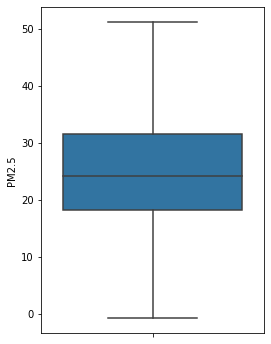

In [22]:
#Pm2.5 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='PM2.5', data=df, showfliers=False);

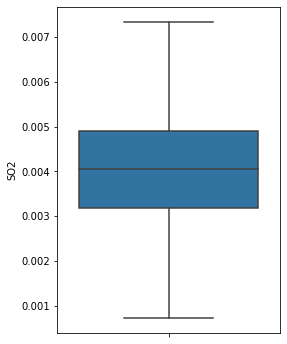

In [23]:
#SO2 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='SO2', data=df, showfliers=False);

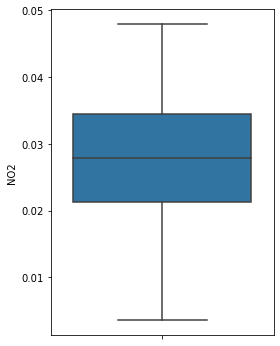

In [24]:
#NO2 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='NO2', data=df, showfliers=False);

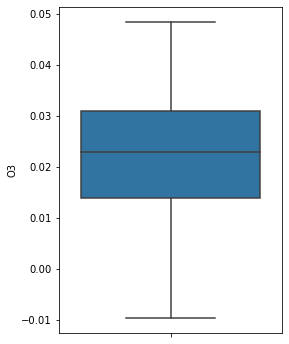

In [25]:
#O3 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='O3', data=df, showfliers=False);

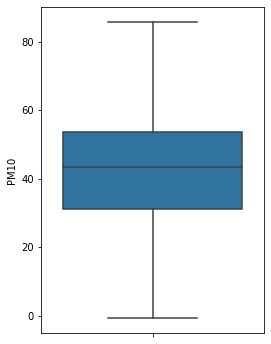

In [26]:
#PM10 Levels by Stations
fig, axes = plt.subplots(1, 1, figsize=(4, 6))
sns.boxplot(y='PM10', data=df, showfliers=False);

In [27]:
df

Station code Measurement date       SO2       NO2        O3        CO  \
0             101          2017-01  0.004401  0.037481  0.014972  0.695968   
1             101          2017-02 -0.022152  0.010290 -0.008138  0.600000   
2             101          2017-03  0.005015  0.041267  0.026862  0.698118   
3             101          2017-04  0.003308  0.034699  0.033512  0.598056   
4             101          2017-05  0.003461  0.031724  0.039319  0.490591   
..            ...              ...       ...       ...       ...       ...   
895           125          2019-08  0.005264  0.017182  0.026261  0.599189   
896           125          2019-09 -0.010603  0.005673  0.010133  0.367791   
897           125          2019-10  0.003179  0.024047  0.018567  0.432392   
898           125          2019-11  0.003303  0.035814  0.011037  0.567083   
899           125          2019-12  0.003443  0.036359  0.009333  0.666257   

          PM10      PM2.5  
0    51.024194  35.118280  
1    41.970238  28.857143  
2    55.146505  40.311828  
3    50.769444  26.536111  
4    55.129032  22.680108  
..         ...        ...  
895  24.952703  19.087838  
896  20.604294  12.699387  
897  35.092742  17.689516  
898  49.201389  23.179167  
899  49.051913  39.494536  

[900 rows x 8 columns]

In [28]:
df_station

Station code Station name(district)  \
0            101              Jongno-gu   
1            102                Jung-gu   
2            103             Yongsan-gu   
3            104           Eunpyeong-gu   
4            105           Seodaemun-gu   
5            106                Mapo-gu   
6            107           Seongdong-gu   
7            108            Gwangjin-gu   
8            109          Dongdaemun-gu   
9            110            Jungnang-gu   
10           111            Seongbuk-gu   
11           112             Gangbuk-gu   
12           113              Dobong-gu   
13           114               Nowon-gu   
14           115           Yangcheon-gu   
15           116             Gangseo-gu   
16           117                Guro-gu   
17           118           Geumcheon-gu   
18           119        Yeongdeungpo-gu   
19           120             Dongjak-gu   
20           121              Gwanak-gu   
21           122              Seocho-gu   
22           123             Gangnam-gu   
23           124              Songpa-gu   
24           125            Gangdong-gu   

                                              Address   Latitude   Longitude  
0   19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...  37.572016  127.005008  
1   15, Deoksugung-gil, Jung-gu, Seoul, Republic o...  37.564263  126.974676  
2   136, Hannam-daero, Yongsan-gu, Seoul, Republic...  37.540033  127.004850  
3   215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...  37.609823  126.934848  
4   32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...  37.593742  126.949679  
5   10, Poeun-ro 6-gil, Mapo-gu, Seoul, Republic o...  37.555580  126.905597  
6   18, Ttukseom-ro 3-gil, Seongdong-gu, Seoul, Re...  37.541864  127.049659  
7   571, Gwangnaru-ro, Gwangjin-gu, Seoul, Republi...  37.547180  127.092493  
8   43, Cheonho-daero 13-gil, Dongdaemun-gu, Seoul...  37.575743  127.028885  
9   369, Yongmasan-ro, Jungnang-gu, Seoul, Republi...  37.584848  127.094023  
10  70, Samyang-ro 2-gil, Seongbuk-gu, Seoul, Repu...  37.606719  127.027279  
11  49, Samyang-ro 139-gil, Gangbuk-gu, Seoul, Rep...  37.647930  127.011952  
12  34, Sirubong-ro 2-gil, Dobong-gu, Seoul, Repub...  37.654192  127.029088  
13  17, Sanggye-ro 23-gil, Nowon-gu, Seoul, Republ...  37.658774  127.068505  
14  56, Jungang-ro 52-gil, Yangcheon-gu, Seoul, Re...  37.525939  126.856603  
15  71, Gangseo-ro 45da-gil, Gangseo-gu, Seoul, Re...  37.544640  126.835151  
16  45, Gamasan-ro 27-gil, Guro-gu, Seoul, Republi...  37.498498  126.889692  
17  20, Geumha-ro 21-gil, Geumcheon-gu, Seoul, Rep...  37.452357  126.908296  
18  11, Yangsan-ro 23-gil, Yeongdeungpo-gu, Seoul,...  37.525007  126.897370  
19  6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Repub...  37.480917  126.971481  
20  14, Sillimdong-gil, Gwanak-gu, Seoul, Republic...  37.487355  126.927102  
21  16, Sinbanpo-ro 15-gil, Seocho-gu, Seoul, Repu...  37.504547  126.994458  
22  426, Hakdong-ro, Gangnam-gu, Seoul, Republic o...  37.517528  127.047470  
23  236, Baekjegobun-ro, Songpa-gu, Seoul, Republi...  37.502686  127.092509  
24  59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...  37.544962  127.136792

Testing every station and see what pollutants are relavent to each station before modeling and testing. I will sperate every year and see if it shows the variation

In [29]:
features = ['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']

# Station 101

In [30]:
df_101 = df[df['Station code'] == 101]

In [31]:
df_101.head()

Station code Measurement date       SO2       NO2        O3        CO  \
0           101          2017-01  0.004401  0.037481  0.014972  0.695968   
1           101          2017-02 -0.022152  0.010290 -0.008138  0.600000   
2           101          2017-03  0.005015  0.041267  0.026862  0.698118   
3           101          2017-04  0.003308  0.034699  0.033512  0.598056   
4           101          2017-05  0.003461  0.031724  0.039319  0.490591   

        PM10      PM2.5  
0  51.024194  35.118280  
1  41.970238  28.857143  
2  55.146505  40.311828  
3  50.769444  26.536111  
4  55.129032  22.680108

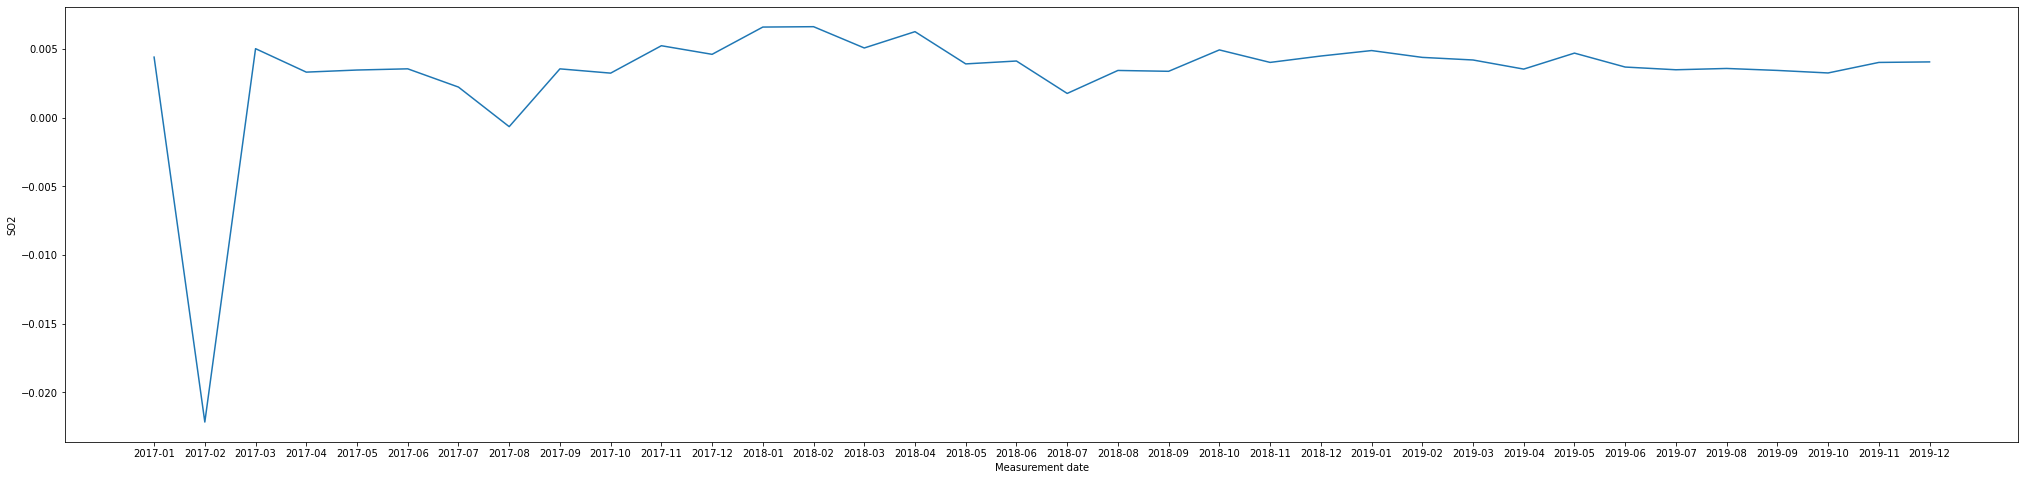

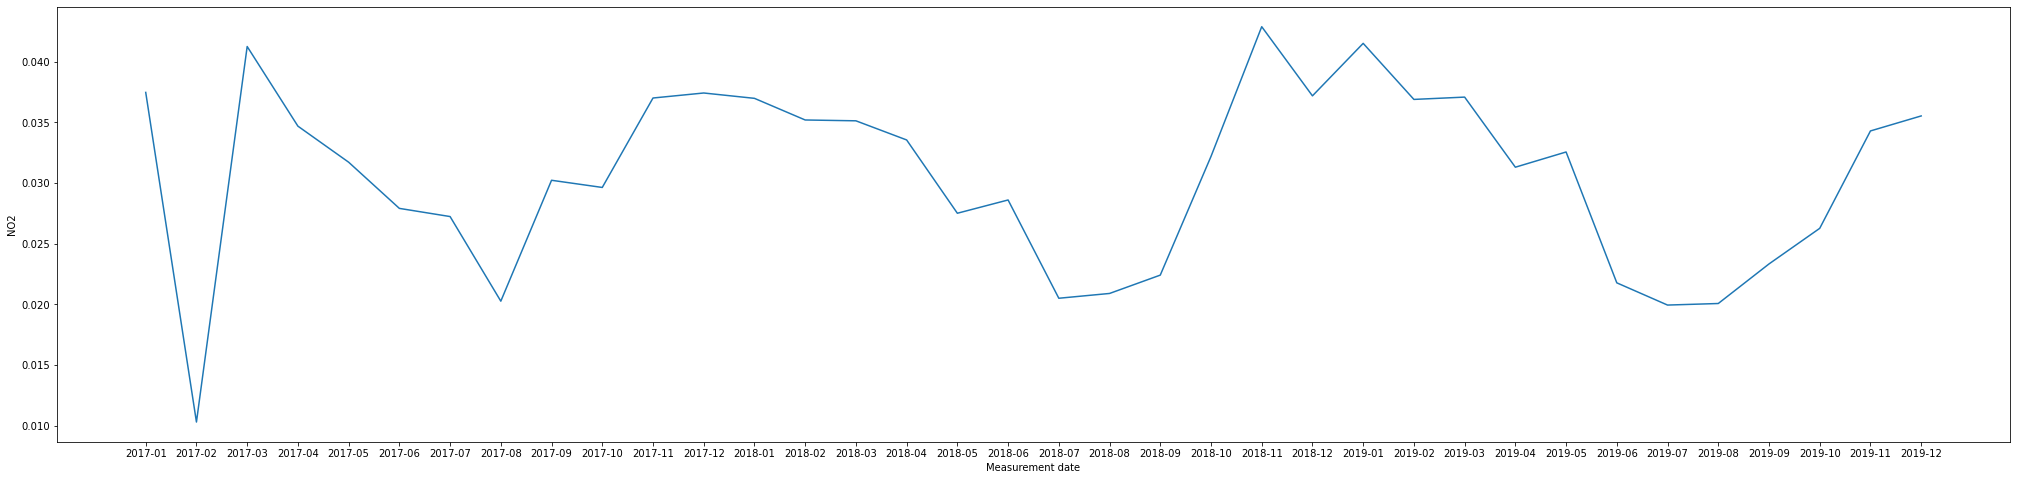

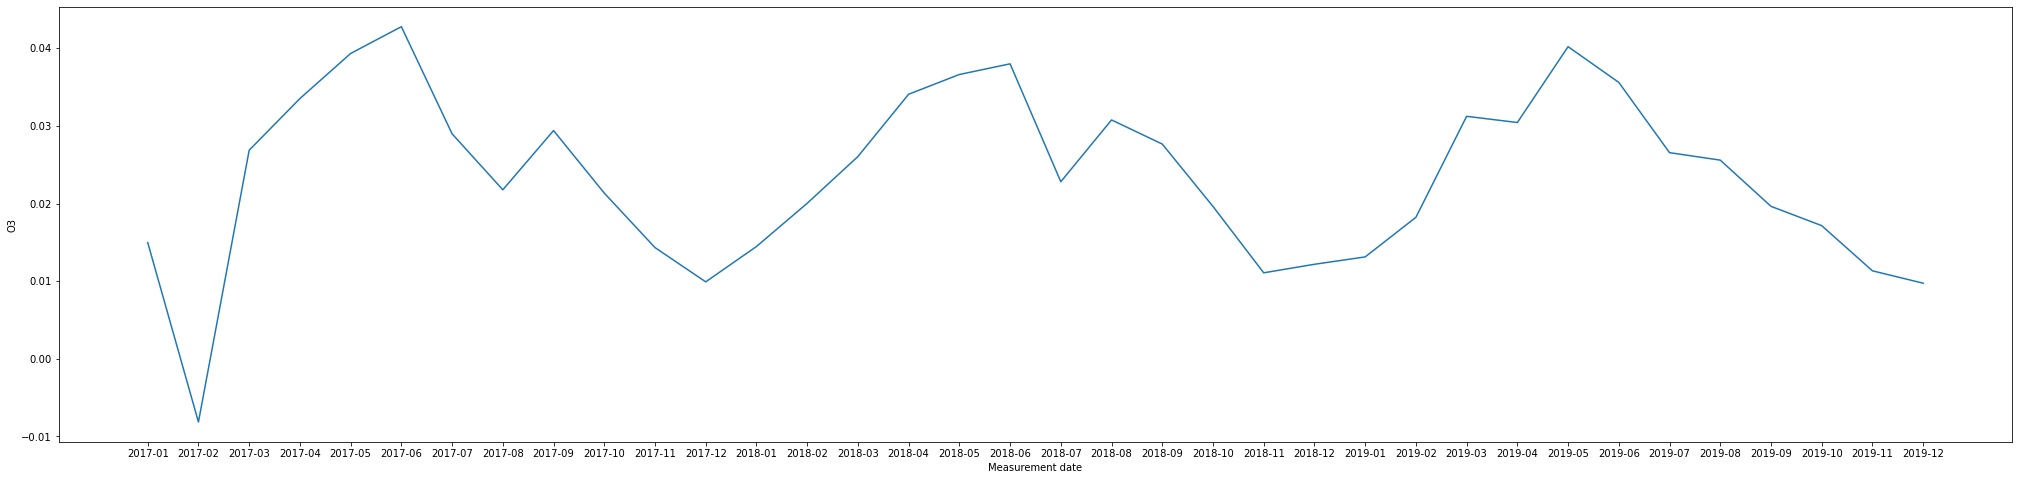

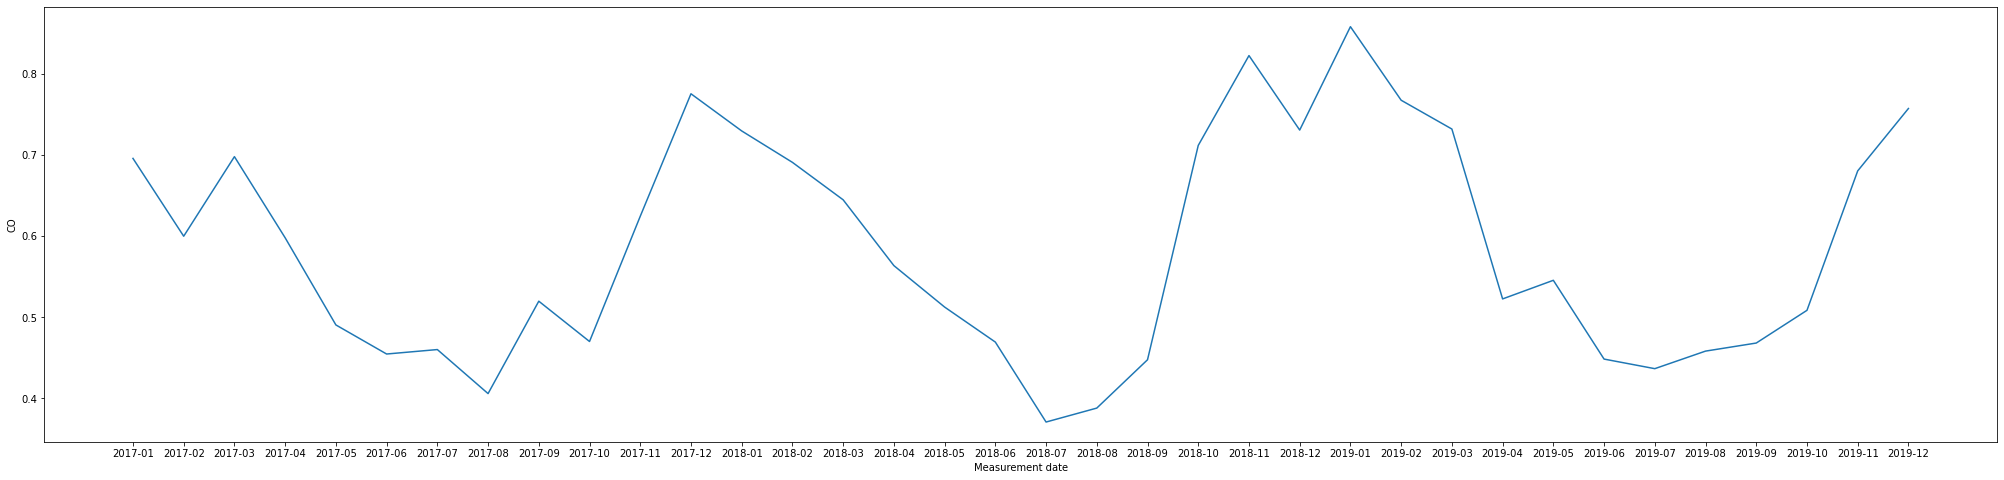

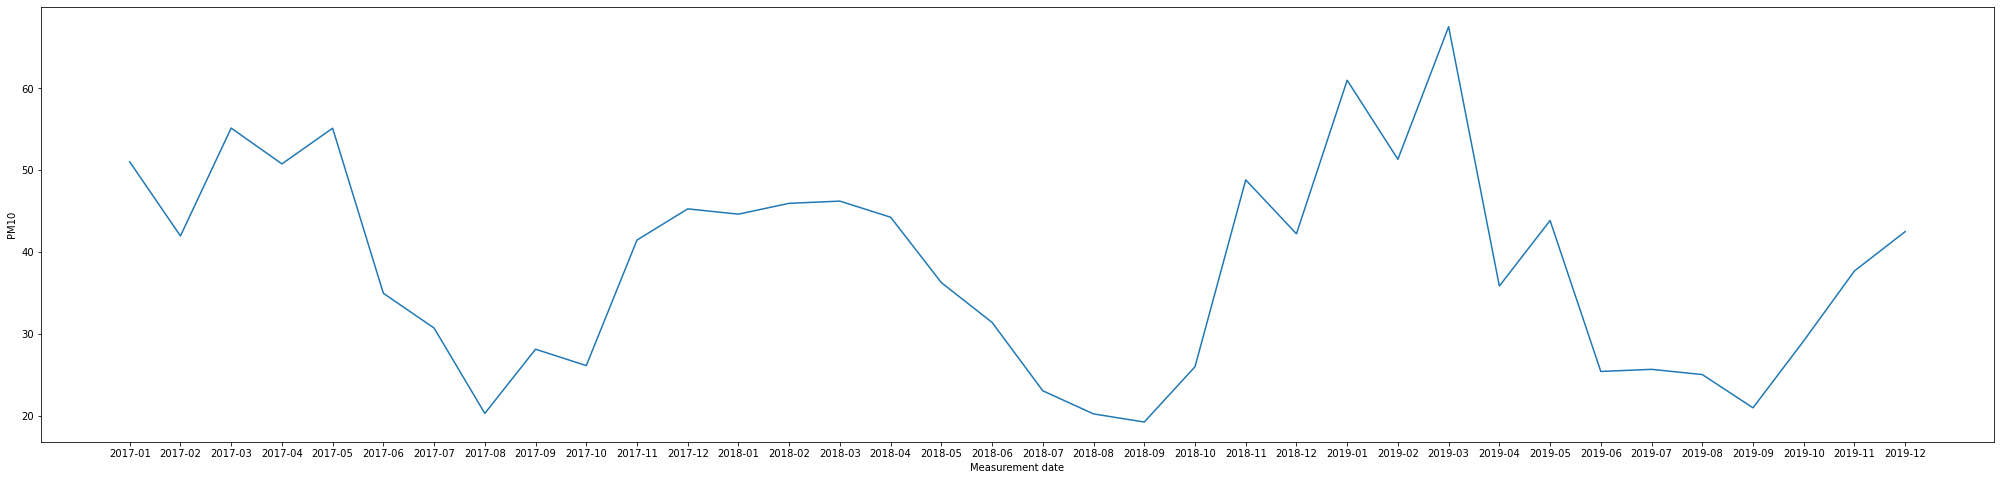

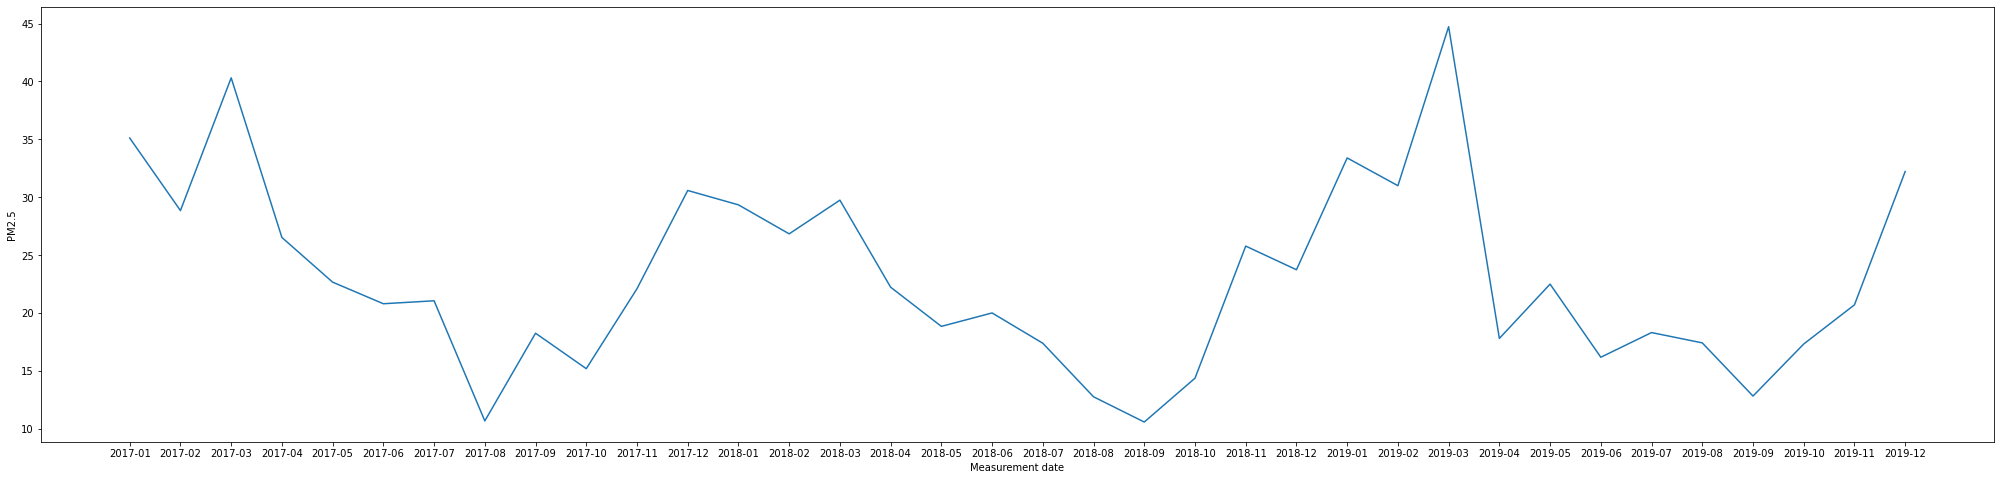

In [32]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_101)

# Station 102

In [33]:
df_102 = df[df['Station code'] == 102]

In [34]:
df_102.head()

Station code Measurement date       SO2       NO2        O3        CO  \
36           102          2017-01  0.004415  0.038462  0.014305  0.606586   
37           102          2017-02  0.002914  0.037260  0.017147  0.555804   
38           102          2017-03  0.004731  0.043386  0.025789  0.591667   
39           102          2017-04  0.004200  0.037571  0.033193  0.502222   
40           102          2017-05  0.003172  0.031638  0.038710  0.413844   

         PM10      PM2.5  
36  51.745968  34.412634  
37  44.284226  29.040179  
38  57.720430  38.438172  
39  51.811111  26.338889  
40  53.392473  22.388441

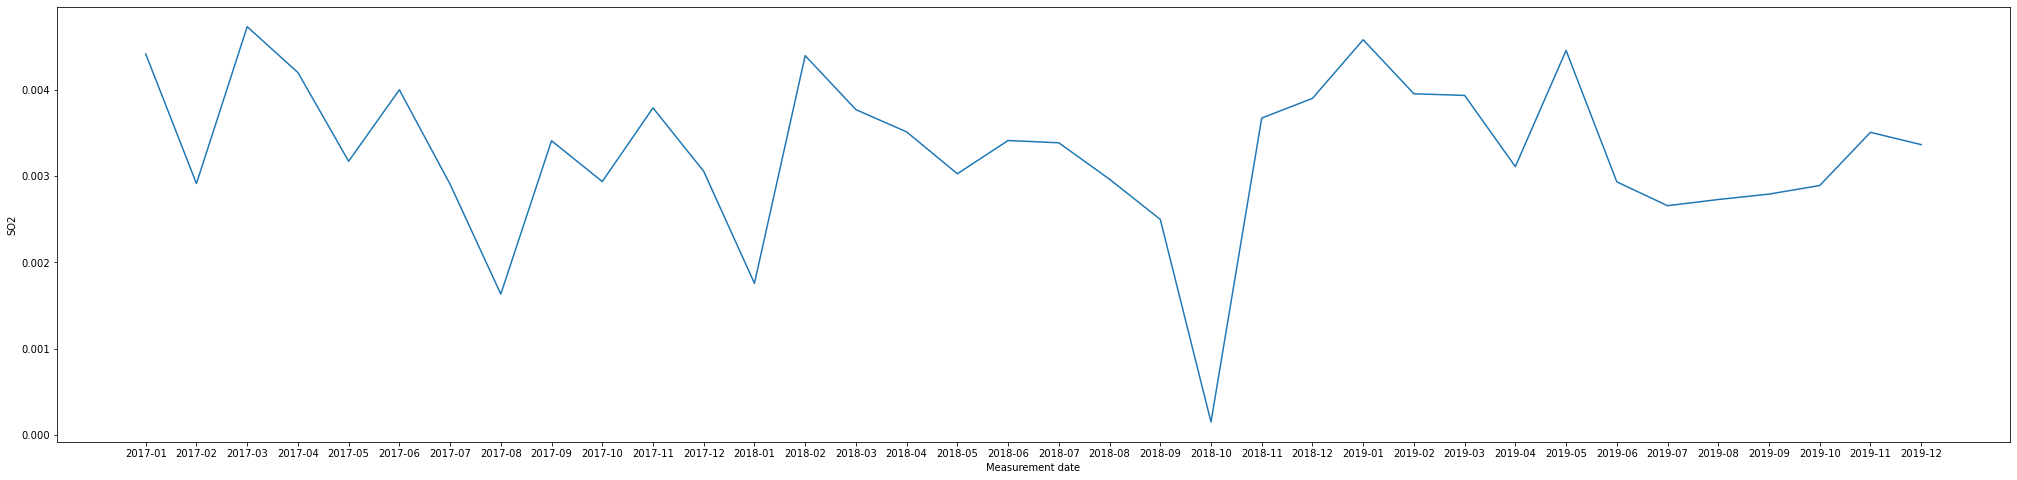

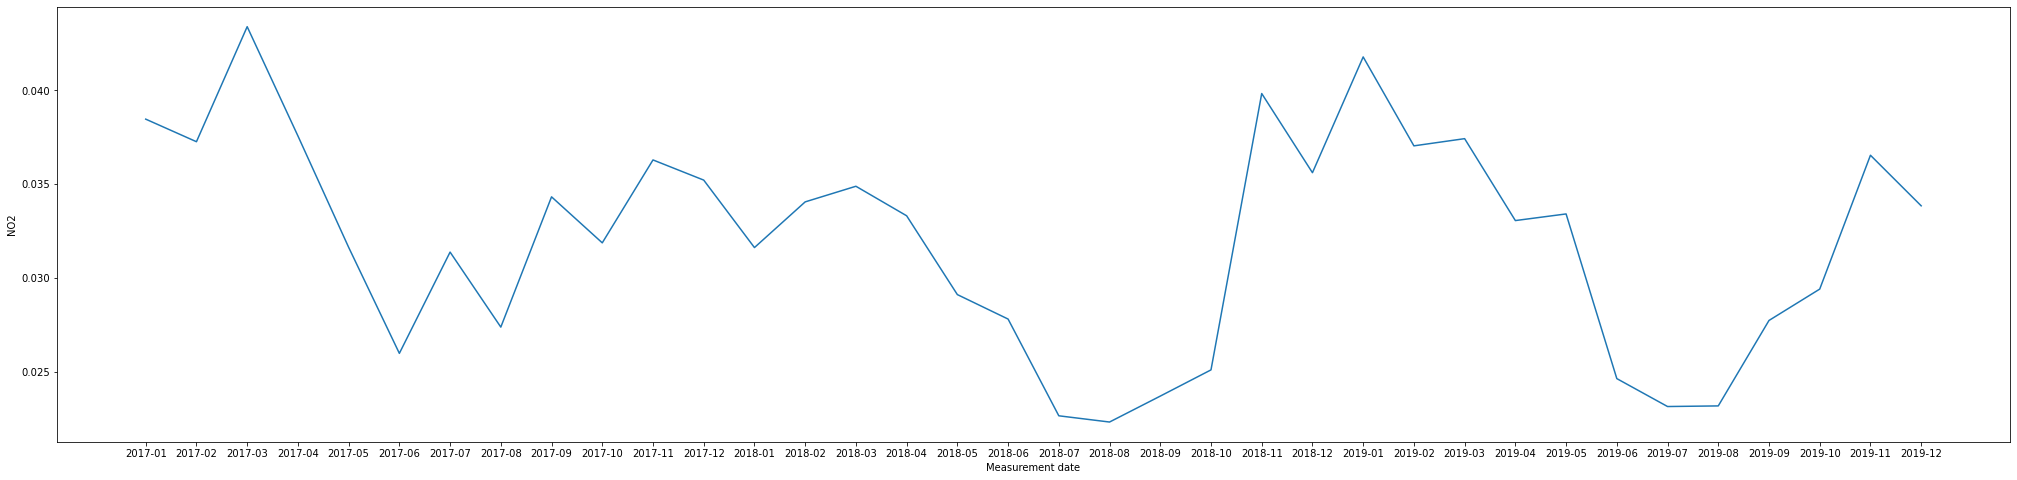

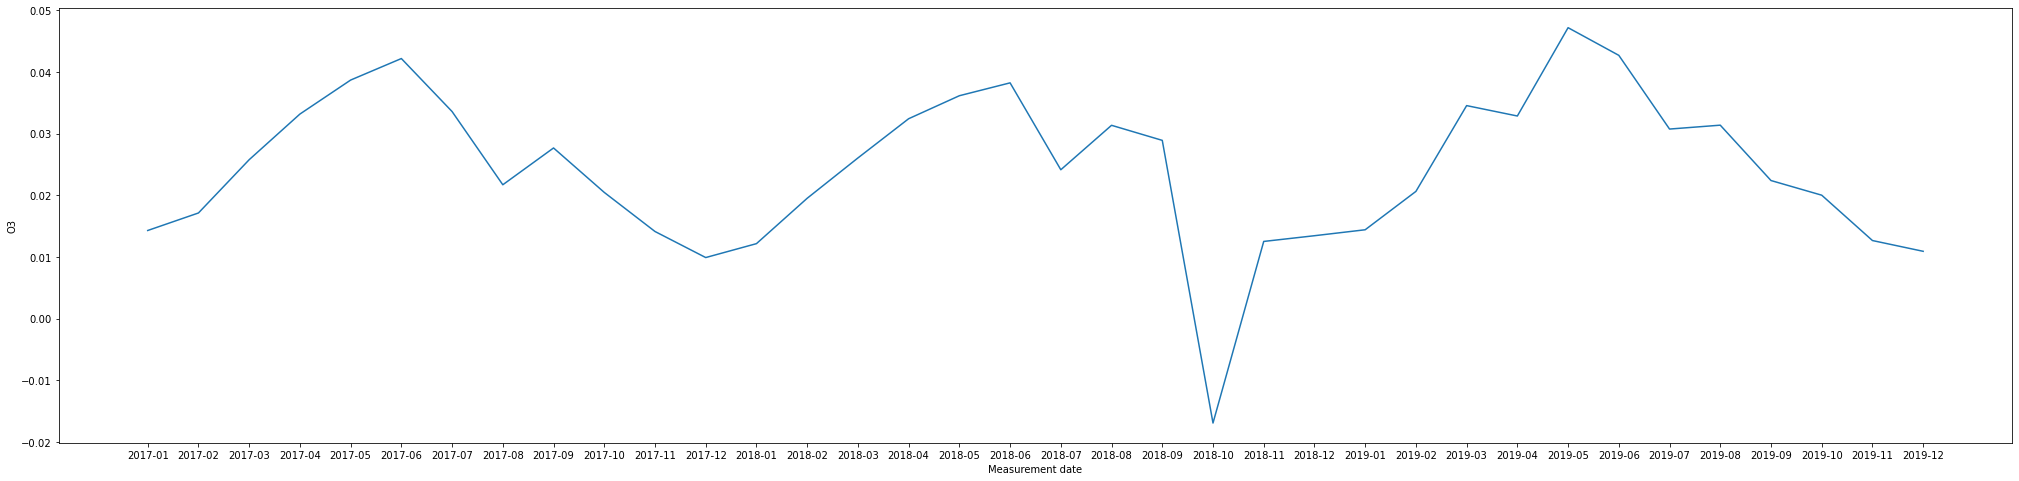

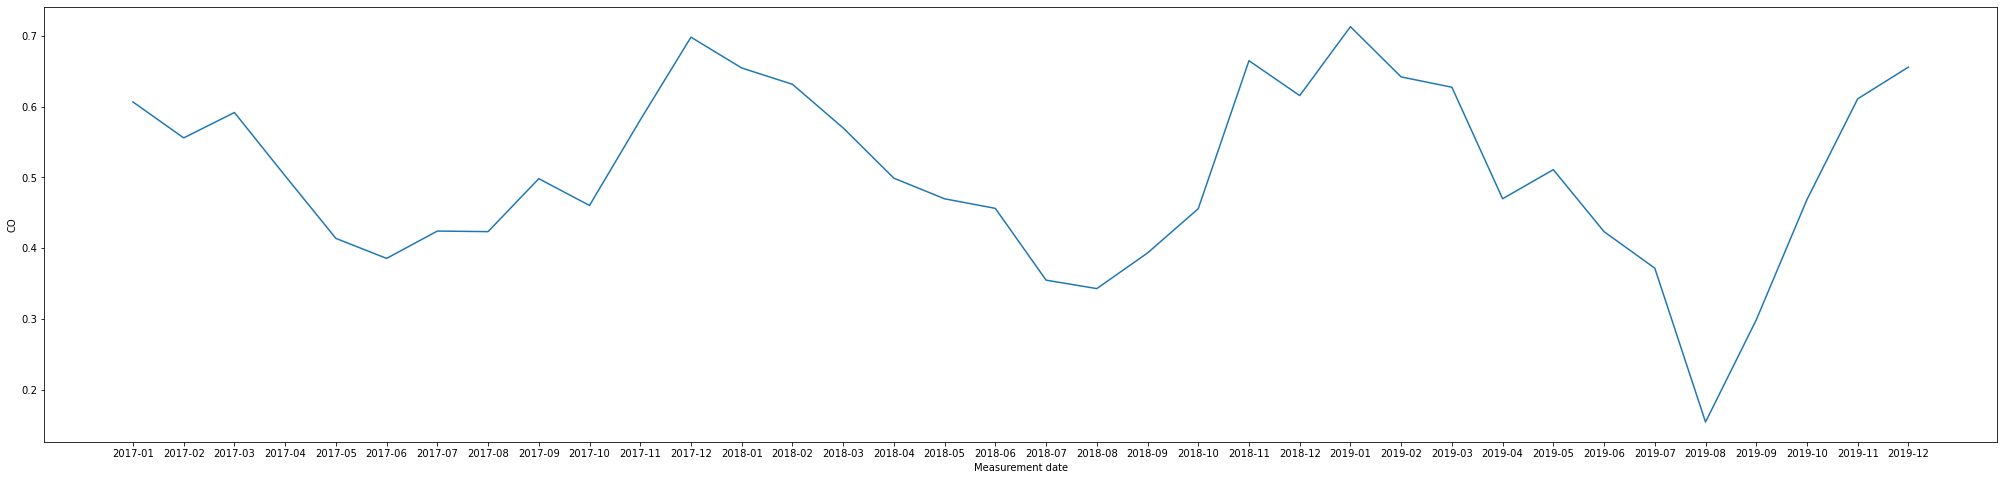

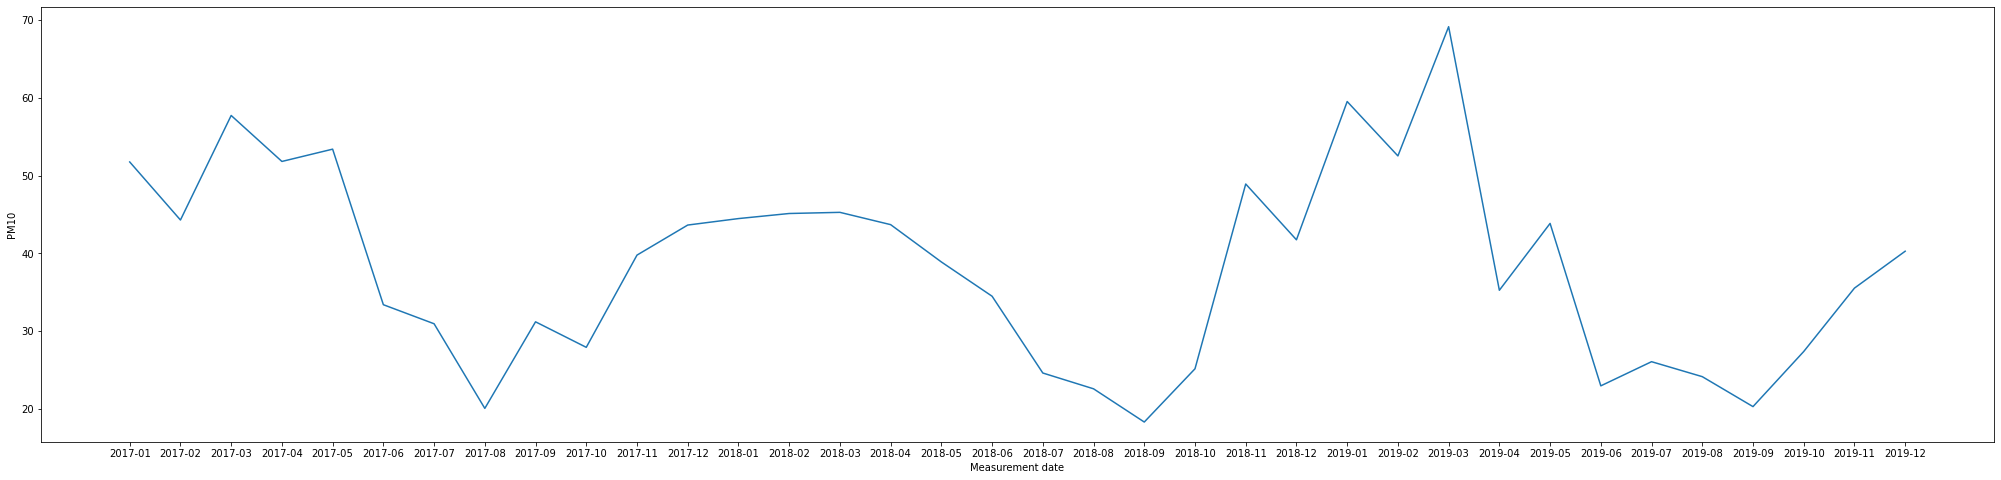

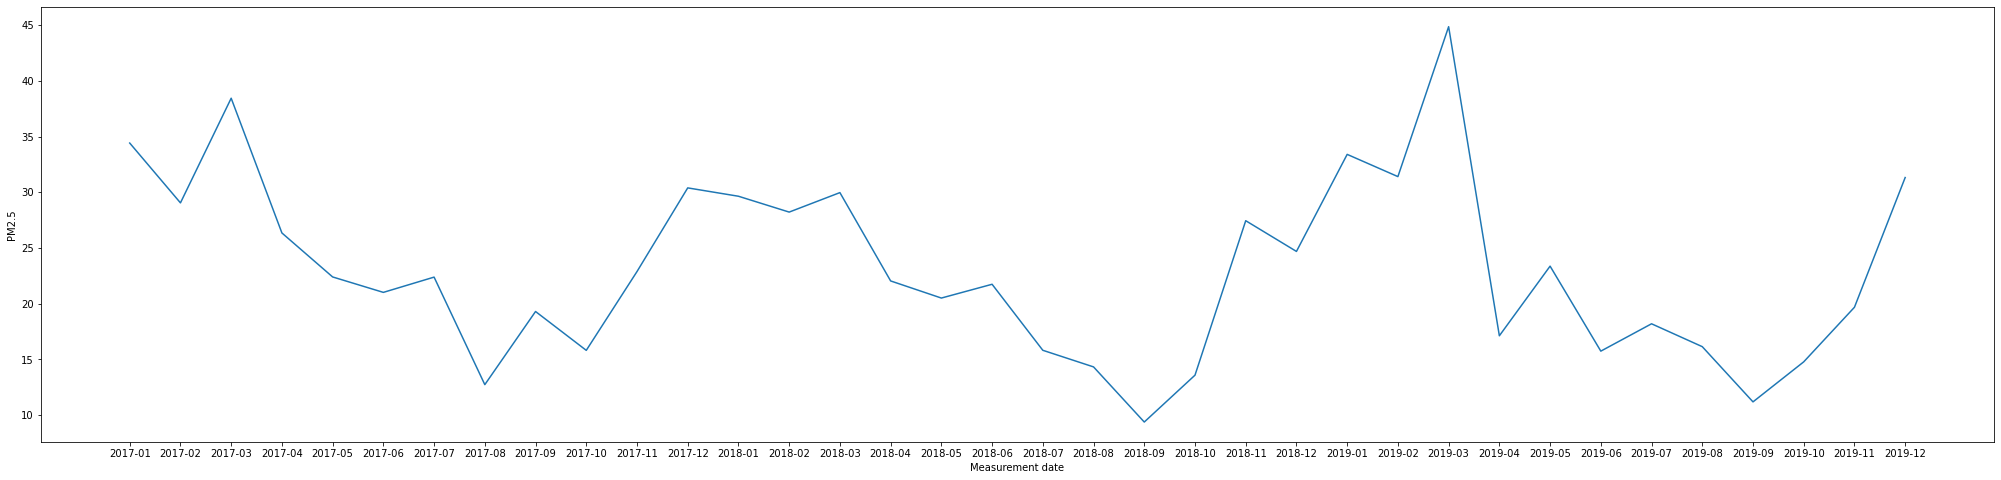

In [35]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_102)

# Station 103

In [36]:
df_103 = df[df['Station code'] == 103]

In [37]:
df_103.head()

Station code Measurement date       SO2       NO2        O3        CO  \
72           103          2017-01  0.004550  0.031828  0.012258  0.616129   
73           103          2017-02  0.004469  0.033146  0.014515  0.562351   
74           103          2017-03  0.004159  0.038250  0.018060  0.491129   
75           103          2017-04  0.003886  0.030303  0.023076  0.368333   
76           103          2017-05  0.004083  0.027610  0.023345  0.311694   

         PM10      PM2.5  
72  45.864247  33.338710  
73  40.065476  27.373512  
74  52.098118  35.255376  
75  47.133333  25.413889  
76  49.654570  24.024194

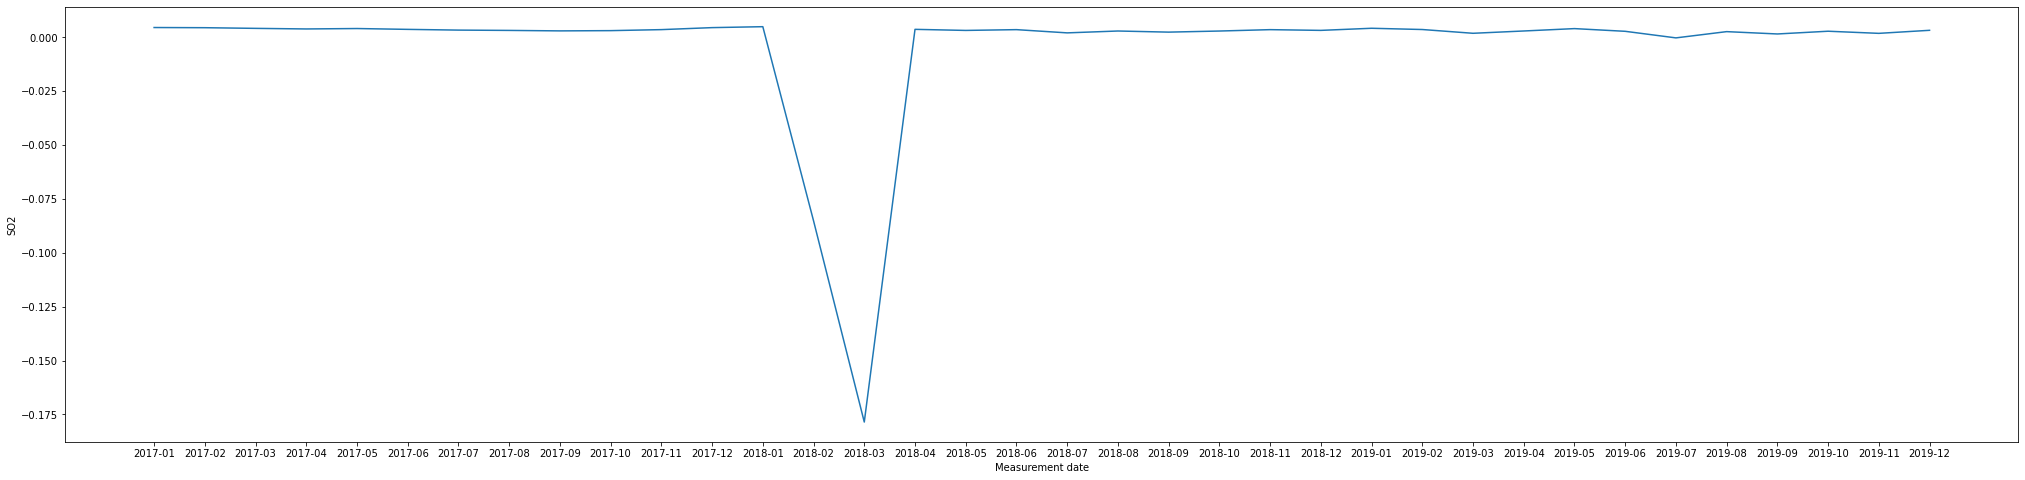

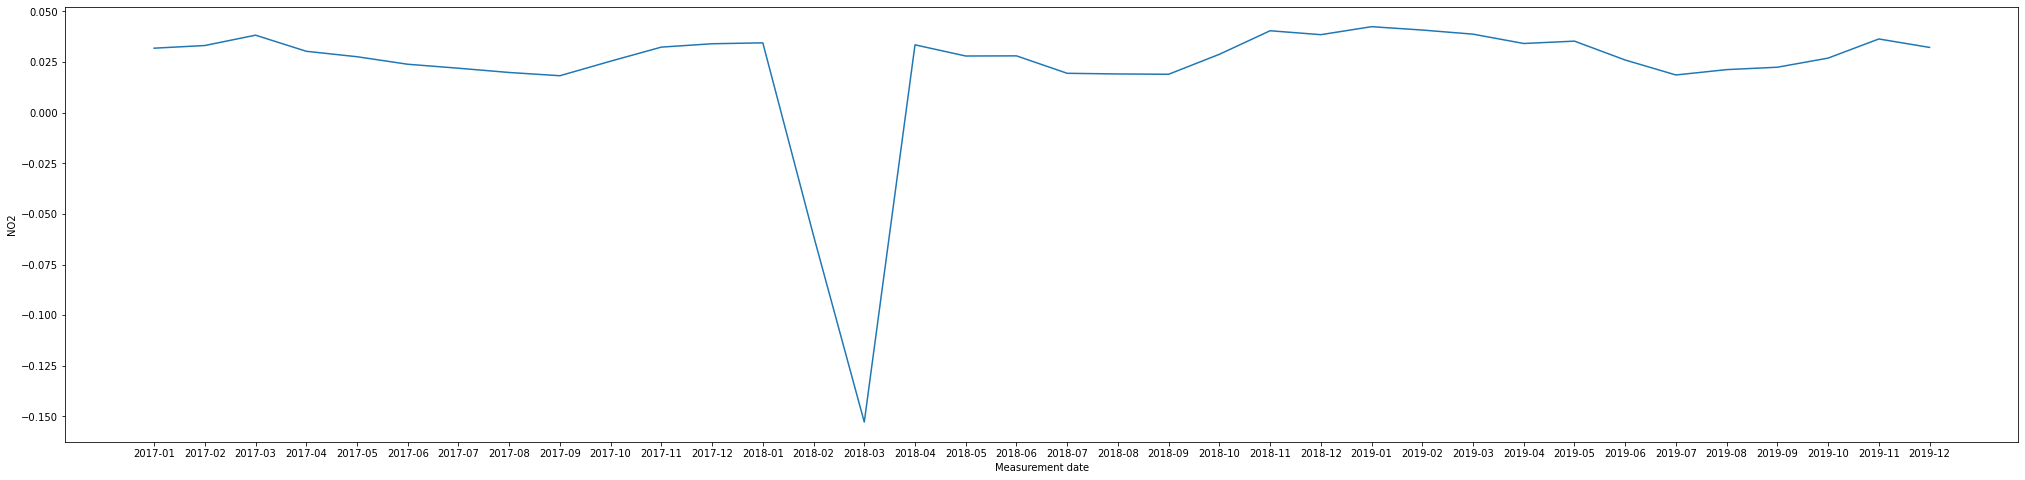

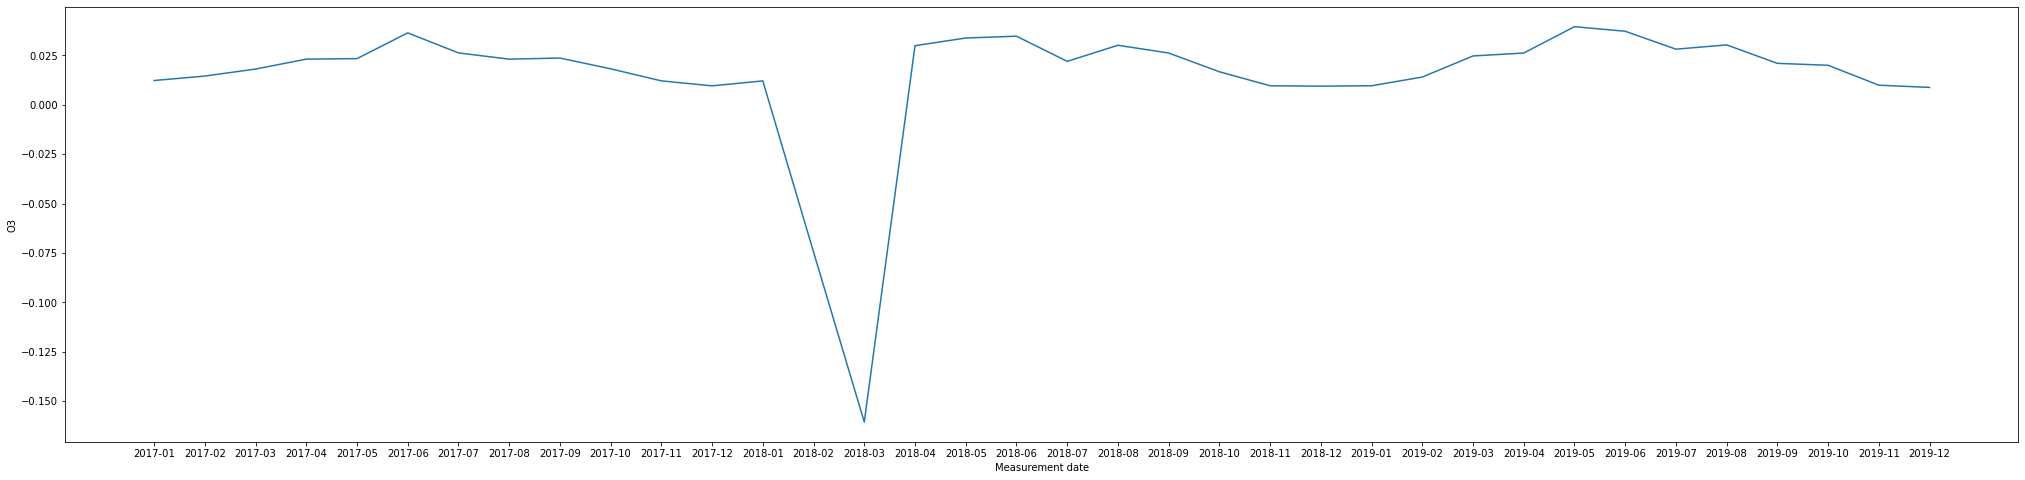

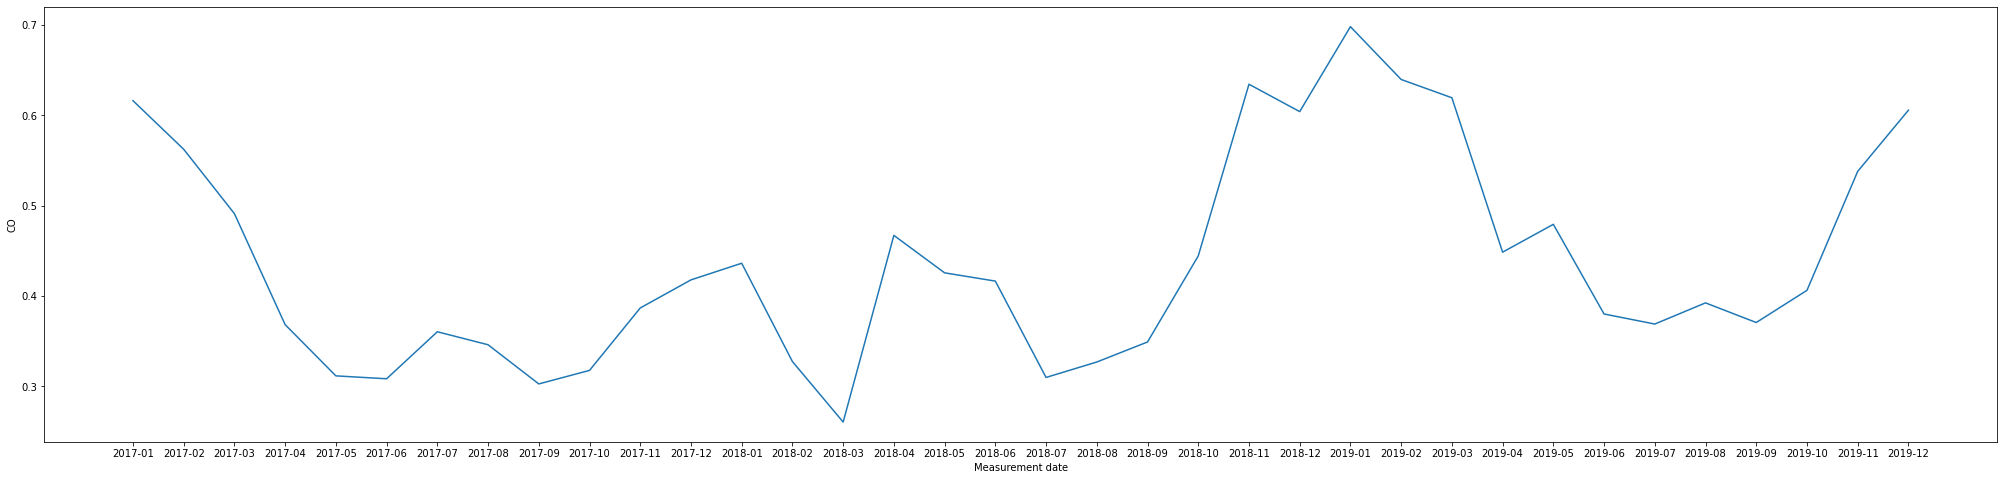

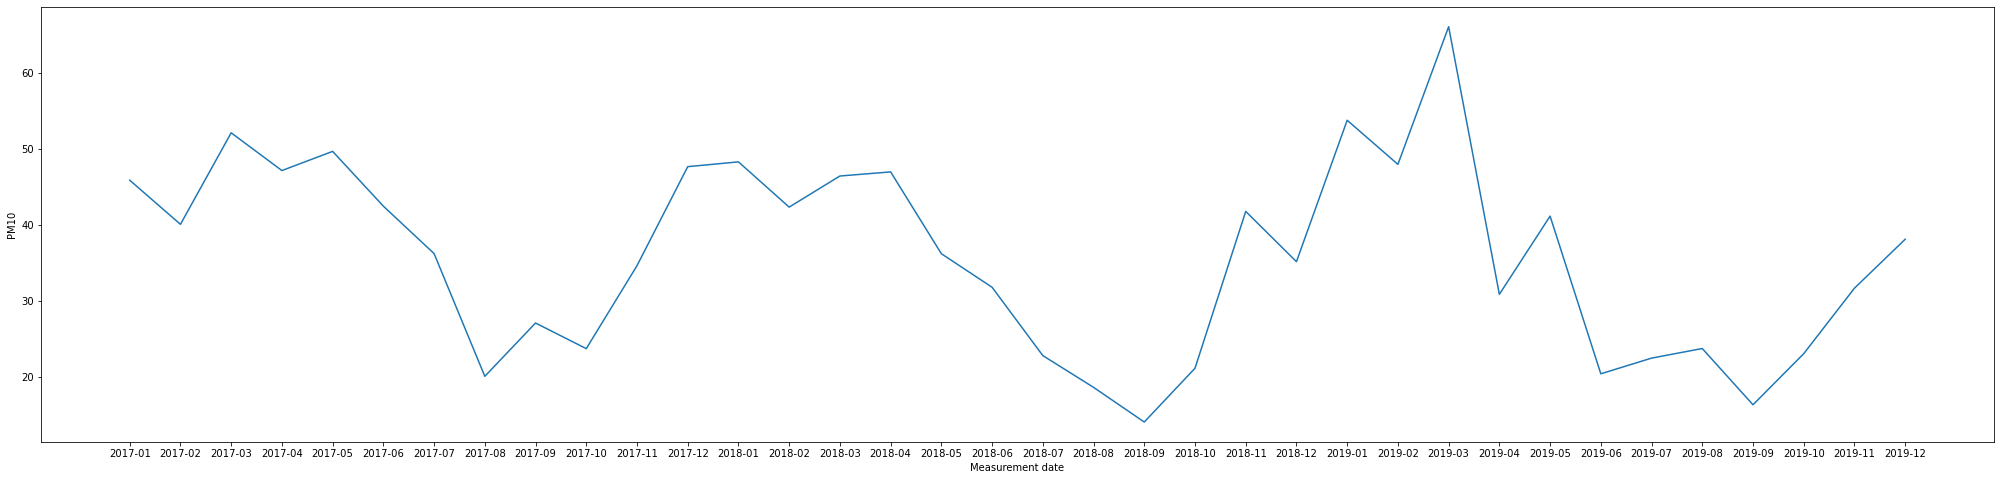

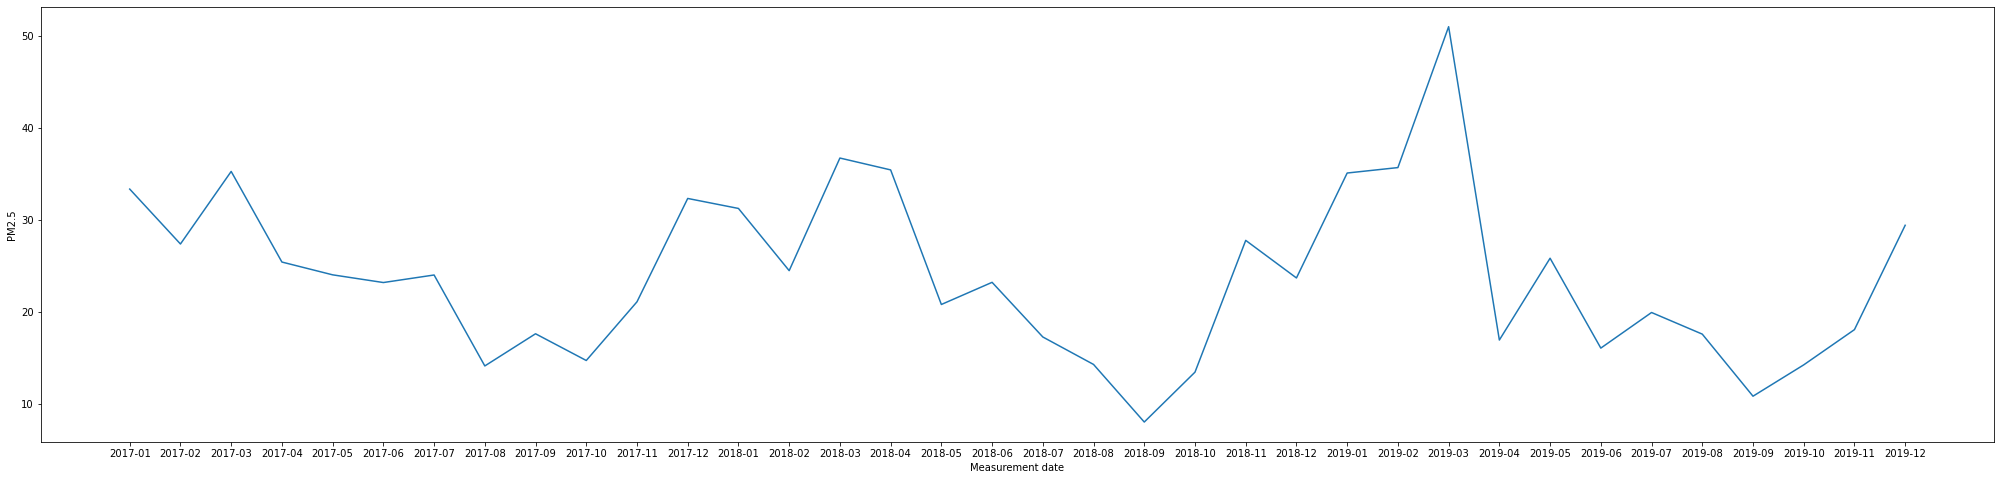

In [38]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_103)

# Station 104

In [39]:
df_104 = df[df['Station code'] == 104]

In [40]:
df_104.head()

Station code Measurement date       SO2       NO2        O3        CO  \
108           104          2017-01  0.004327  0.025956  0.014288  0.711962   
109           104          2017-02  0.004461  0.028427  0.021878  0.754315   
110           104          2017-03  0.003996  0.029383  0.012921  0.586425   
111           104          2017-04  0.003887  0.029394  0.038699  0.608056   
112           104          2017-05 -0.053144 -0.032060 -0.018292  0.424059   

          PM10      PM2.5  
108  52.250000  29.771505  
109  41.434524  23.595238  
110  58.717742  34.607527  
111  60.481944  24.941667  
112  66.846774  24.189516

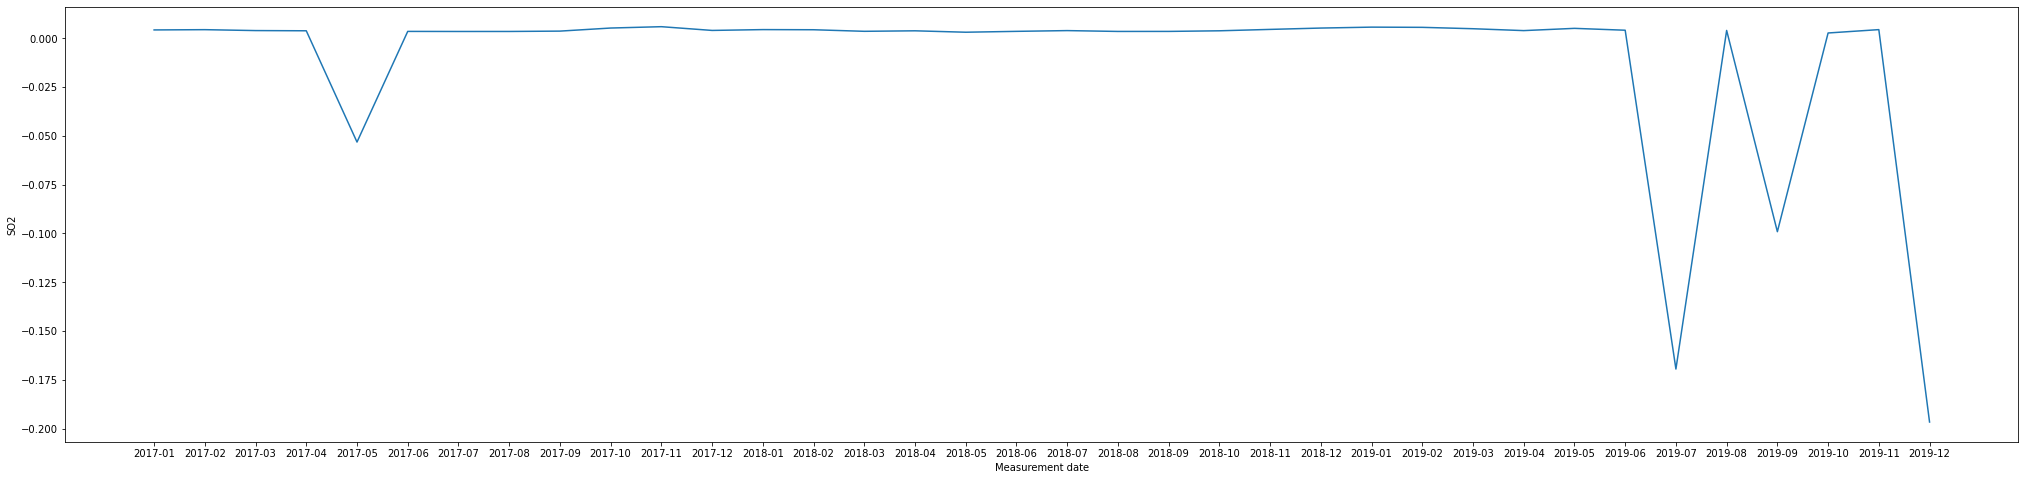

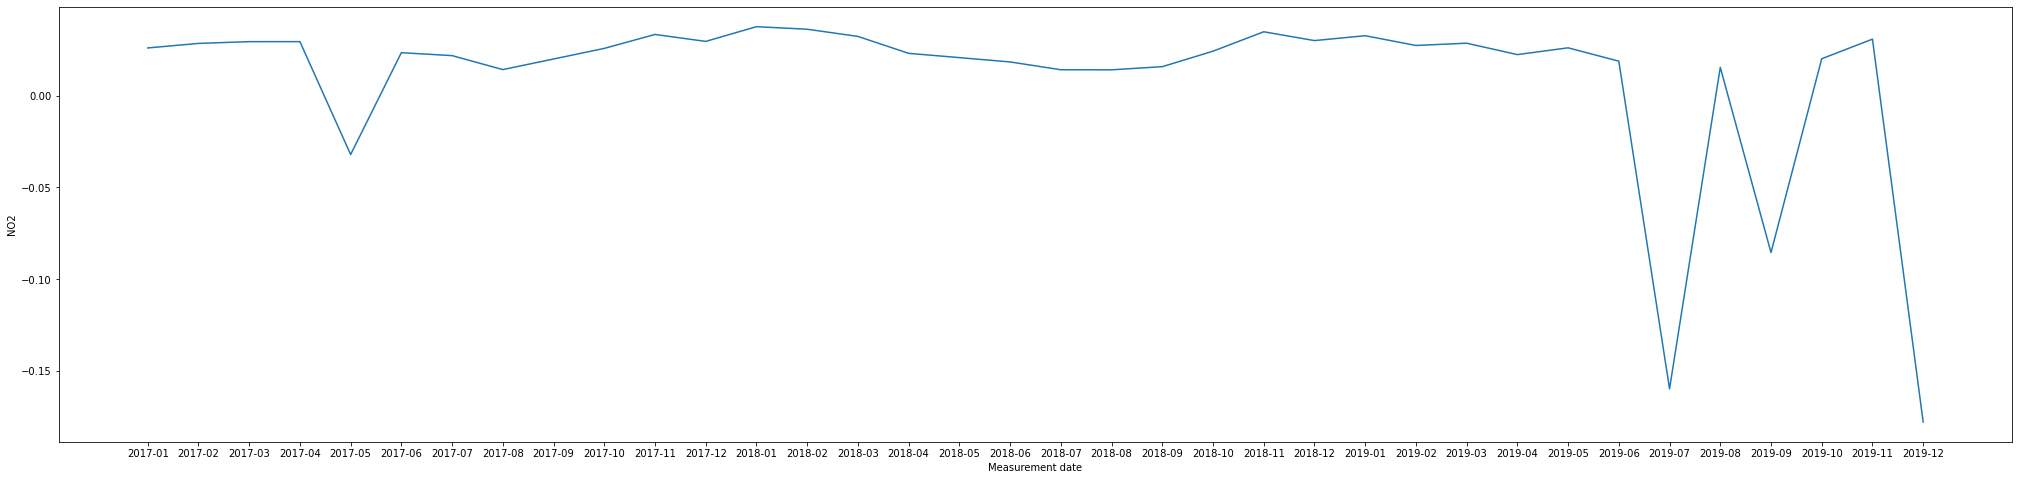

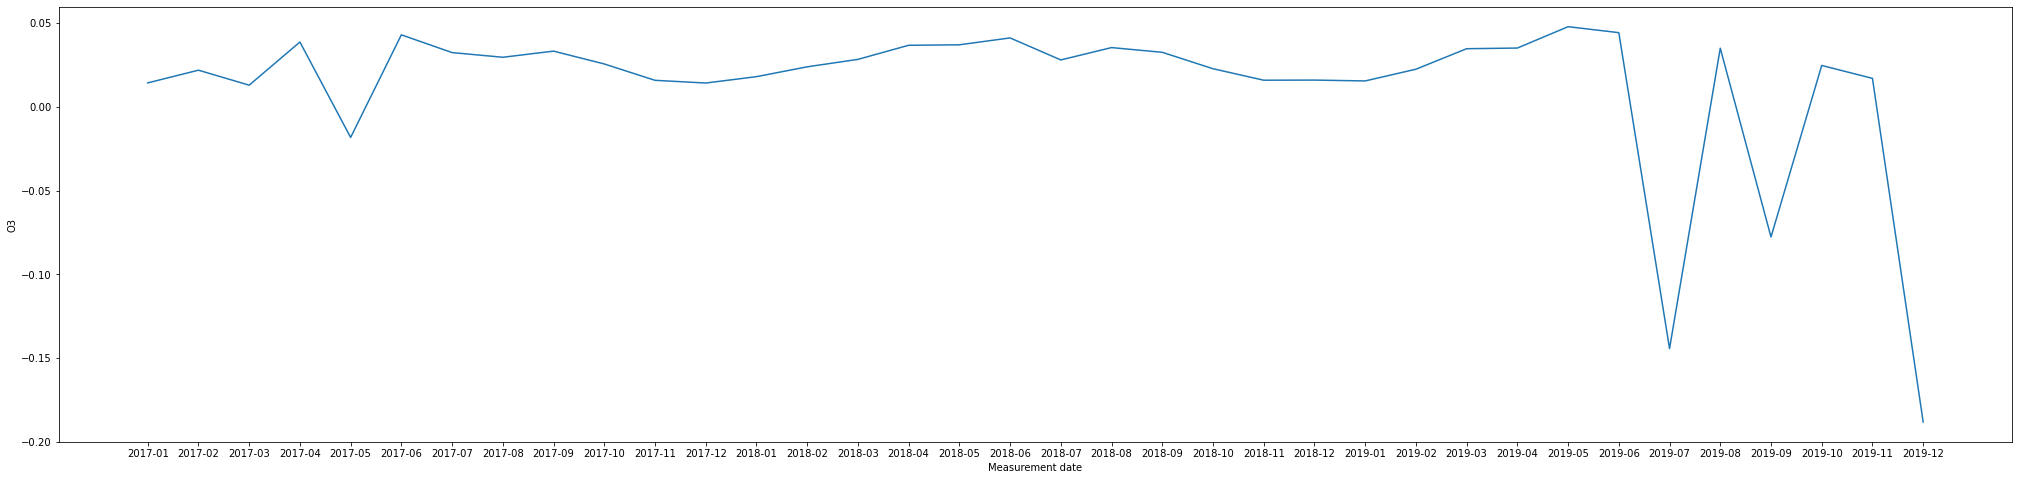

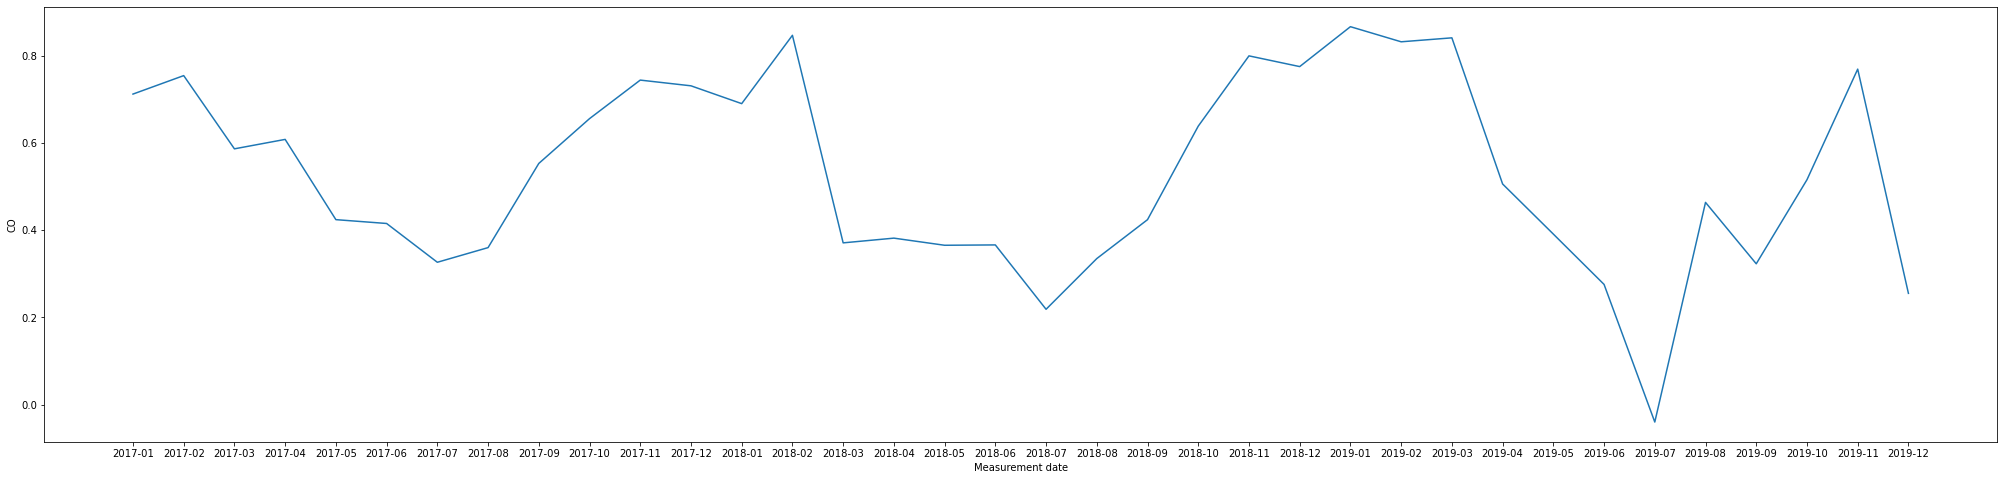

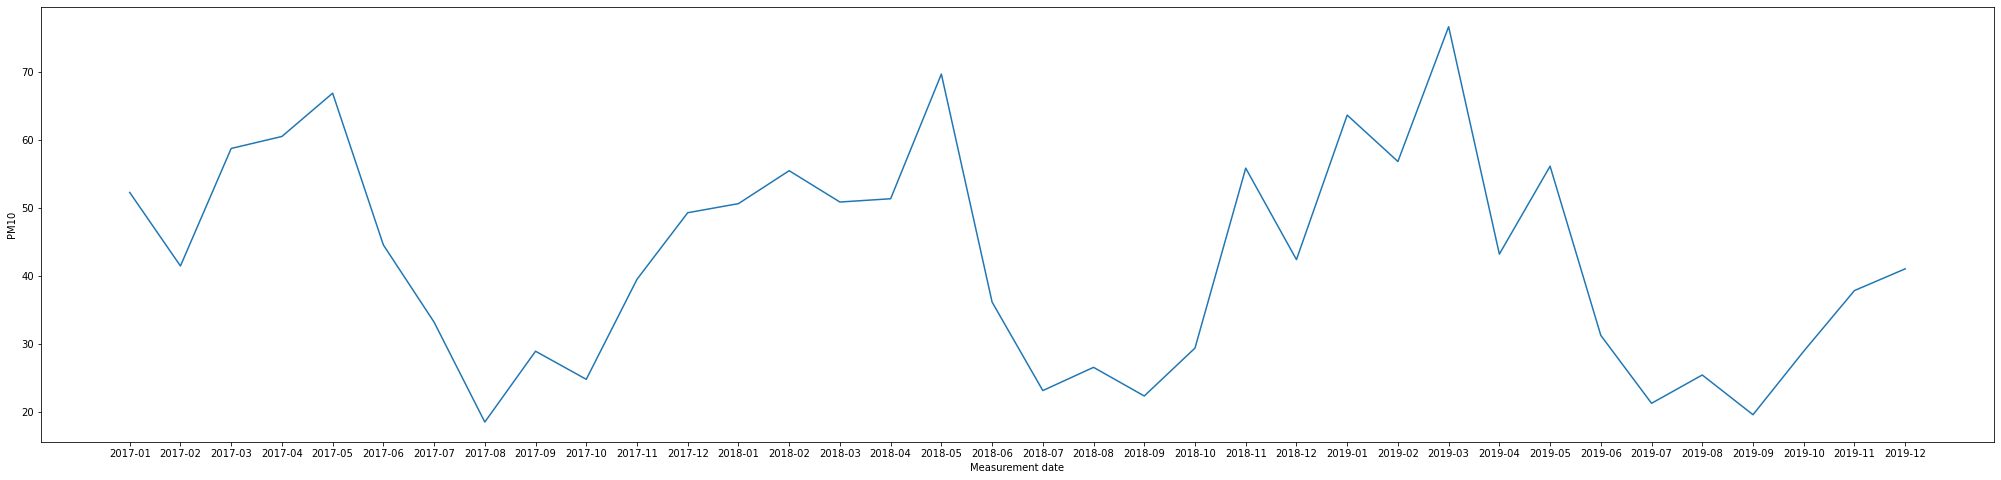

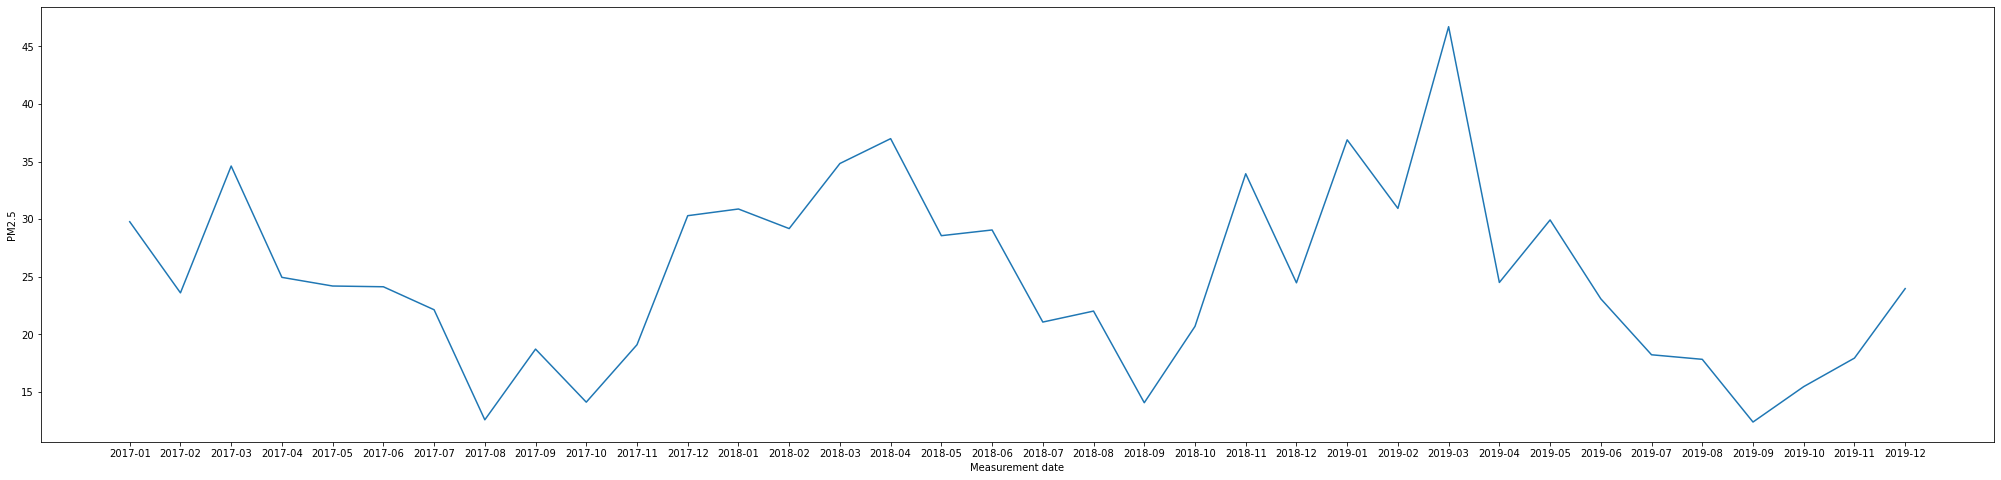

In [41]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_104)

# Station 105

In [42]:
df_105 = df[df['Station code'] == 105]

In [43]:
df_105.head()

Station code Measurement date       SO2       NO2        O3        CO  \
144           105          2017-01  0.005710  0.028067  0.018015  0.646237   
145           105          2017-02  0.005863  0.028104  0.021006  0.620982   
146           105          2017-03  0.006227  0.029921  0.022664  0.560215   
147           105          2017-04  0.006008  0.034006  0.031154  0.527500   
148           105          2017-05  0.006617  0.031367  0.037329  0.476210   

          PM10      PM2.5  
144  56.641129  29.327957  
145  48.061012  25.398810  
146  64.848118  37.103495  
147  62.208333  27.843056  
148  68.177419  27.051075

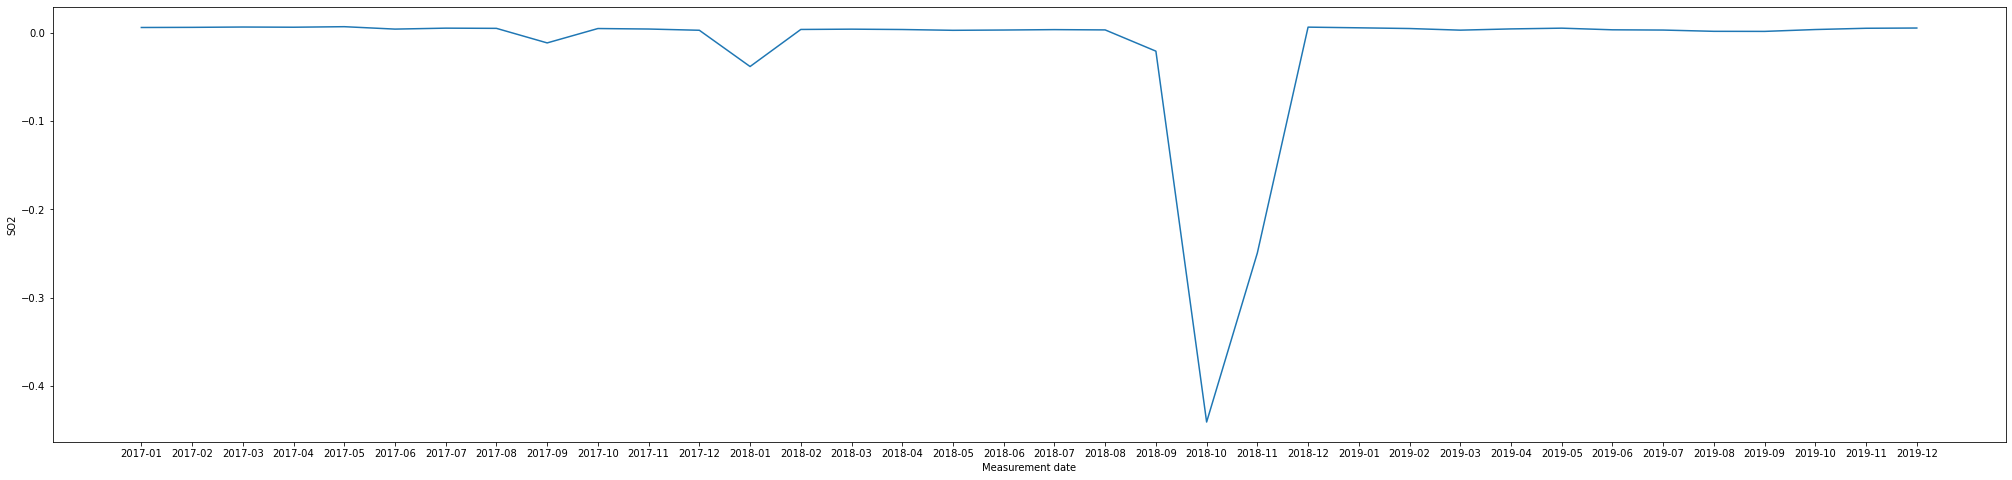

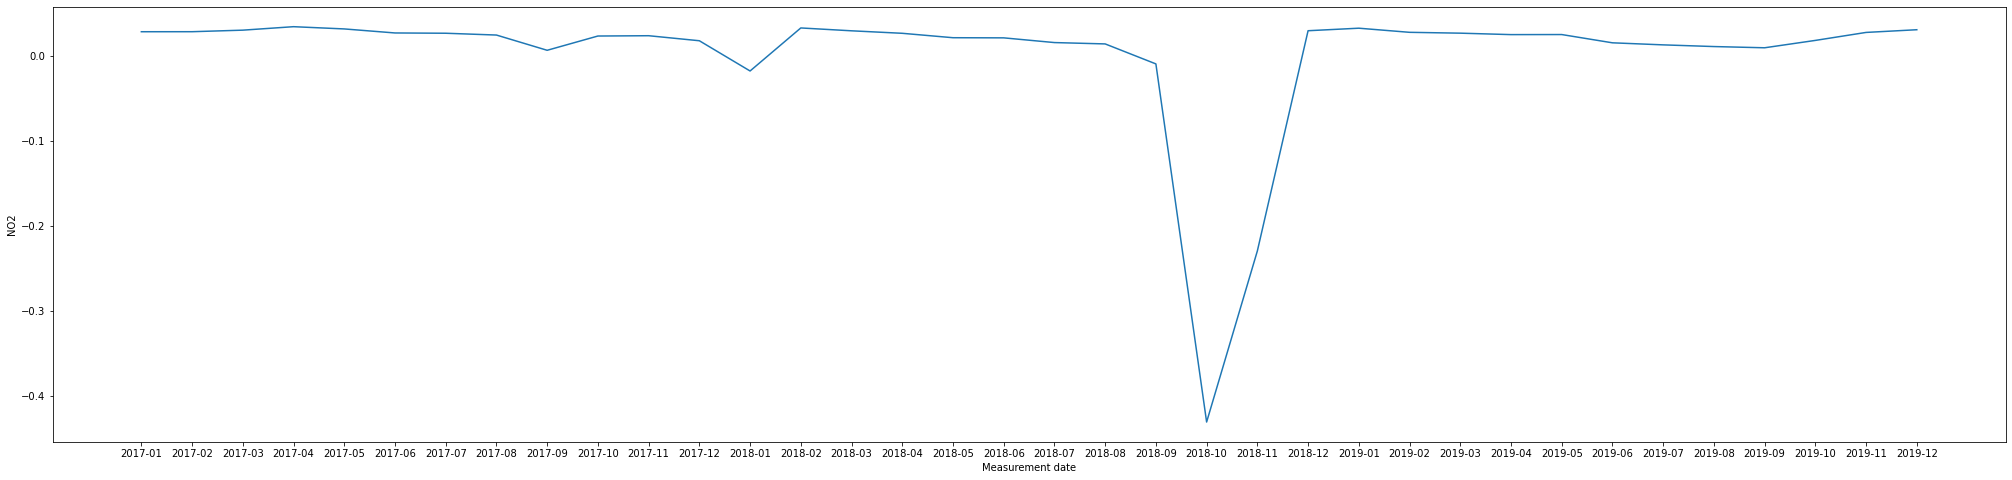

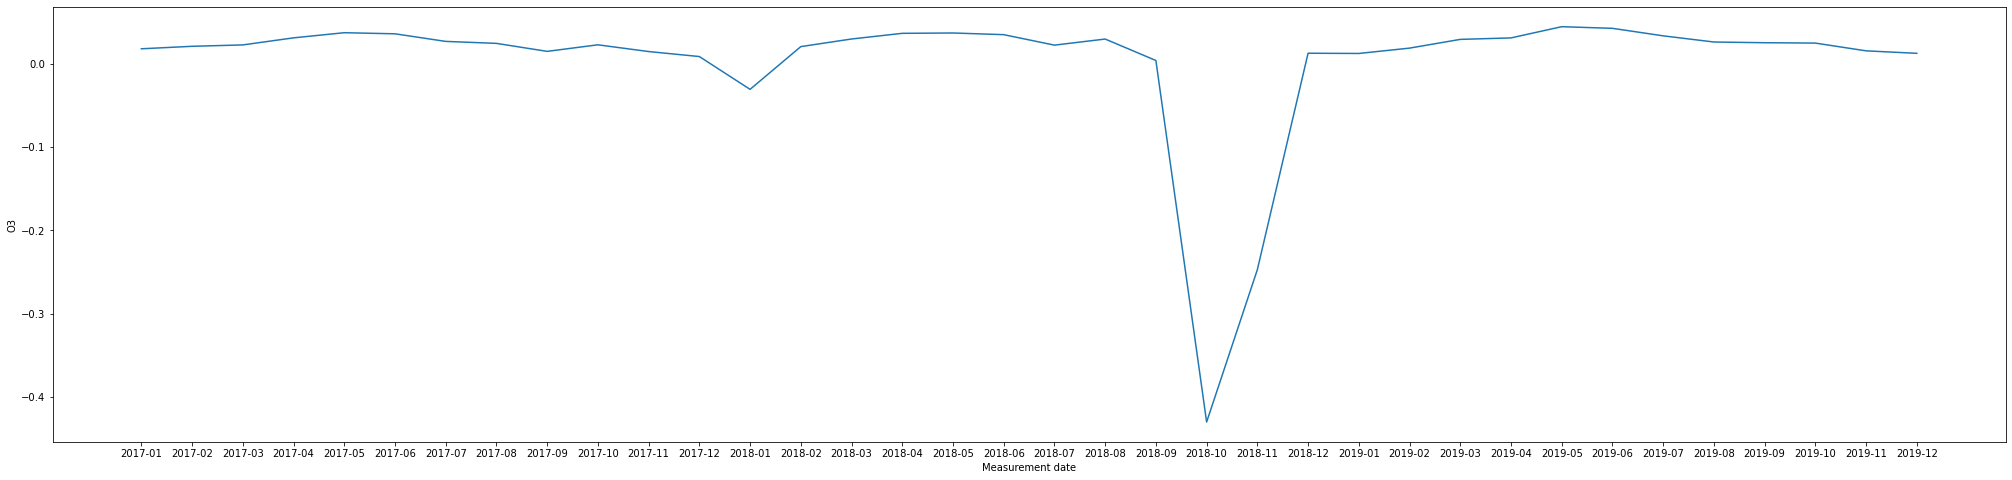

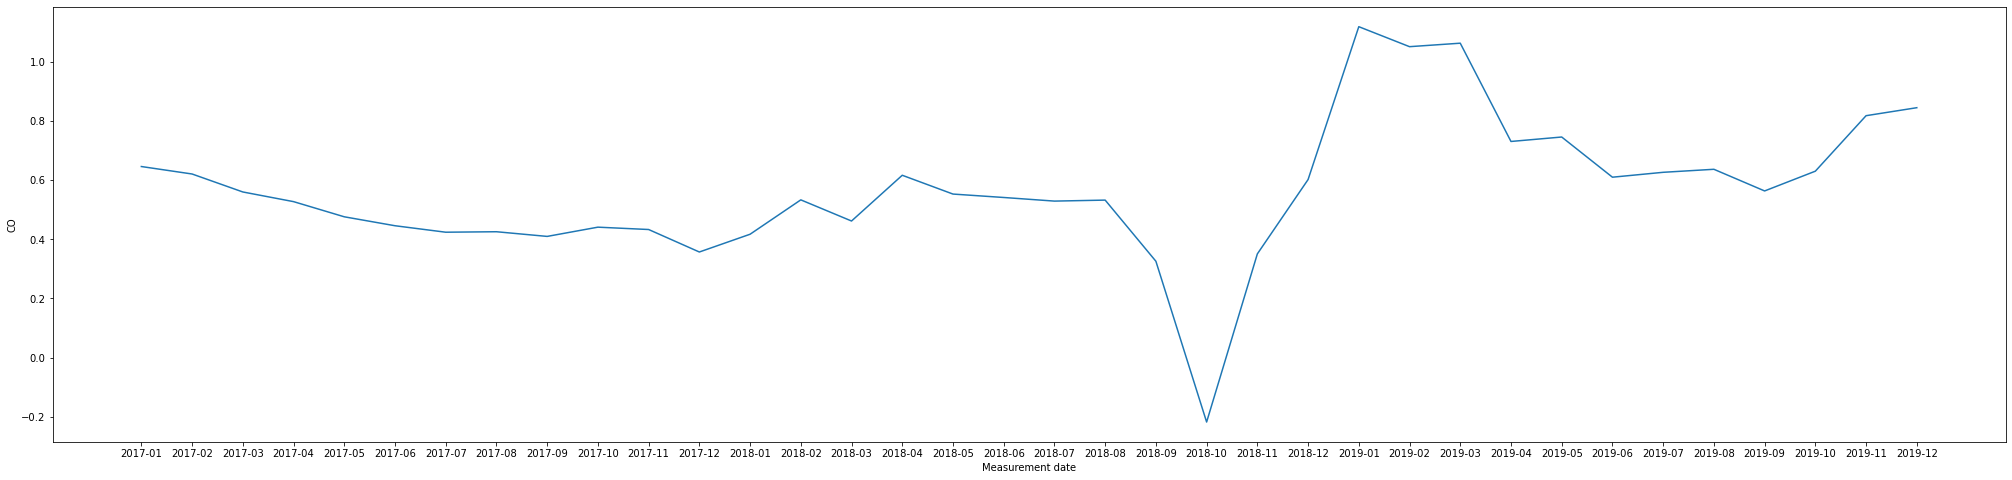

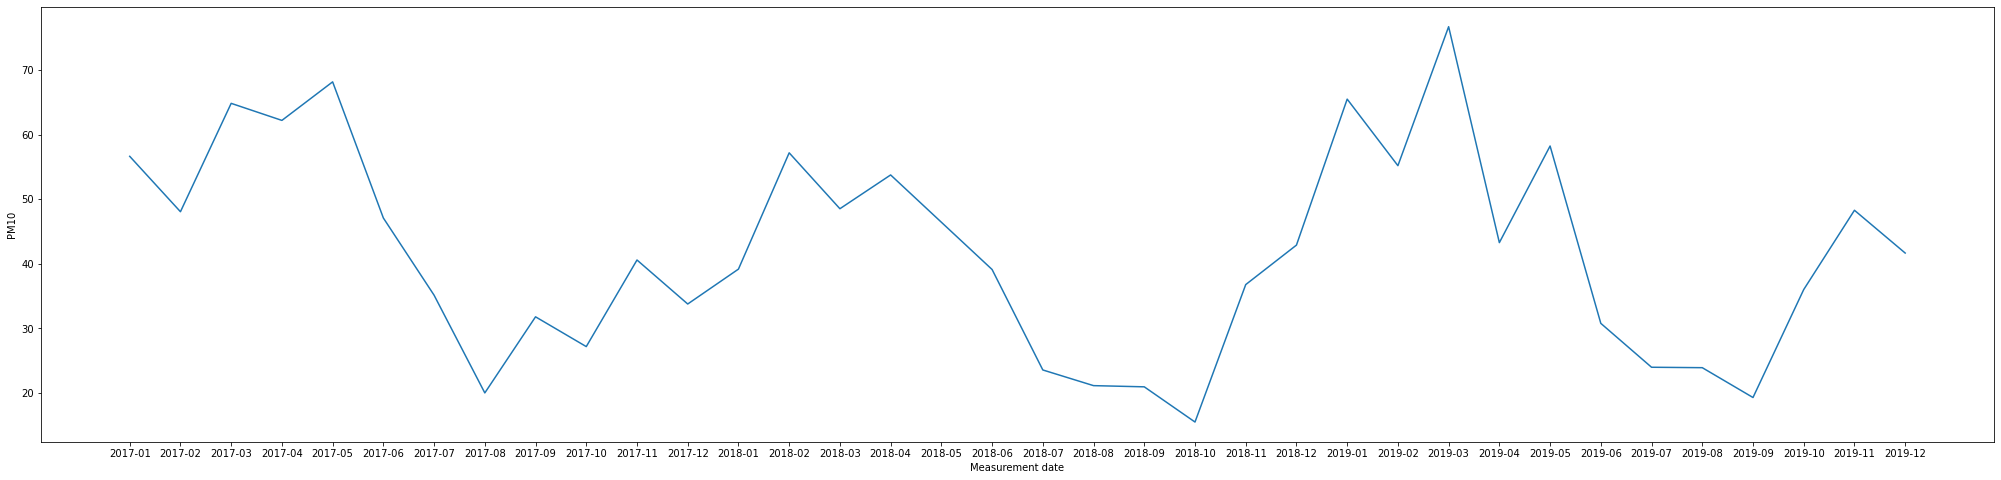

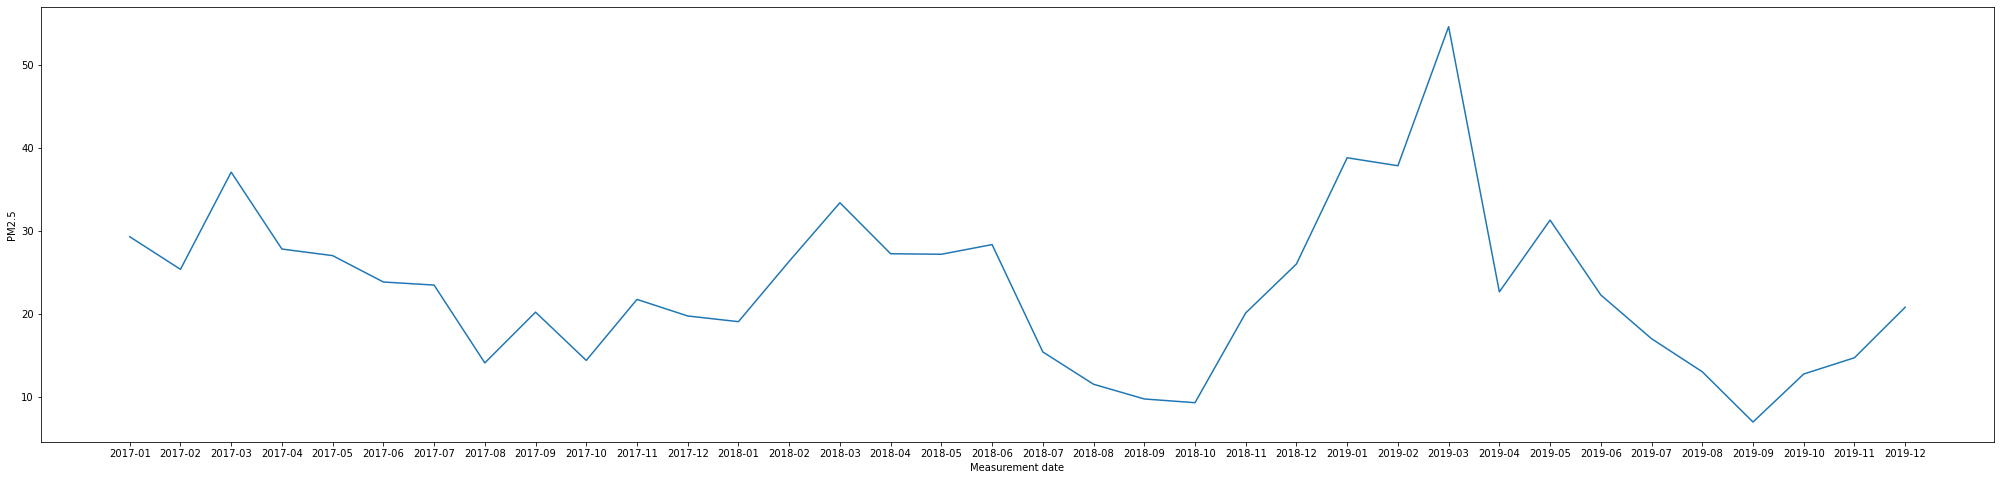

In [44]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_105)

# Station 106

In [45]:
df_106 = df[df['Station code'] == 106]

In [46]:
df_106.head()

Station code Measurement date       SO2       NO2        O3        CO  \
180           106          2017-01  0.004306  0.039382  0.013688  0.753629   
181           106          2017-02  0.004170  0.039503  0.017509  0.706250   
182           106          2017-03  0.004161  0.040300  0.024071  0.581586   
183           106          2017-04  0.003586  0.029808  0.035457  0.494861   
184           106          2017-05  0.005231  0.025903  0.040621  0.459274   

          PM10      PM2.5  
180  50.657258  37.018817  
181  43.989583  31.367560  
182  58.678763  48.217742  
183  54.588889  32.873611  
184  58.586022  27.326613

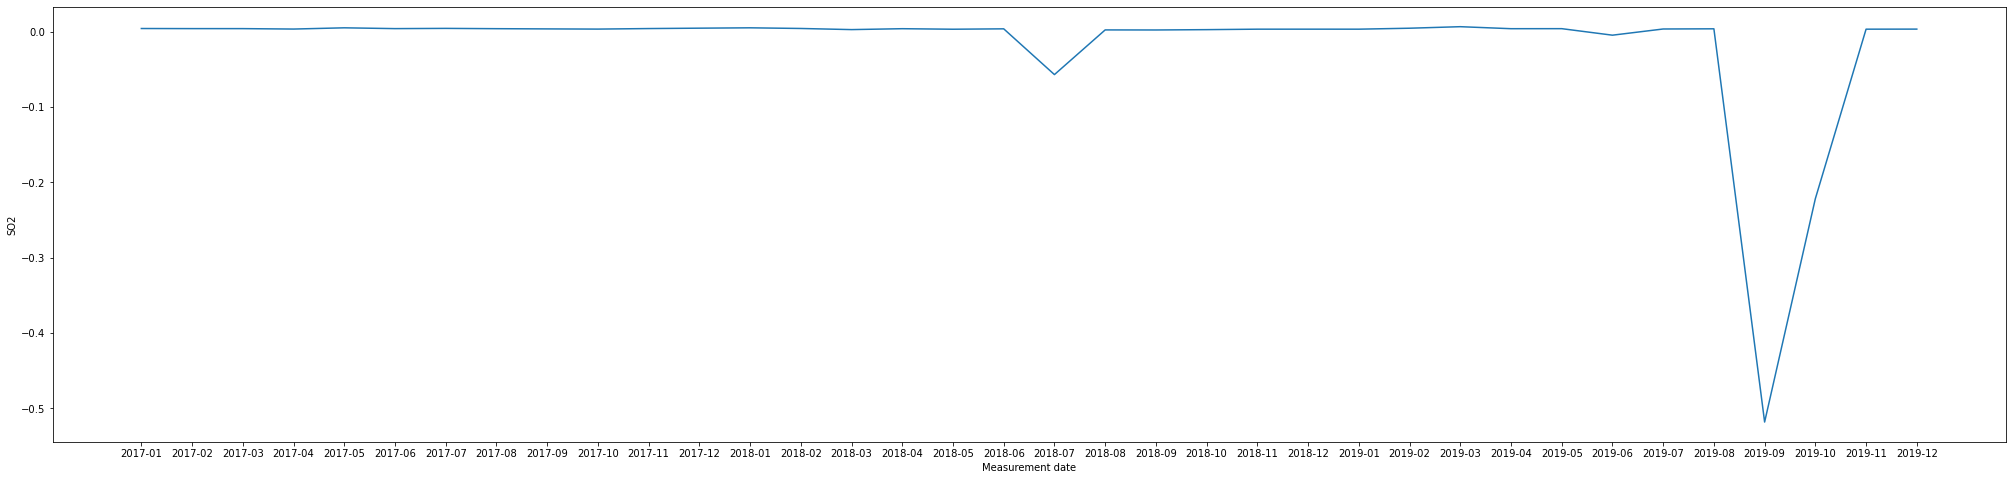

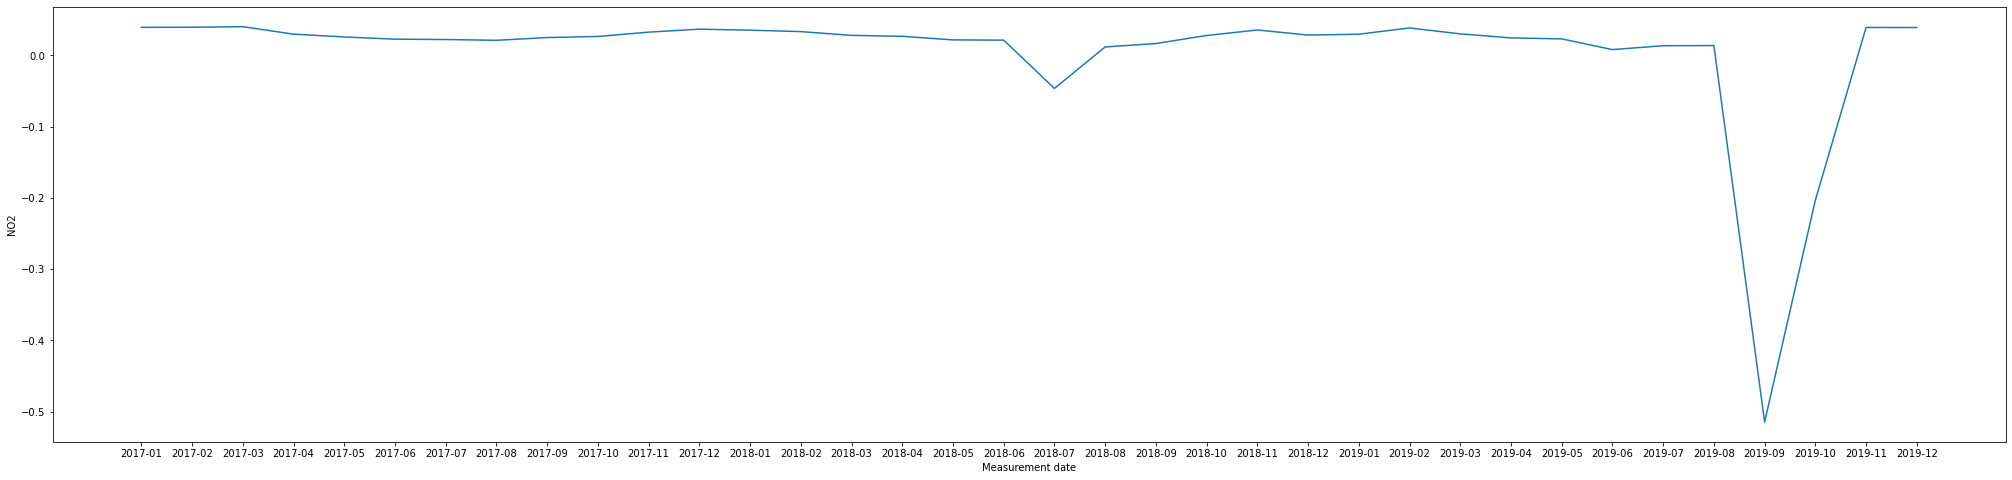

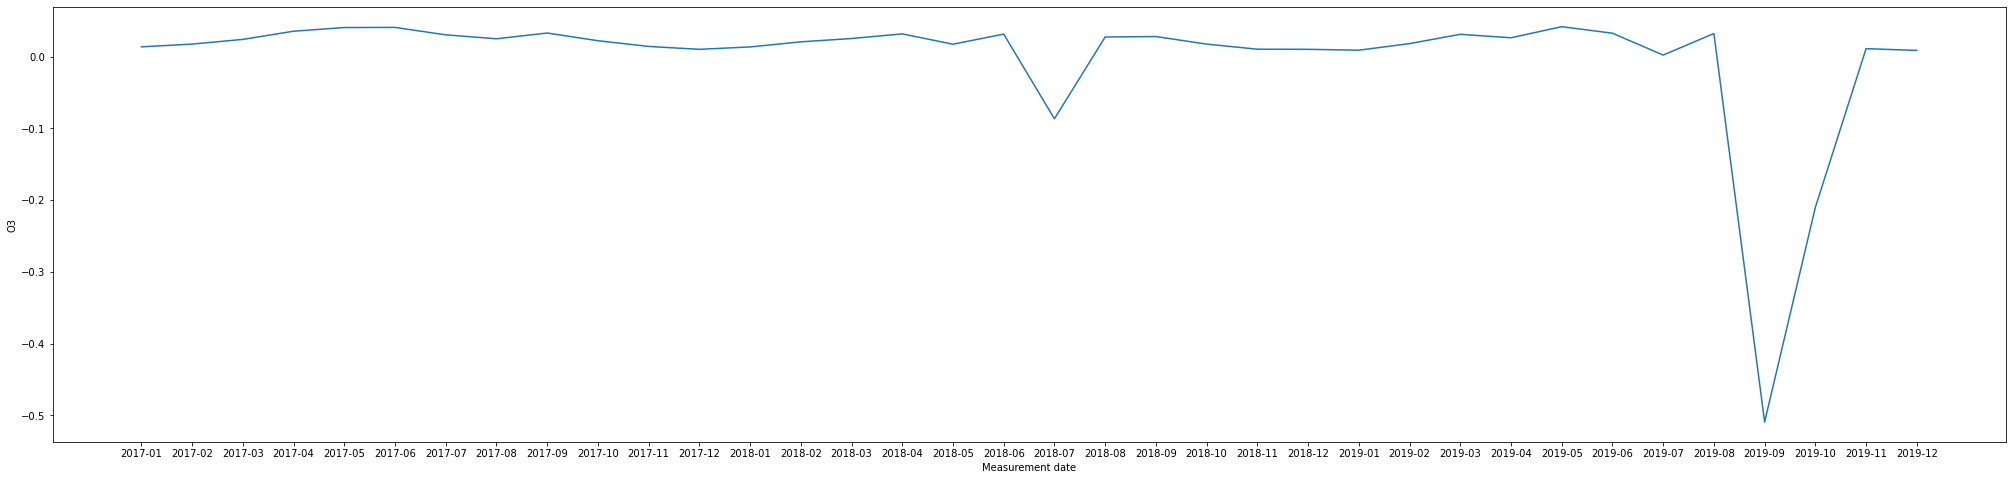

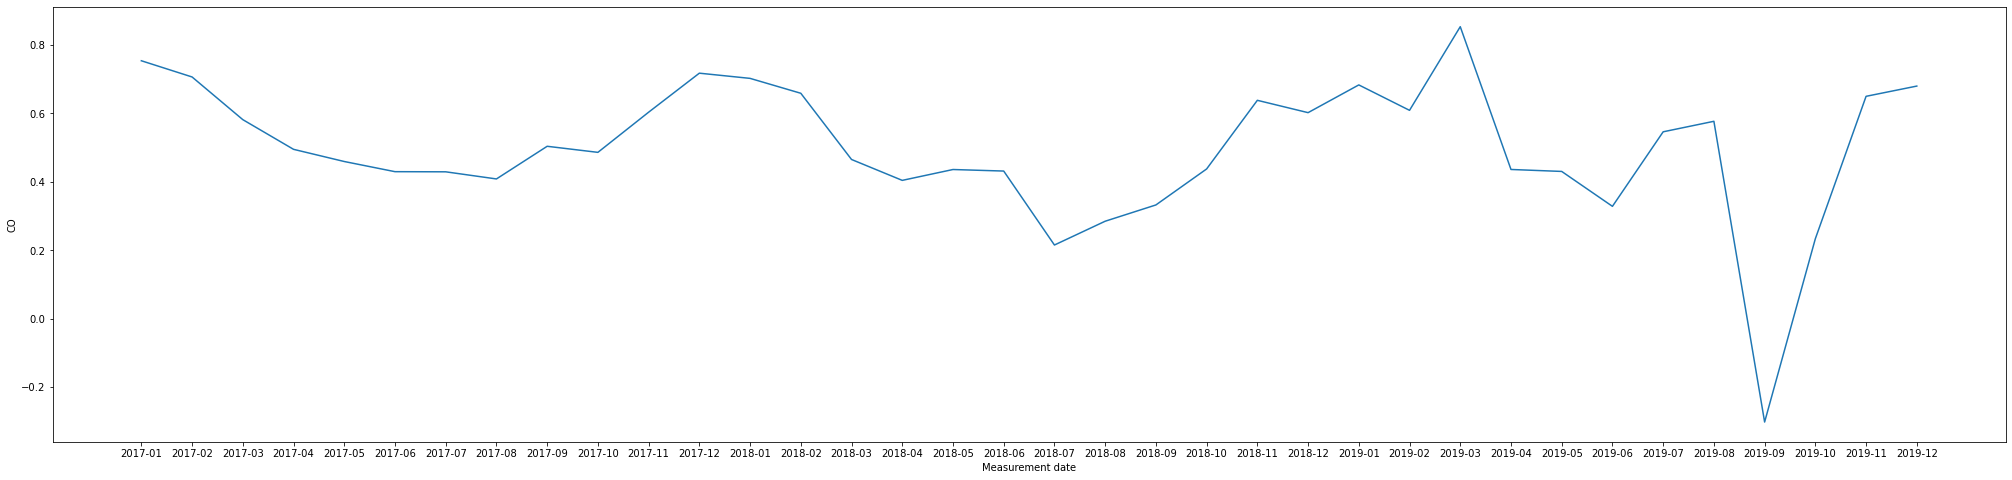

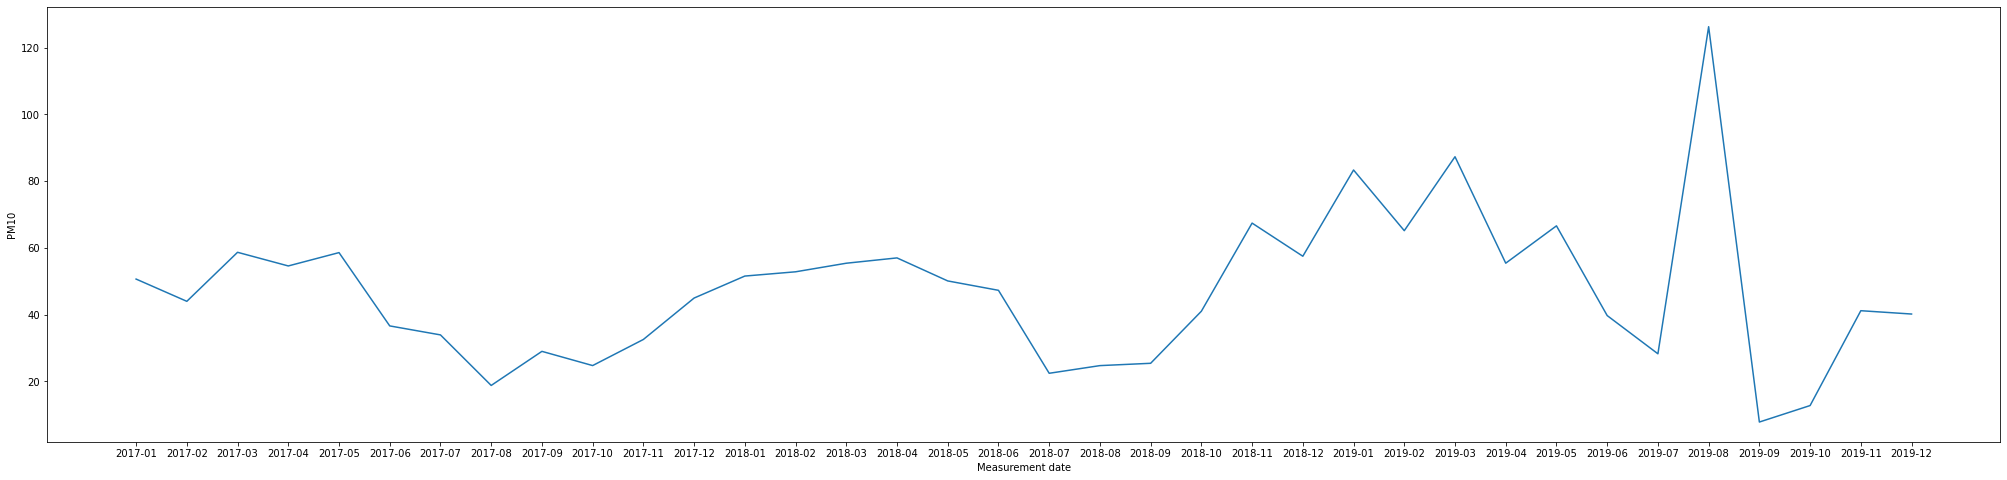

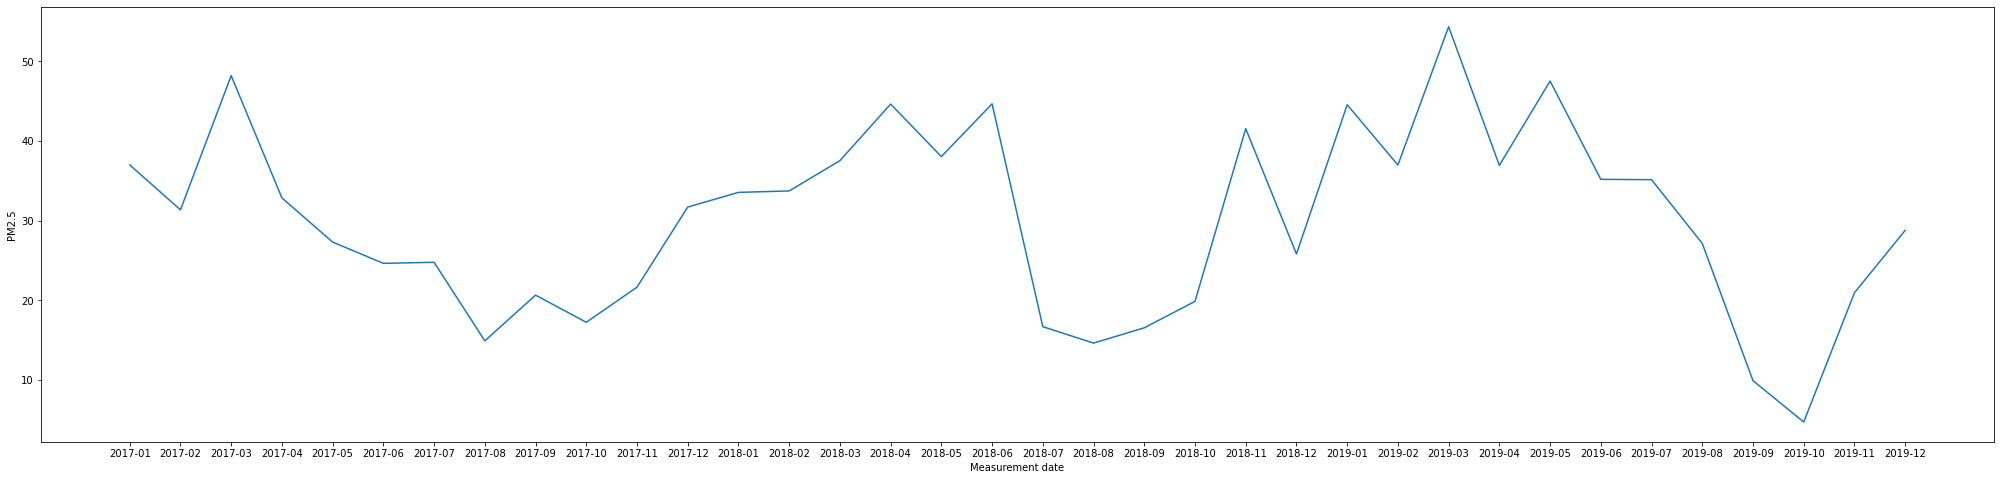

In [47]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_106)

# Station 107

In [48]:
df_107 = df[df['Station code'] == 107]

In [49]:
df_107.head()

Station code Measurement date       SO2       NO2        O3        CO  \
216           107          2017-01  0.004364  0.035485  0.013395  0.553091   
217           107          2017-02  0.004156  0.035390  0.016054  0.527232   
218           107          2017-03  0.004587  0.038688  0.021124  0.526882   
219           107          2017-04  0.004504  0.030819  0.025258  0.441528   
220           107          2017-05  0.004558  0.028644  0.025903  0.355914   

          PM10      PM2.5  
216  54.611559  31.702957  
217  47.608631  28.007440  
218  65.274194  46.716398  
219  68.300000  26.840278  
220  77.920699  27.298387

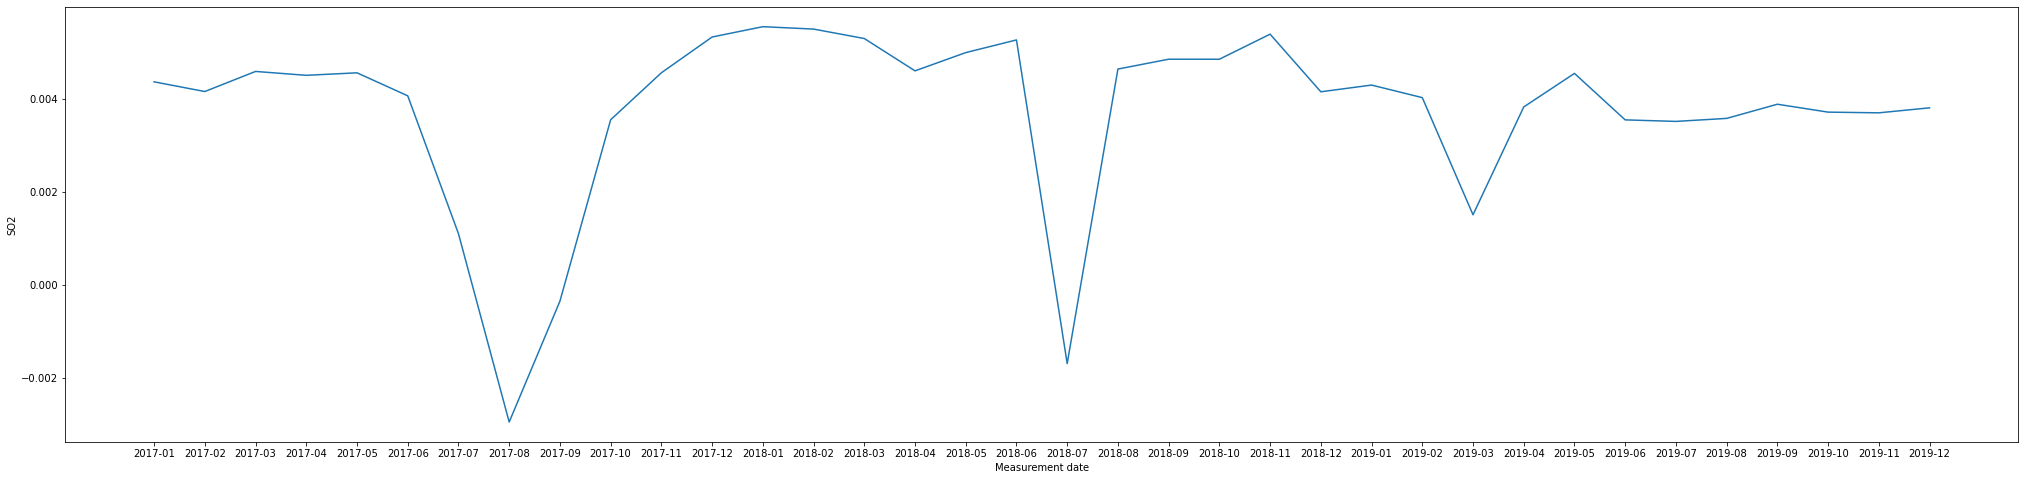

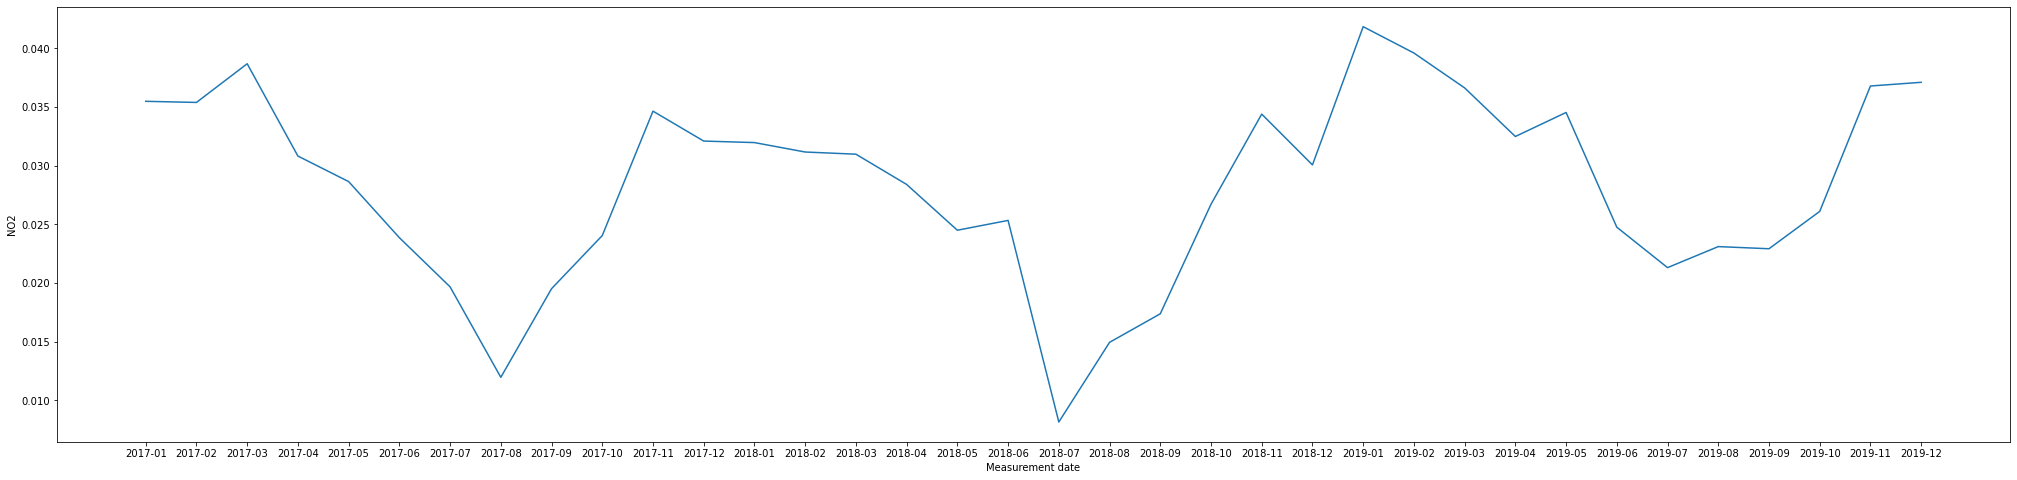

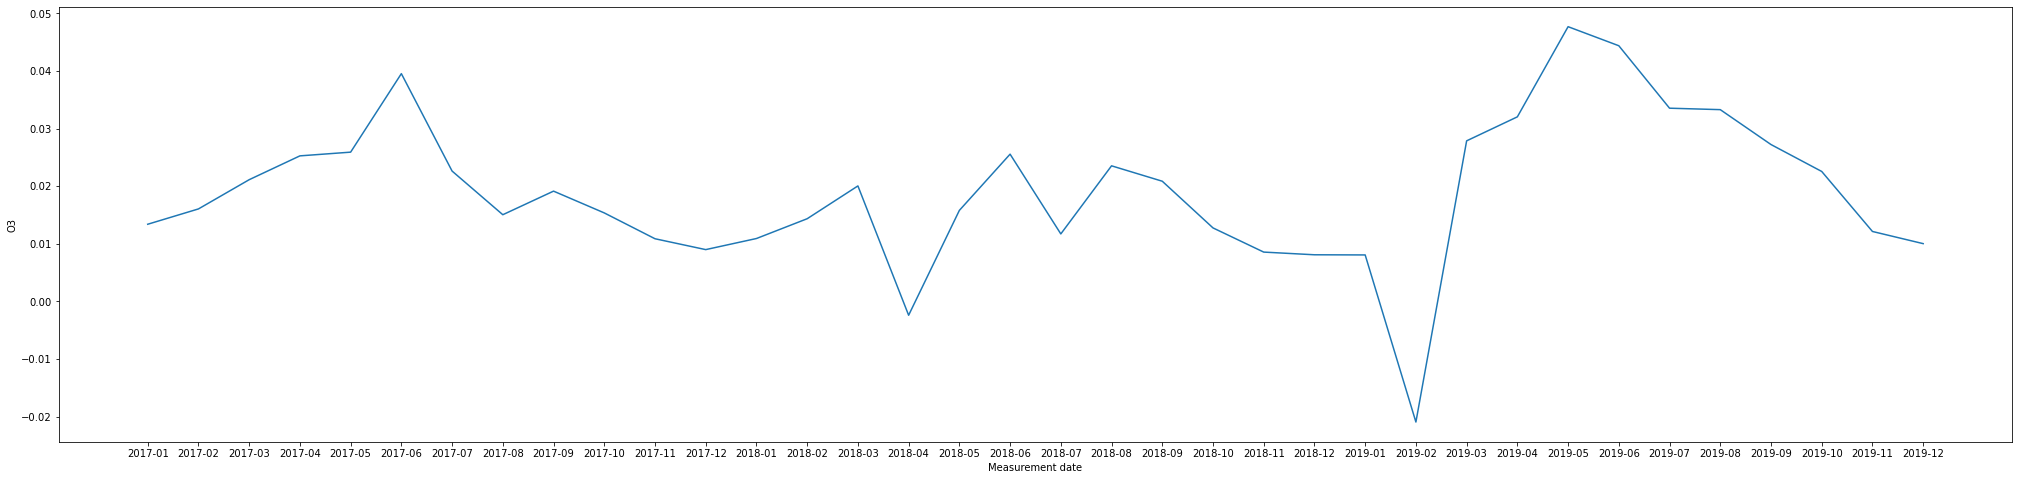

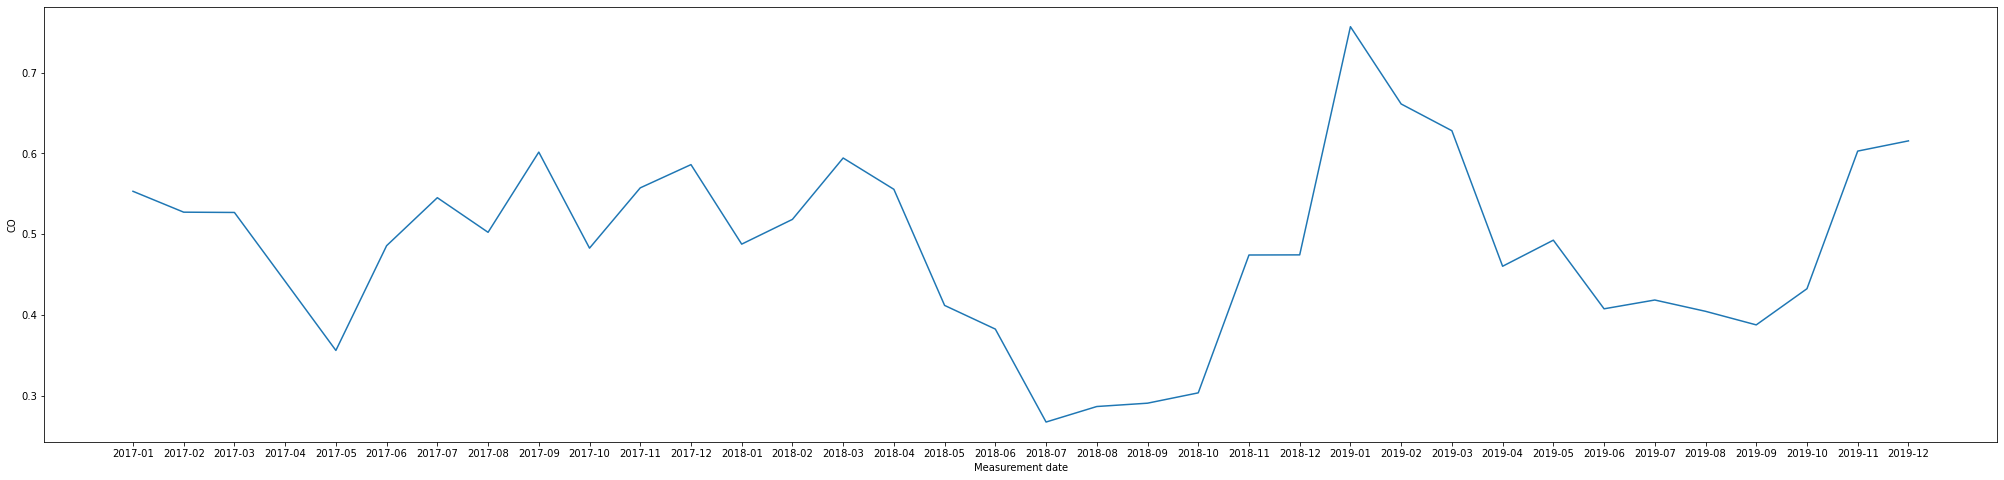

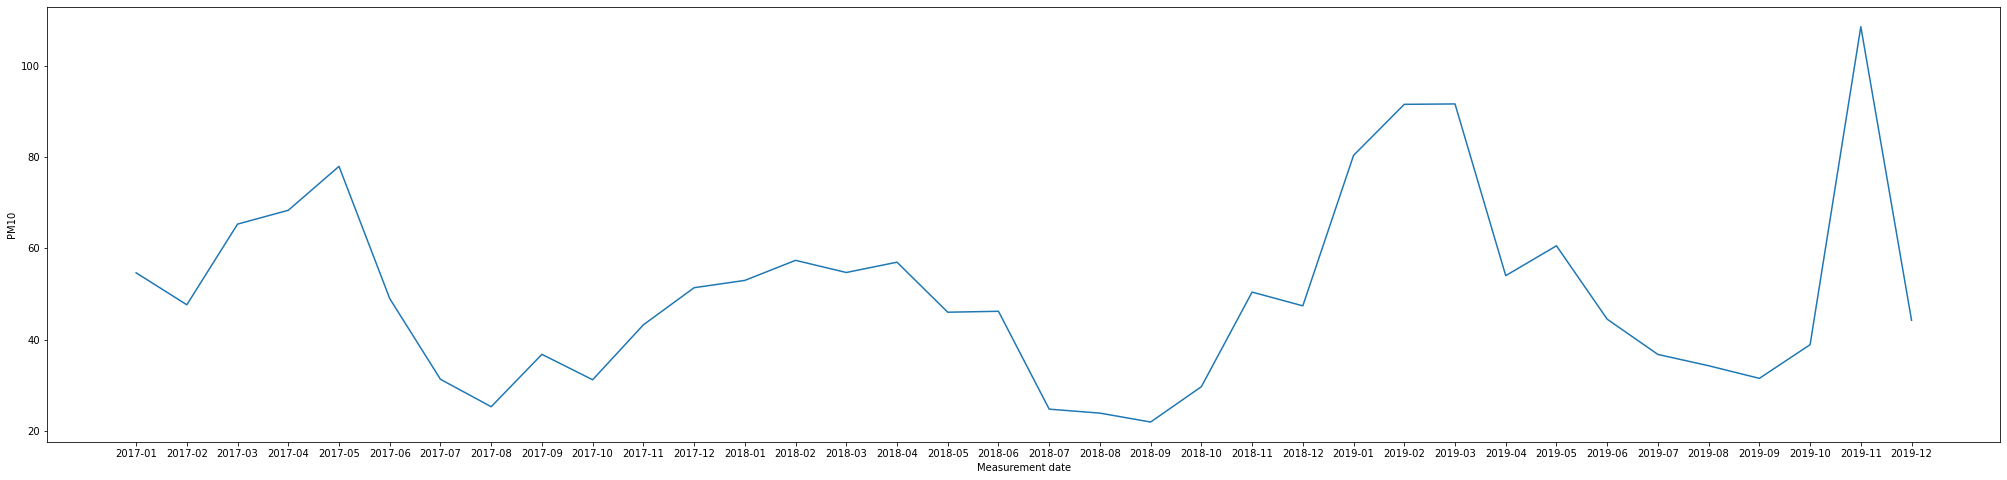

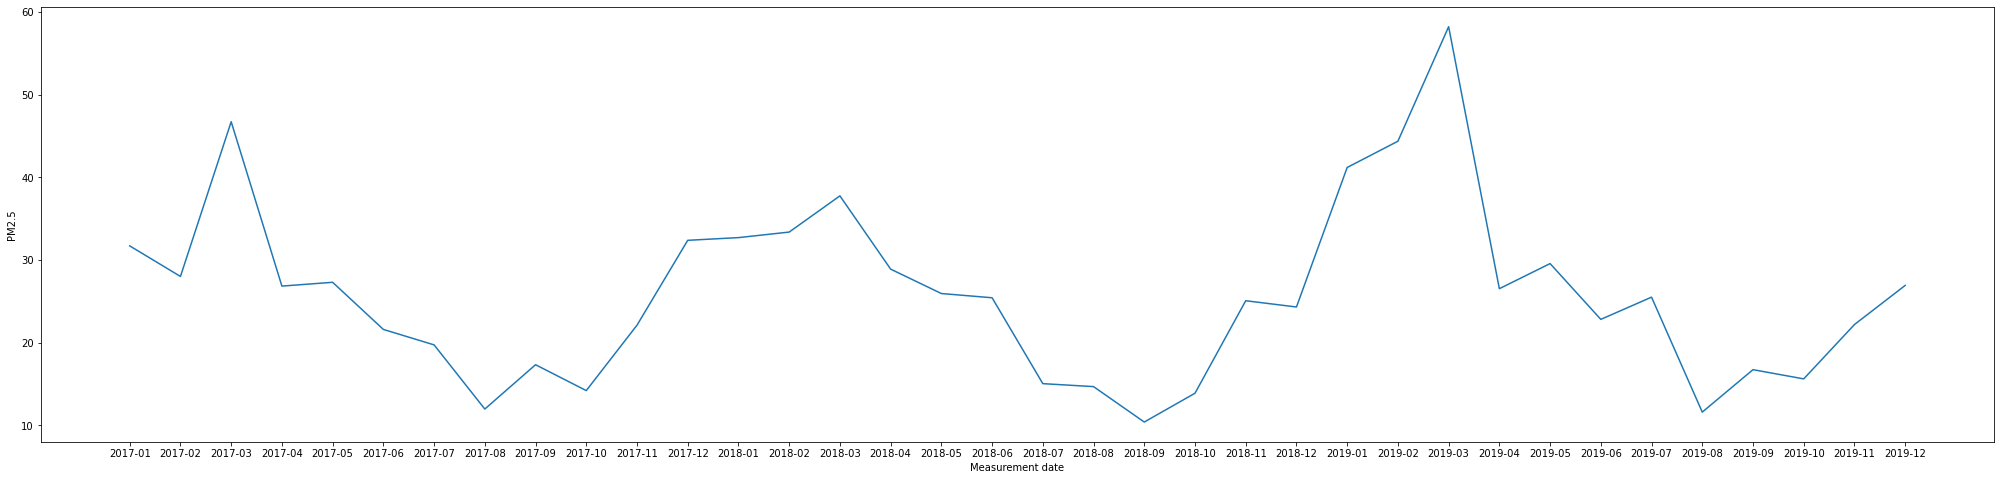

In [50]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_107)

# Station 108

In [51]:
df_108 = df[df['Station code'] == 108]

In [52]:
df_108.head()

Station code Measurement date       SO2       NO2        O3        CO  \
252           108          2017-01  0.004773  0.037145  0.016917  0.674597   
253           108          2017-02  0.004939  0.036688  0.023070  0.634375   
254           108          2017-03  0.004845  0.038078  0.033523  0.619355   
255           108          2017-04  0.004557  0.029864  0.042549  0.493056   
256           108          2017-05  0.004784  0.028406  0.043390  0.472043   

          PM10      PM2.5  
252  53.196237  37.256720  
253  45.656250  31.625000  
254  58.200269  43.793011  
255  51.145833  25.106944  
256  55.051075  22.399194

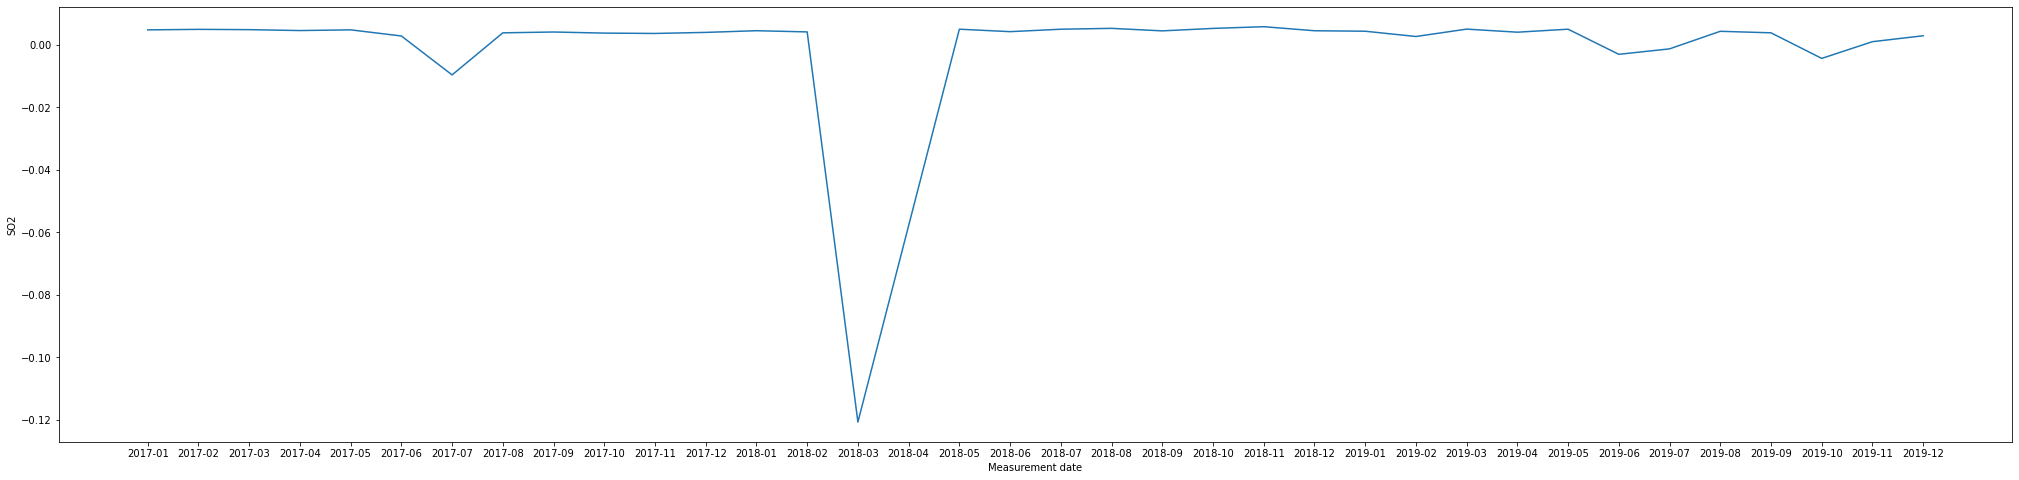

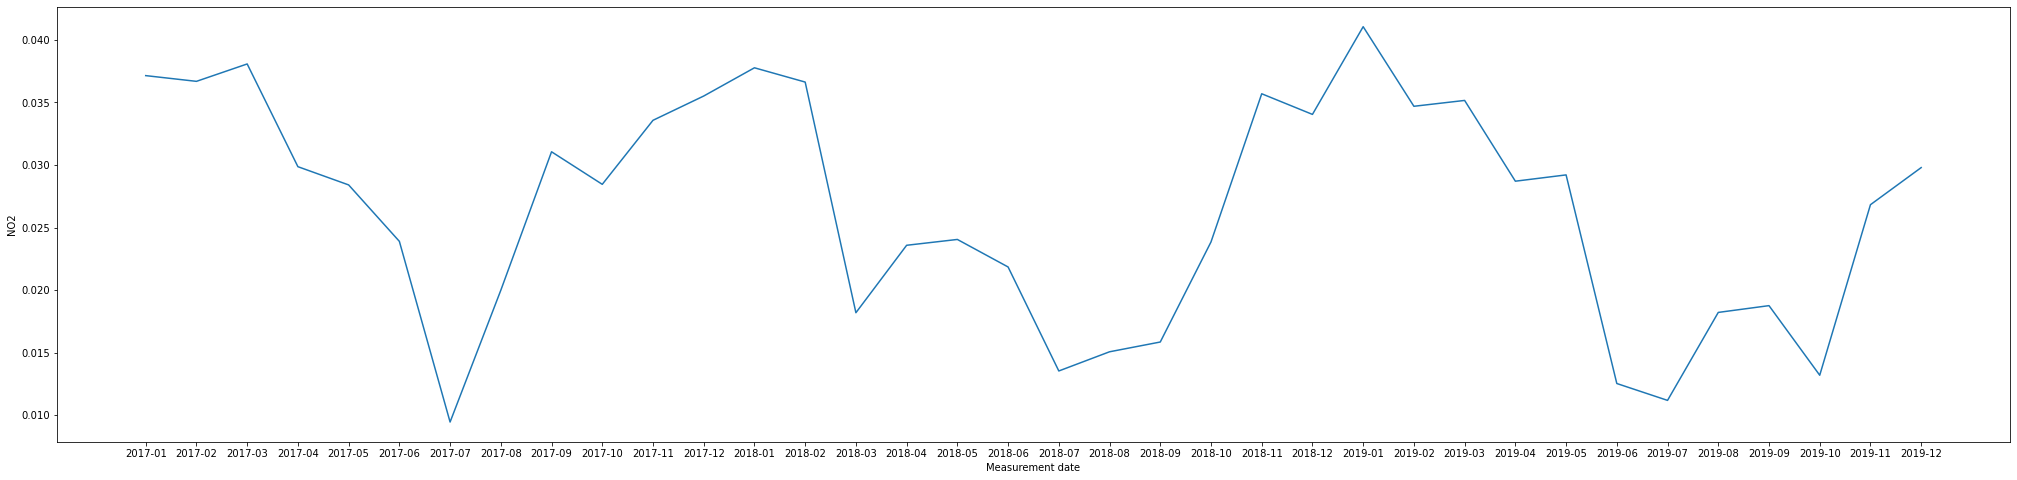

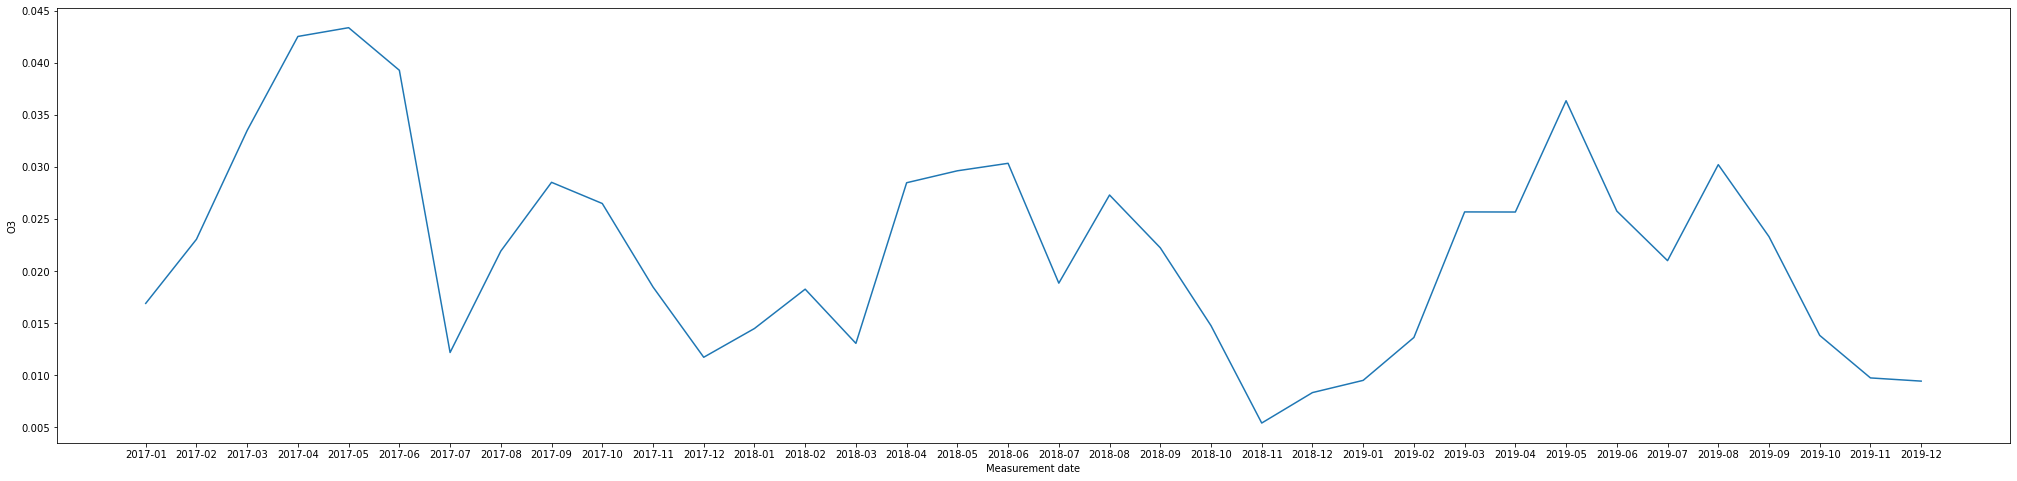

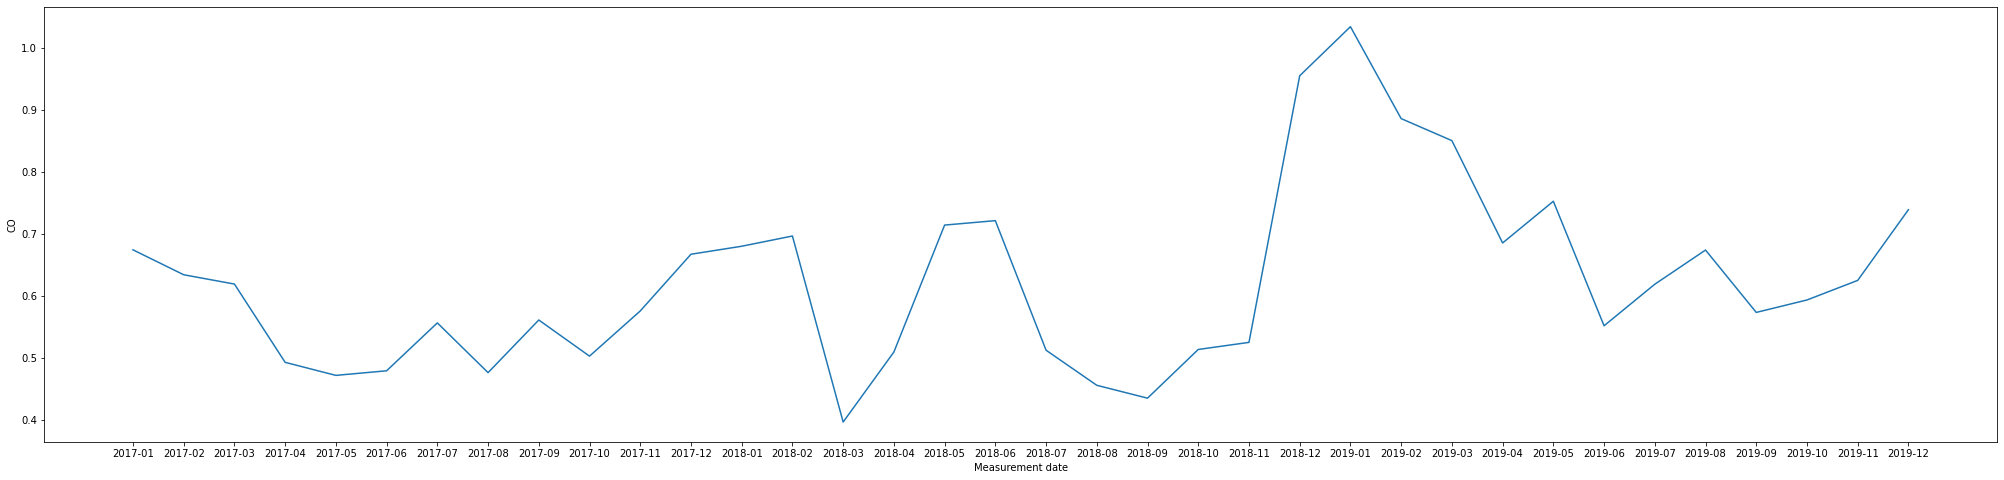

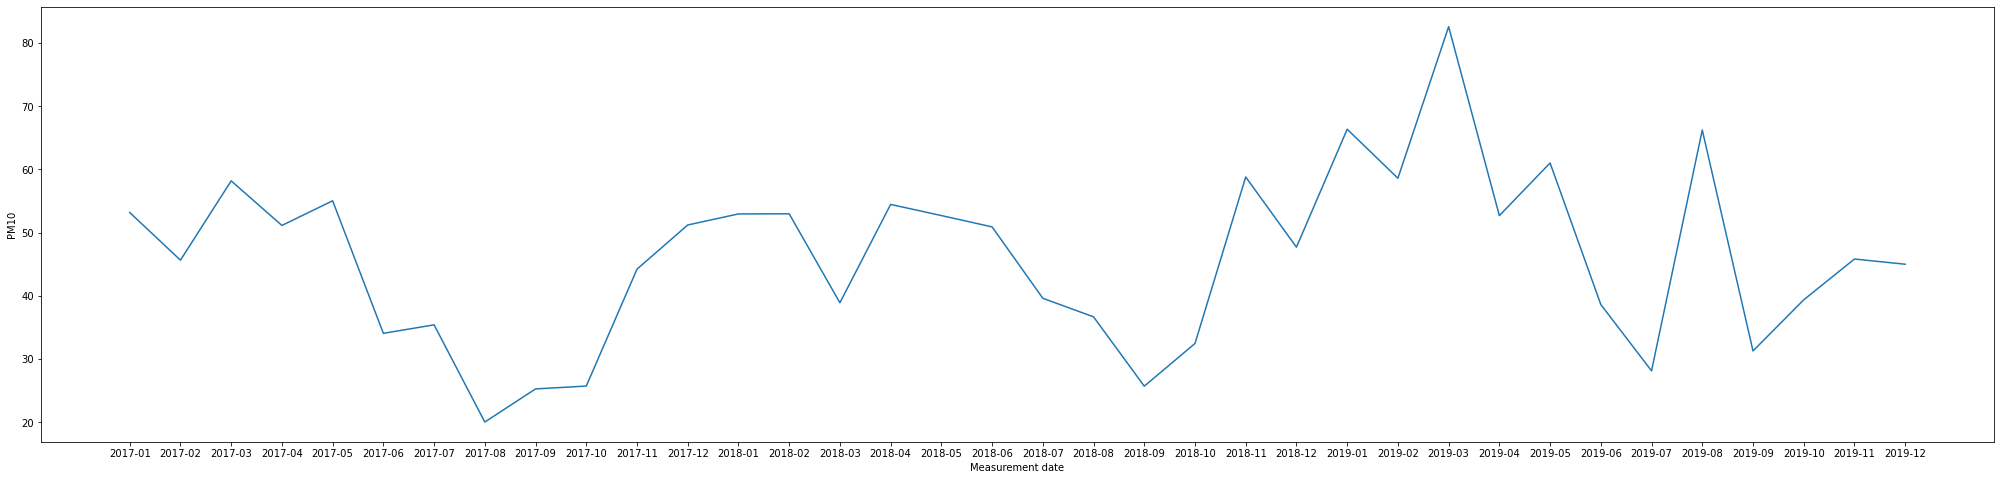

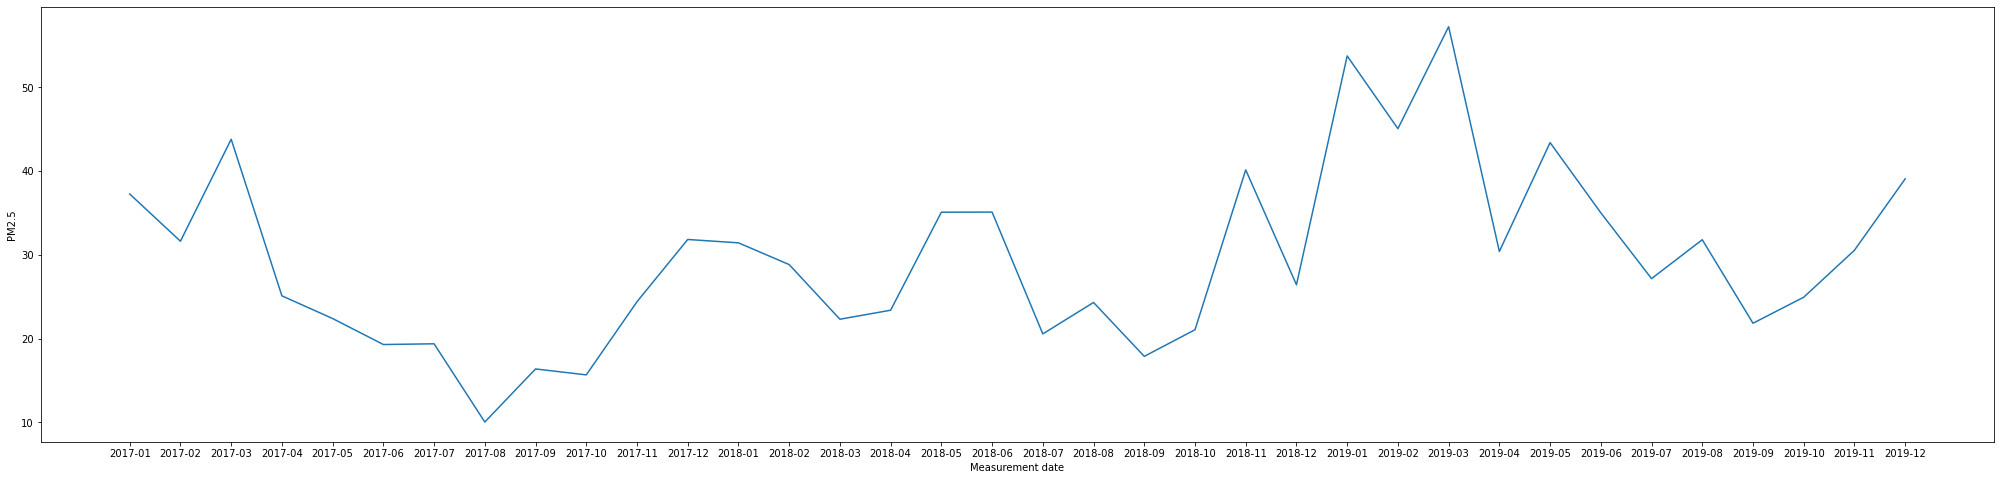

In [53]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_108)

# Station 109

In [54]:
df_109 = df[df['Station code'] == 109]

In [55]:
df_109.head()

Station code Measurement date       SO2       NO2        O3        CO  \
288           109          2017-01  0.005200  0.035105  0.012483  0.779570   
289           109          2017-02  0.005080  0.033836  0.015167  0.671726   
290           109          2017-03  0.005019  0.036257  0.023577  0.450806   
291           109          2017-04  0.005144  0.031161  0.031629  0.380972   
292           109          2017-05  0.005578  0.027160  0.034008  0.367070   

          PM10      PM2.5  
288  57.956989  32.892473  
289  49.752976  27.238095  
290  62.161290  32.967742  
291  49.994444  22.276389  
292  55.456989  20.774194

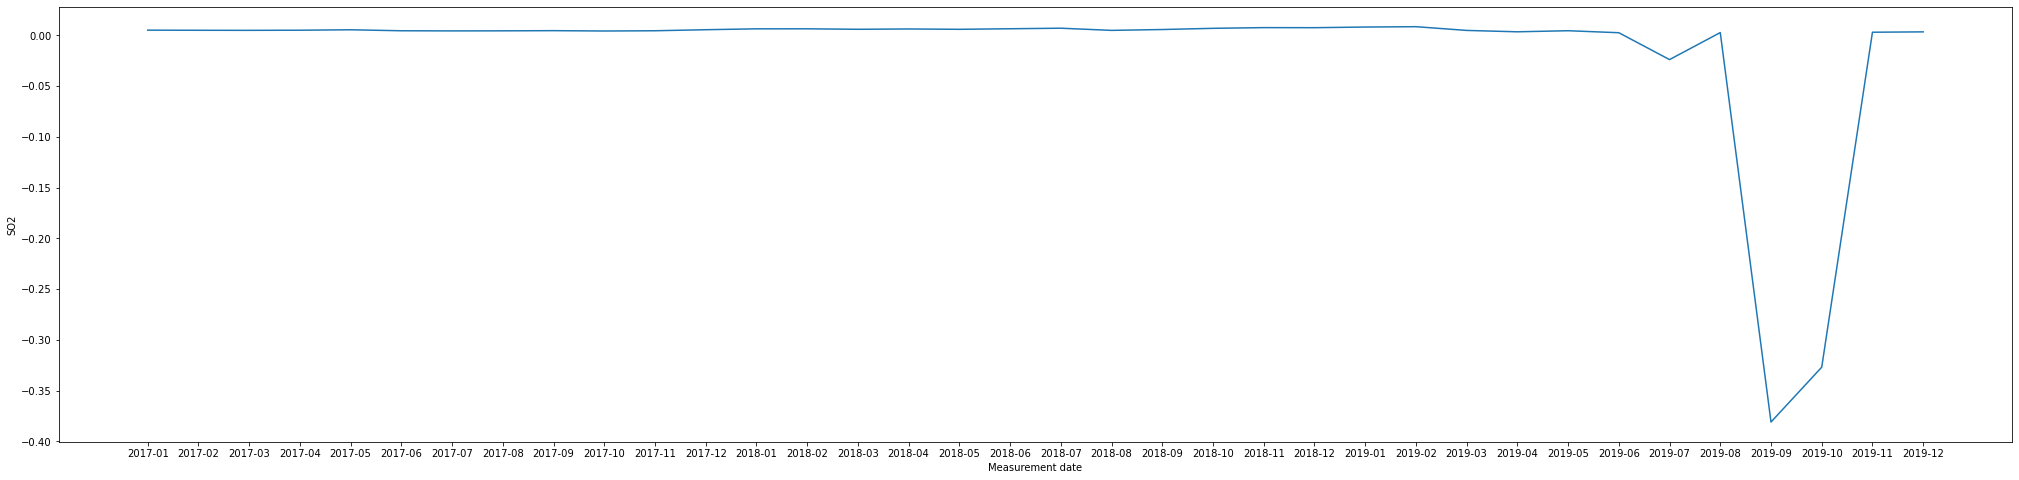

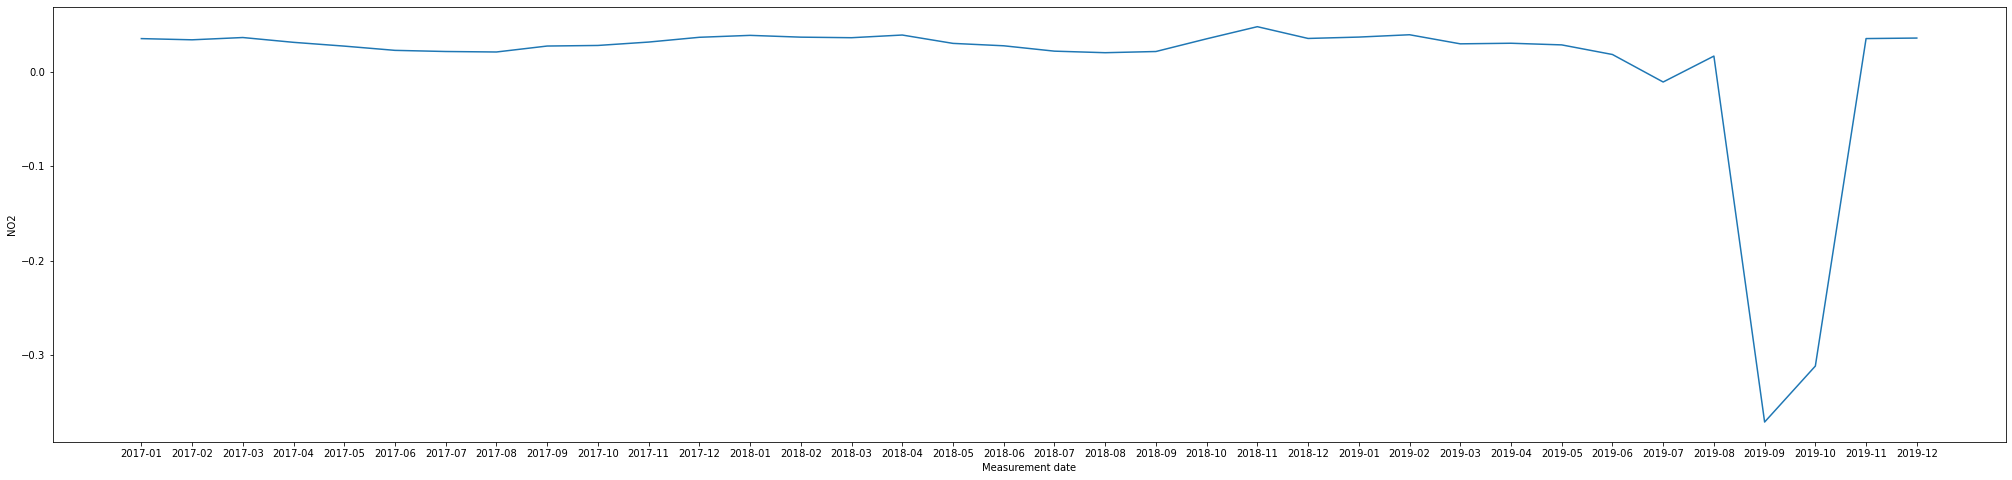

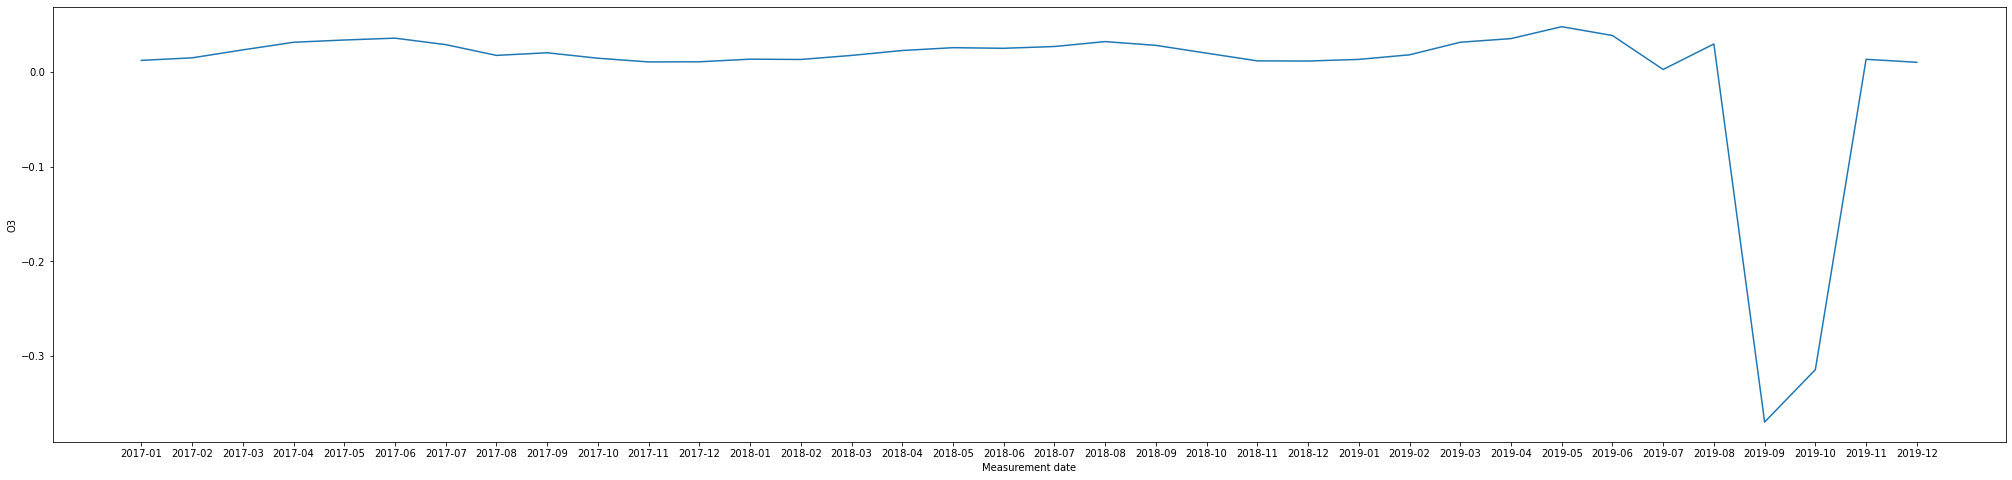

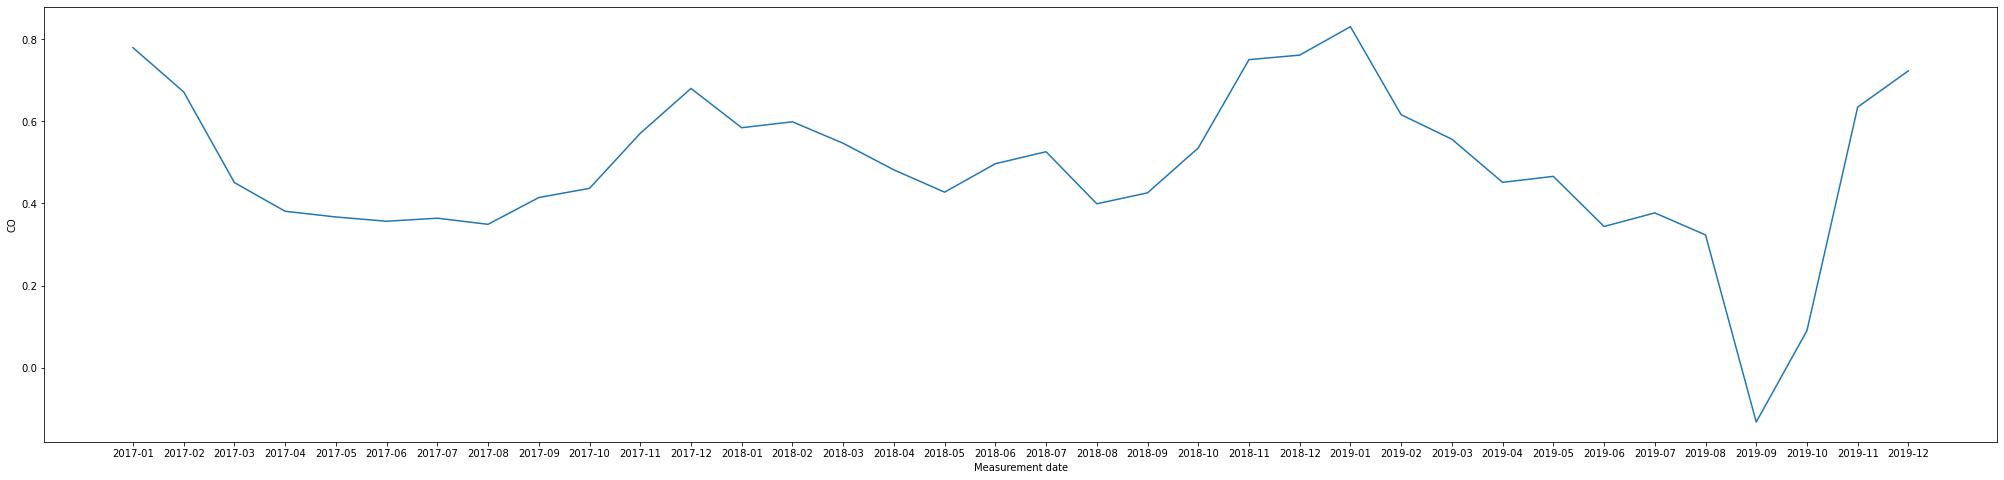

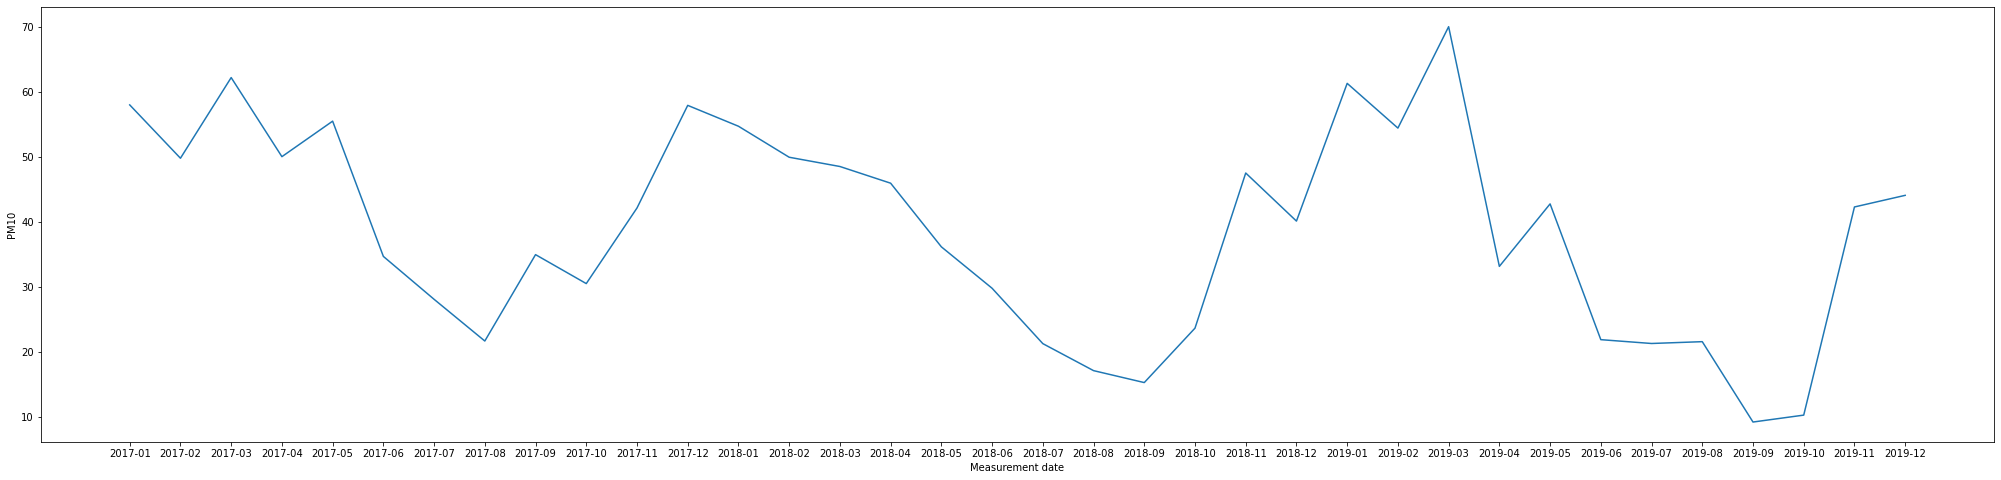

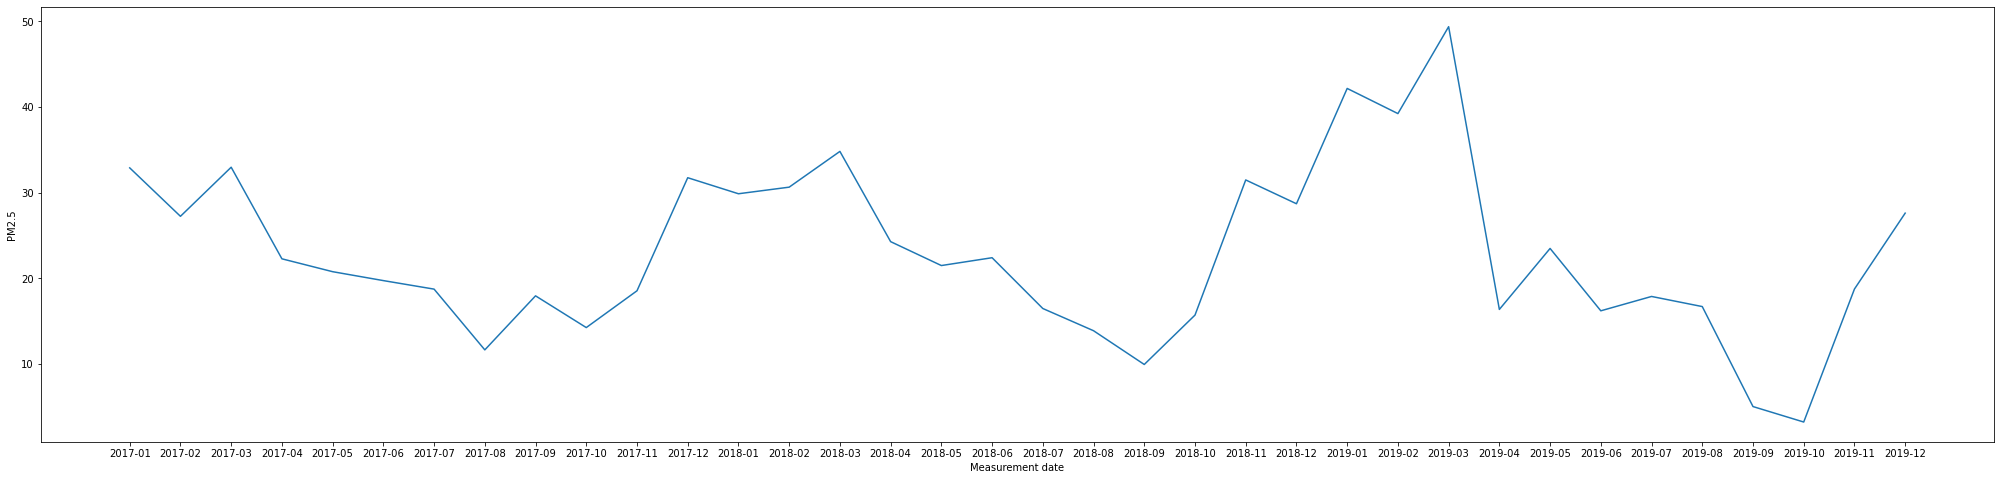

In [56]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_109)

# Station 110

In [57]:
df_110 = df[df['Station code'] == 110]

In [58]:
df_110.head()

Station code Measurement date       SO2       NO2        O3        CO  \
324           110          2017-01  0.005308  0.036571  0.012230  0.565457   
325           110          2017-02  0.005673  0.035546  0.017449  0.499256   
326           110          2017-03  0.005878  0.035091  0.024331  0.465188   
327           110          2017-04  0.005933  0.028964  0.033931  0.368056   
328           110          2017-05  0.006308  0.029809  0.035702  0.320027   

          PM10      PM2.5  
324  56.954301  35.631720  
325  48.825893  30.569940  
326  59.764785  36.215054  
327  59.484722  26.213889  
328  69.856183  27.256720

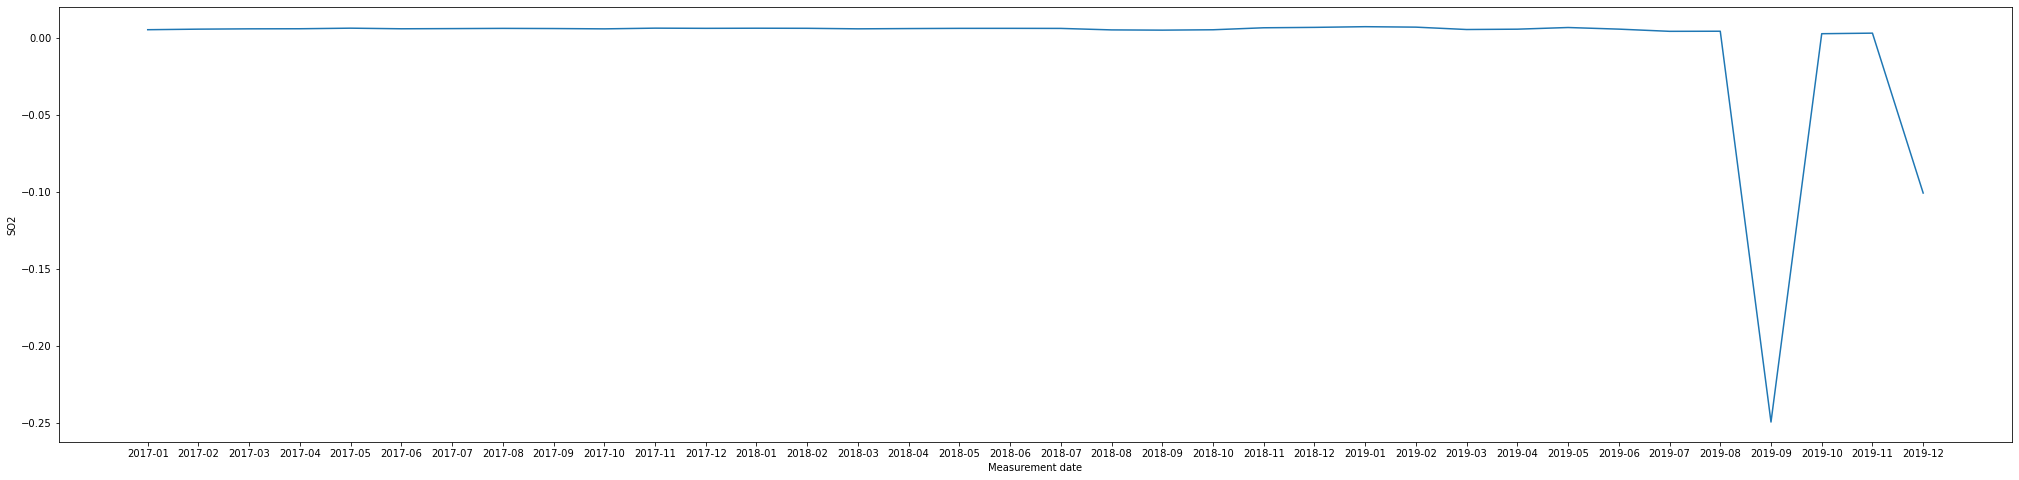

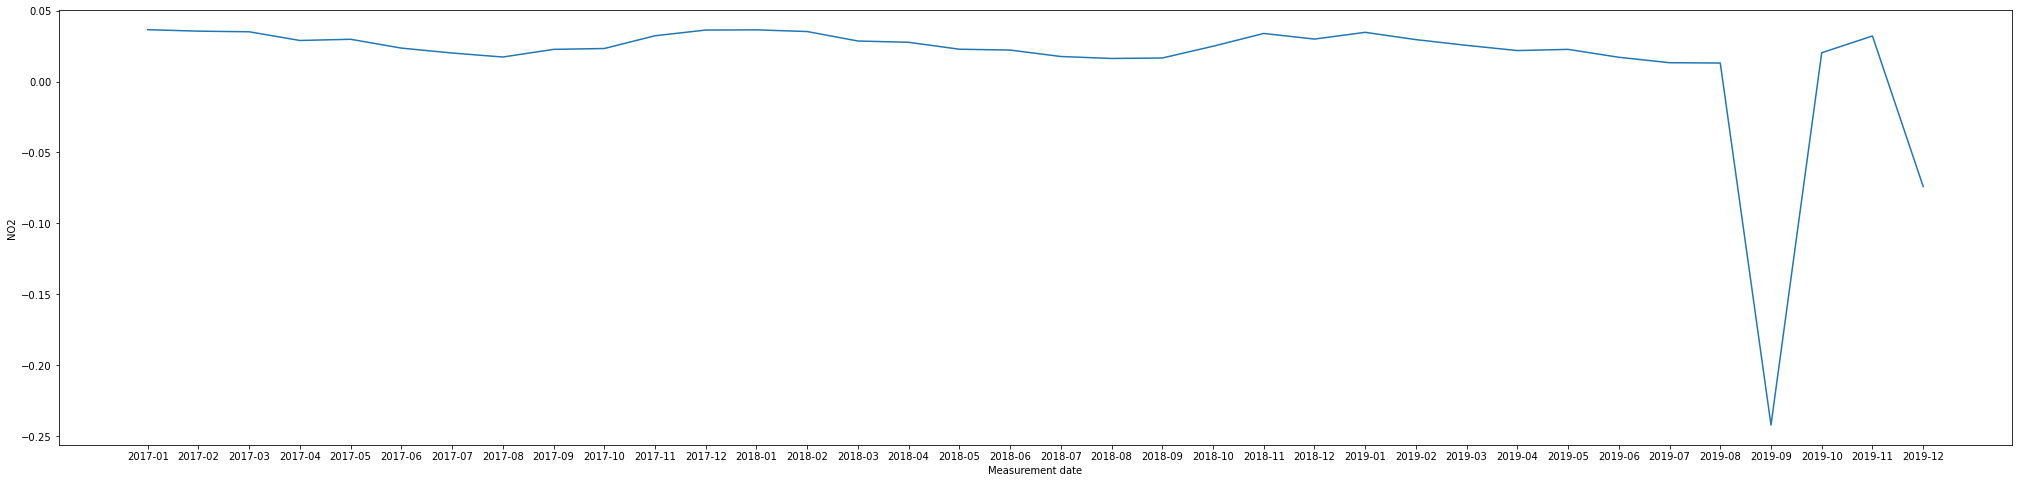

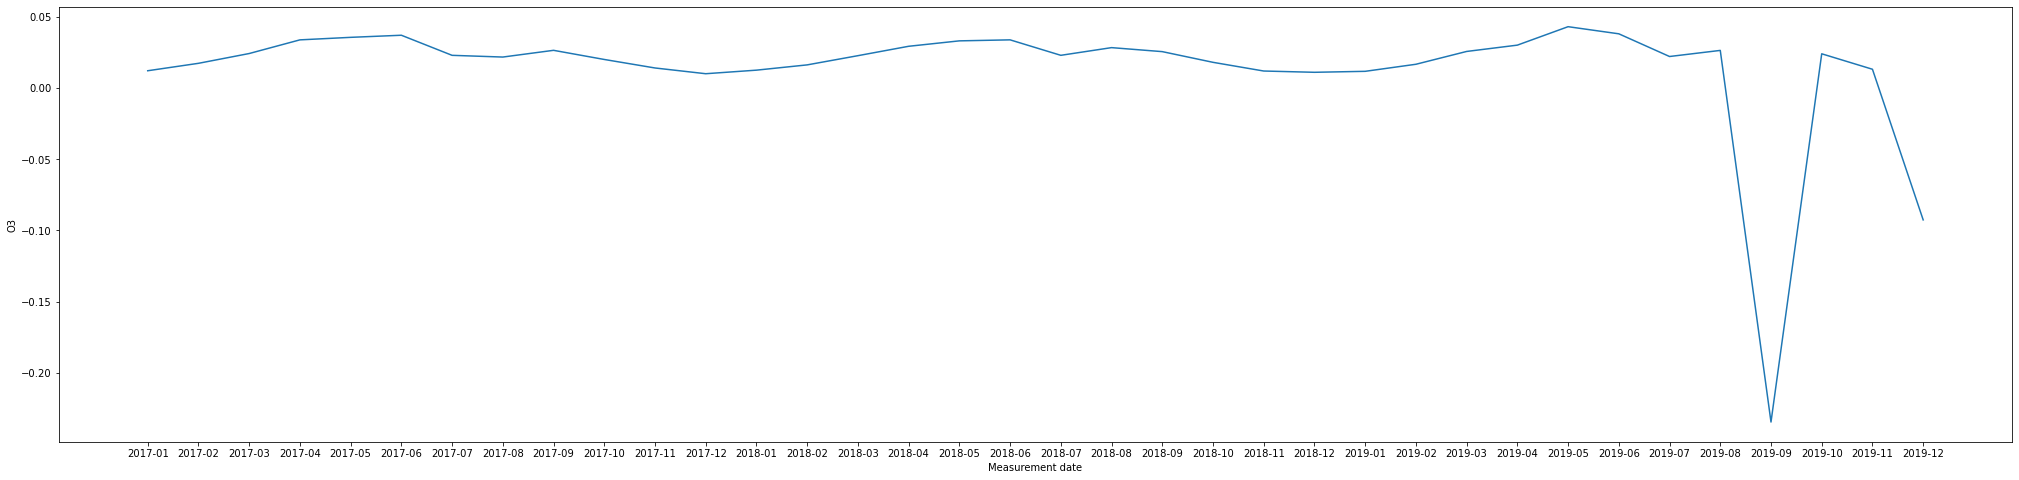

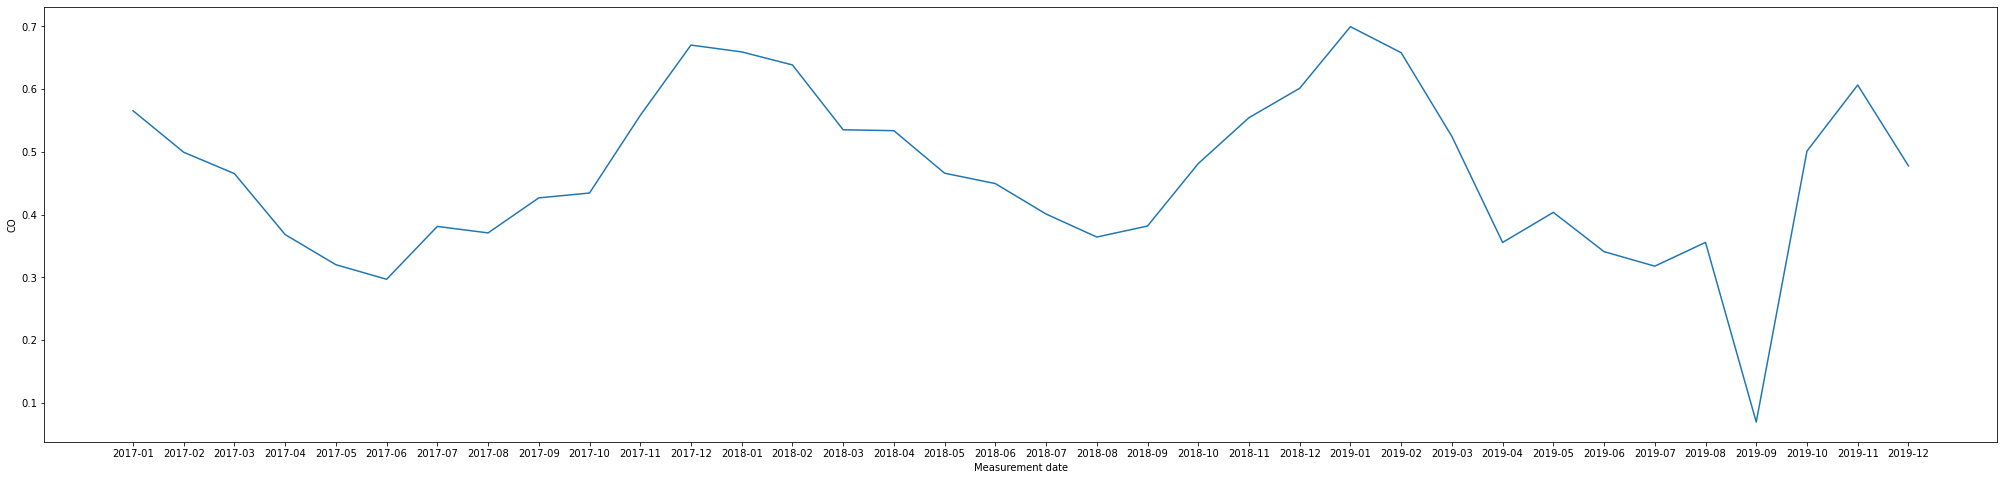

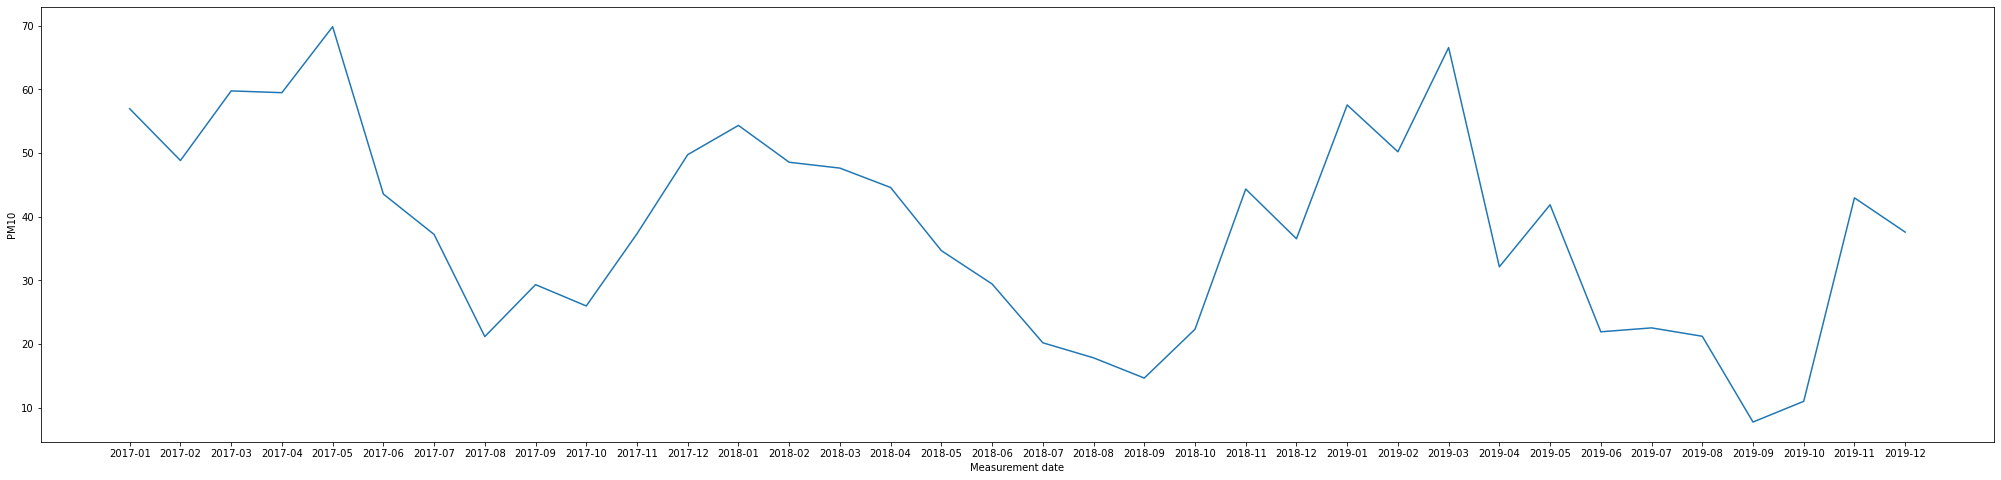

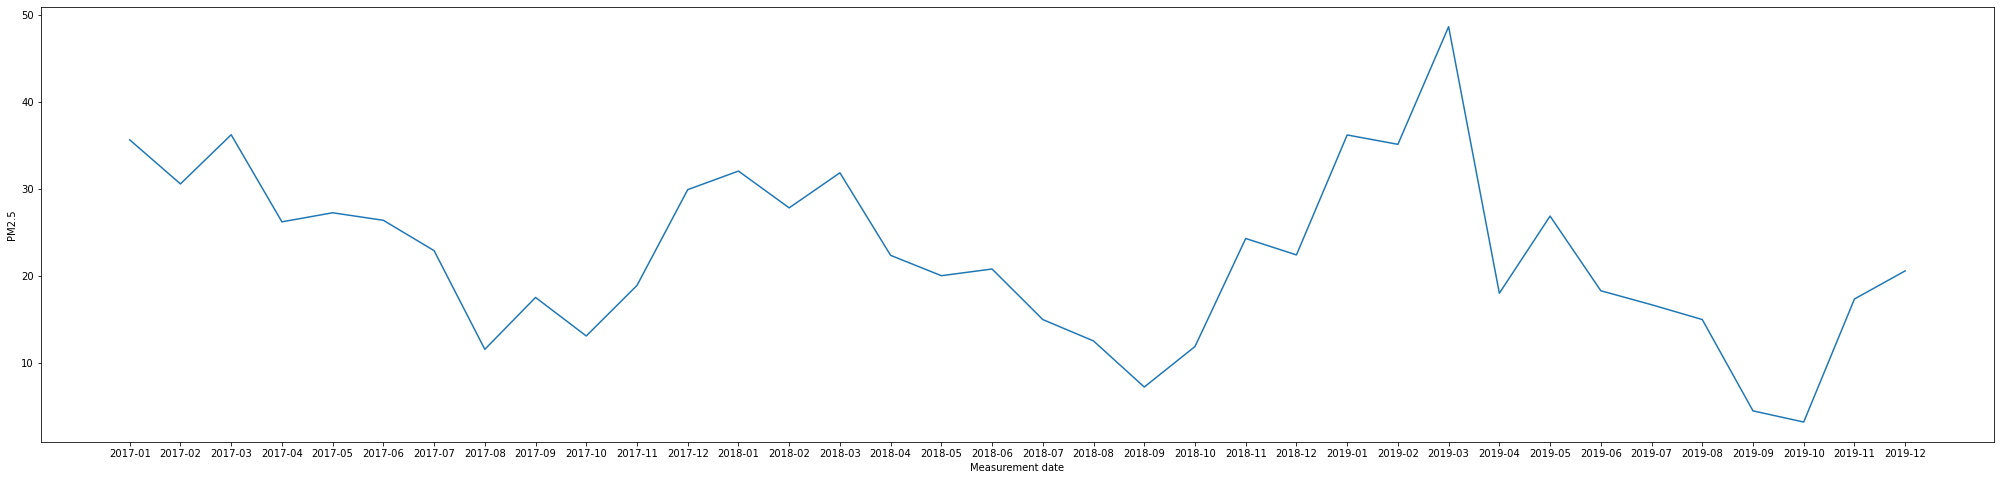

In [59]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_110)

# Station 111

In [60]:
df_111 = df[df['Station code'] == 111]

In [61]:
df_111.head()

Station code Measurement date       SO2       NO2        O3        CO  \
360           111          2017-01  0.000723  0.034485  0.008324  0.818414   
361           111          2017-02  0.004555  0.039882  0.016192  0.769643   
362           111          2017-03  0.003972  0.043266  0.024465  0.640726   
363           111          2017-04  0.004025  0.036376  0.030214  0.655278   
364           111          2017-05  0.004812  0.031690  0.036022  0.528091   

          PM10      PM2.5  
360  52.692204  29.119624  
361  48.547619  28.212798  
362  58.801075  44.689516  
363  57.870833  26.654167  
364  70.404570  26.701613

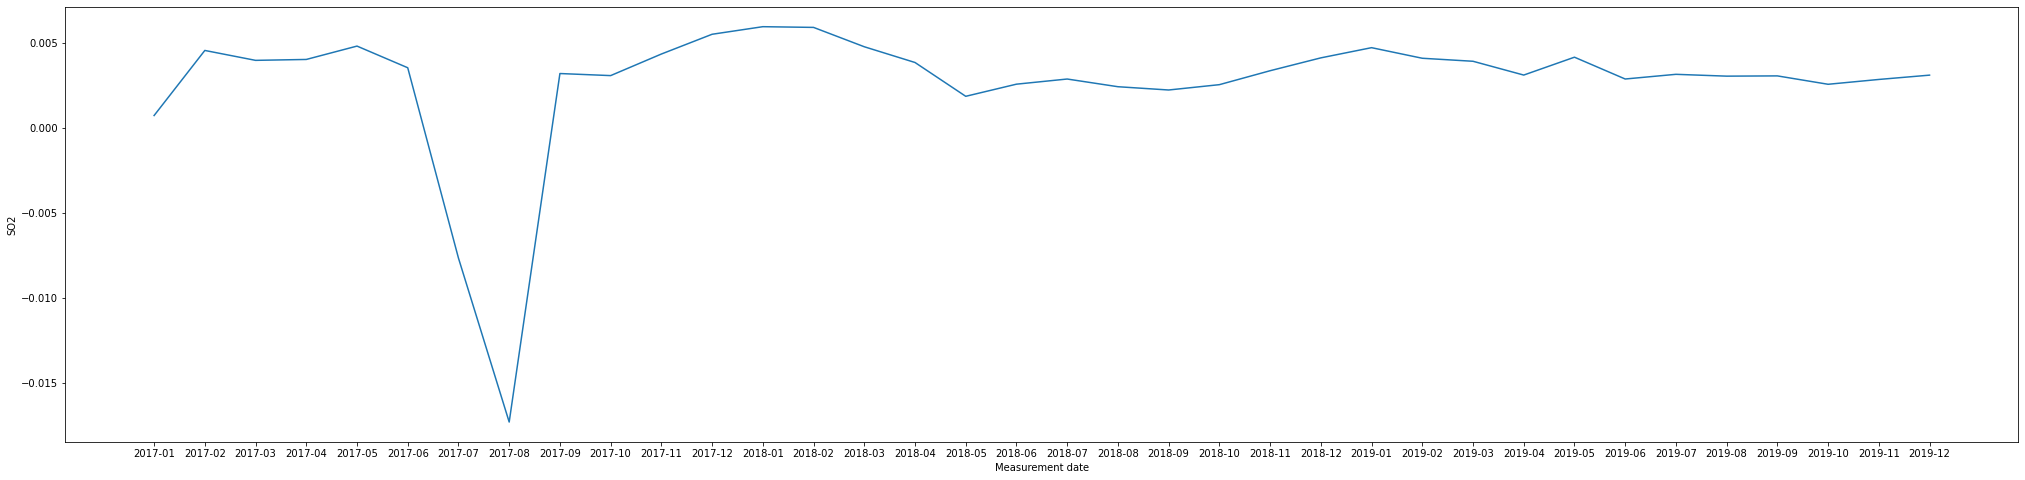

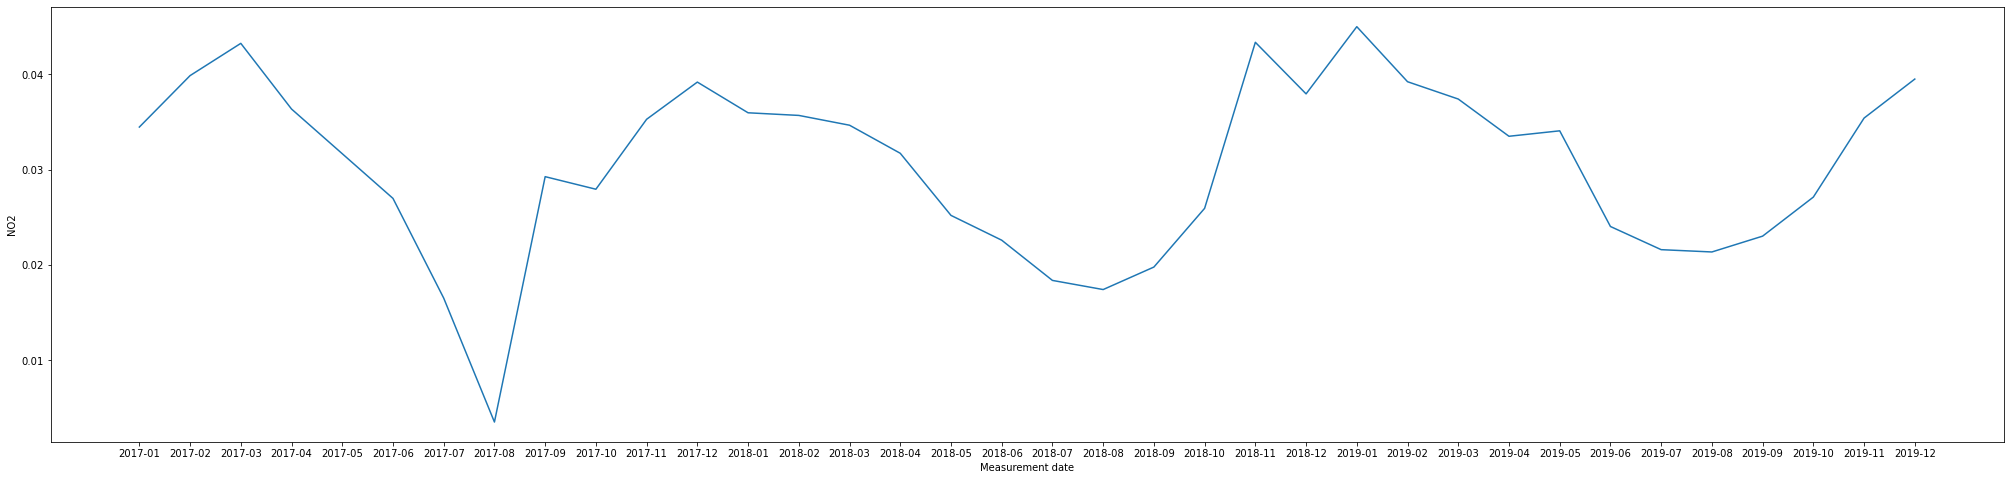

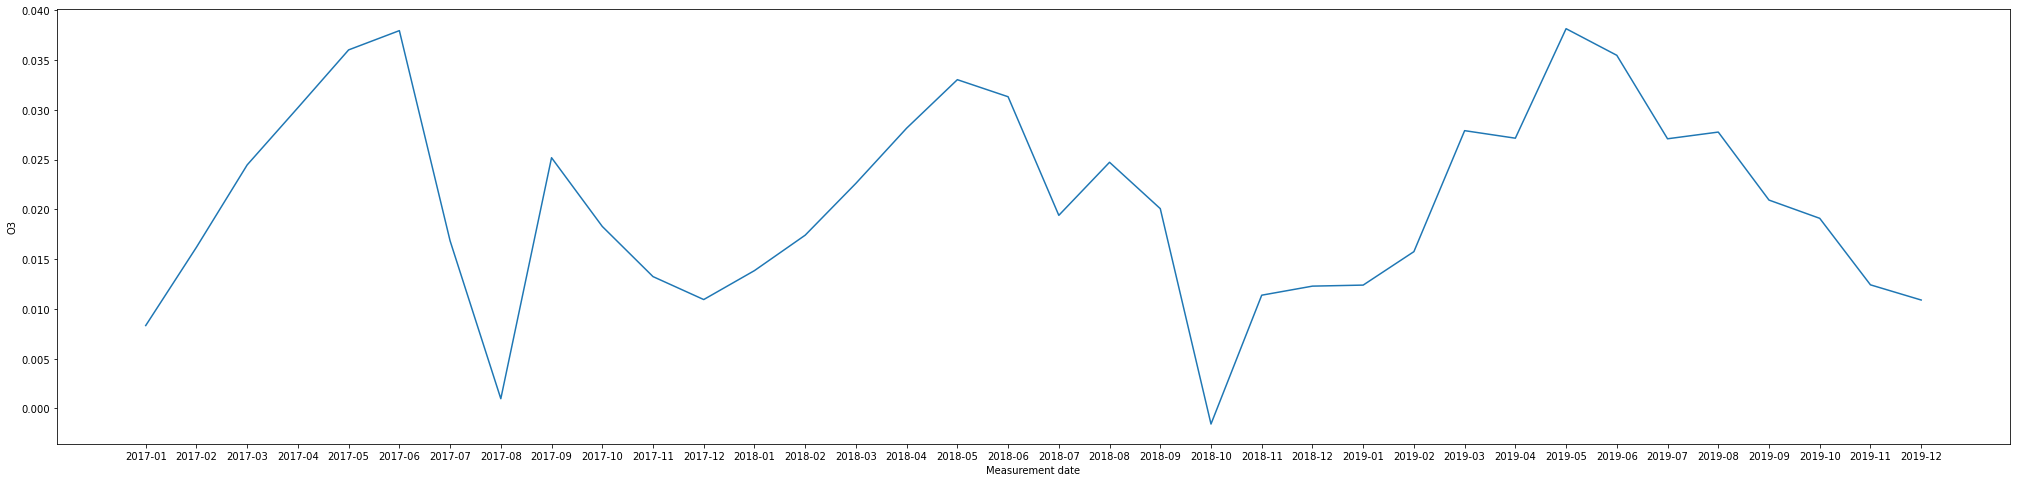

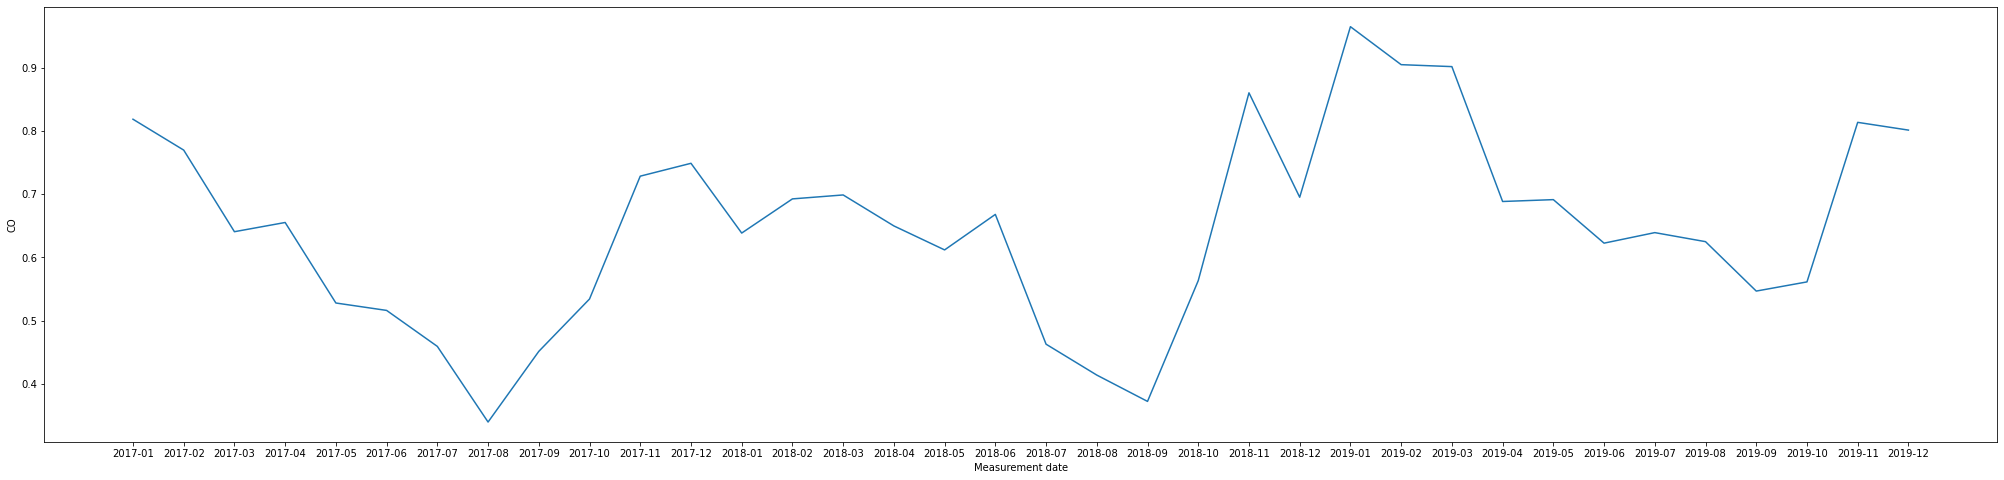

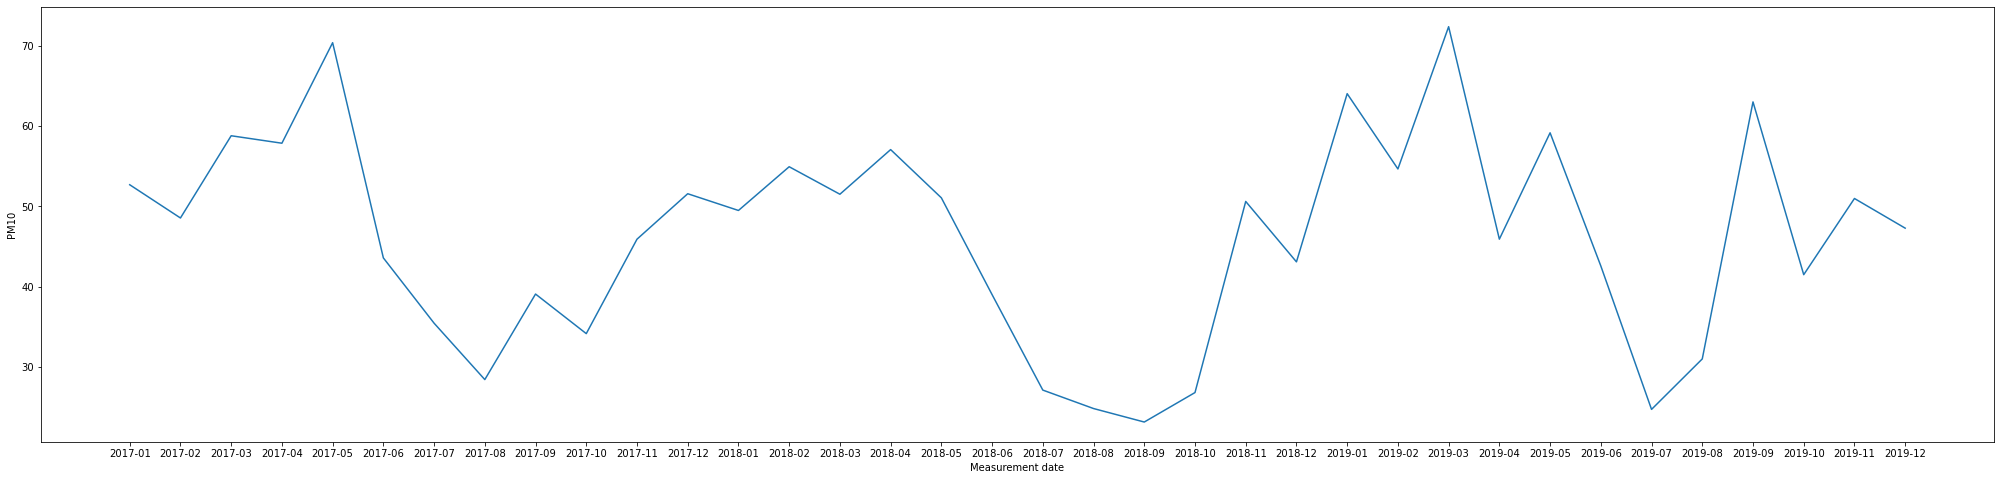

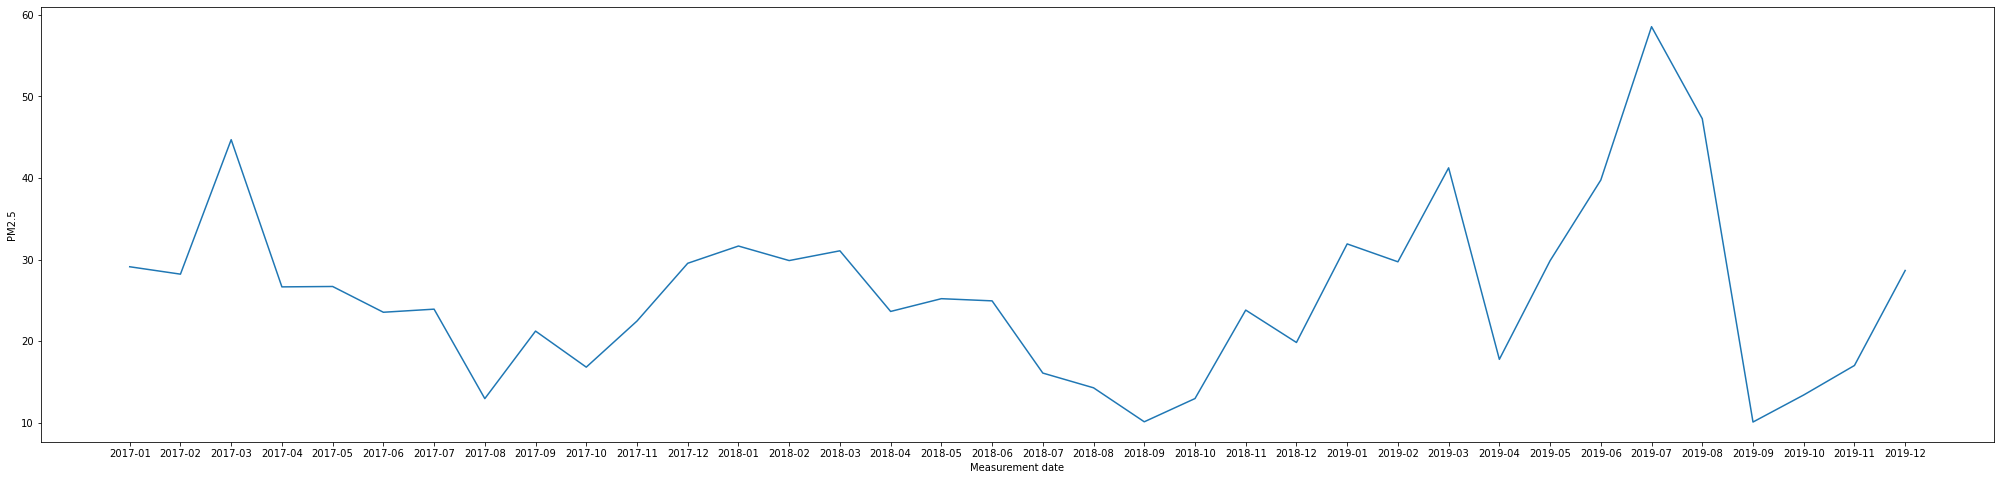

In [62]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_111)

# Station 112

In [63]:
df_112 = df[df['Station code'] == 112]

In [64]:
df_112.head()

Station code Measurement date       SO2       NO2        O3        CO  \
396           112          2017-01  0.004897  0.029210  0.019047  0.620027   
397           112          2017-02  0.004644  0.028618  0.024546  0.576786   
398           112          2017-03  0.004484  0.029453  0.034065  0.578763   
399           112          2017-04  0.004026  0.025692  0.041999  0.480278   
400           112          2017-05  0.002624  0.020882  0.047082  0.402823   

          PM10      PM2.5  
396  45.635753  31.387097  
397  38.357143  26.311012  
398  50.059140  33.530914  
399  44.908333  23.969444  
400  51.415323  21.713710

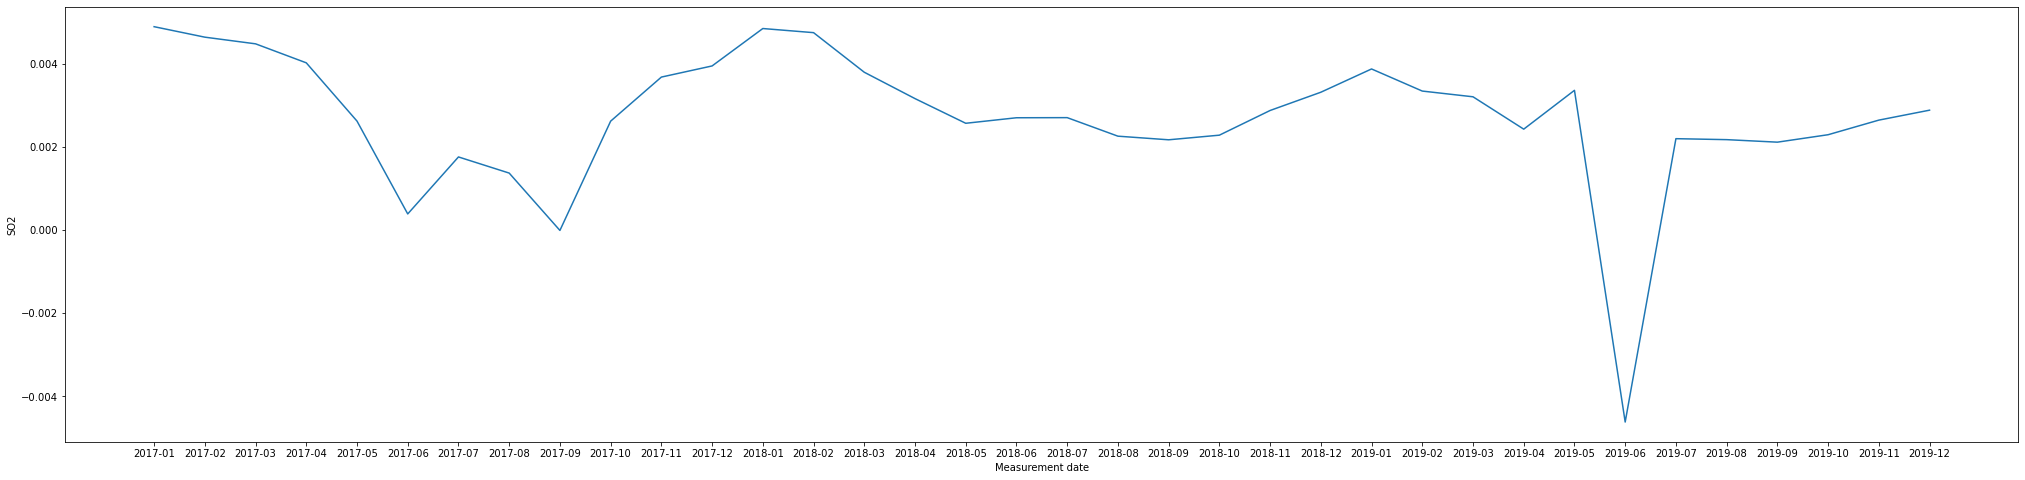

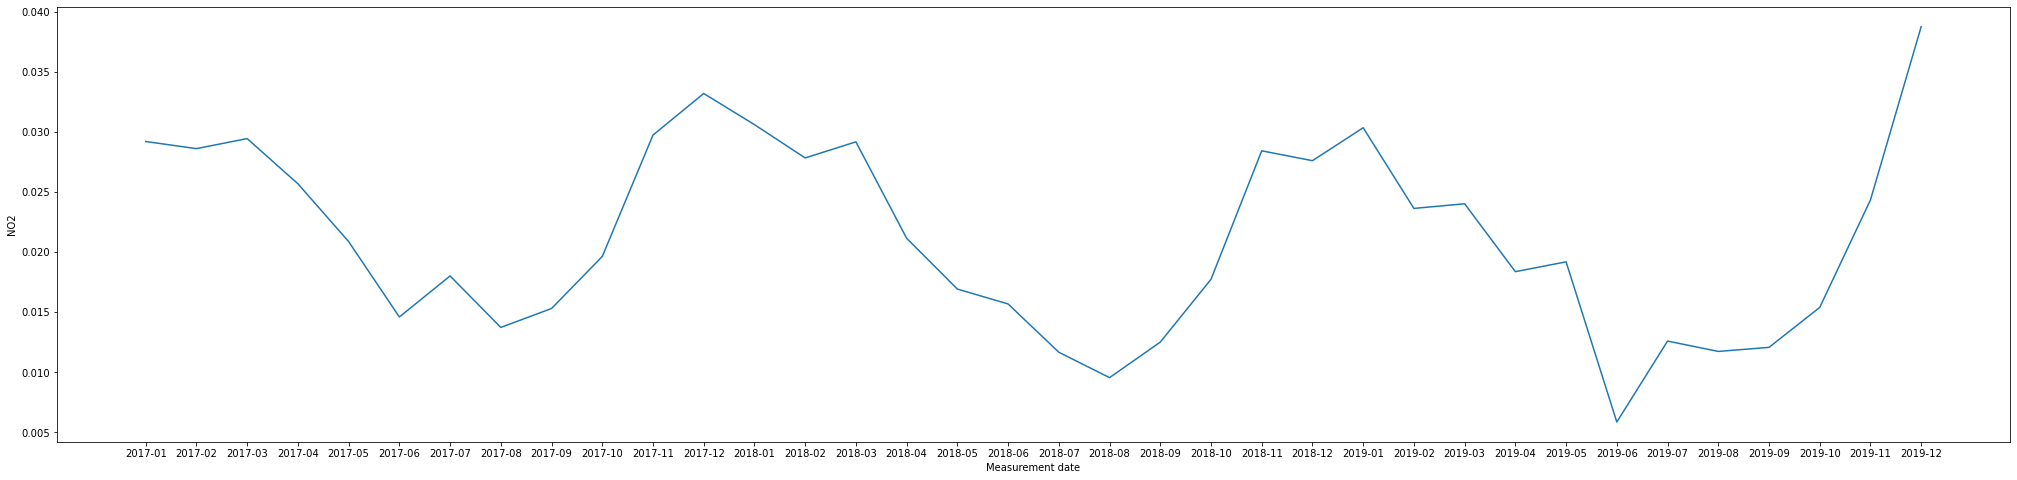

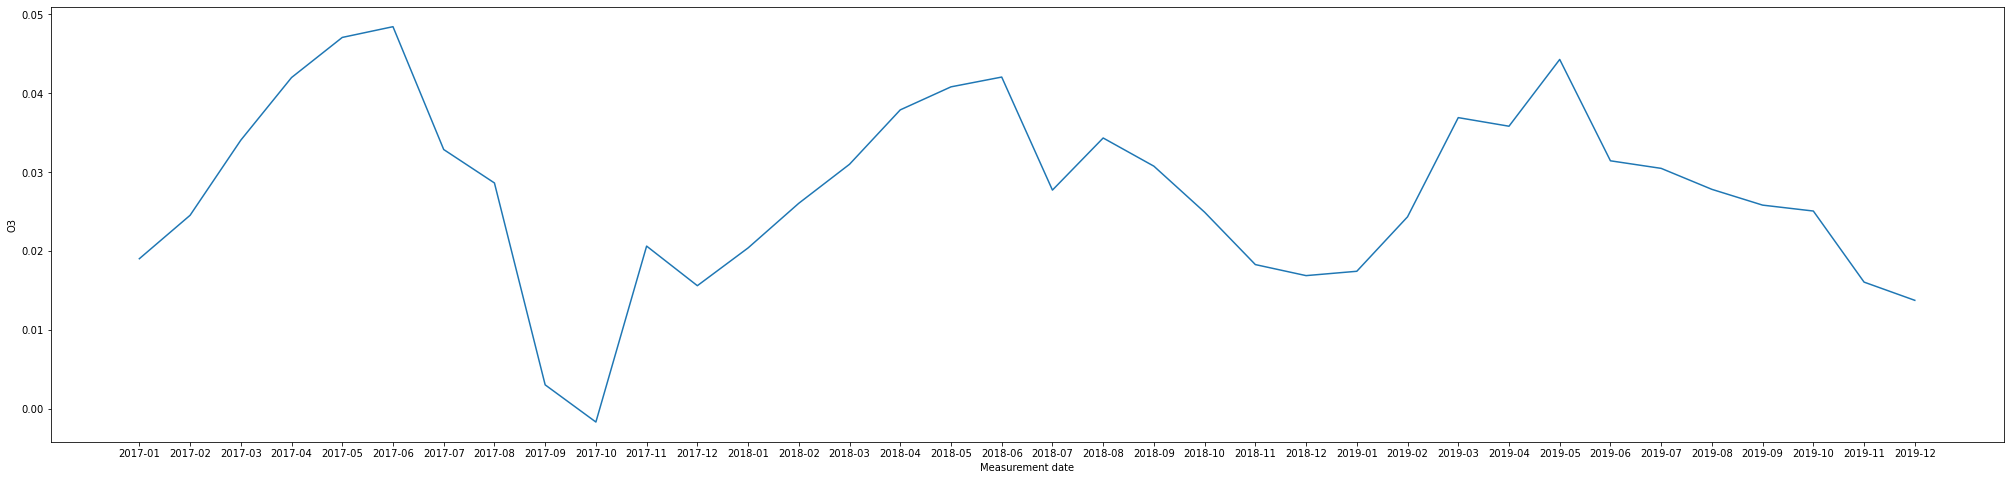

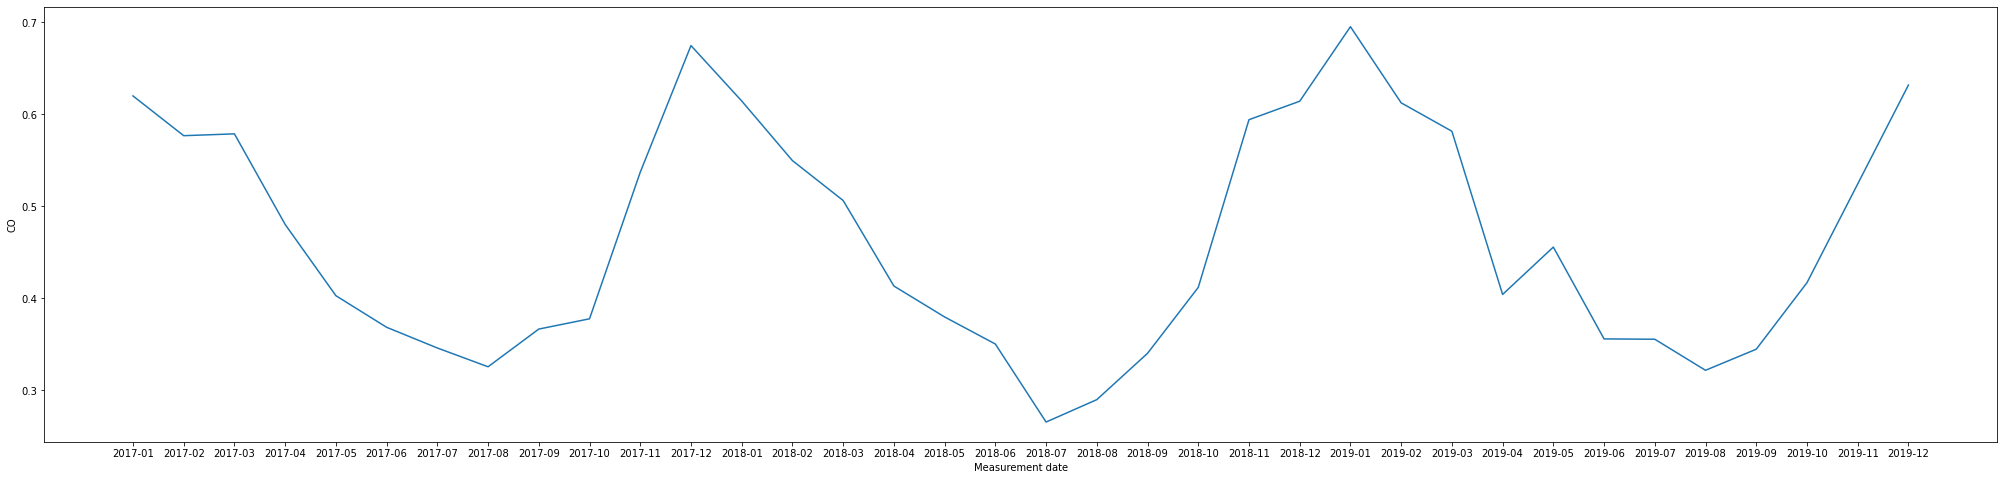

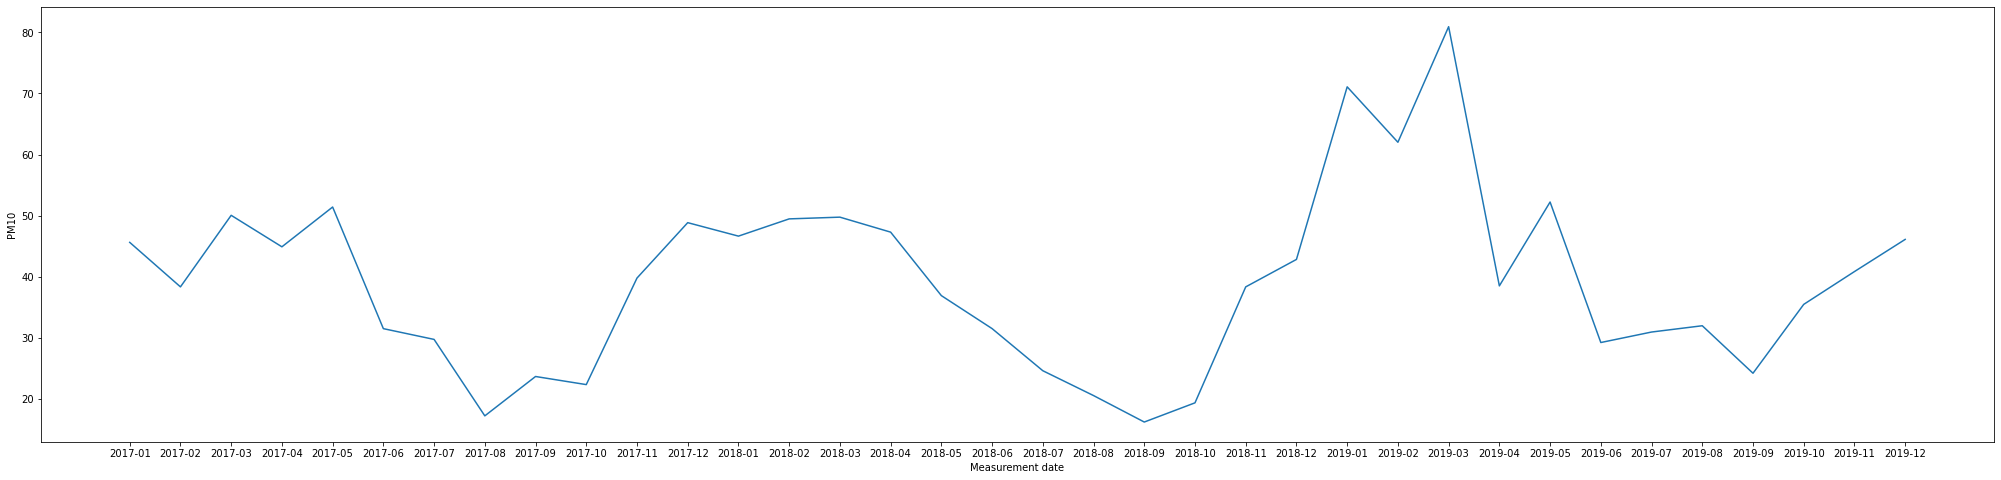

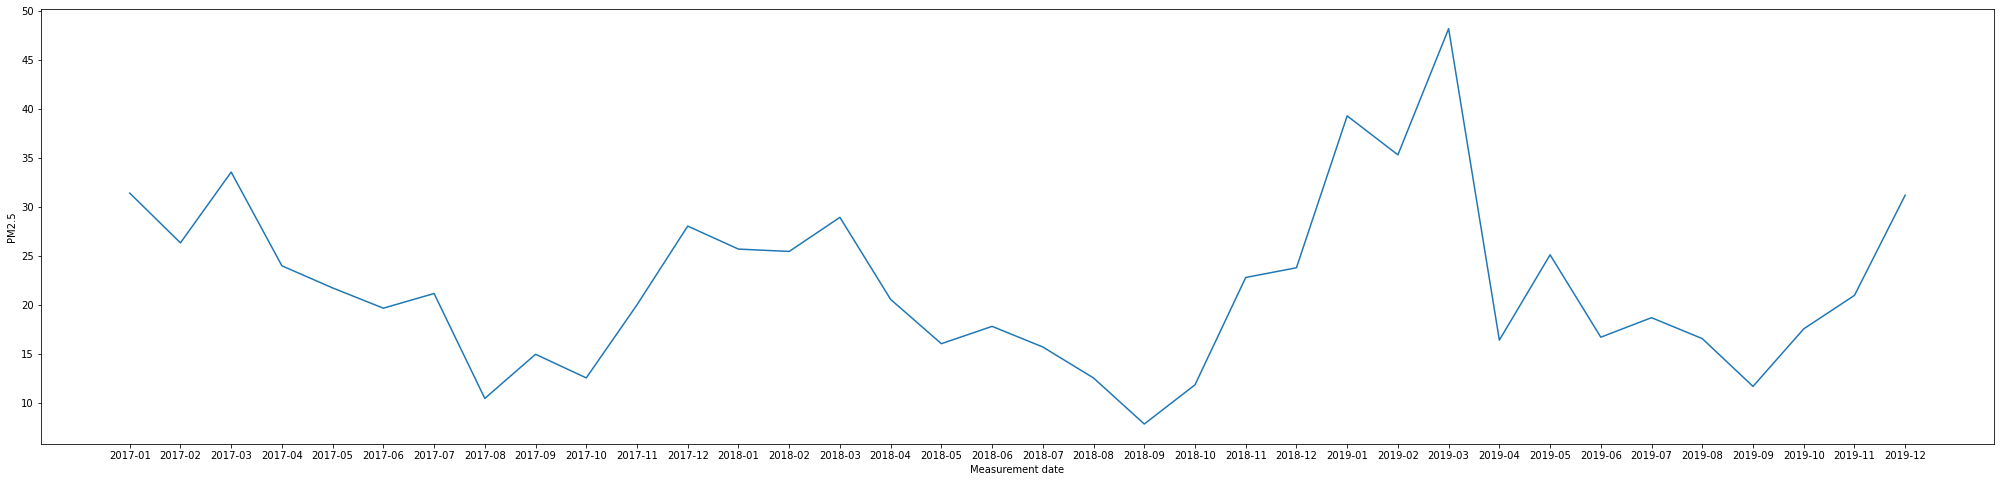

In [65]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_112)

# Station 113

In [66]:
df_113 = df[df['Station code'] == 113]

In [67]:
df_113.head()

Station code Measurement date       SO2       NO2        O3        CO  \
432           113          2017-01 -0.011181  0.015156  0.000035  1.061290   
433           113          2017-02  0.005125  0.030351  0.019478  0.572917   
434           113          2017-03 -0.020449  0.005888  0.001427  0.496774   
435           113          2017-04  0.004667  0.026310  0.039122  0.448611   
436           113          2017-05  0.004816  0.023969  0.043359  0.466263   

          PM10      PM2.5  
432  53.978495  29.938172  
433  45.977679  26.101190  
434  57.916667  33.245968  
435  55.669444  24.245833  
436  64.846774  25.389785

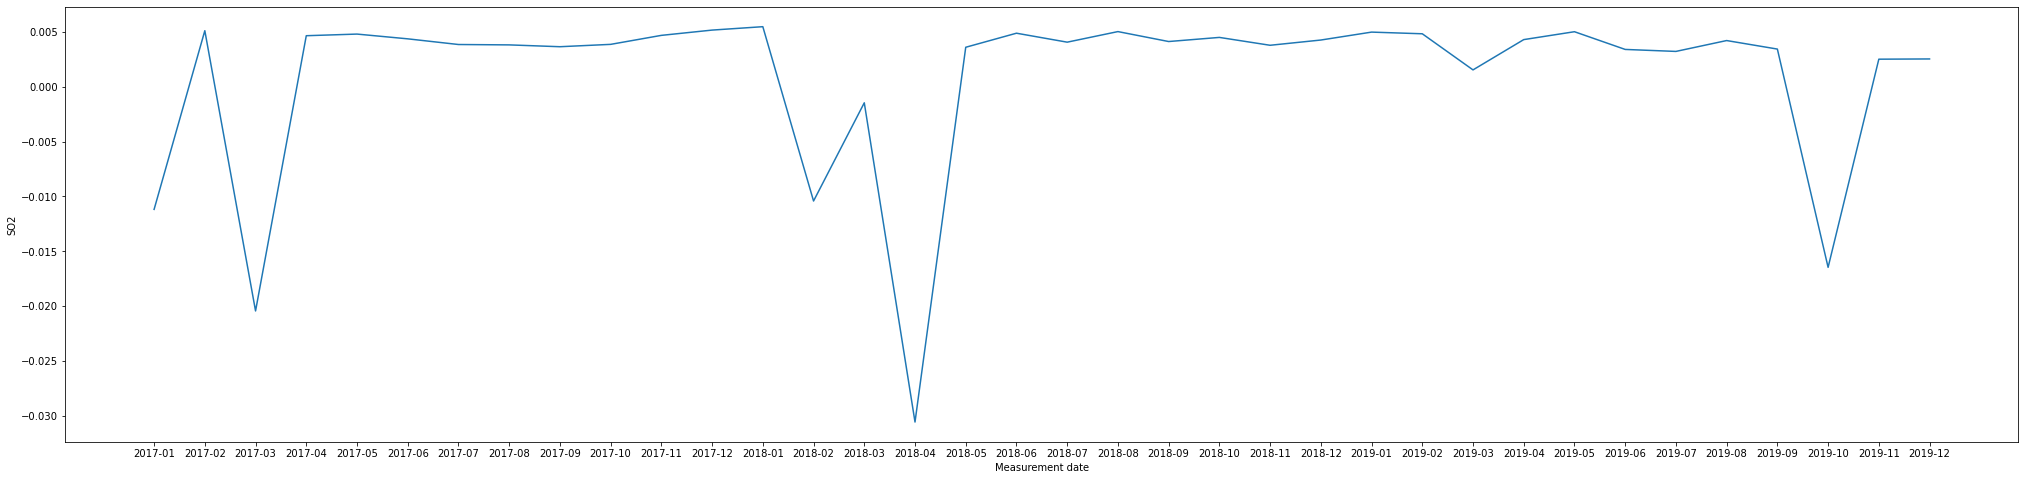

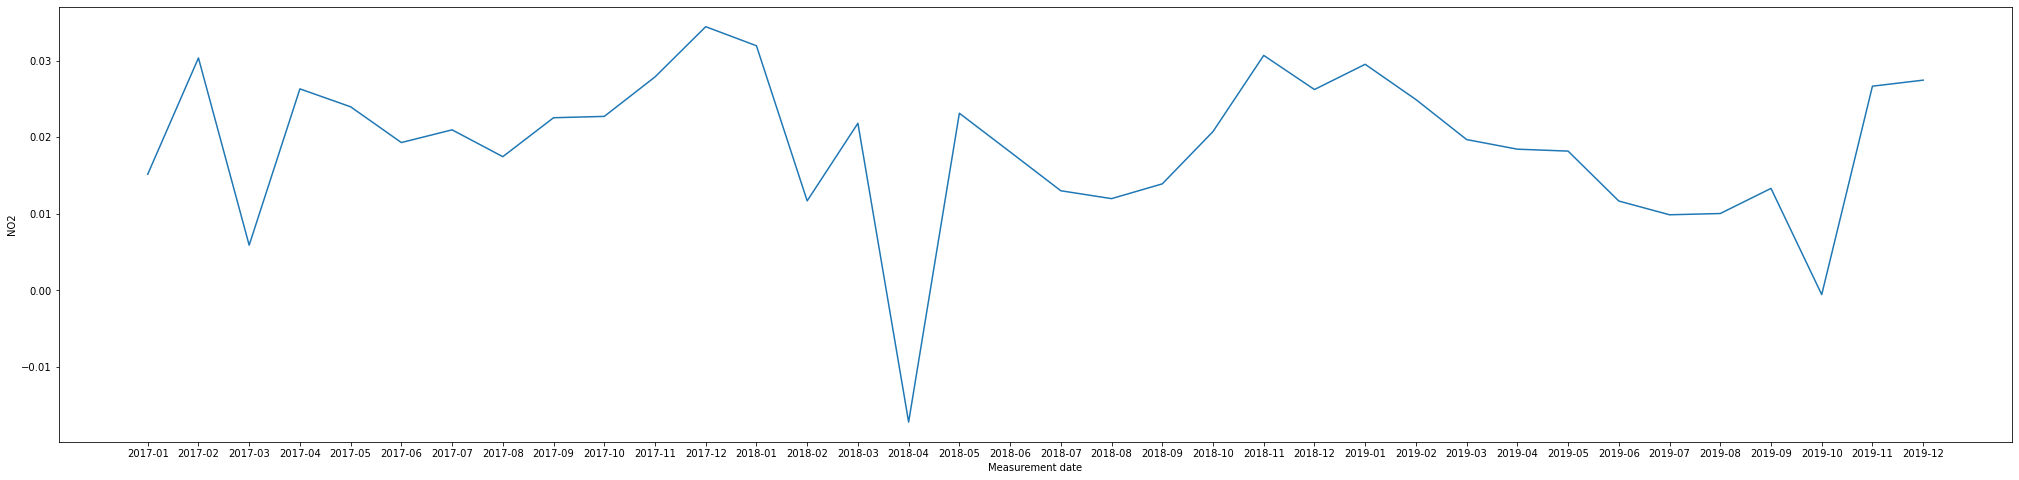

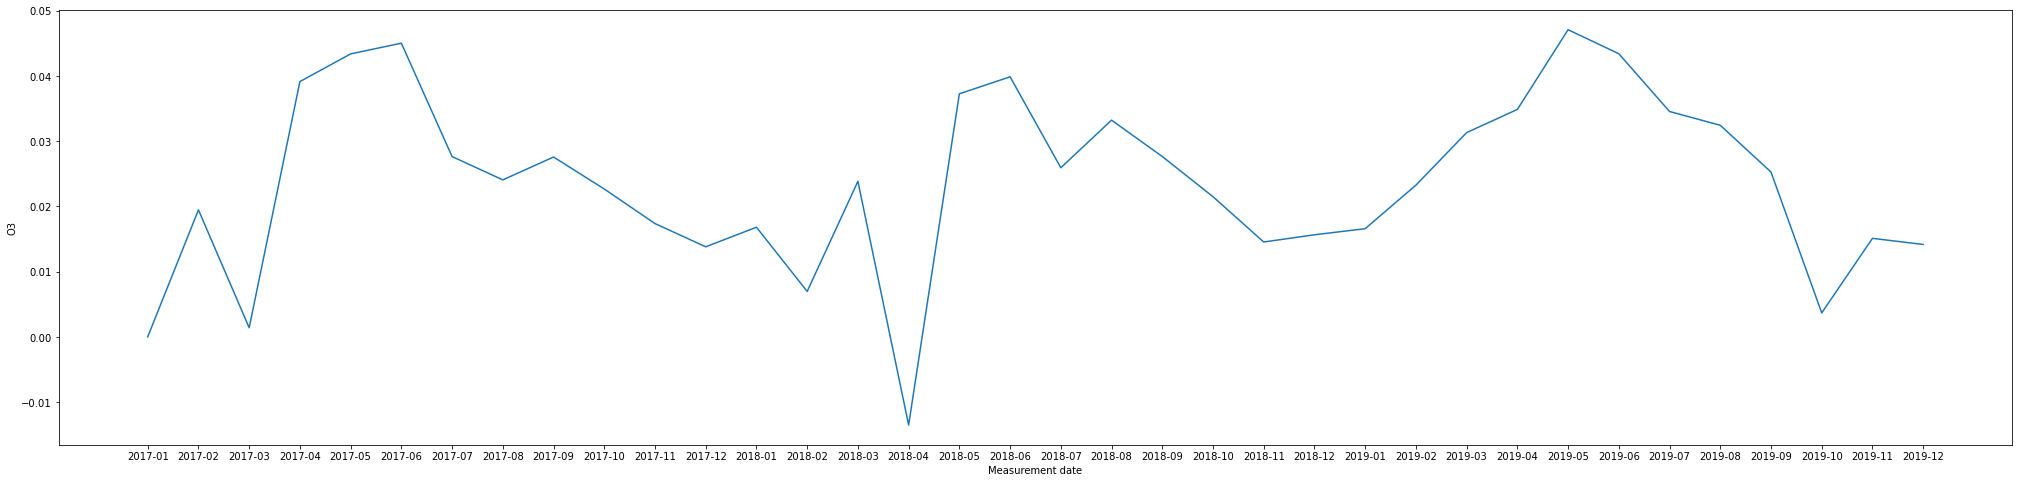

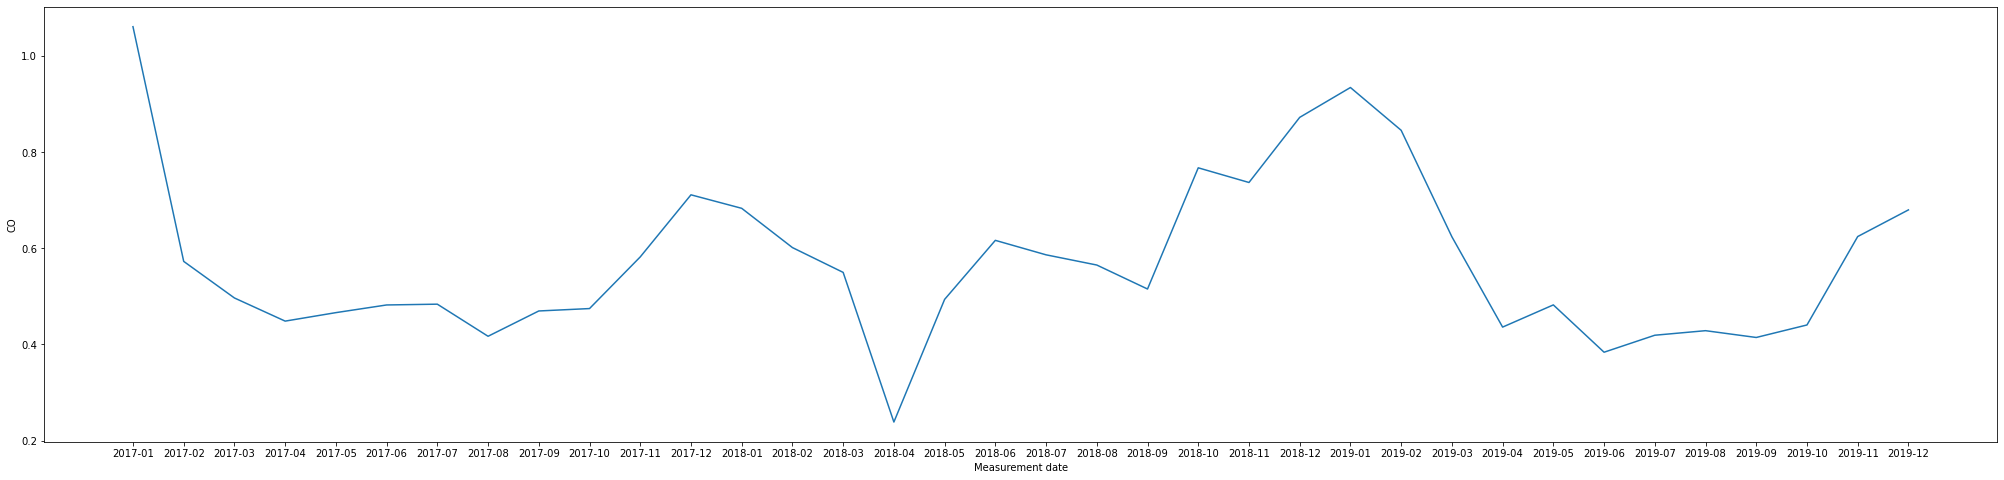

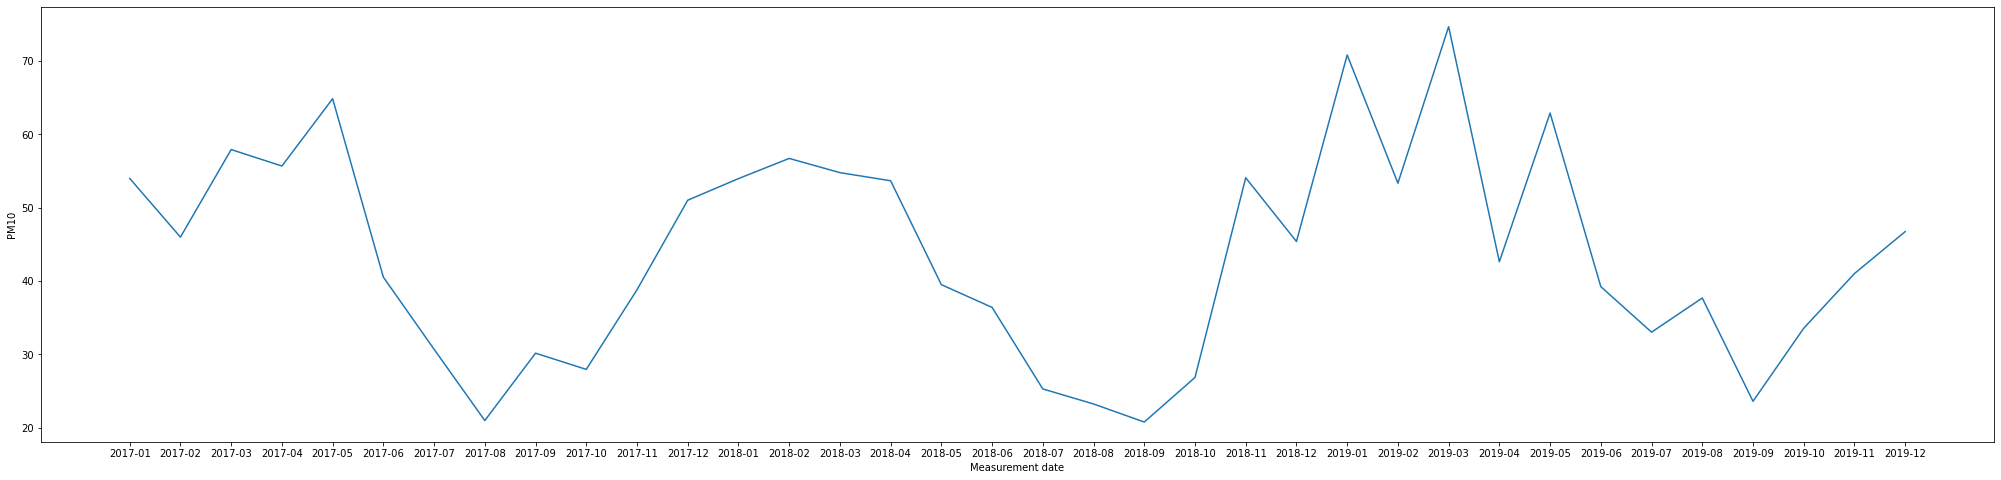

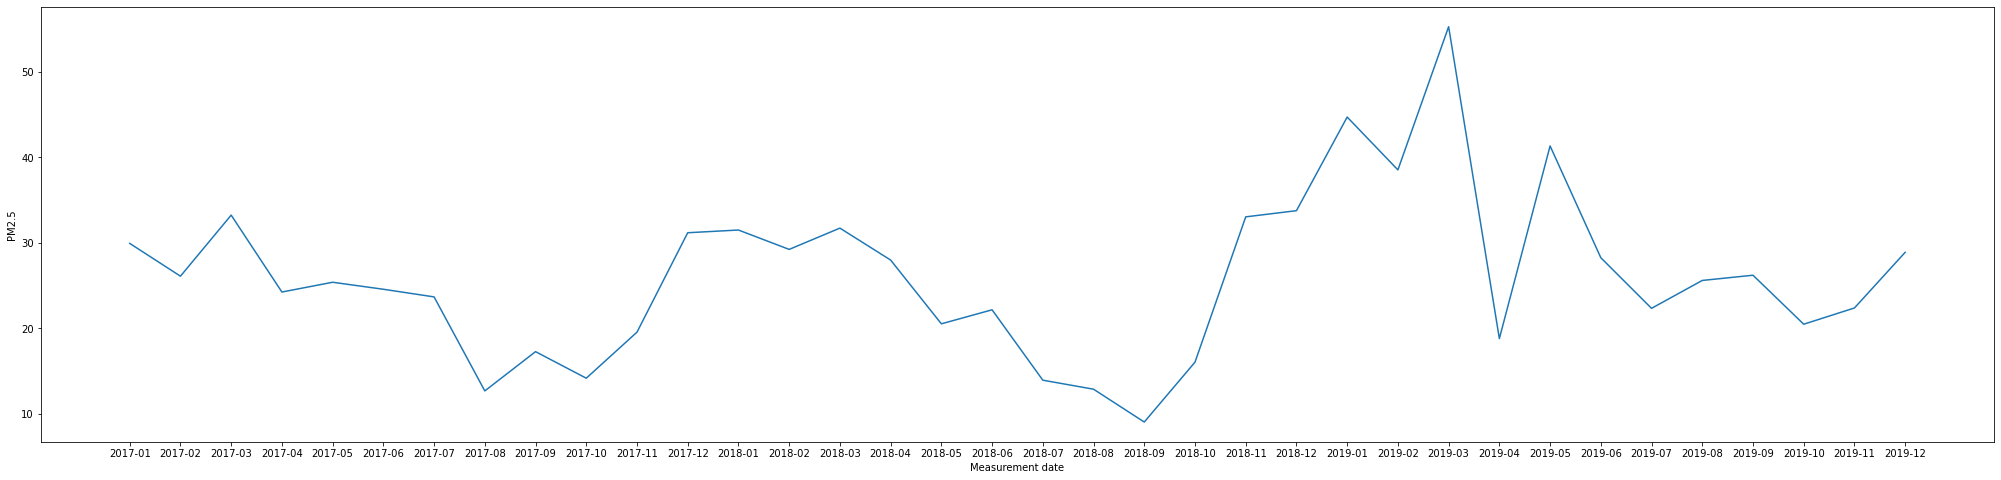

In [68]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_113)

# Station 114

In [69]:
df_114 = df[df['Station code'] == 114]

In [70]:
df_114.head()

Station code Measurement date       SO2       NO2        O3        CO  \
468           114          2017-01  0.004954  0.037770  0.015703  0.805914   
469           114          2017-02  0.003144  0.035363  0.019155  0.749851   
470           114          2017-03  0.004848  0.038849  0.029034  0.693817   
471           114          2017-04  0.004018  0.031936  0.038072  0.565000   
472           114          2017-05  0.003879  0.030202  0.042581  0.461022   

          PM10      PM2.5  
468  51.168011  34.849462  
469  42.761905  29.255952  
470  53.774194  37.908602  
471  51.293056  27.211111  
472  57.467742  24.817204

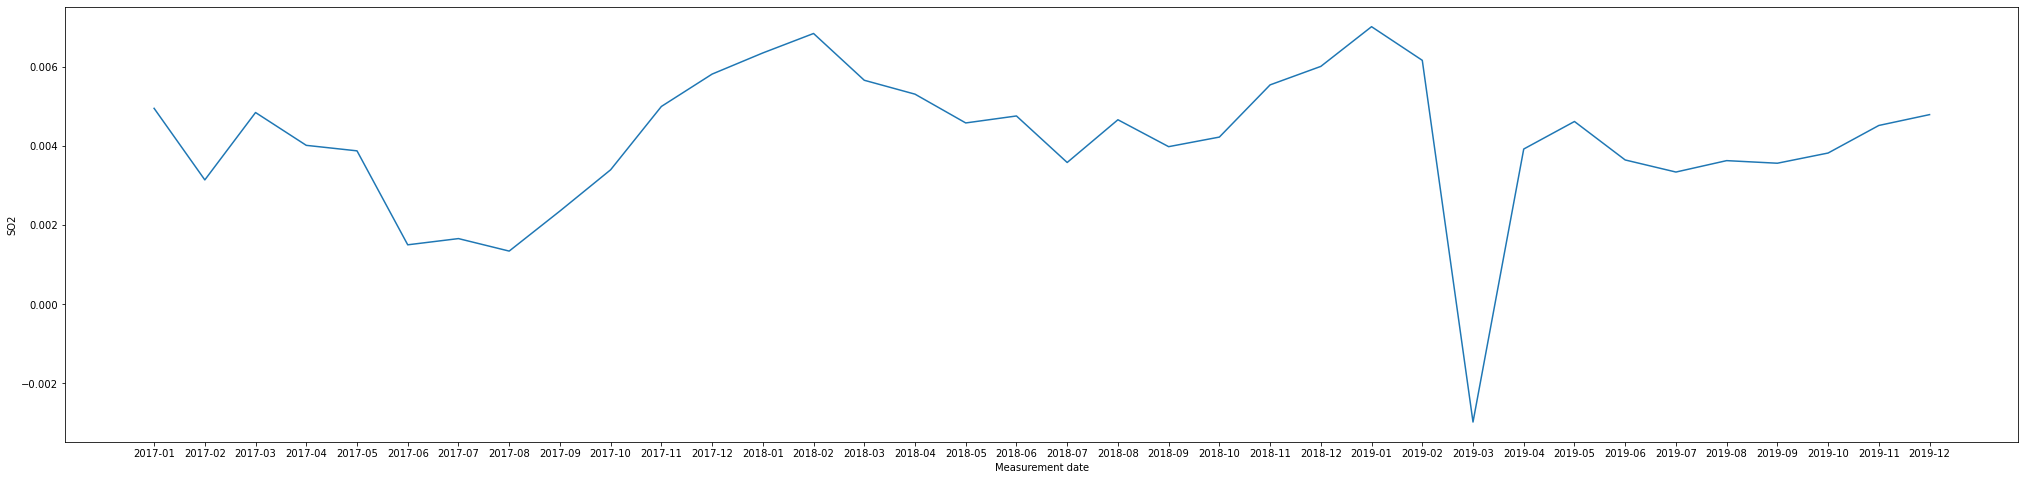

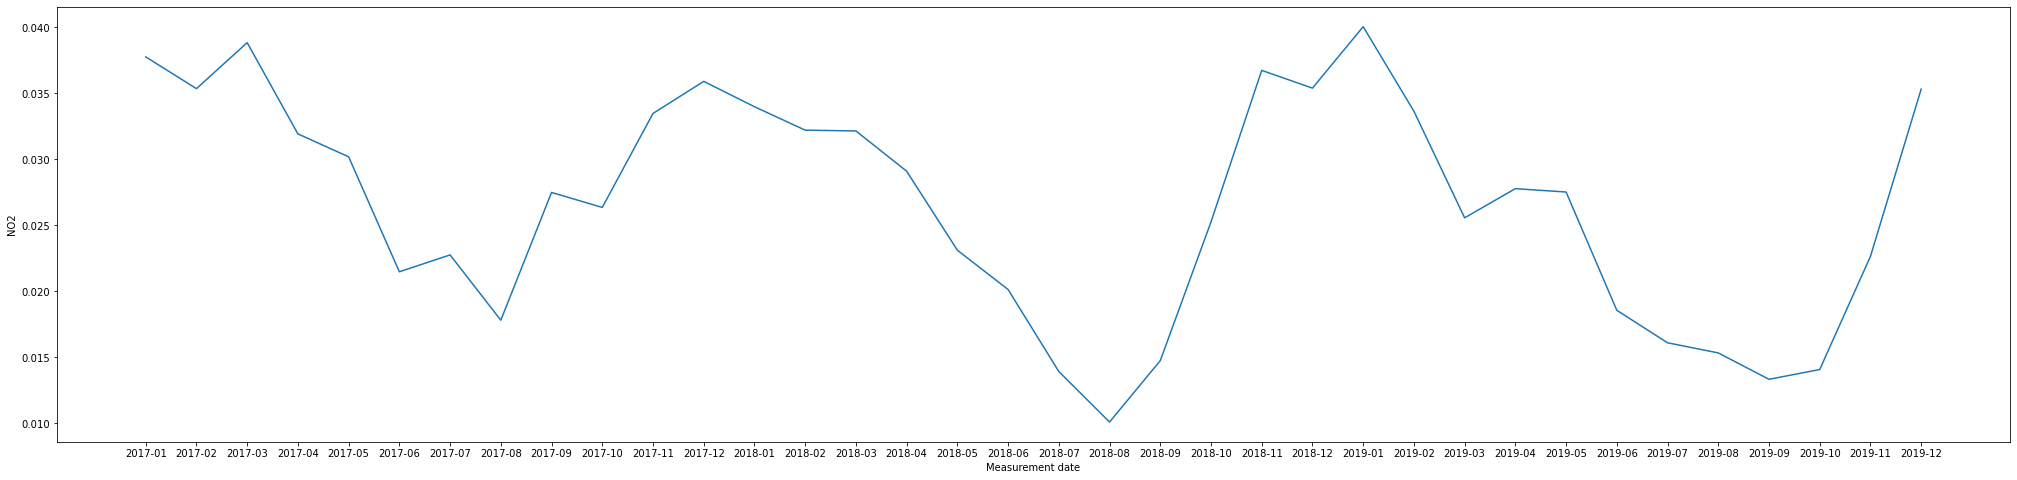

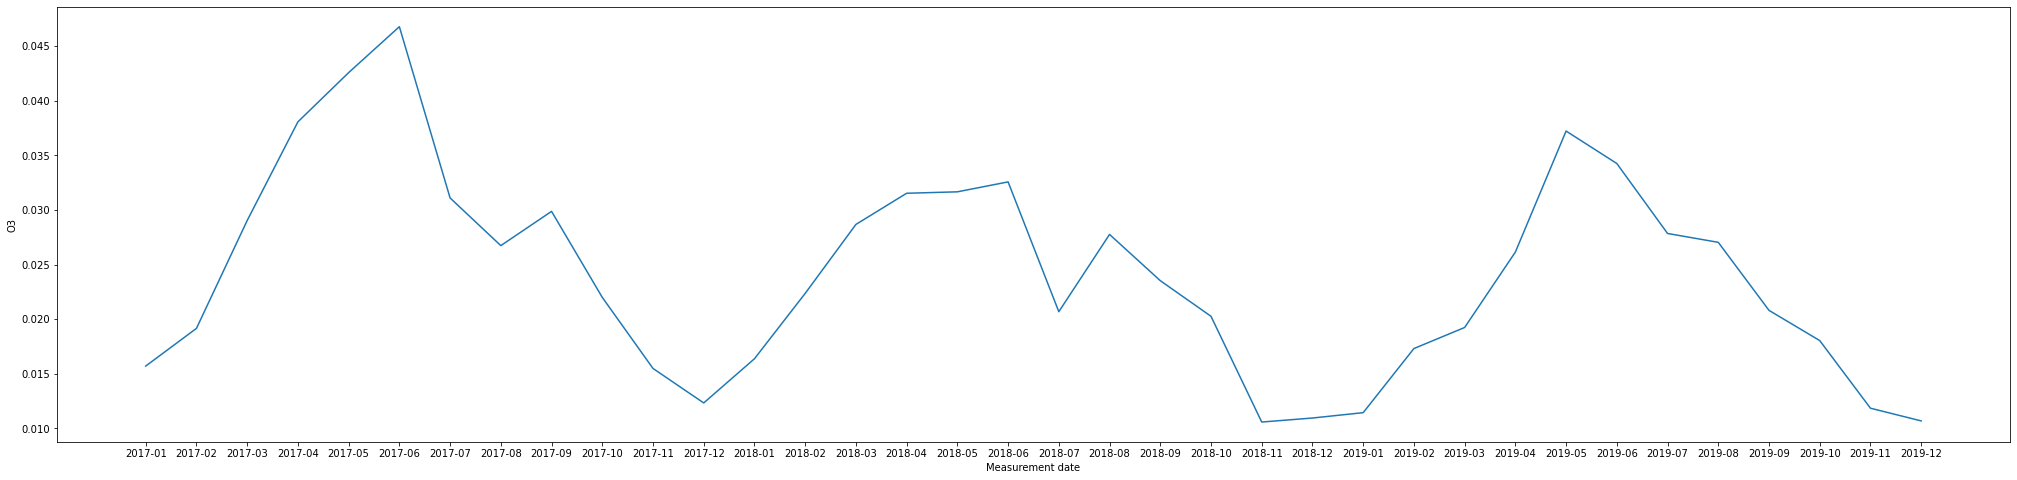

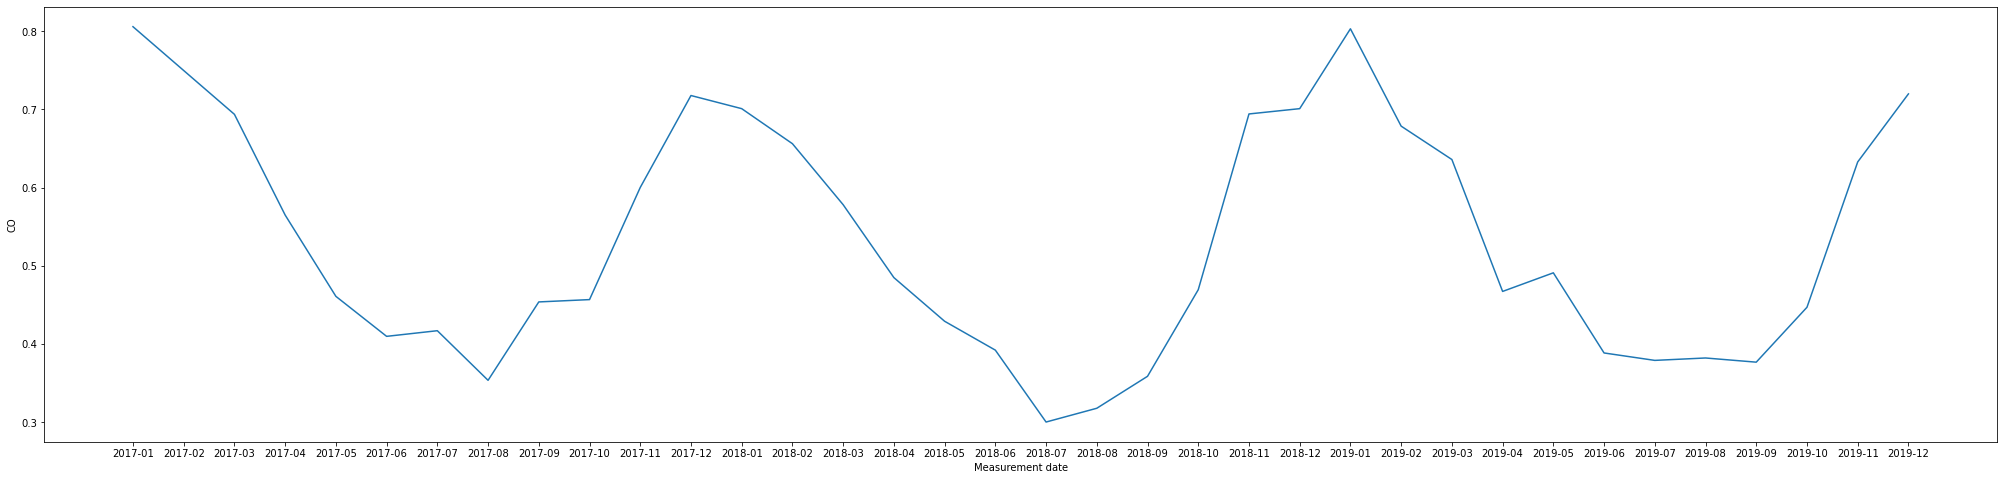

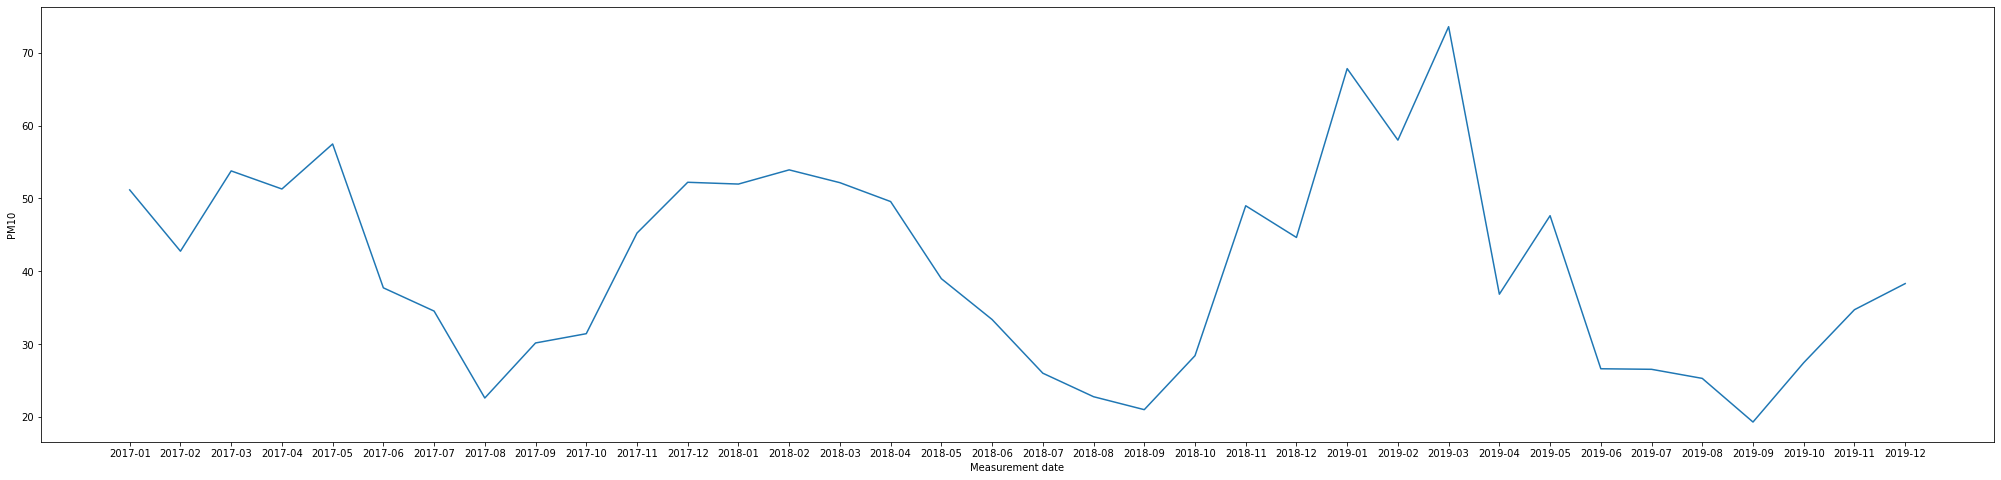

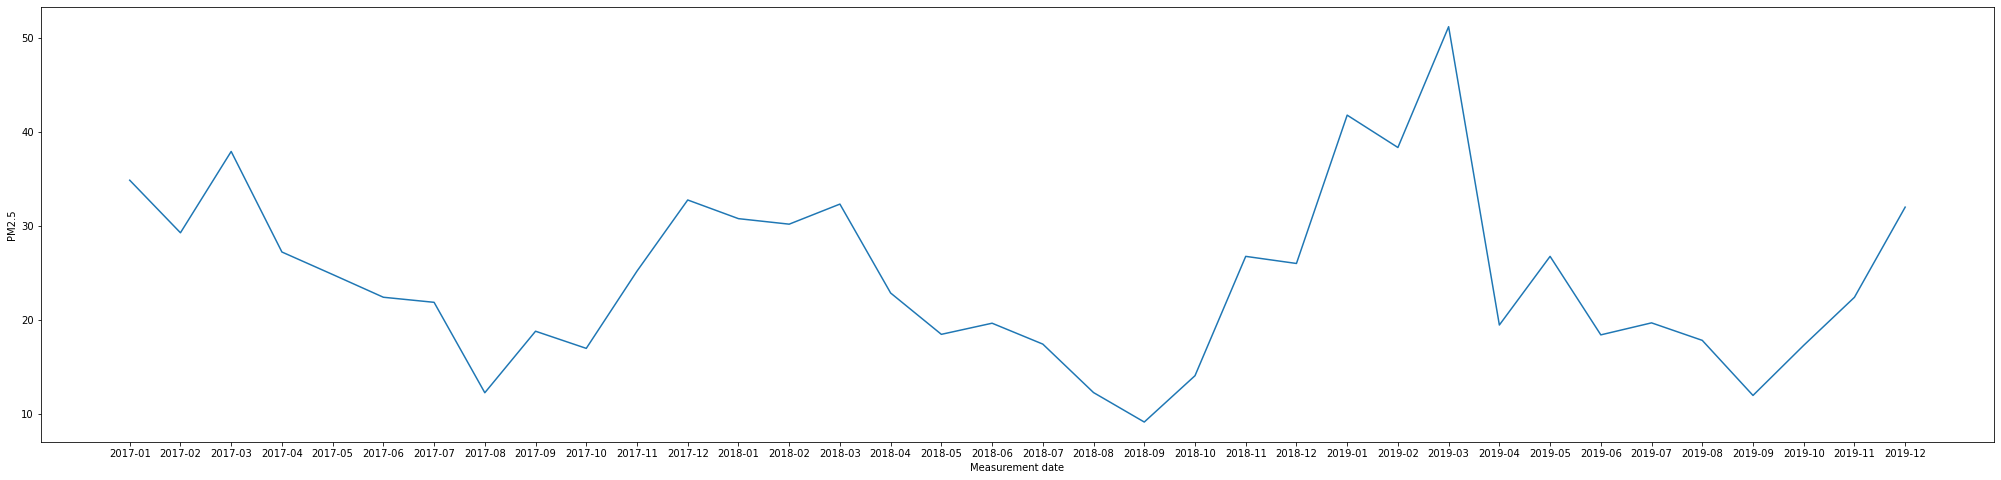

In [71]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_114)

# Station 115

In [72]:
df_115 = df[df['Station code'] == 115]

In [73]:
df_115.head()

Station code Measurement date       SO2       NO2        O3        CO  \
504           115          2017-01  0.005421  0.035552  0.009581  0.744086   
505           115          2017-02  0.006600  0.034900  0.013161  0.689881   
506           115          2017-03  0.006315  0.038214  0.019097  0.636425   
507           115          2017-04  0.006278  0.030651  0.026424  0.527083   
508           115          2017-05  0.004488  0.027220  0.028190  0.439516   

          PM10      PM2.5  
504  52.951613  31.306452  
505  44.436012  32.212798  
506  59.416667  44.301075  
507  50.187500  30.987500  
508  52.586022  29.048387

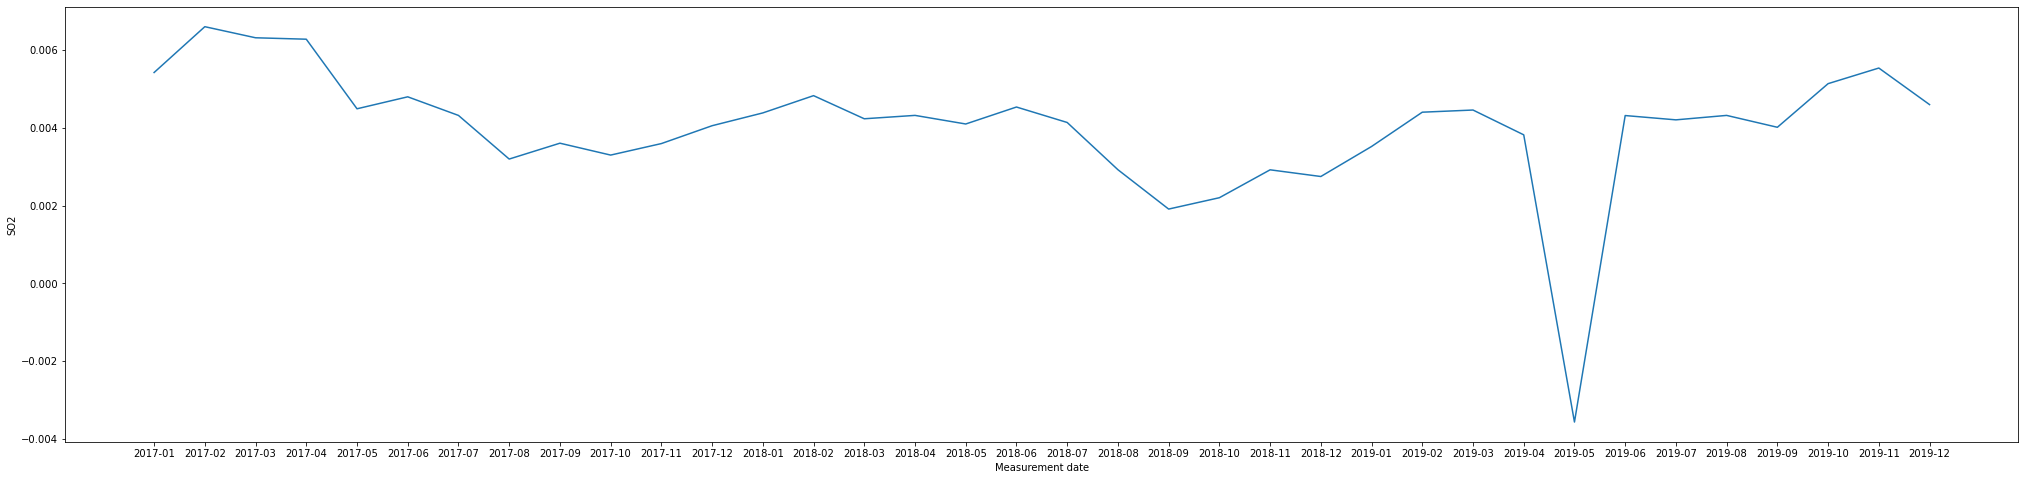

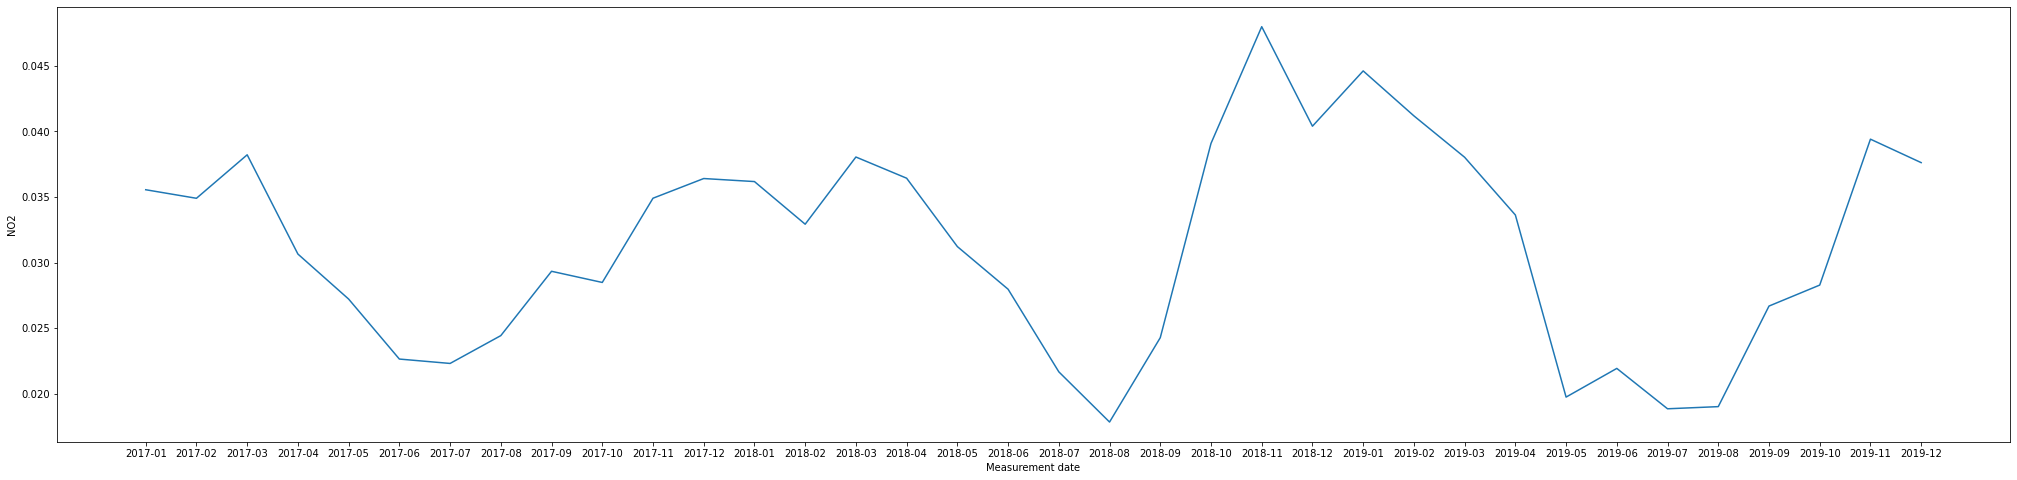

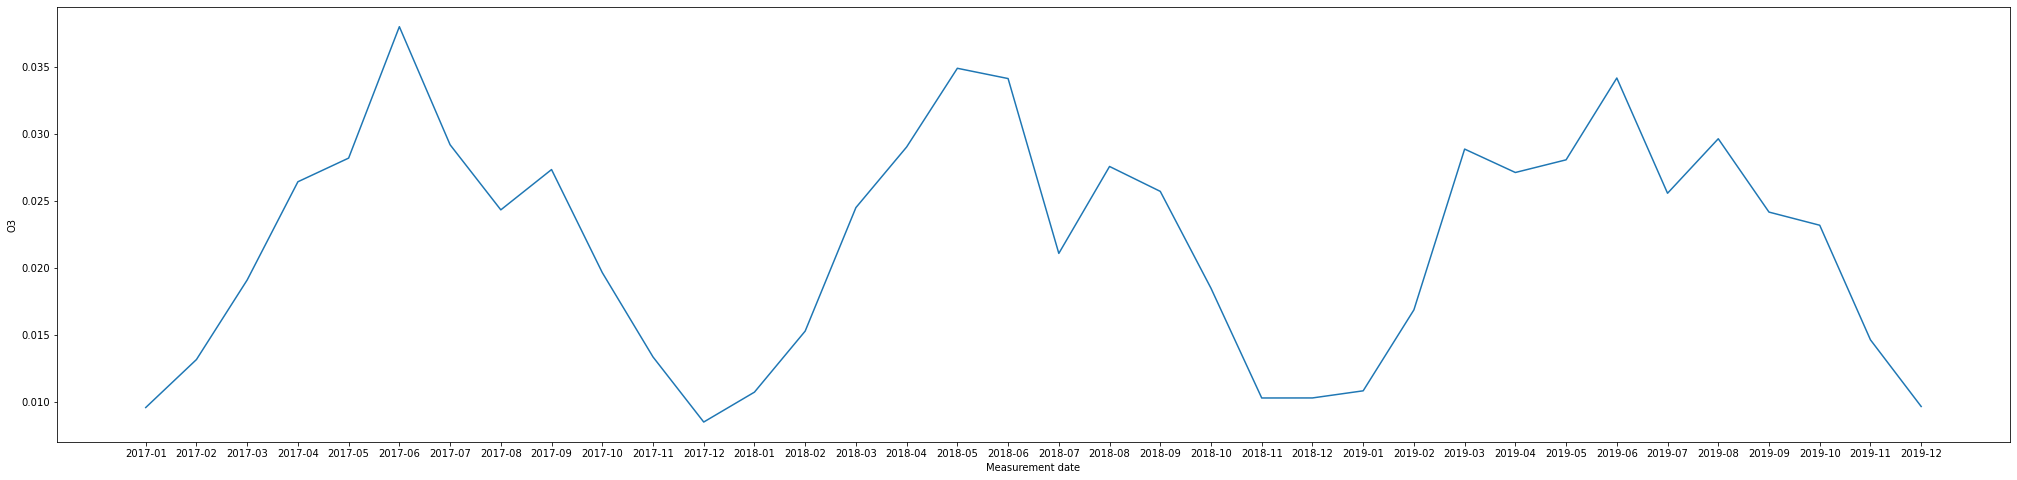

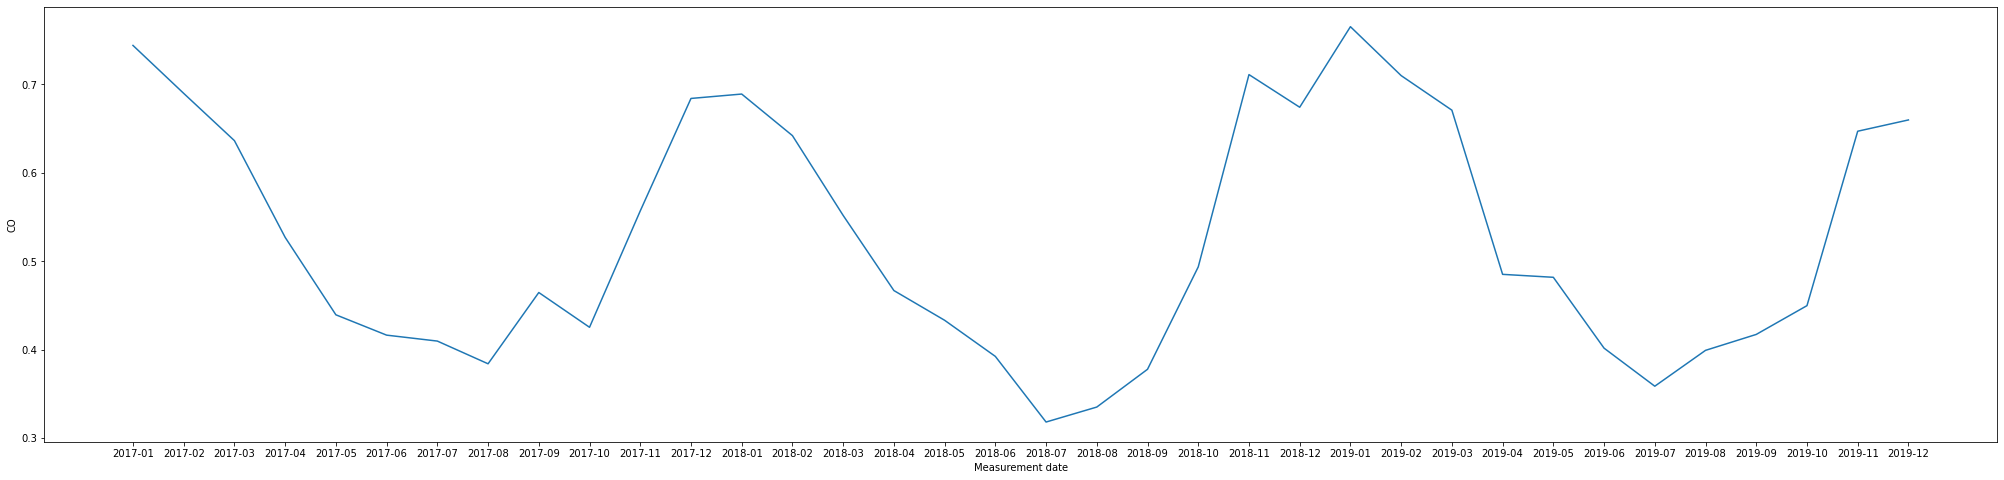

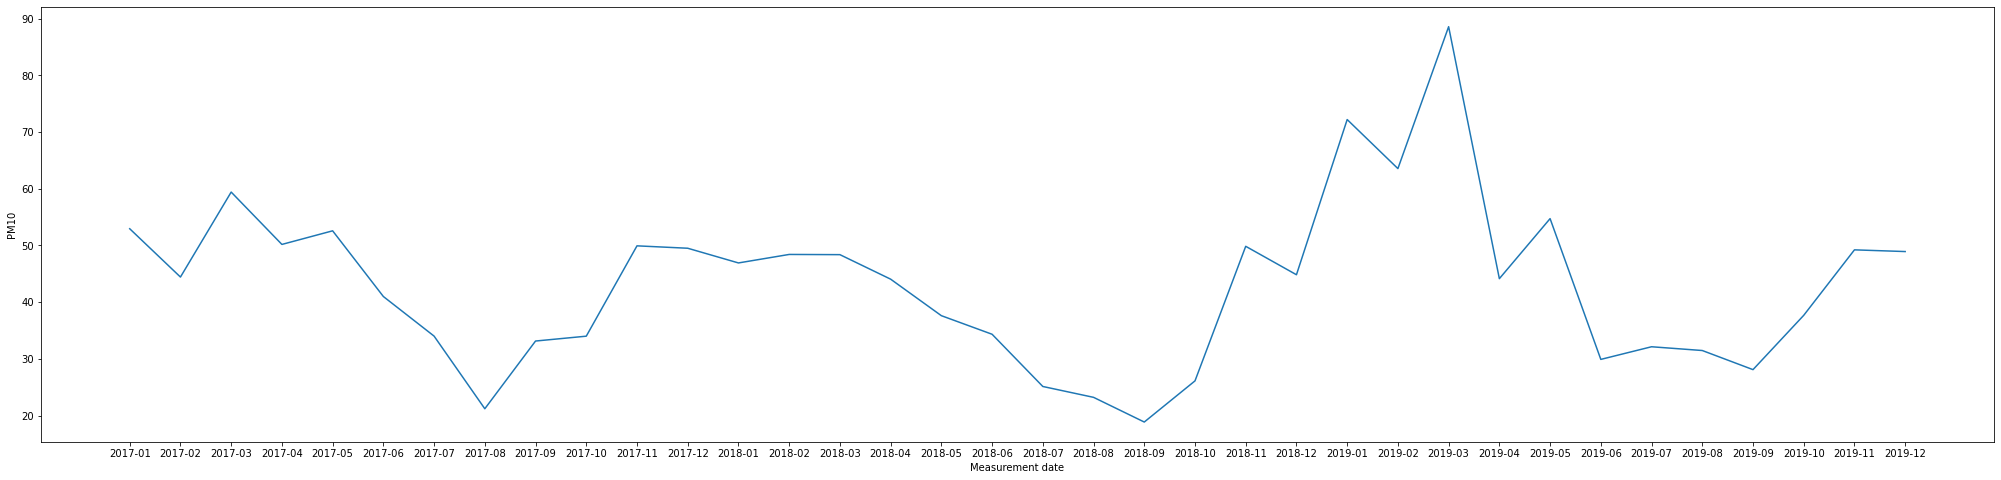

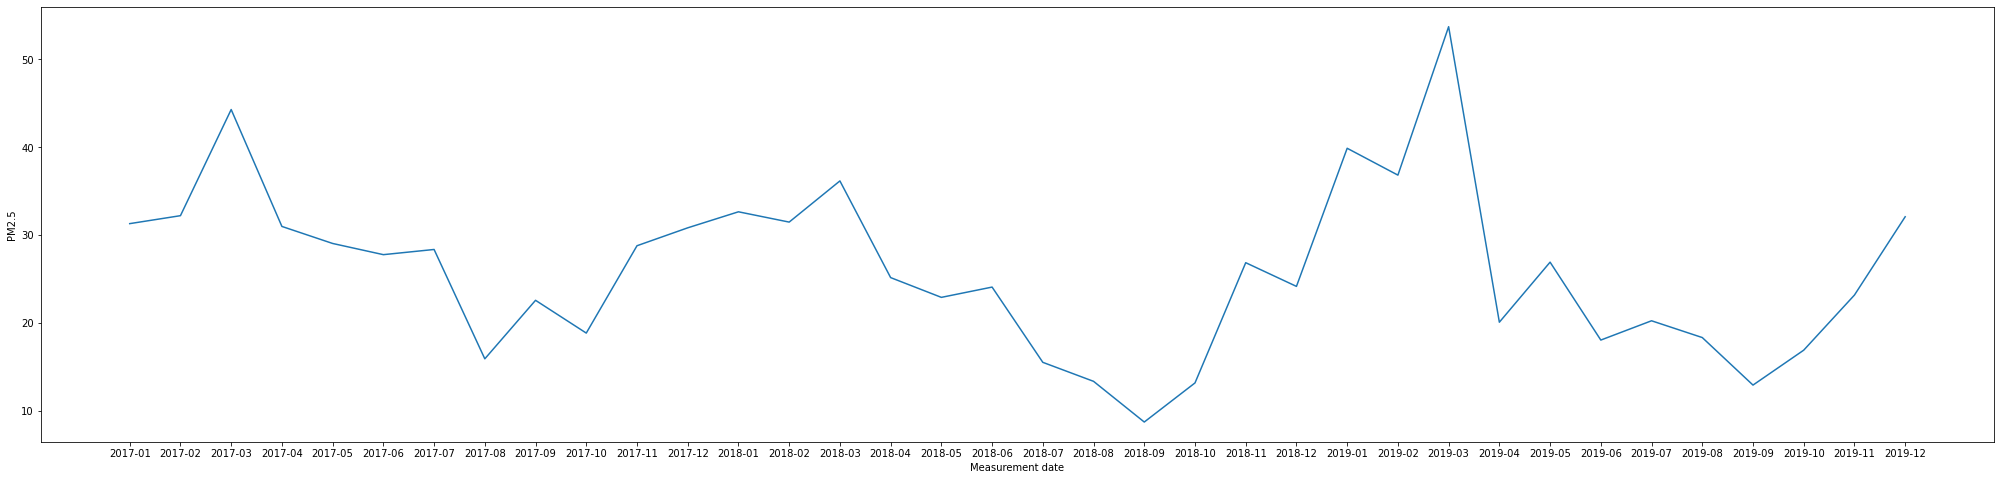

In [74]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_115)

# Station 116

In [75]:
df_116 = df[df['Station code'] == 116]

In [76]:
df_116.head()

Station code Measurement date       SO2       NO2        O3        CO  \
540           116          2017-01  0.006397  0.036043  0.014543  0.609274   
541           116          2017-02  0.006488  0.035129  0.019933  0.560714   
542           116          2017-03  0.007624  0.040359  0.027077  0.569758   
543           116          2017-04  0.007476  0.033649  0.039938  0.429444   
544           116          2017-05  0.006534  0.028316  0.047004  0.336290   

          PM10      PM2.5  
540  51.016129  31.284946  
541  49.727679  27.037202  
542  64.936828  35.482527  
543  61.475000  24.338889  
544  70.194892  23.581989

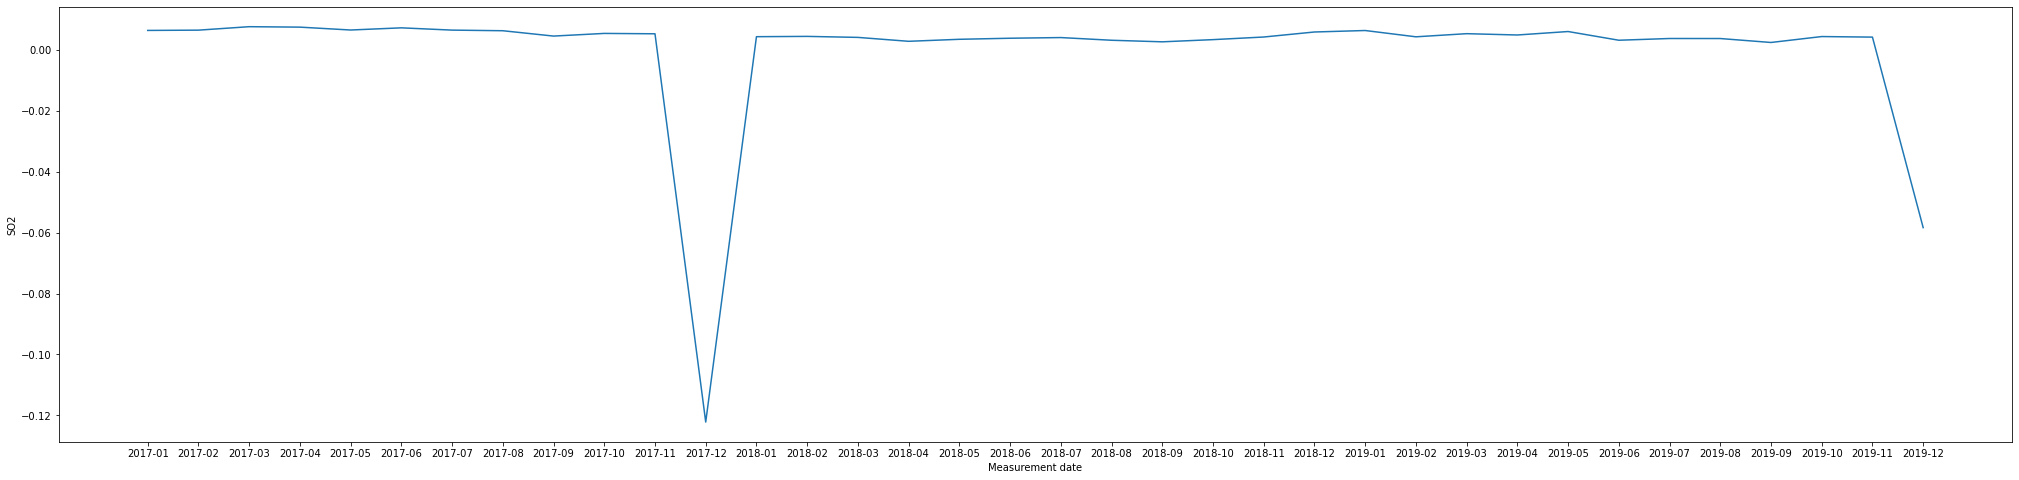

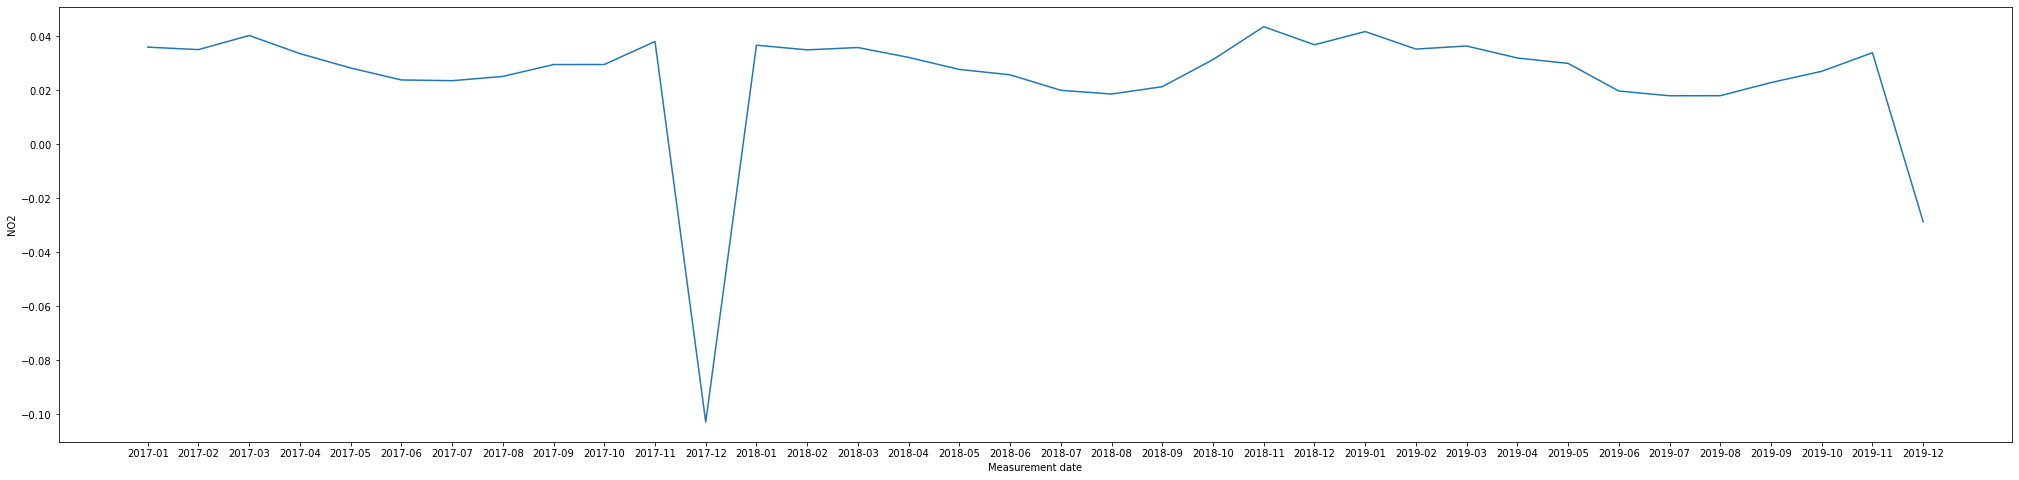

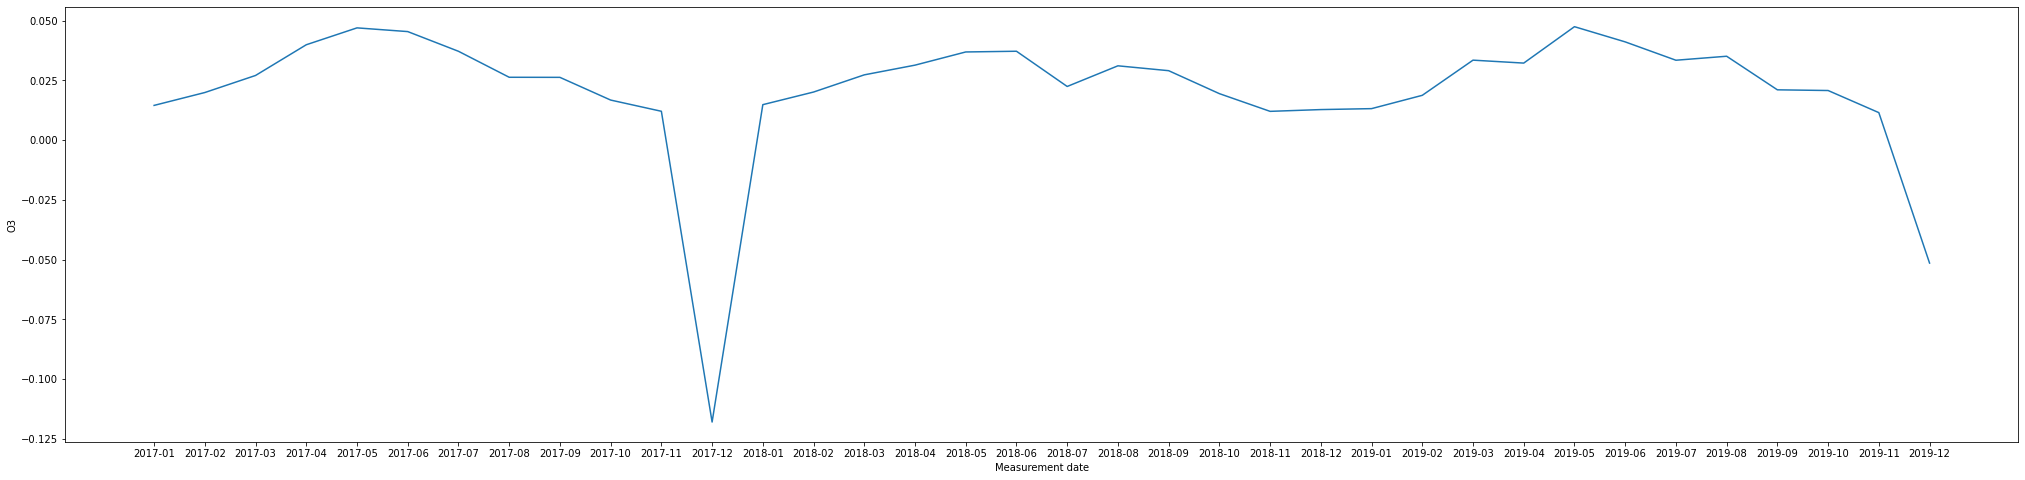

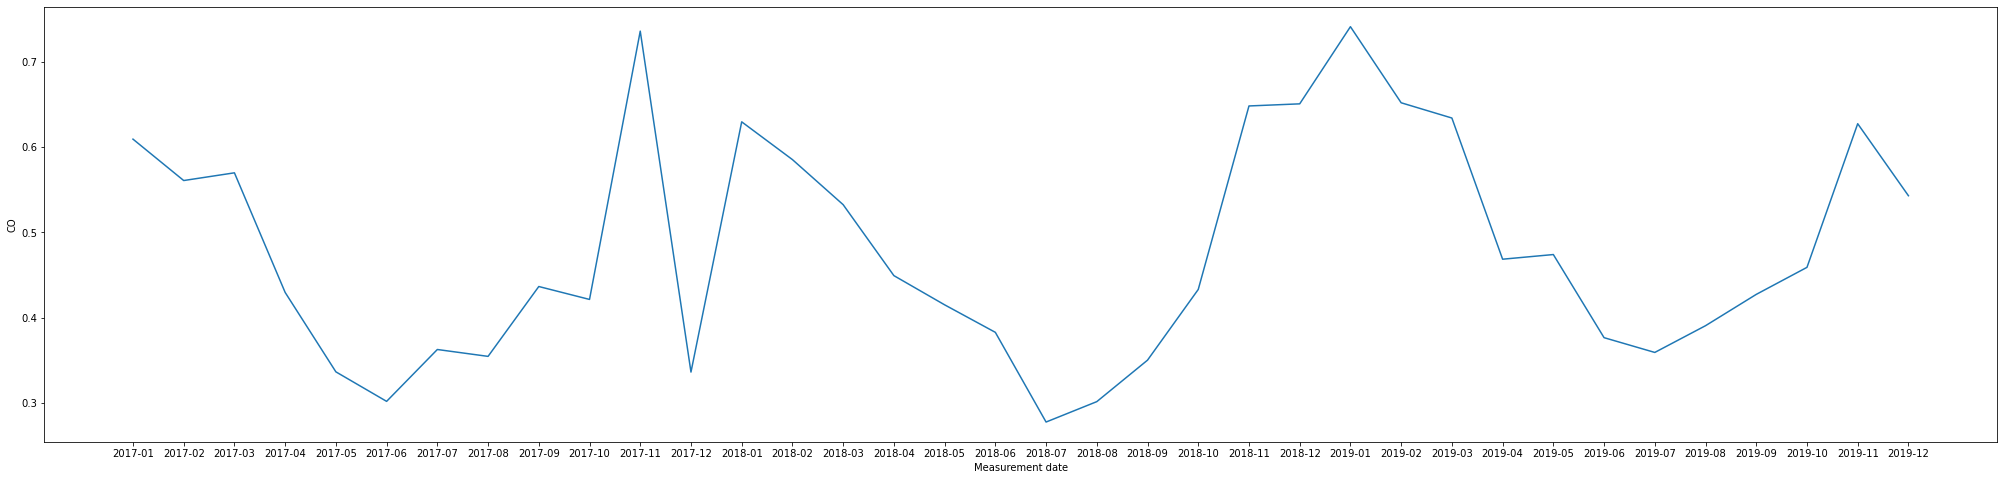

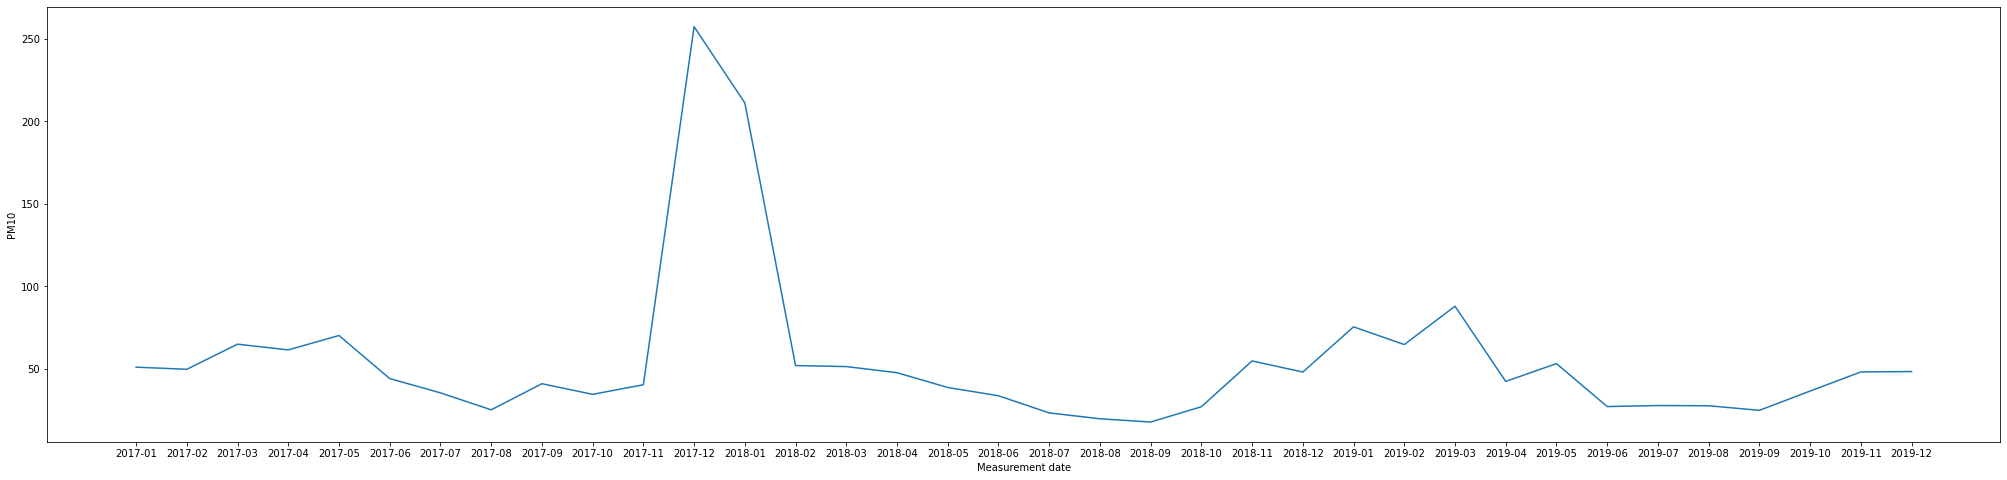

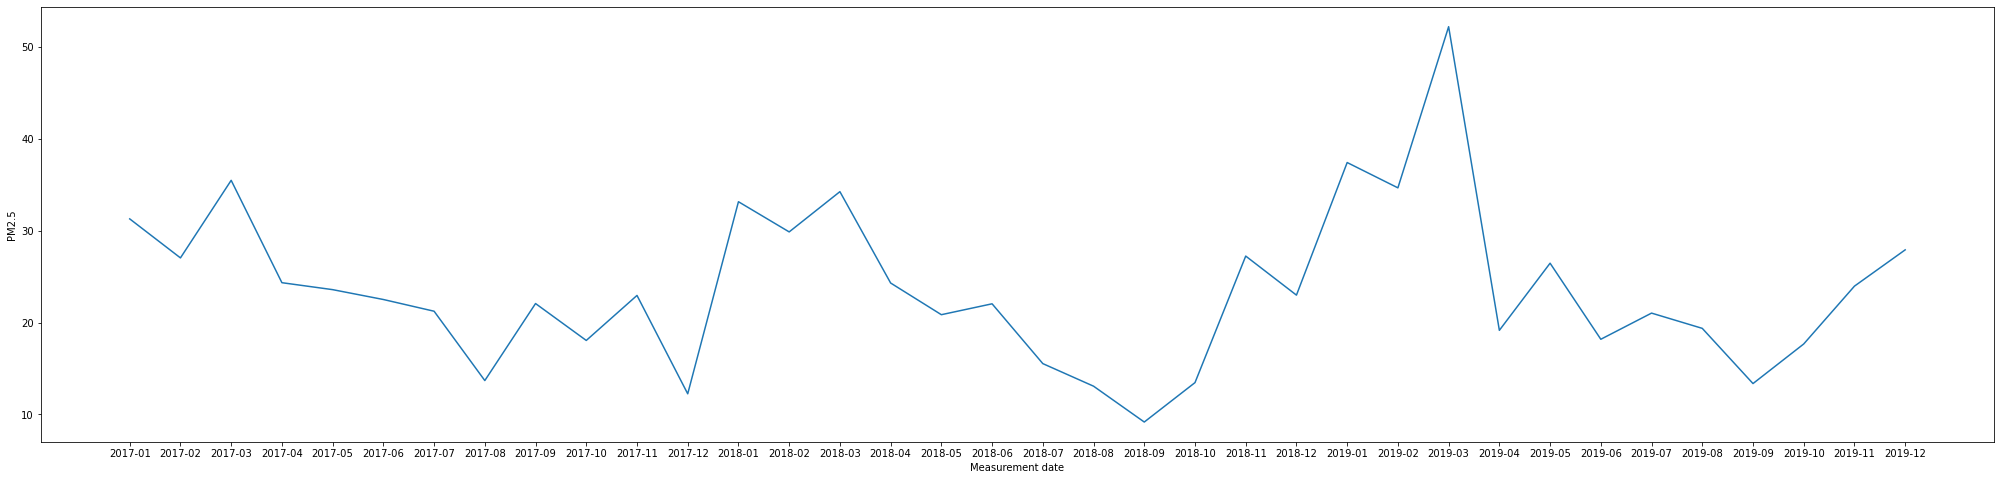

In [77]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_116)

# Station 117

In [78]:
df_117 = df[df['Station code'] == 117]

In [79]:
df_117.head()

Station code Measurement date       SO2       NO2        O3        CO  \
576           117          2017-01  0.006425  0.026961  0.012742  0.622715   
577           117          2017-02  0.006501  0.026439  0.015286  0.603125   
578           117          2017-03  0.007566  0.028270  0.020665  0.583737   
579           117          2017-04  0.007279  0.022989  0.031125  0.532500   
580           117          2017-05  0.007333  0.019333  0.037483  0.457258   

          PM10      PM2.5  
576  54.643817  32.073925  
577  47.102679  27.866071  
578  63.806452  37.030914  
579  57.195833  24.809722  
580  66.044355  23.934140

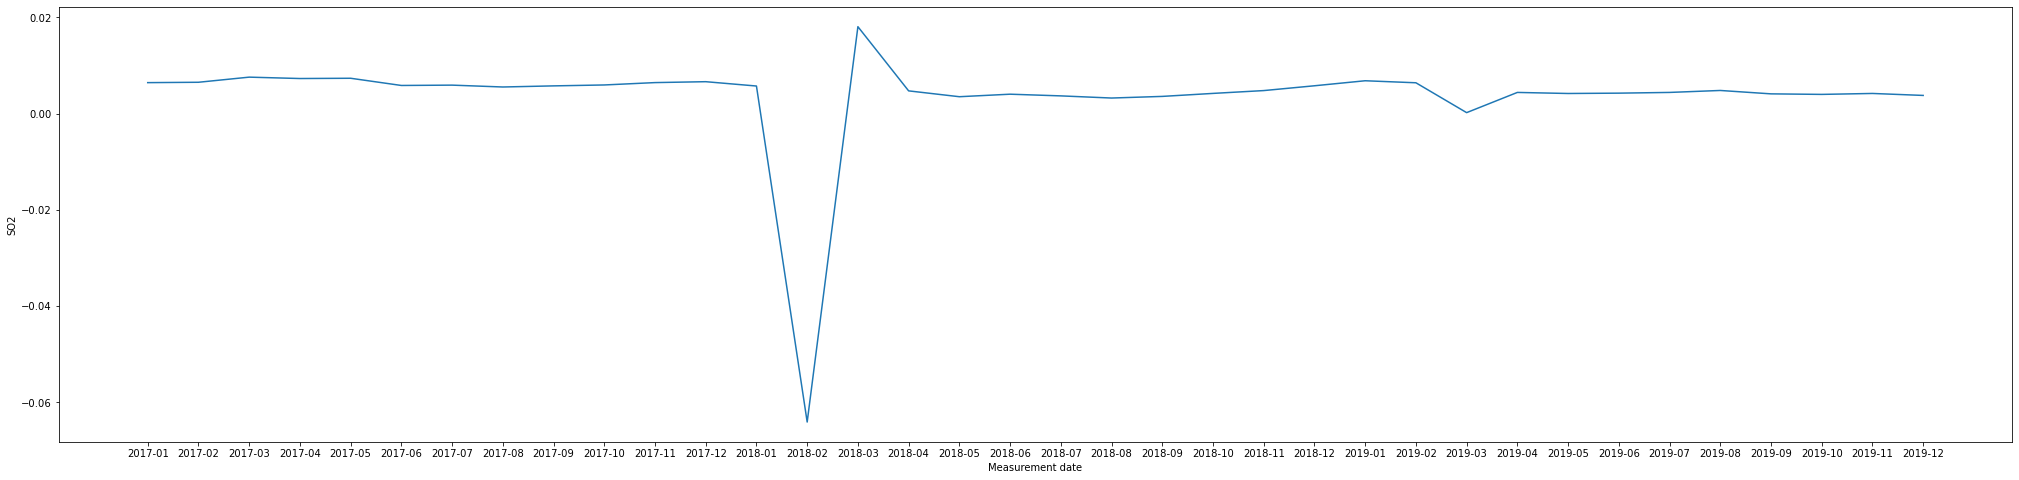

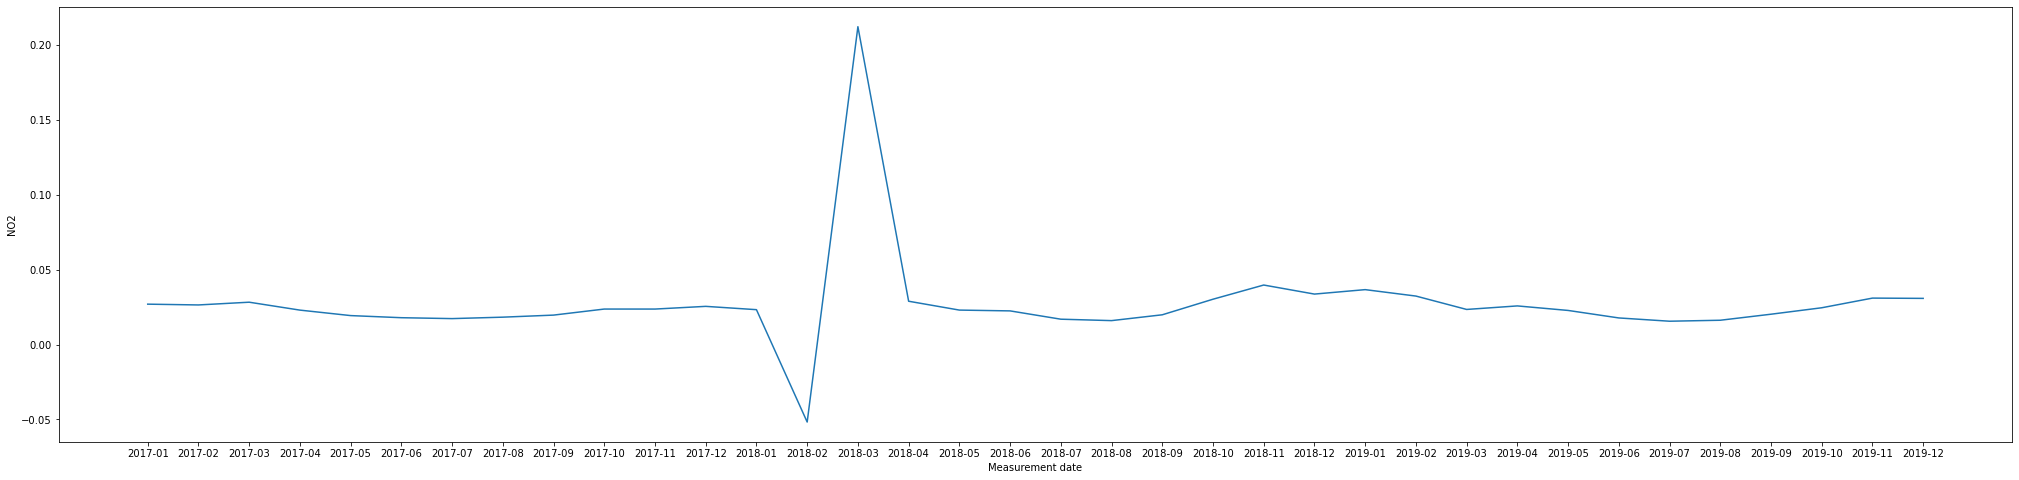

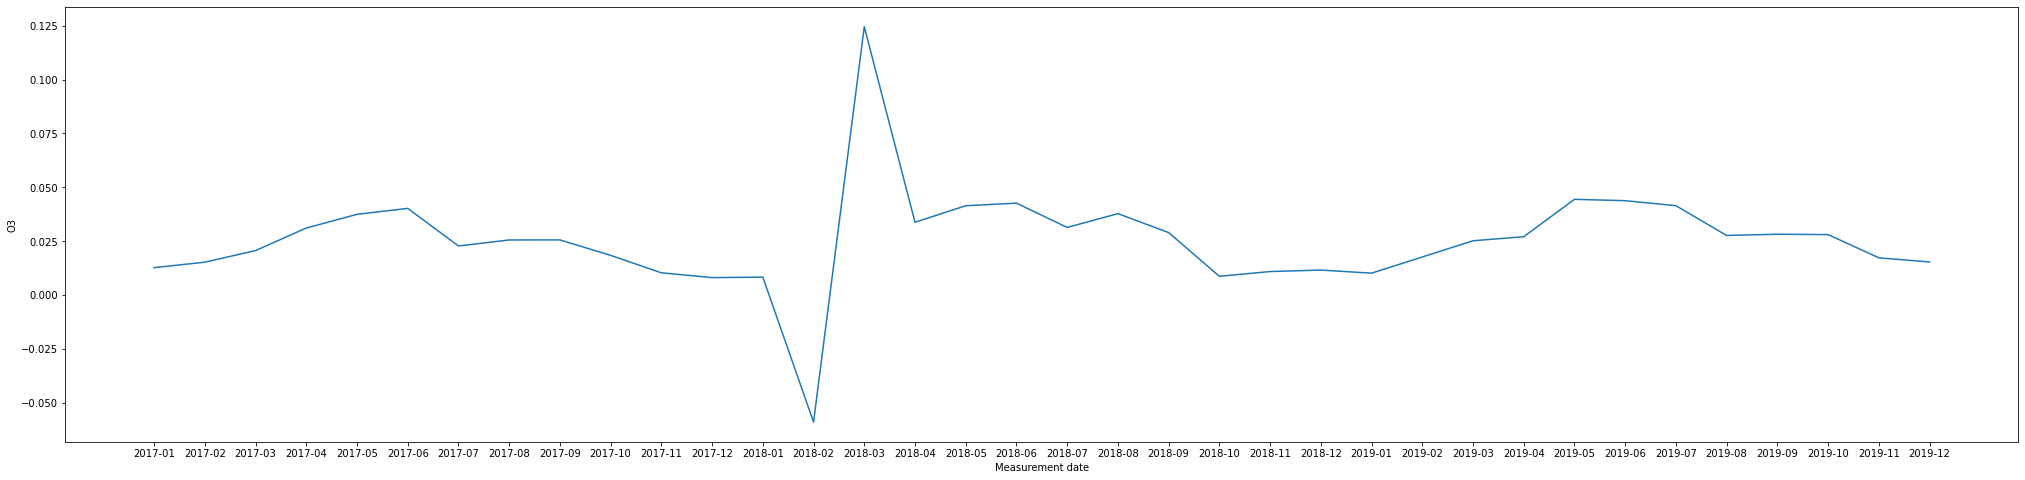

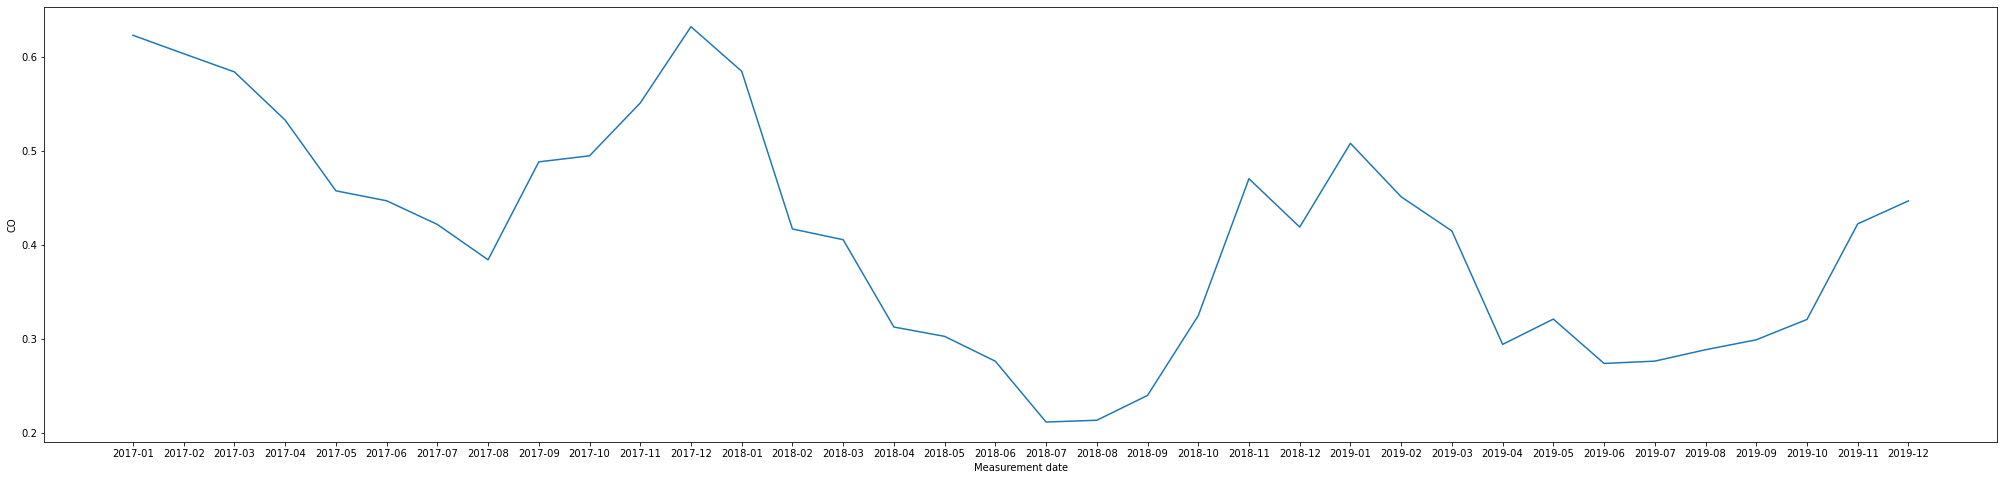

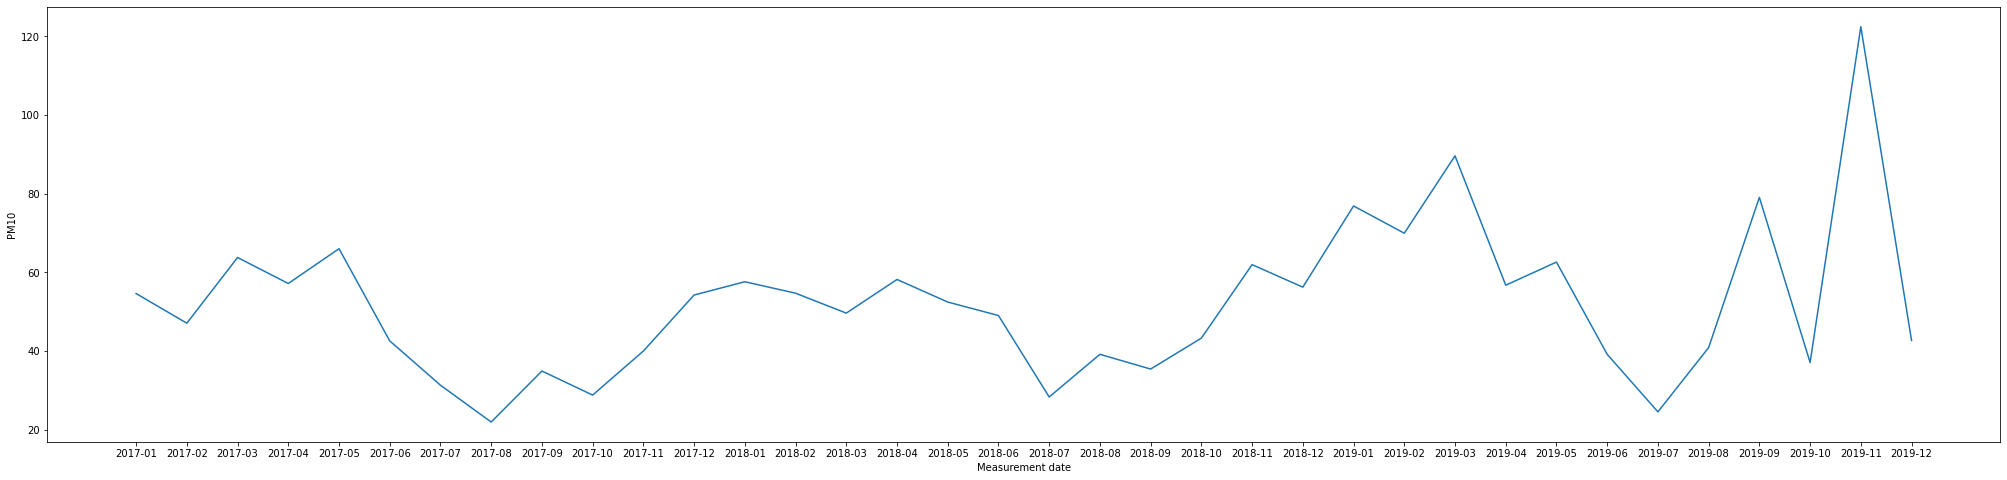

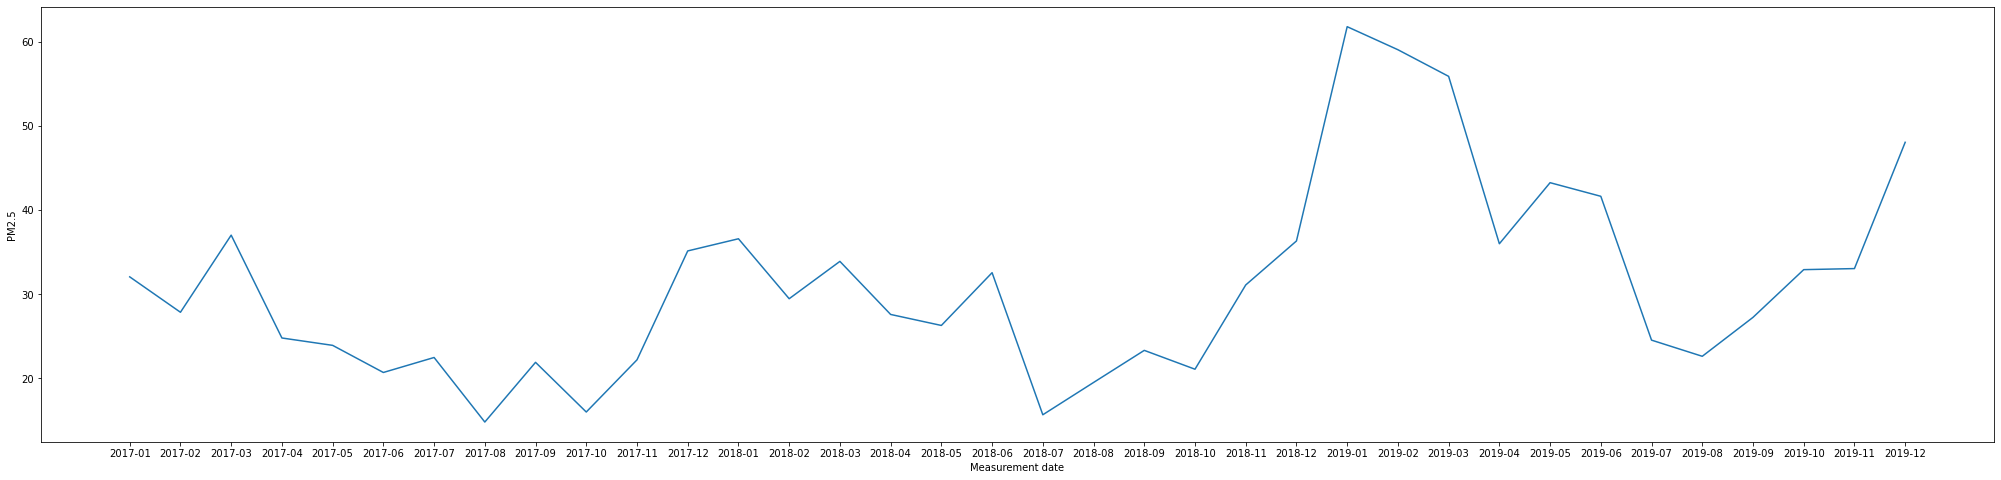

In [80]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_117)

# Station 118

In [81]:
df_118 = df[df['Station code'] == 118]

In [82]:
df_118.head()

Station code Measurement date       SO2       NO2        O3        CO  \
612           118          2017-01  0.004823  0.040688  0.013570  0.684140   
613           118          2017-02  0.004664  0.039086  0.017841  0.632292   
614           118          2017-03  0.005250  0.042371  0.024595  0.620296   
615           118          2017-04  0.002035  0.030533  0.034144  0.495694   
616           118          2017-05  0.003293  0.029913  0.039453  0.424462   

          PM10      PM2.5  
612  48.360215  33.009409  
613  41.985119  29.656250  
614  55.969086  42.028226  
615  48.720833  29.568056  
616  63.091398  23.959677

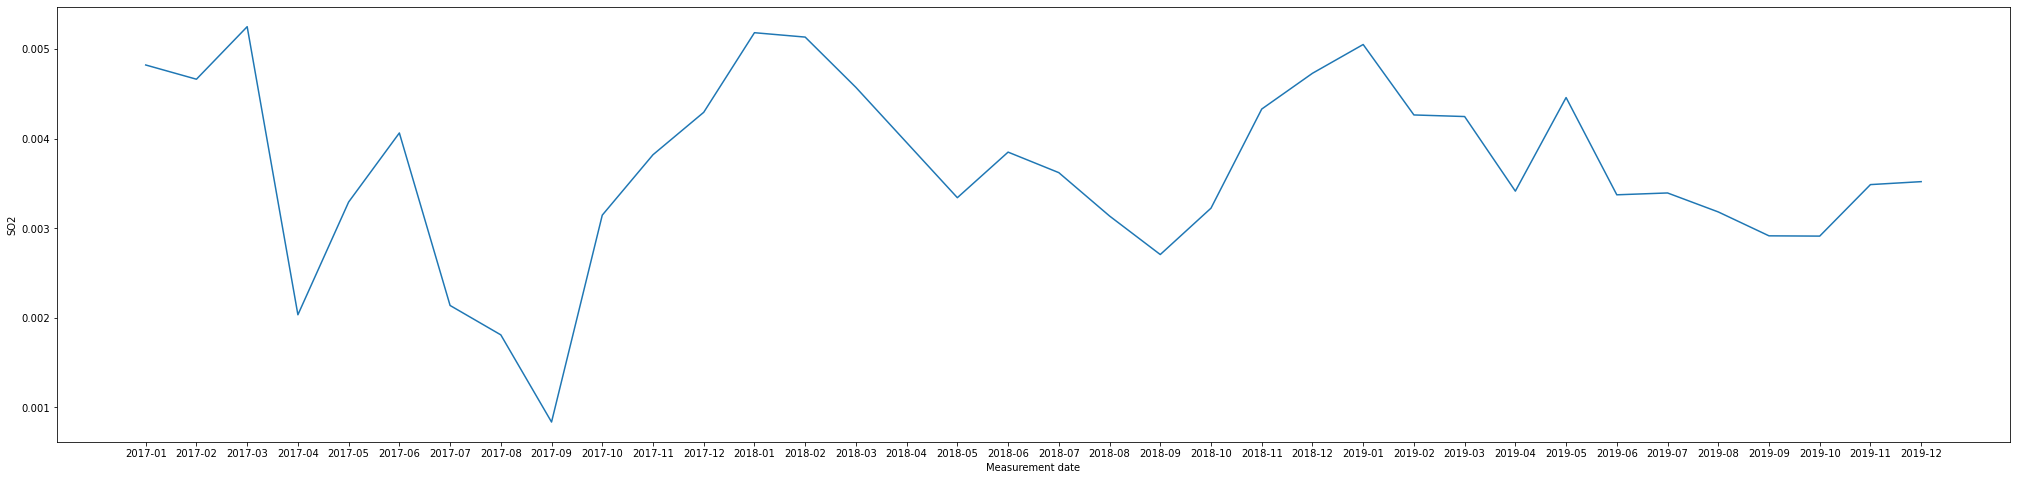

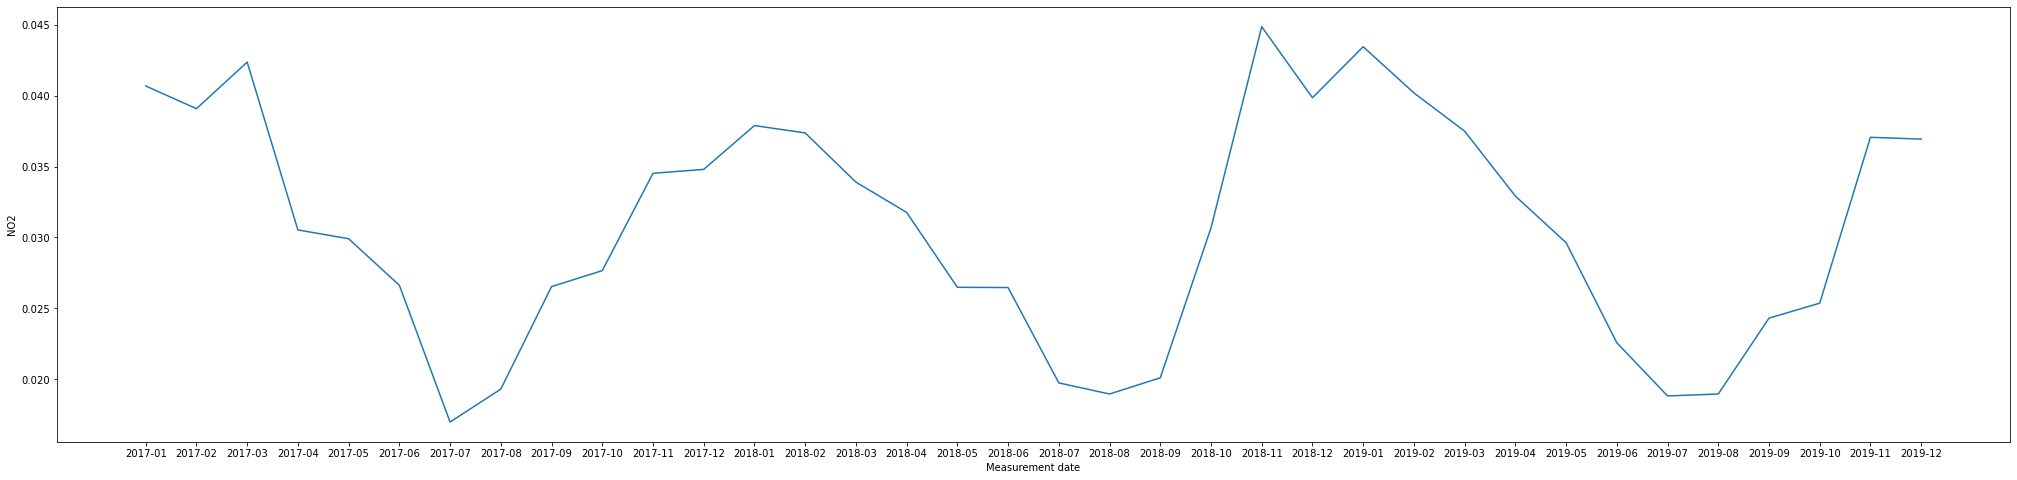

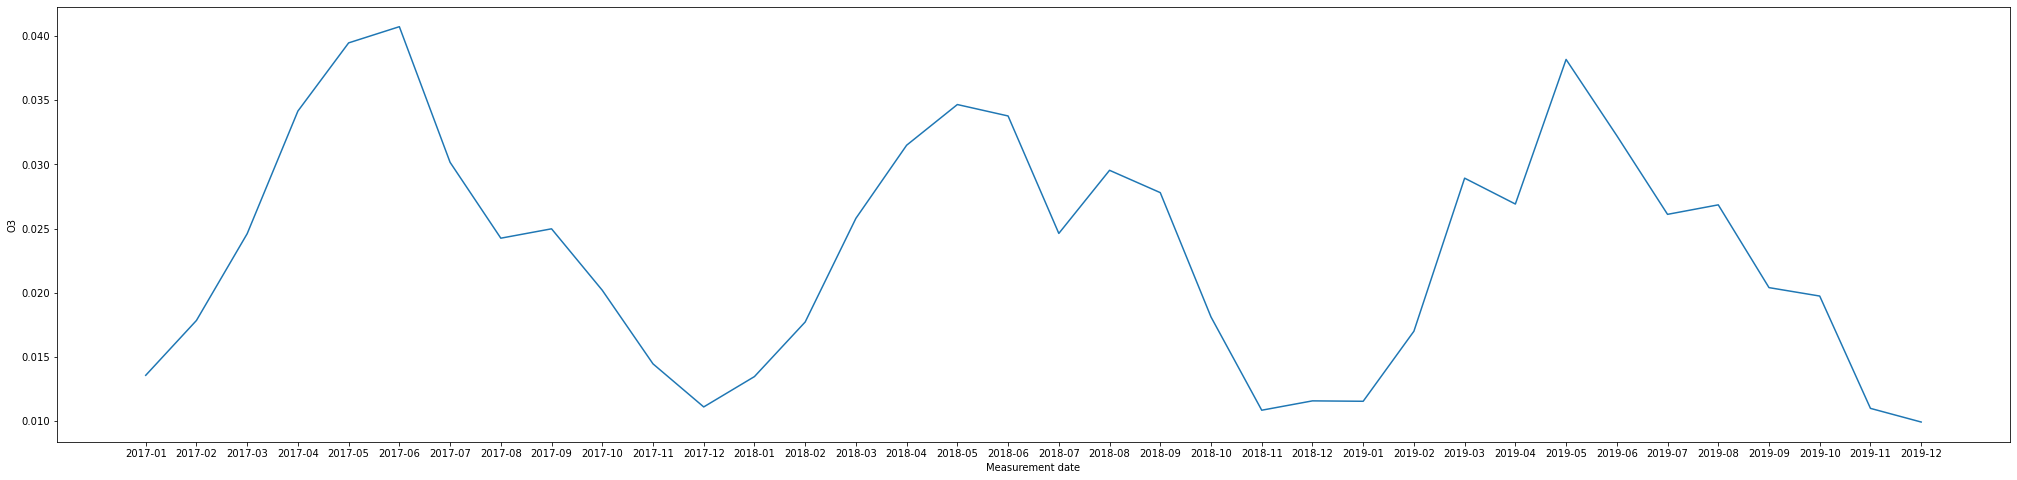

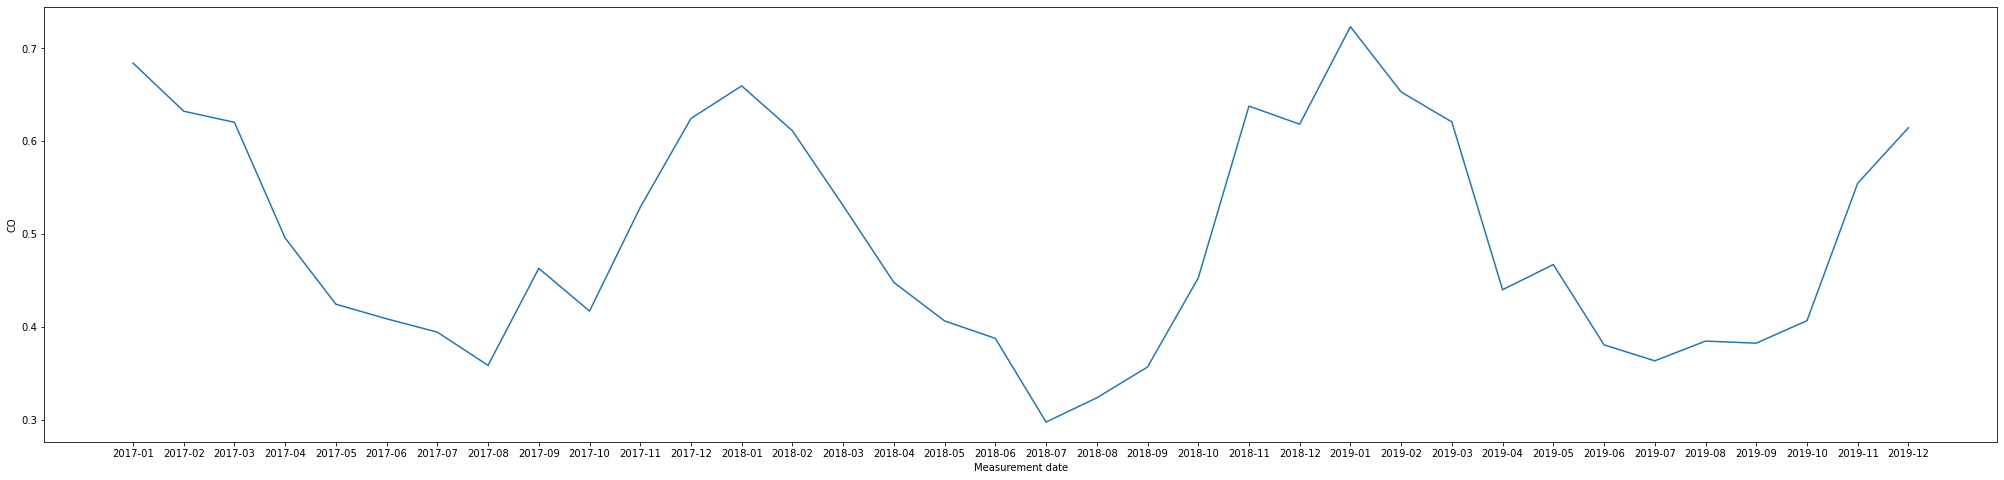

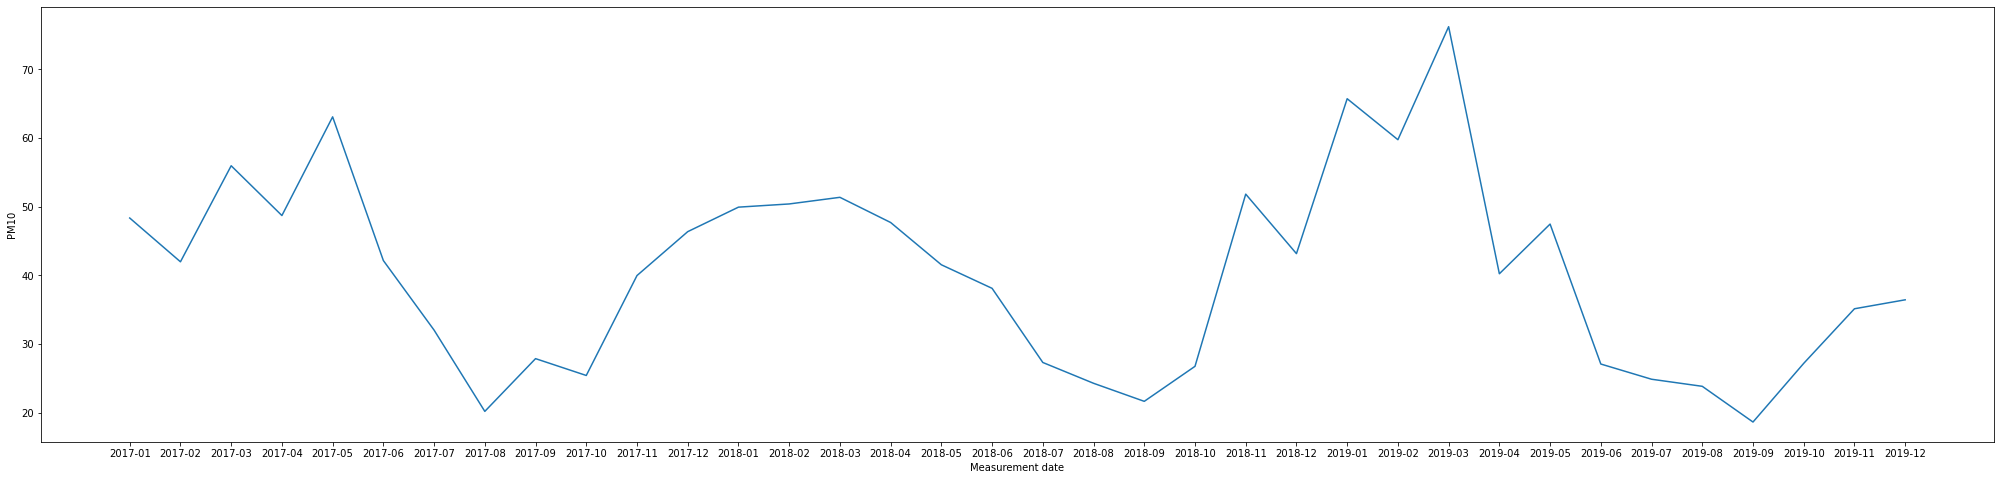

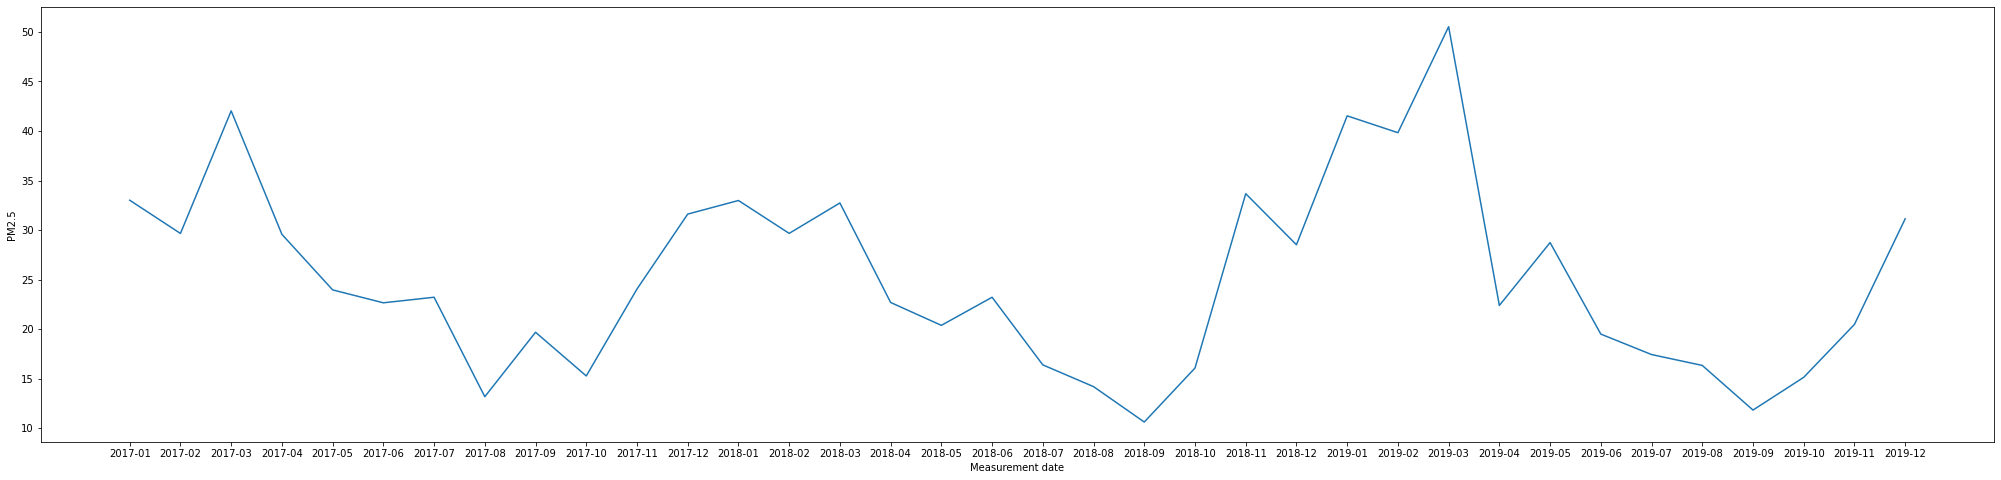

In [83]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_118)

# Station 119

In [84]:
df_119 = df[df['Station code'] == 119]

In [85]:
df_119.head()

Station code Measurement date       SO2       NO2        O3        CO  \
648           119          2017-01  0.000575  0.020273  0.008461  0.836828   
649           119          2017-02  0.004671  0.024811  0.013900  0.751042   
650           119          2017-03  0.005031  0.039700  0.016253  0.817876   
651           119          2017-04  0.005451  0.034049  0.034235  0.704861   
652           119          2017-05  0.005927  0.031270  0.041702  0.624597   

          PM10      PM2.5  
648  52.741935  32.244624  
649  48.738095  28.255952  
650  67.543011  38.521505  
651  62.237500  23.958333  
652  70.727151  21.095430

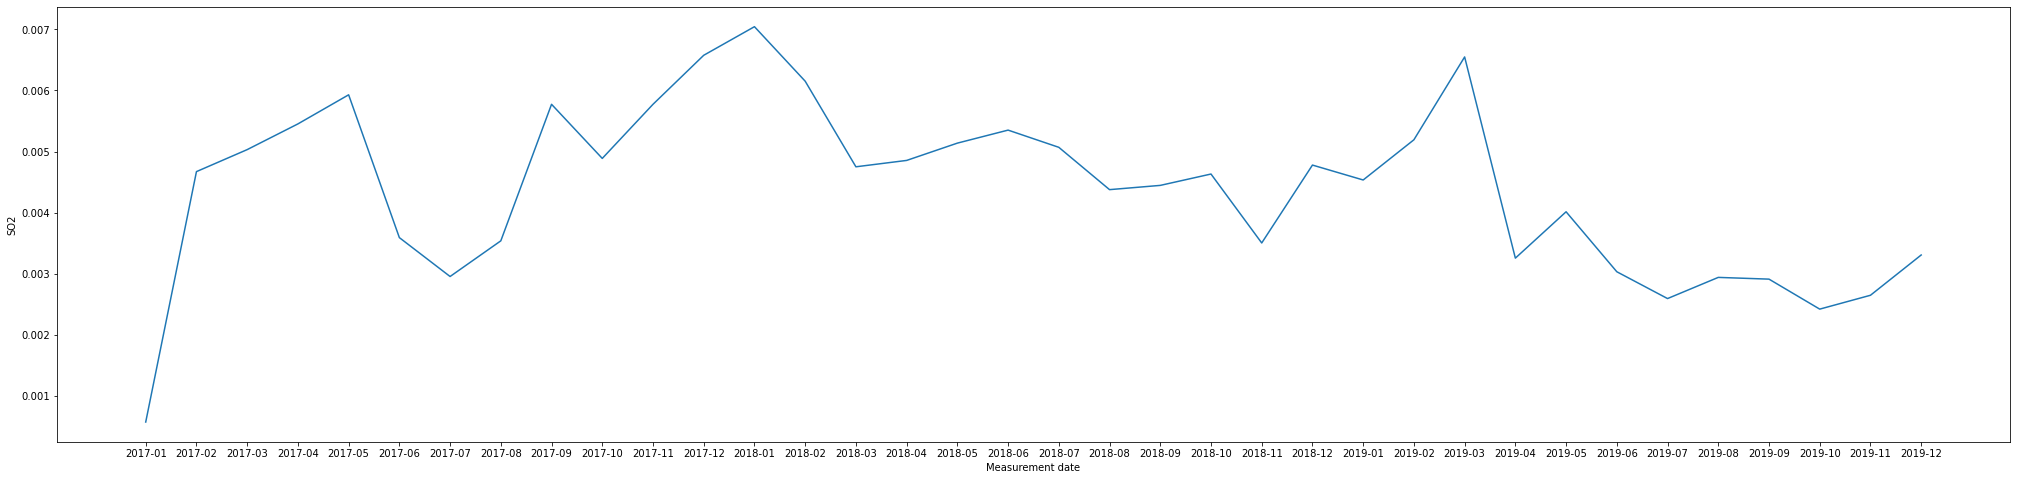

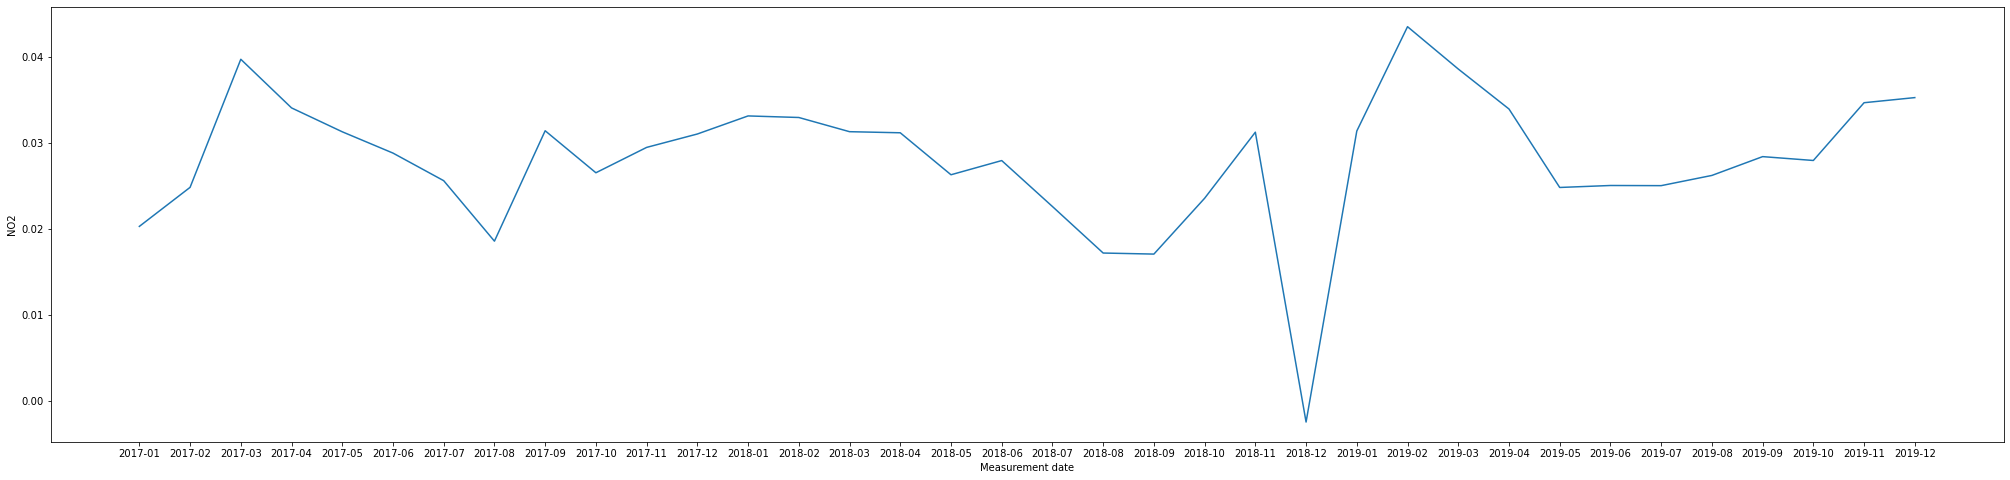

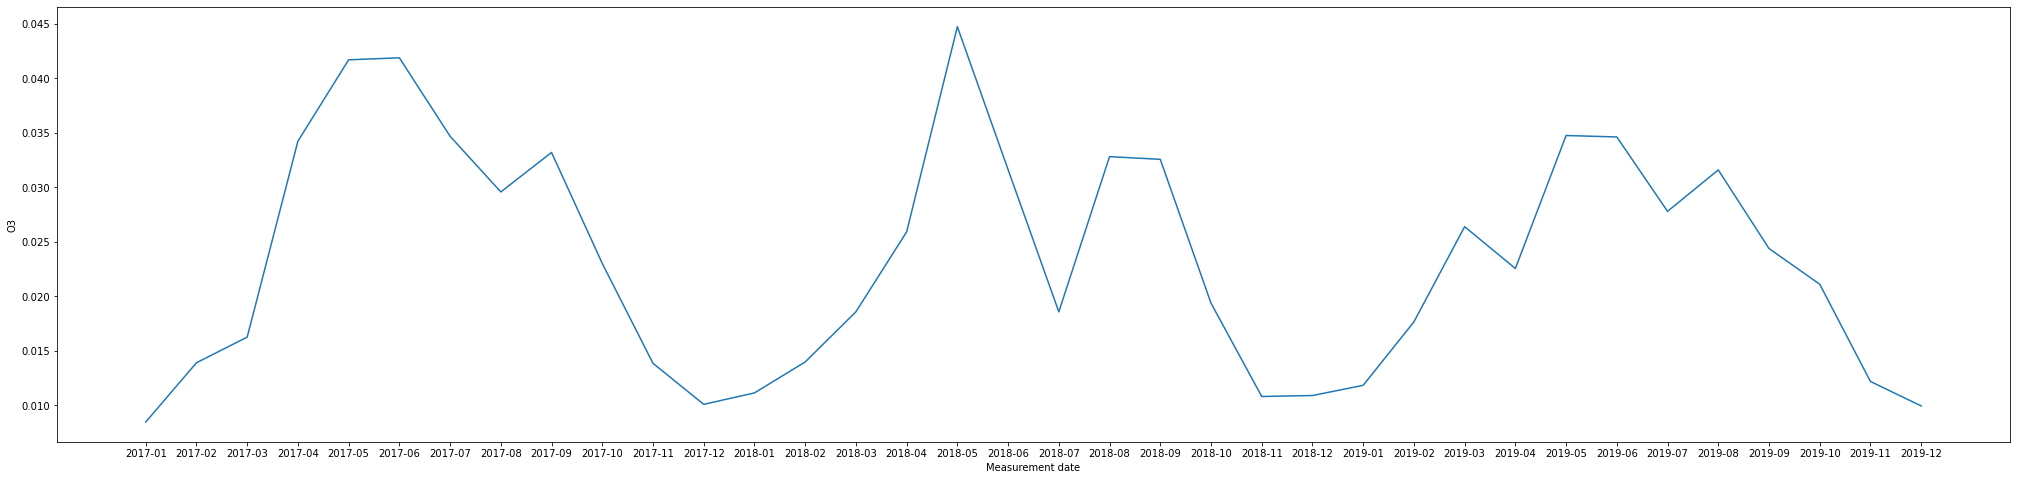

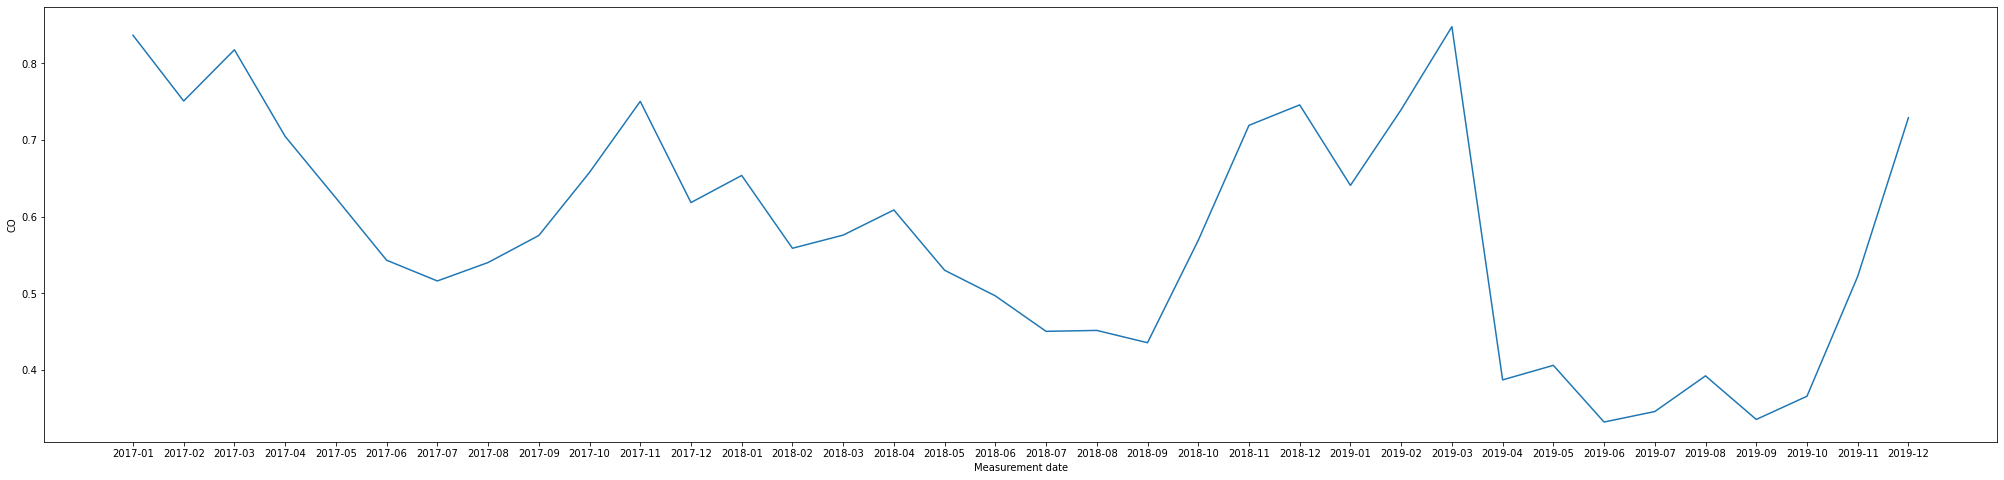

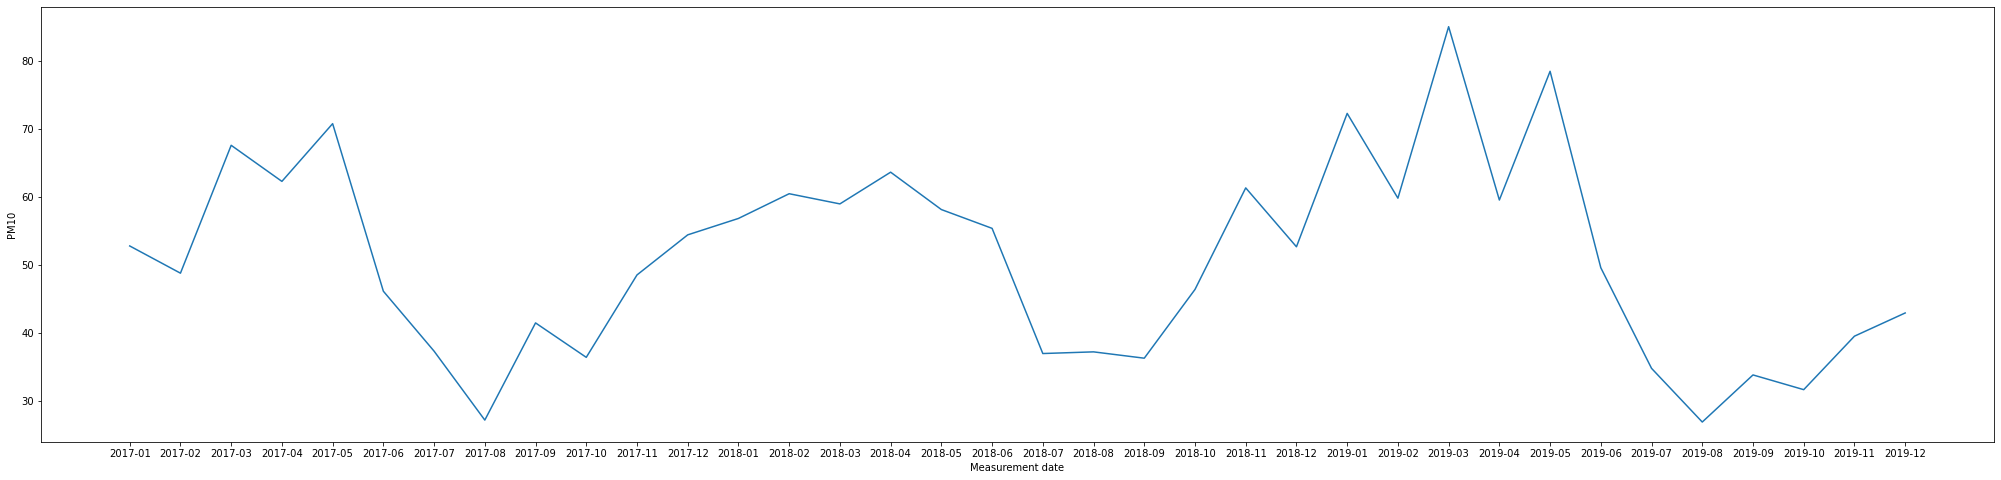

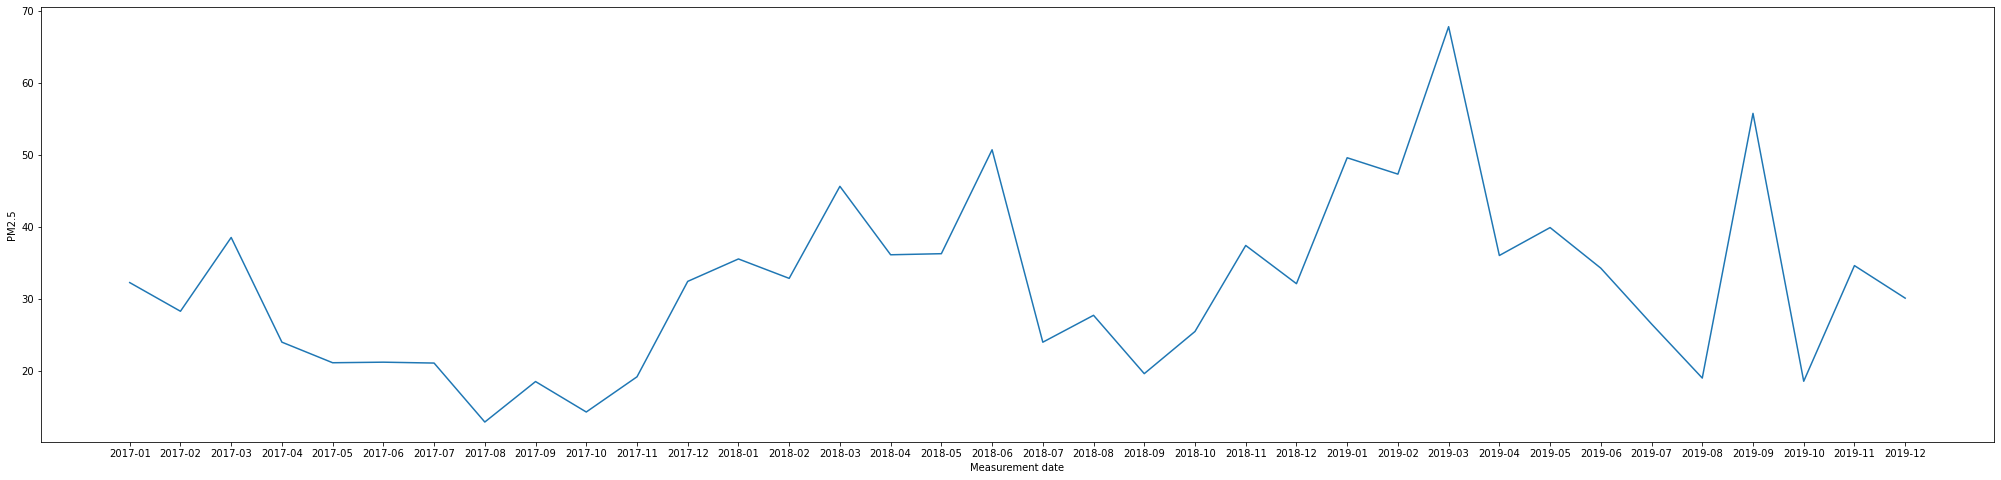

In [86]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_119)

# Station 120

In [87]:
df_120 = df[df['Station code'] == 120]

In [88]:
df_120.head()

Station code Measurement date       SO2       NO2        O3        CO  \
684           120          2017-01  0.004794  0.039741  0.014871  0.692070   
685           120          2017-02  0.004588  0.037378  0.021220  0.611905   
686           120          2017-03  0.004944  0.041044  0.029517  0.590860   
687           120          2017-04  0.004525  0.031094  0.040874  0.492361   
688           120          2017-05  0.004208  0.025641  0.046356  0.376210   

          PM10      PM2.5  
684  48.876344  34.952957  
685  41.891369  29.187500  
686  55.076613  37.931452  
687  49.276389  26.590278  
688  52.286290  23.169355

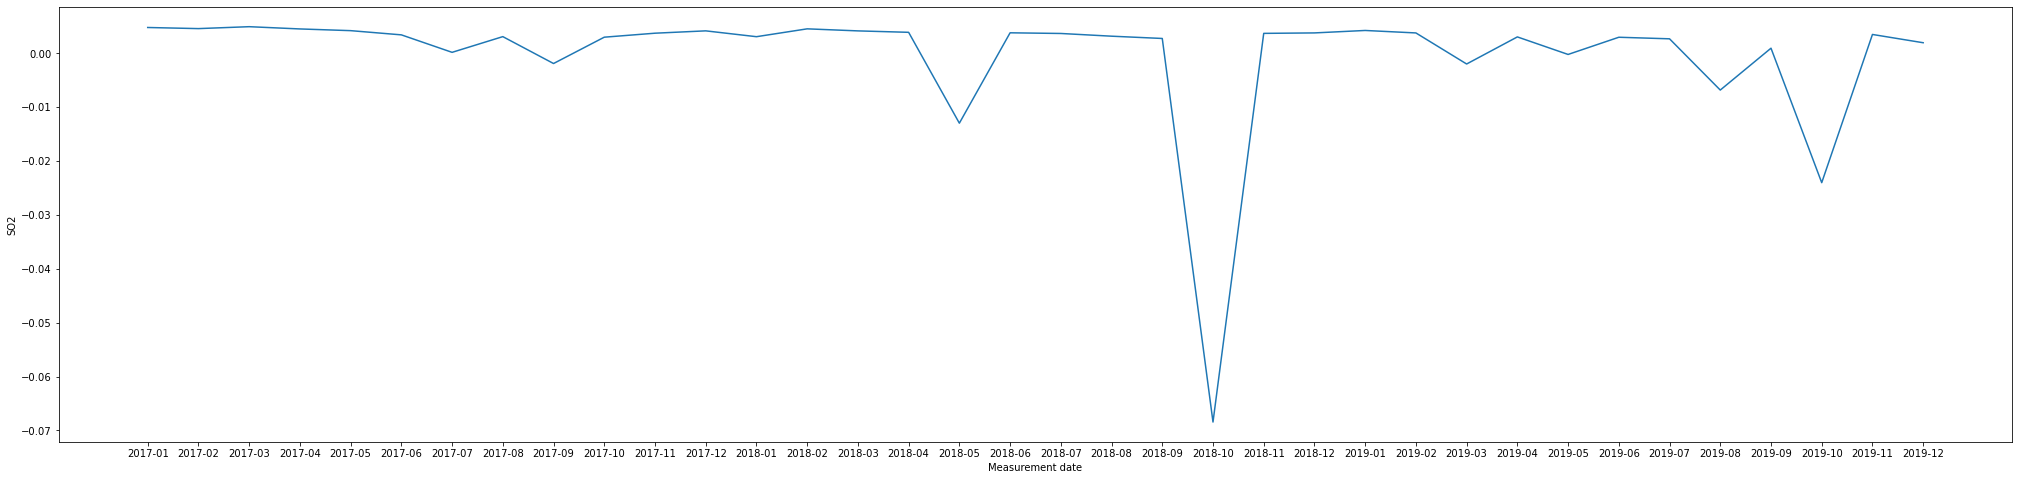

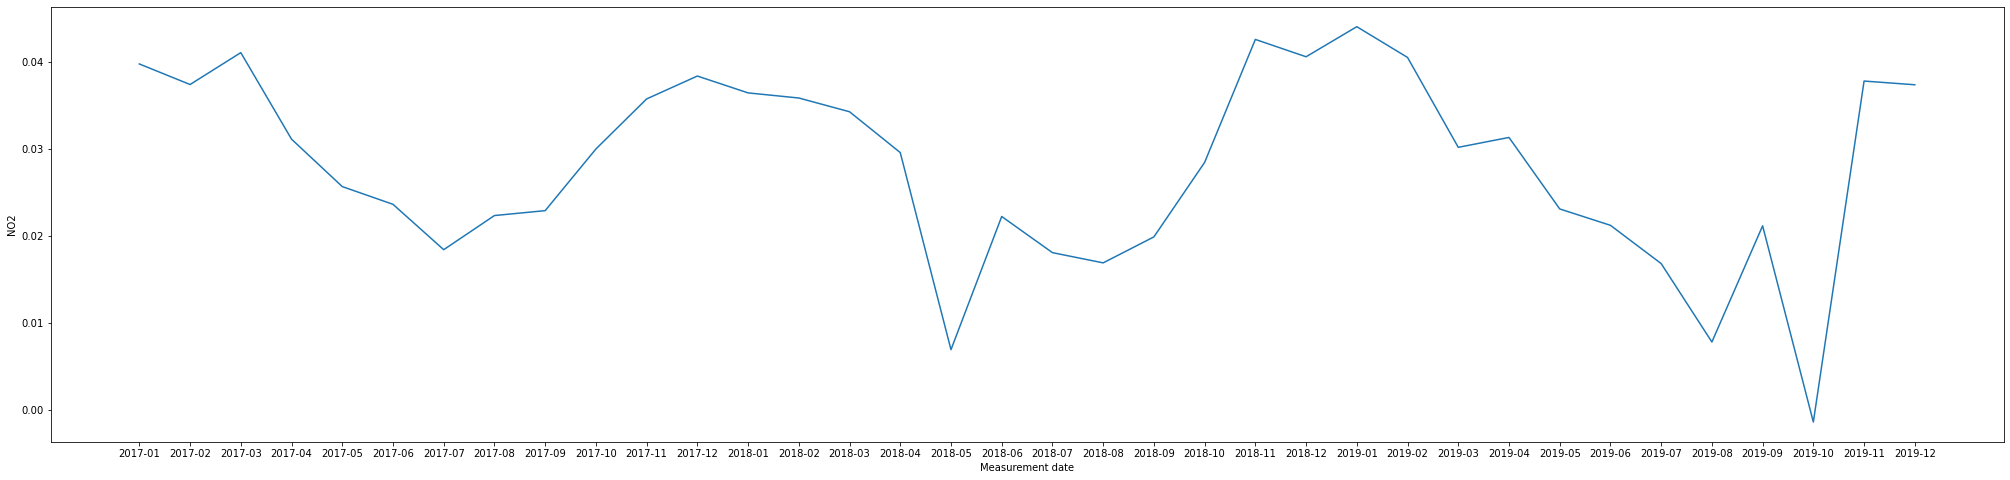

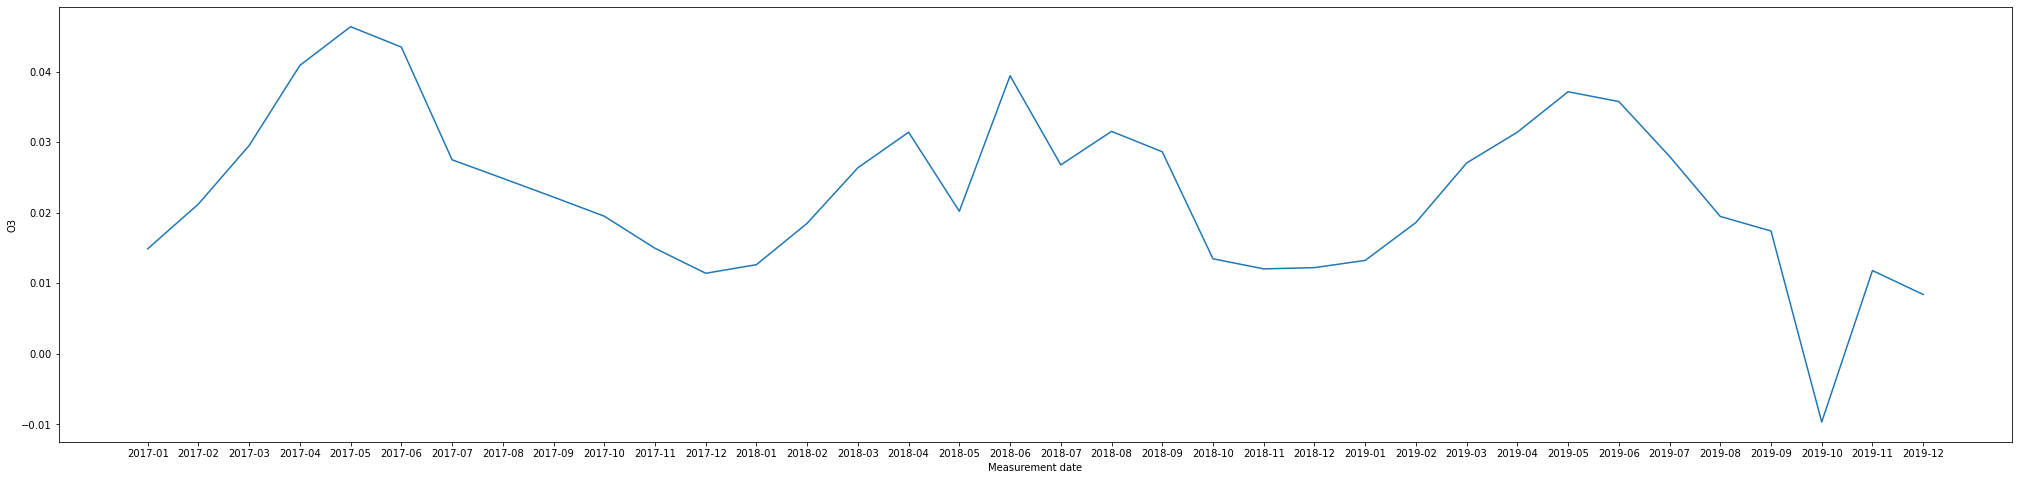

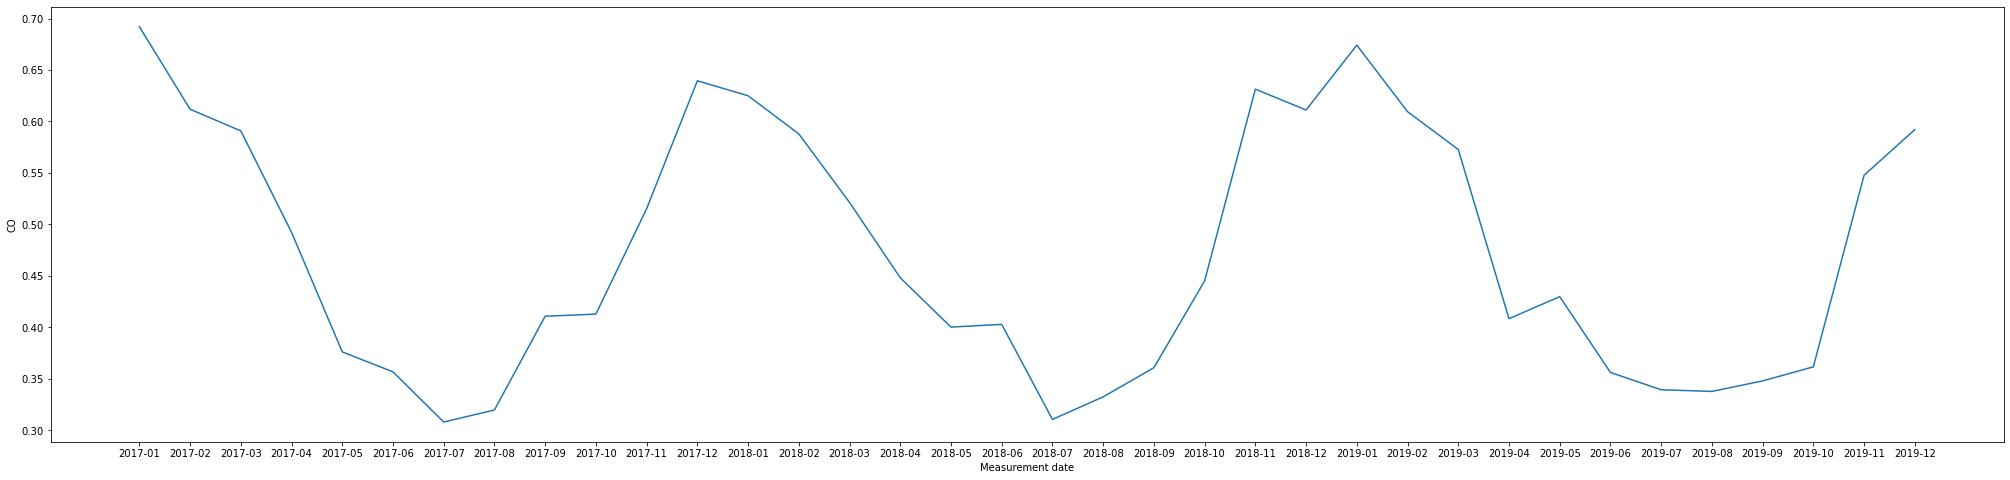

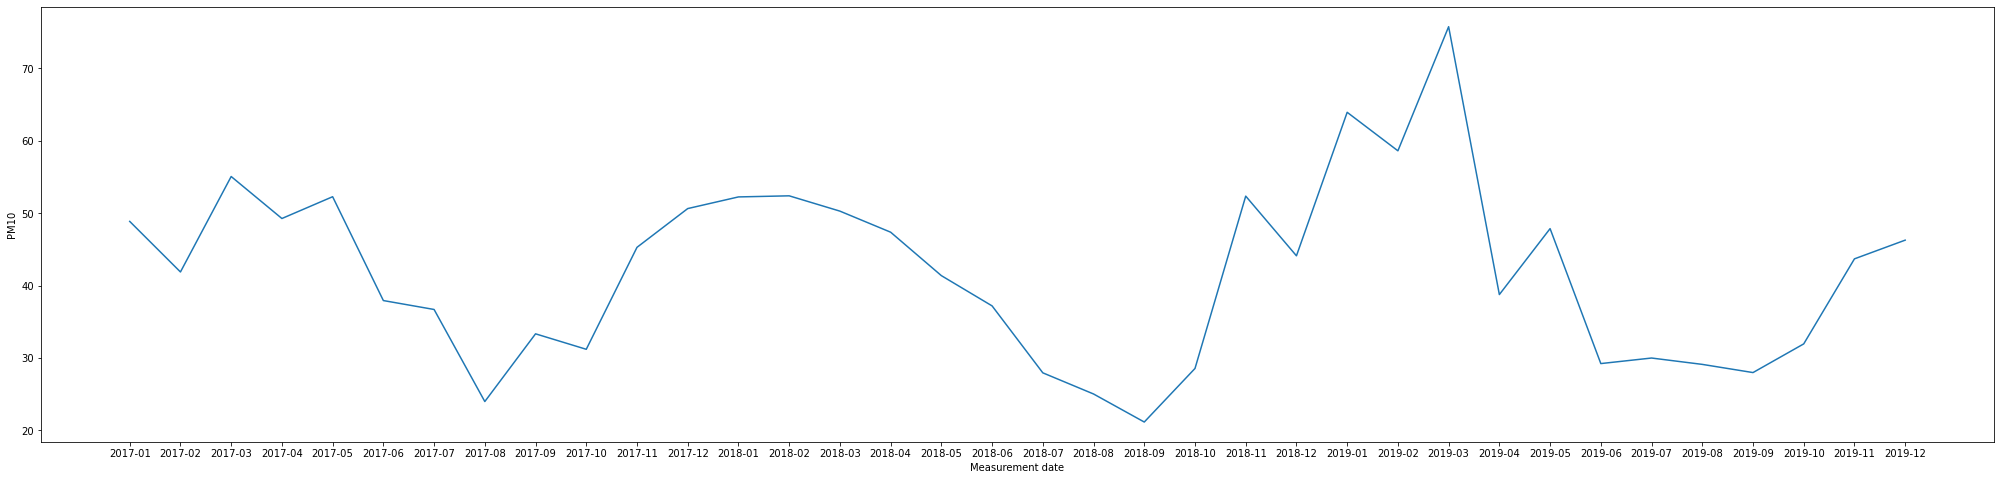

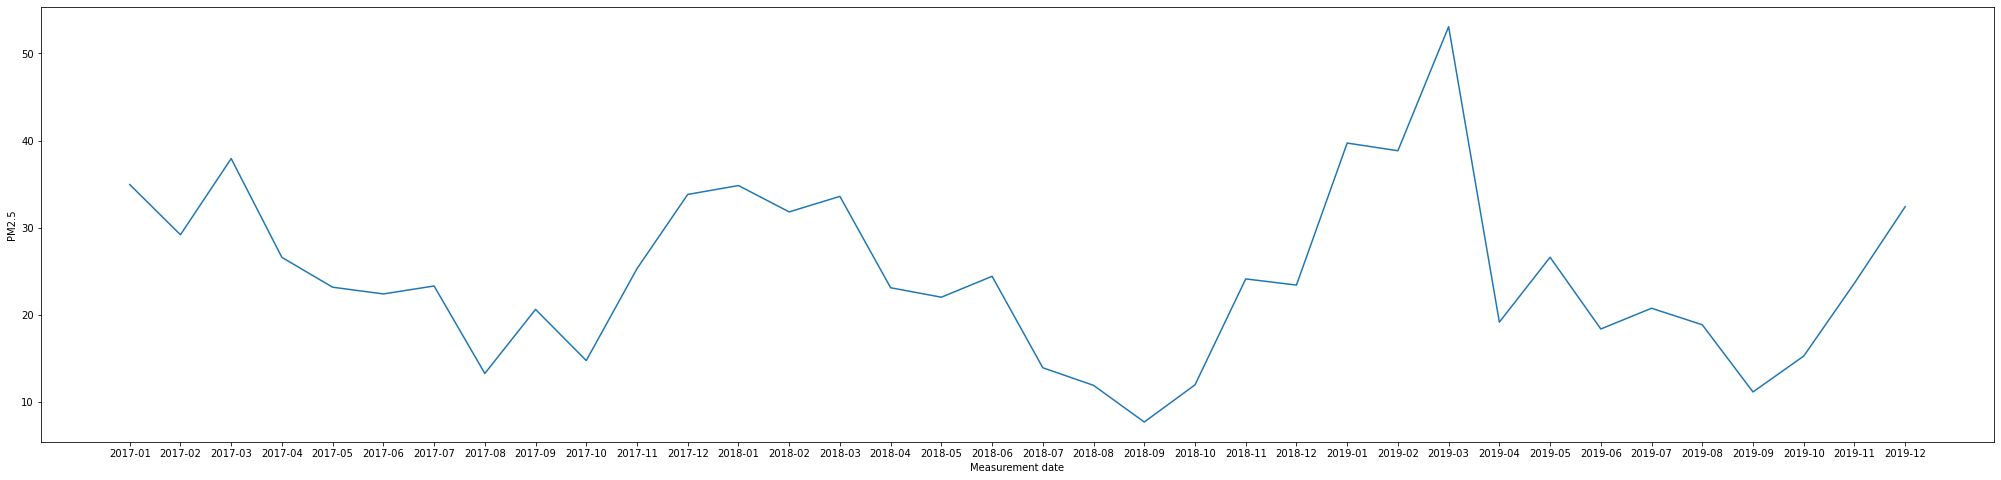

In [89]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_120)

# Station 121

In [90]:
df_121 = df[df['Station code'] == 121]

In [91]:
df_121.head()

Station code Measurement date       SO2       NO2        O3        CO  \
720           121          2017-01  0.006773  0.044907  0.013407  0.722581   
721           121          2017-02  0.006789  0.044295  0.017588  0.671131   
722           121          2017-03  0.002964  0.044805  0.024216  0.651478   
723           121          2017-04  0.004278  0.032456  0.038383  0.495833   
724           121          2017-05  0.004993  0.027528  0.044165  0.403360   

          PM10      PM2.5  
720  48.126344  33.987903  
721  41.854167  30.019345  
722  52.626344  40.537634  
723  58.465278  27.131944  
724  64.188172  26.430108

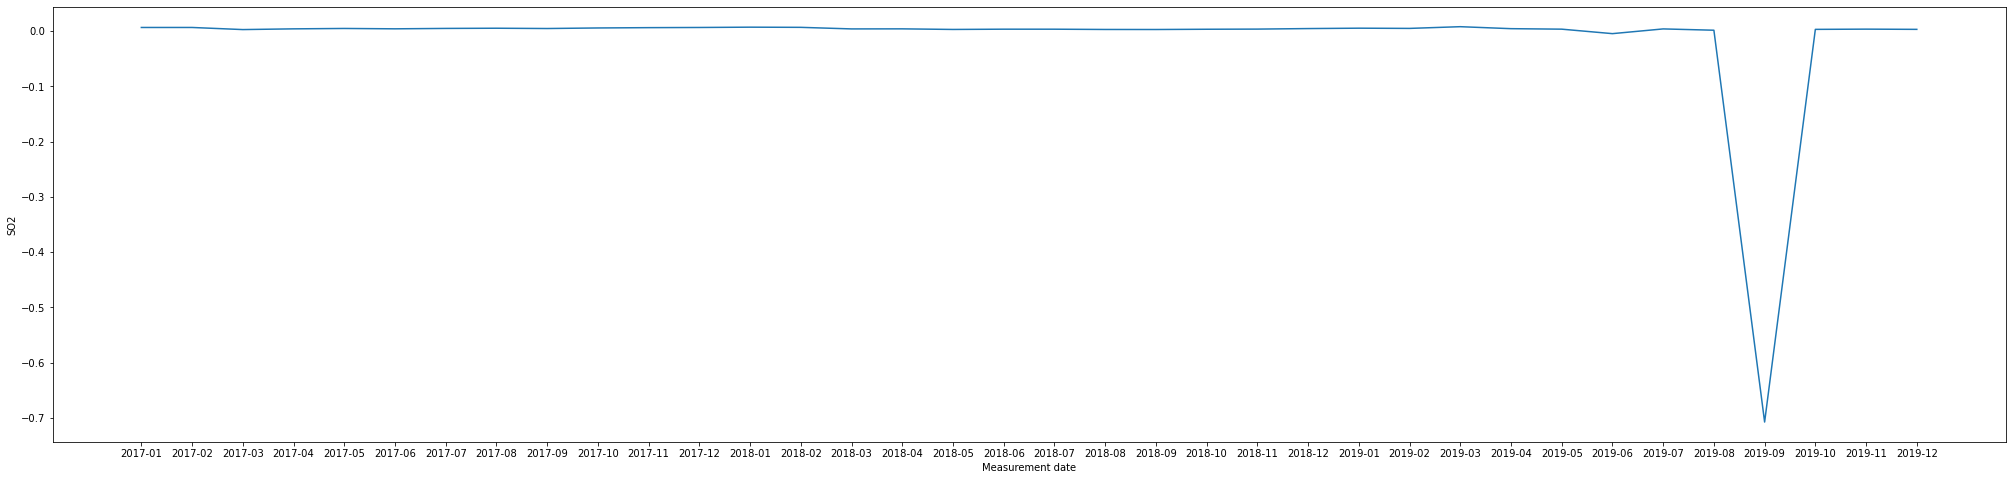

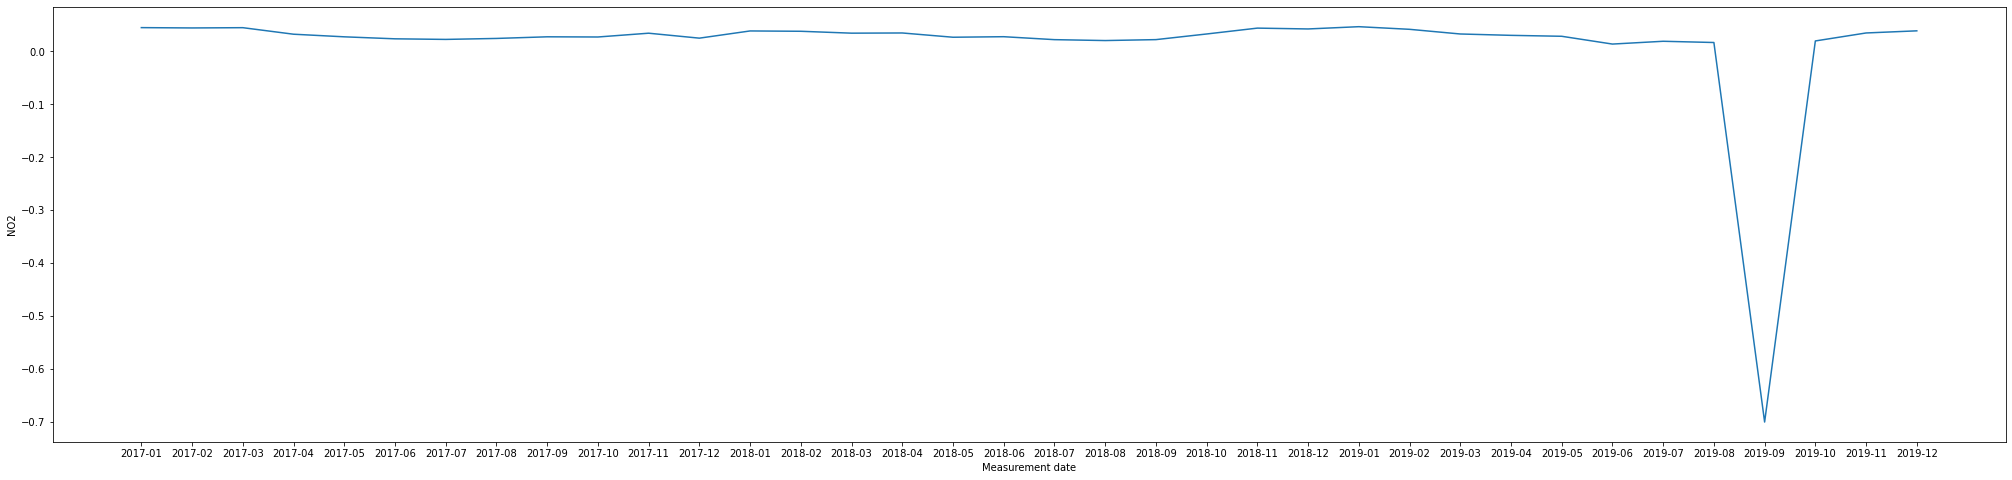

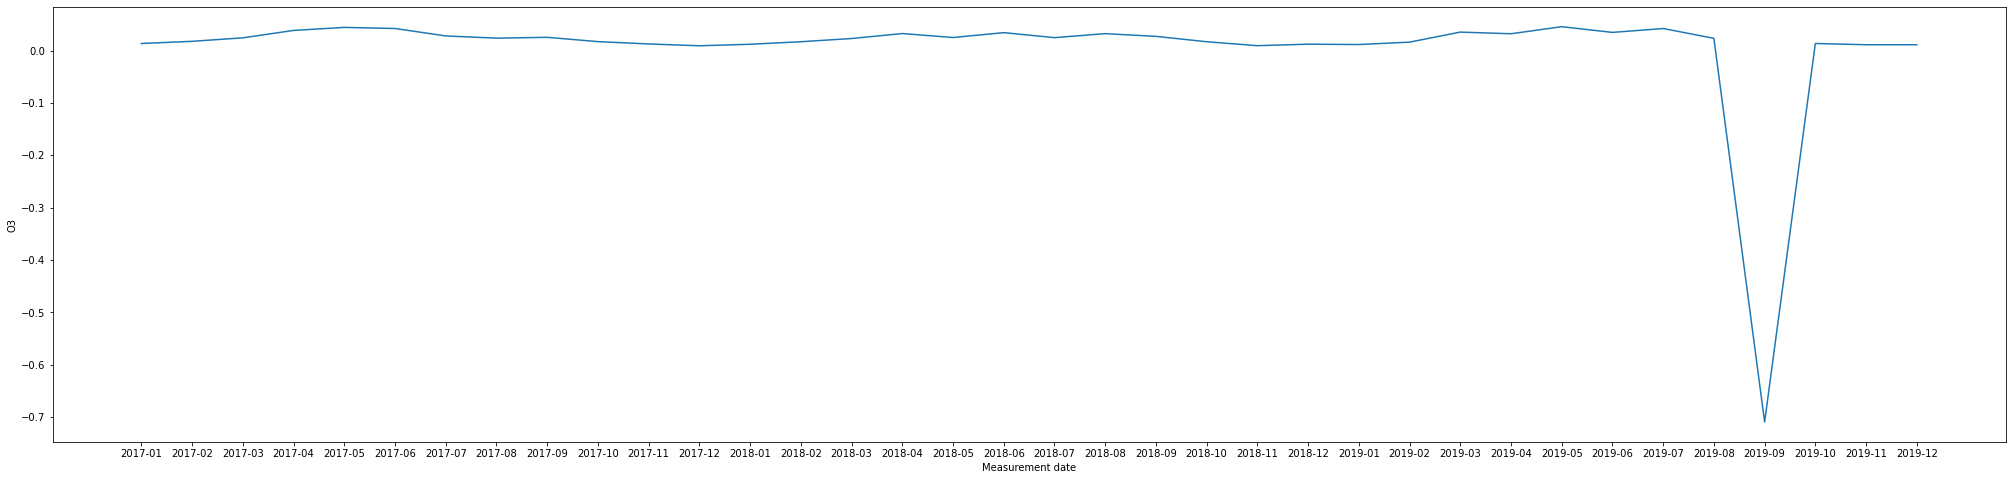

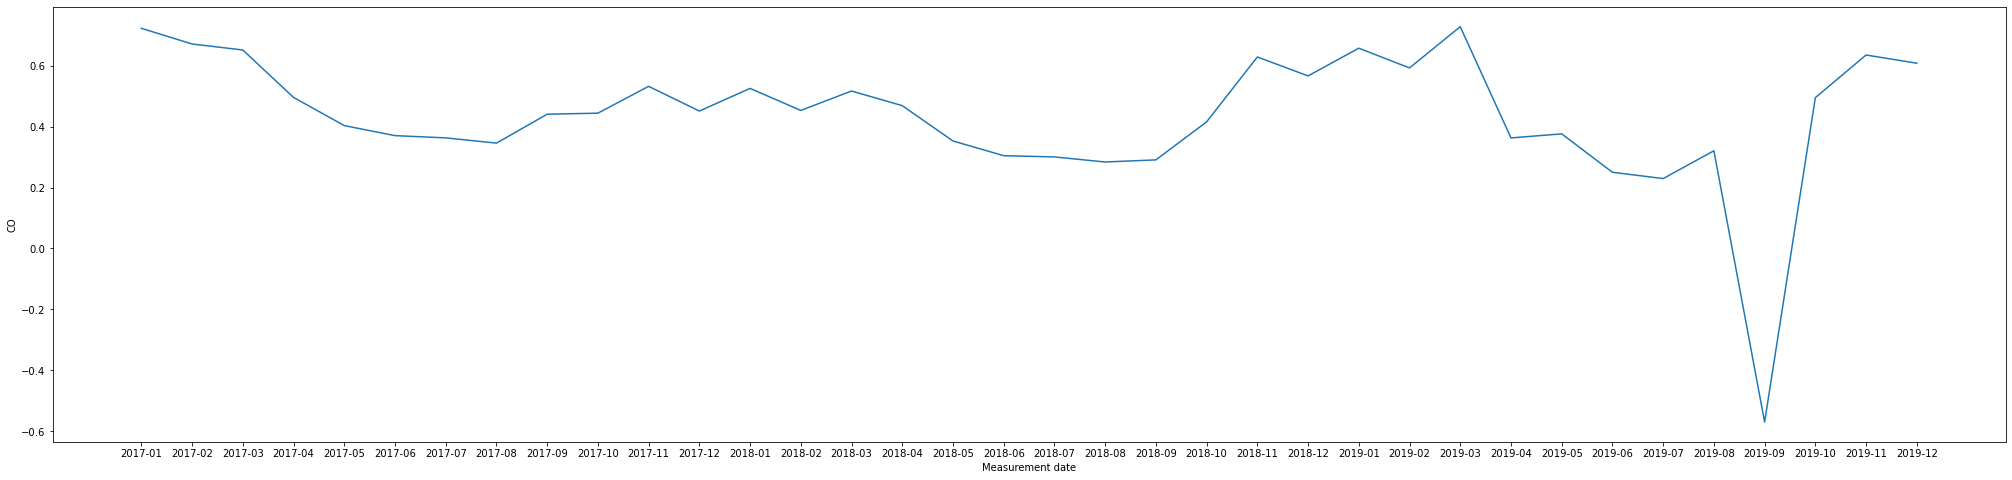

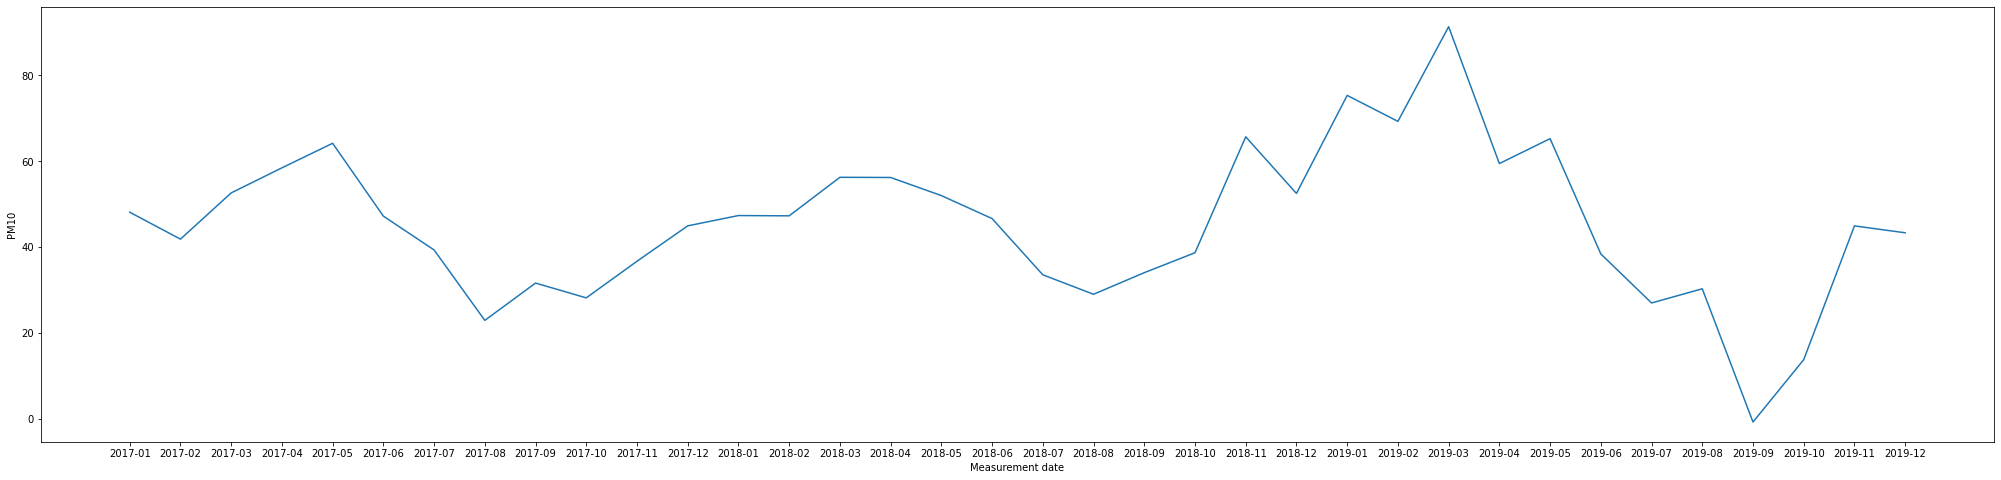

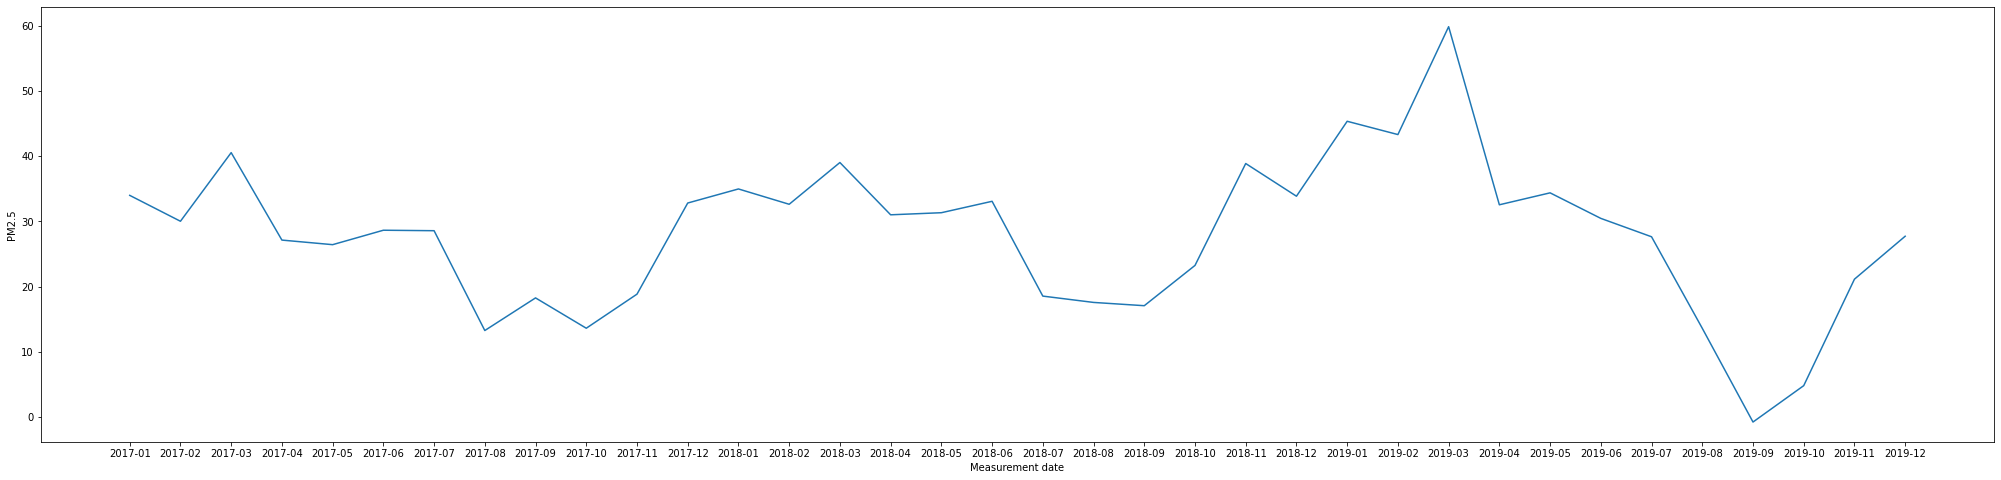

In [92]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_121)

# Station 122

In [93]:
df_122 = df[df['Station code'] == 122]

In [94]:
df_122.head()

Station code Measurement date       SO2       NO2        O3        CO  \
756           122          2017-01  0.004730  0.033216  0.015831  0.709409   
757           122          2017-02  0.004552  0.033195  0.018996  0.626935   
758           122          2017-03  0.004960  0.037366  0.025272  0.604032   
759           122          2017-04  0.005318  0.030301  0.037132  0.509028   
760           122          2017-05  0.005906  0.026953  0.042767  0.452688   

          PM10      PM2.5  
756  55.923387  27.225806  
757  49.197917  26.691964  
758  65.099462  43.901882  
759  63.156944  26.954167  
760  70.047043  23.889785

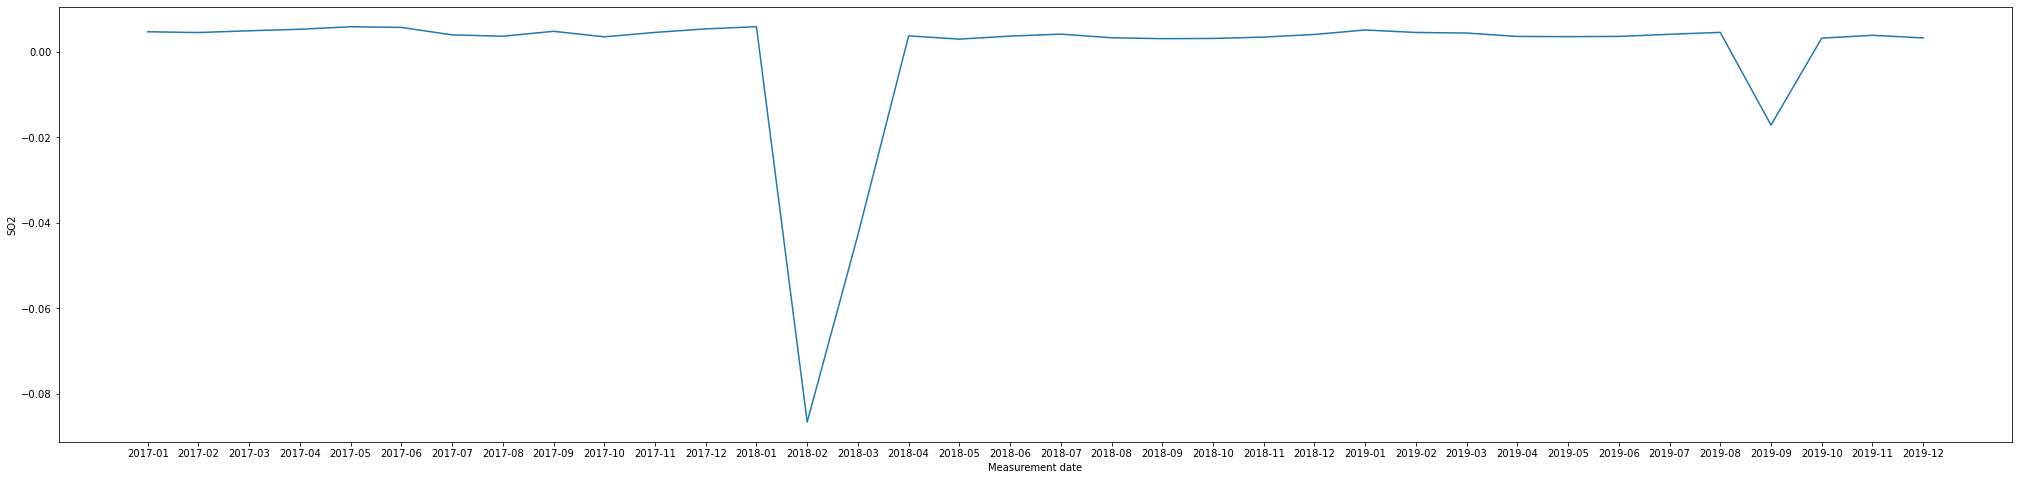

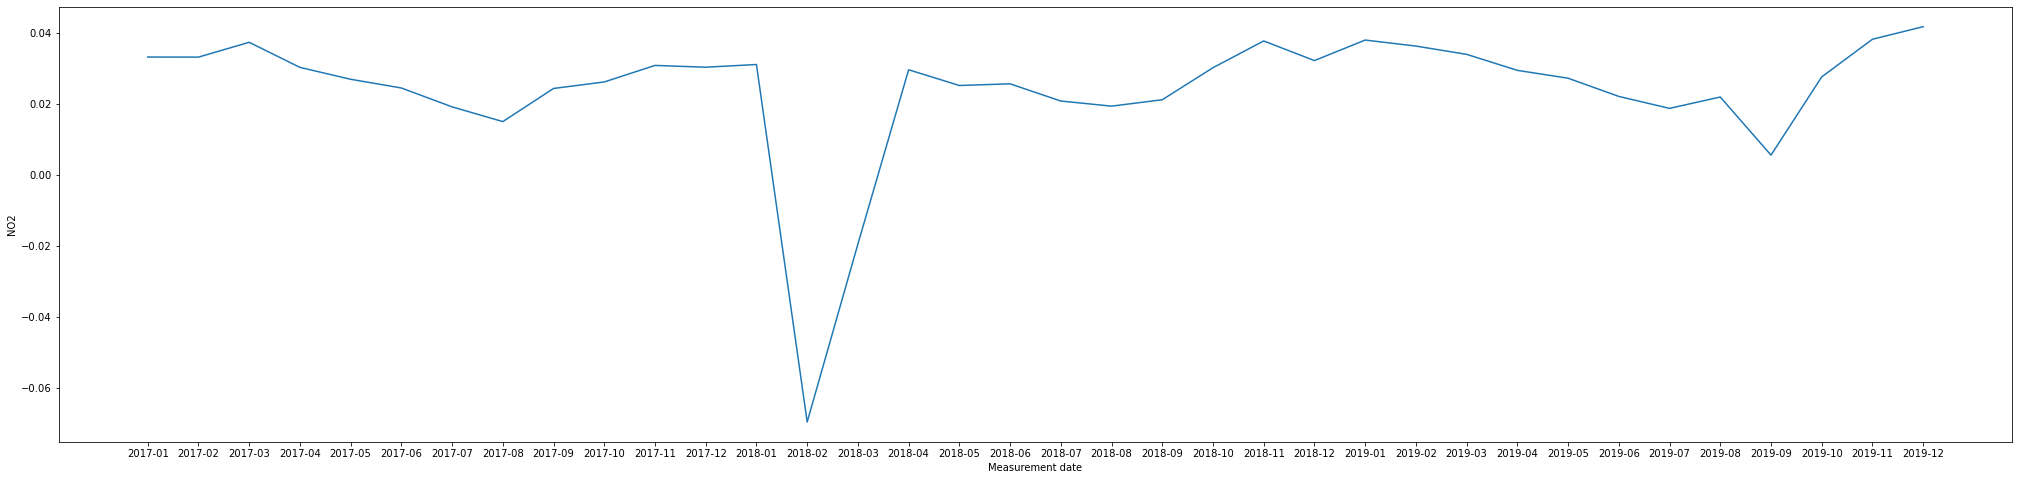

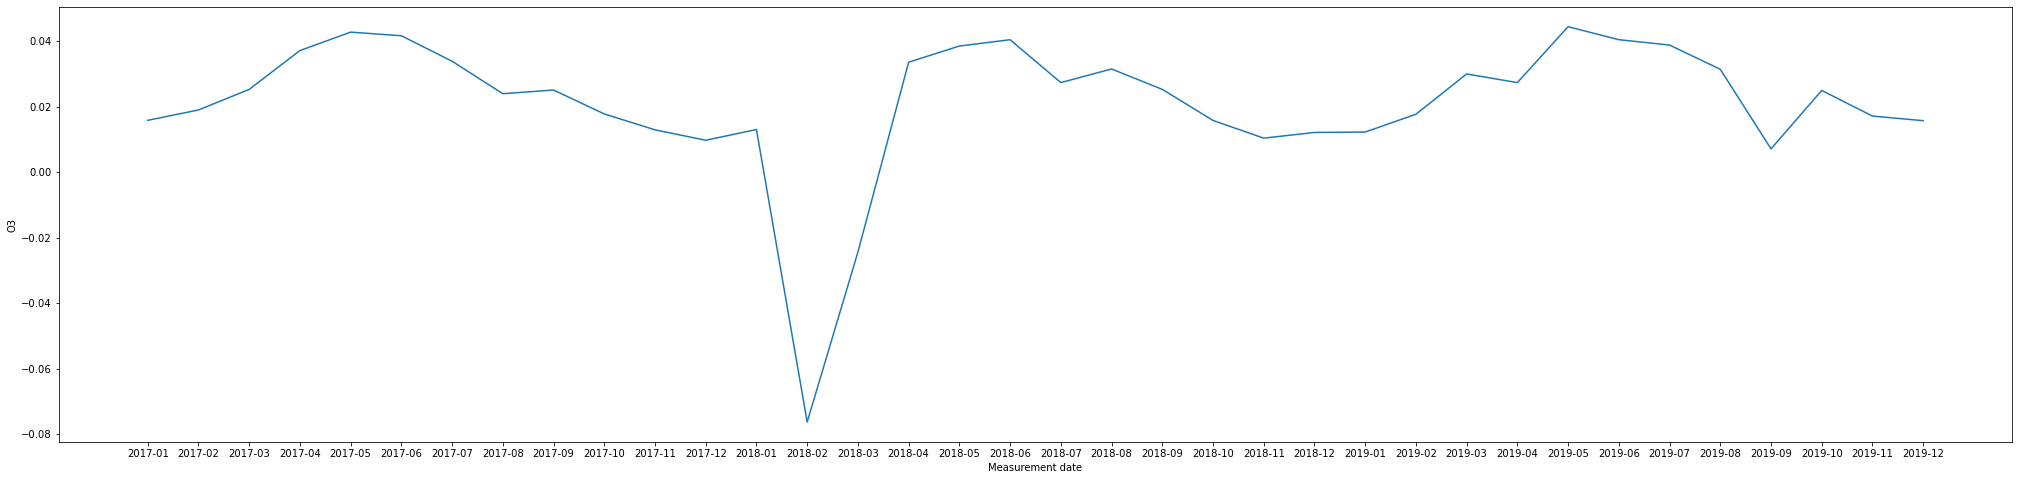

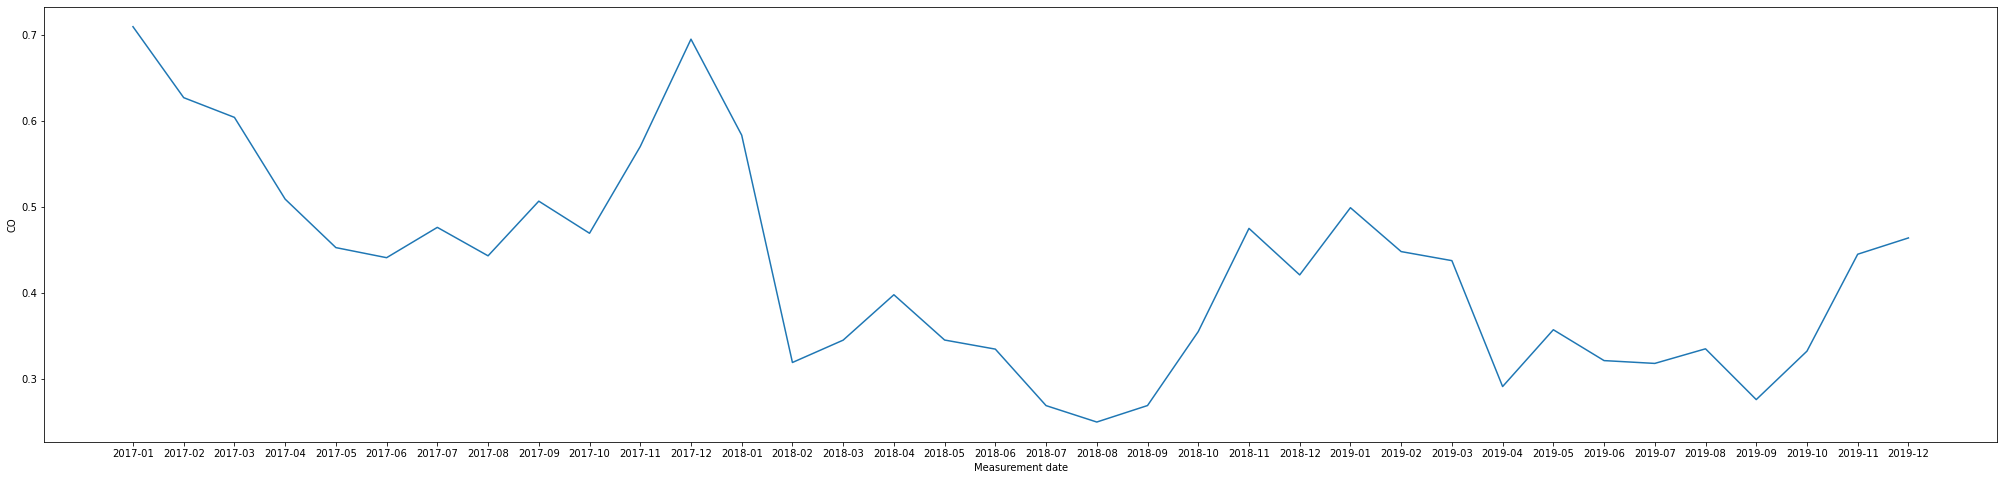

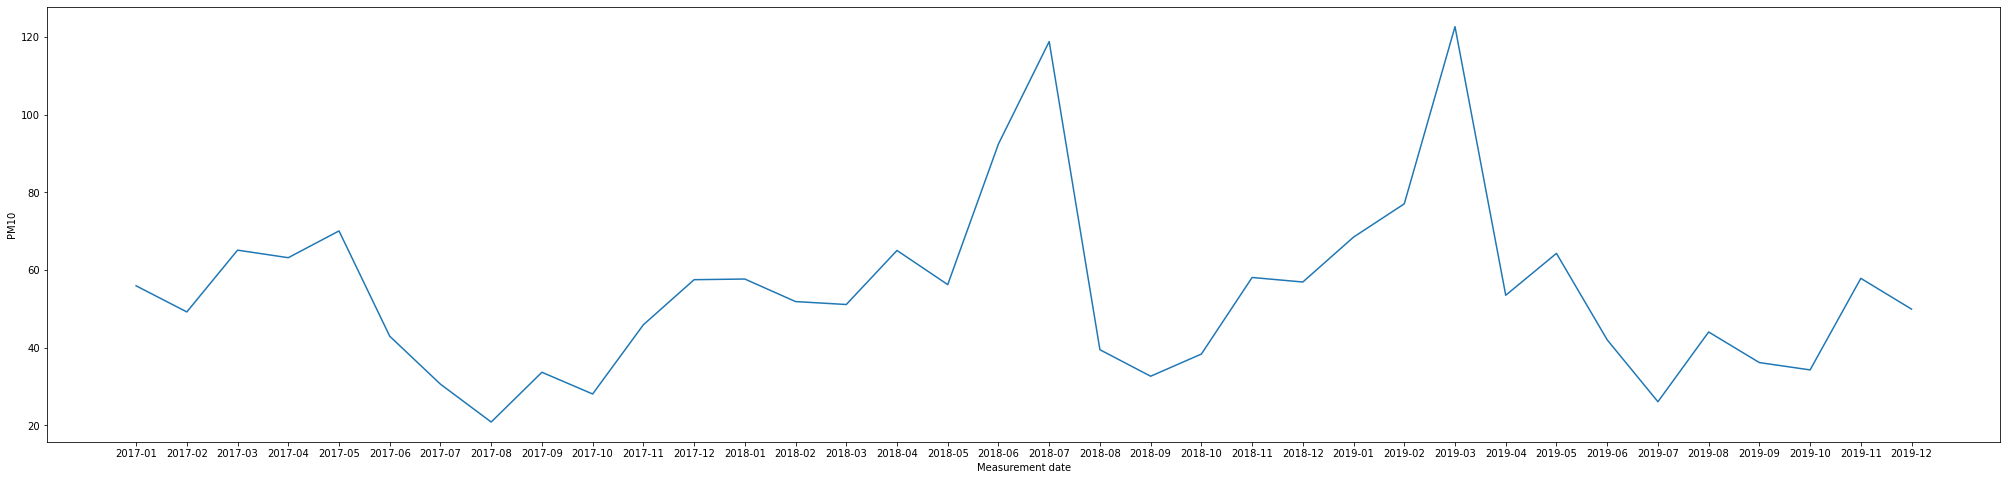

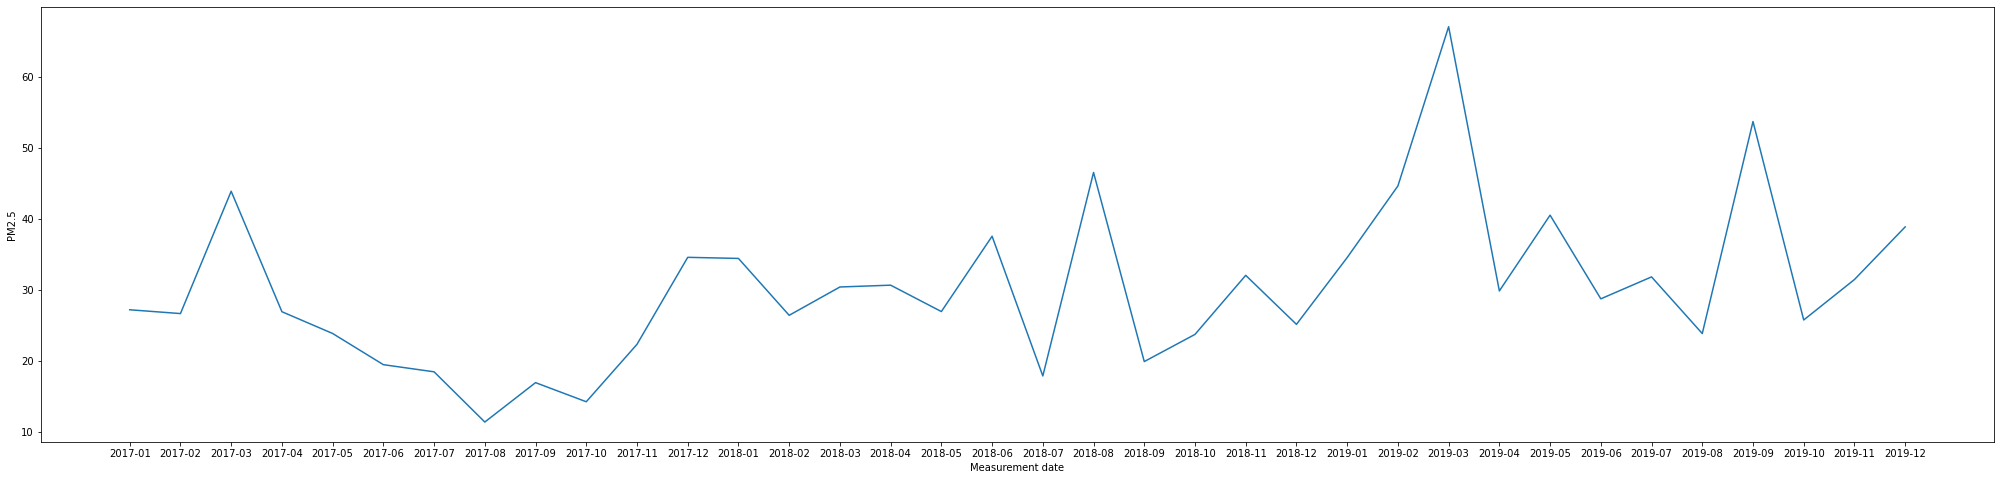

In [95]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_122)

# Station 123

In [96]:
df_123 = df[df['Station code'] == 123]

In [97]:
df_123.head()

Station code Measurement date       SO2       NO2        O3        CO  \
792           123          2017-01  0.004862  0.034317  0.012359  0.551882   
793           123          2017-02  0.005095  0.035499  0.016292  0.556994   
794           123          2017-03  0.005175  0.037806  0.019488  0.454301   
795           123          2017-04  0.005303  0.031633  0.028606  0.442500   
796           123          2017-05  0.005395  0.027238  0.032345  0.310349   

          PM10      PM2.5  
792  57.580645  31.529570  
793  49.833333  28.763393  
794  58.885753  43.662634  
795  56.641667  24.643056  
796  62.028226  23.193548

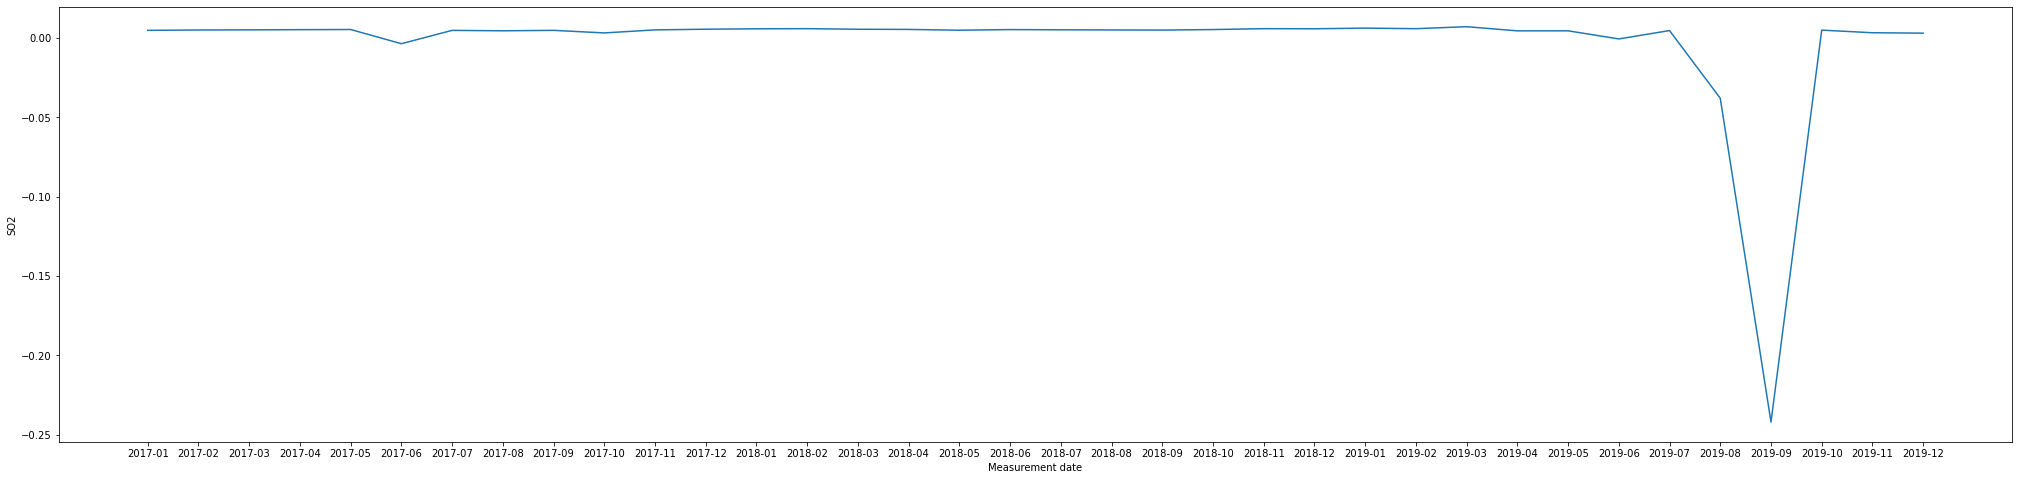

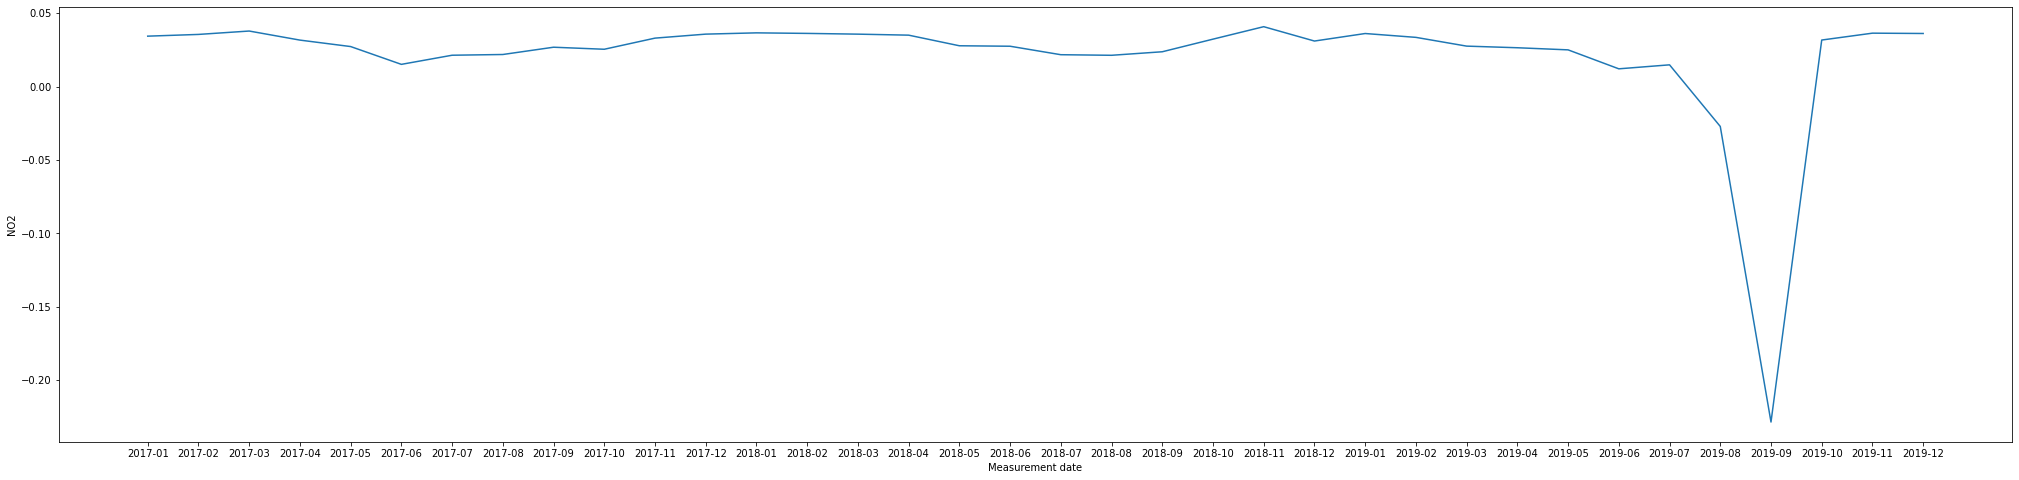

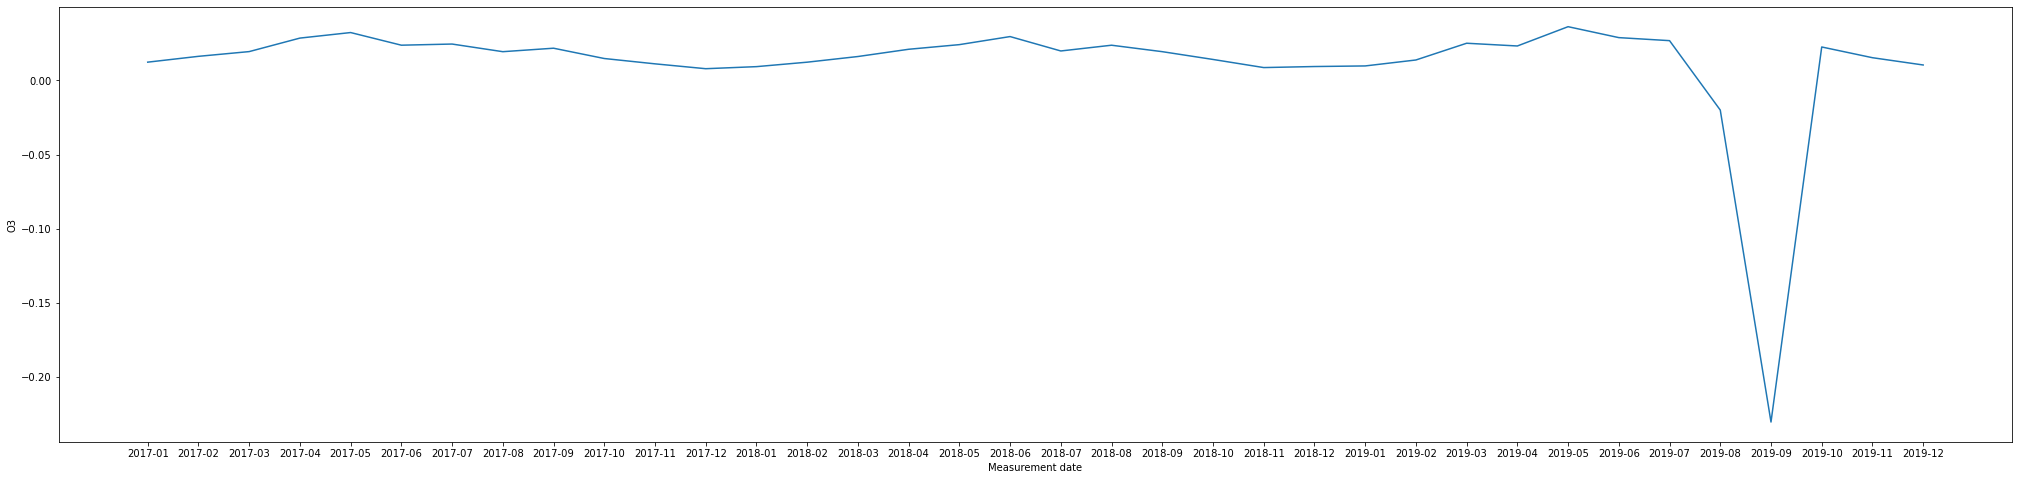

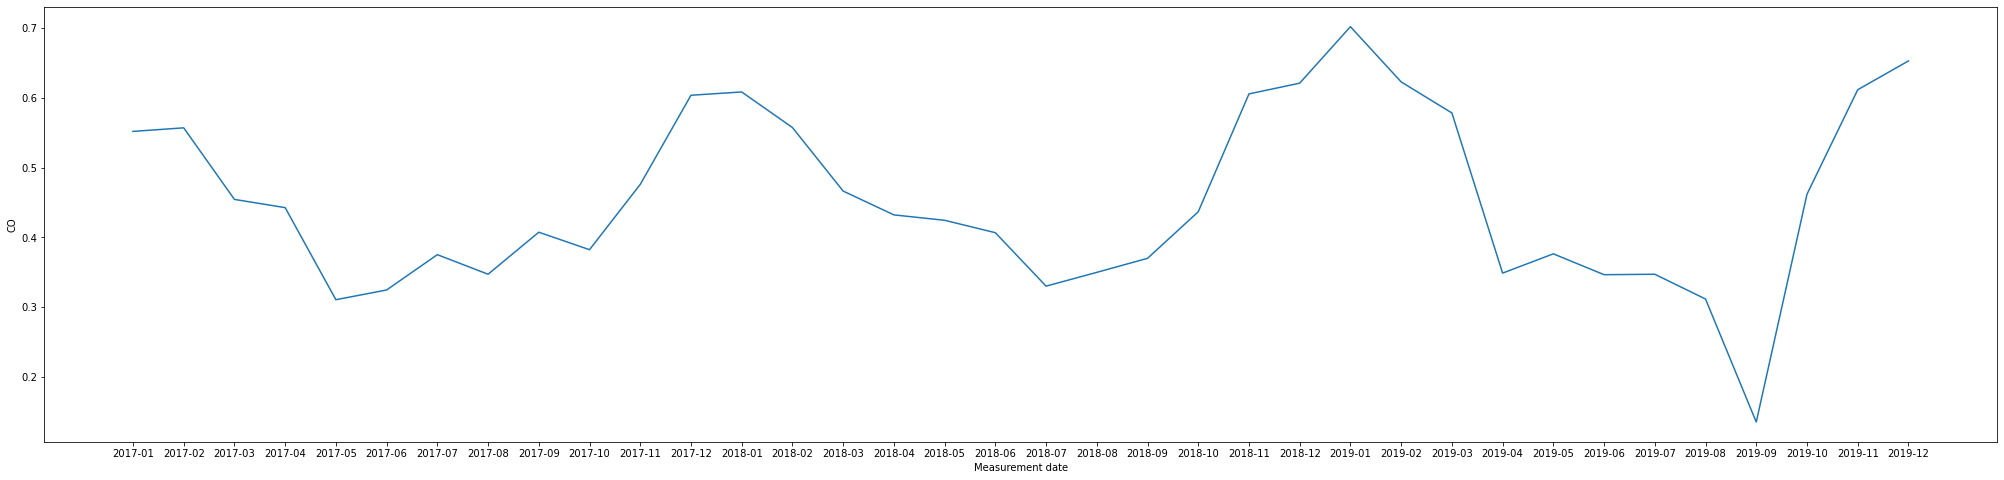

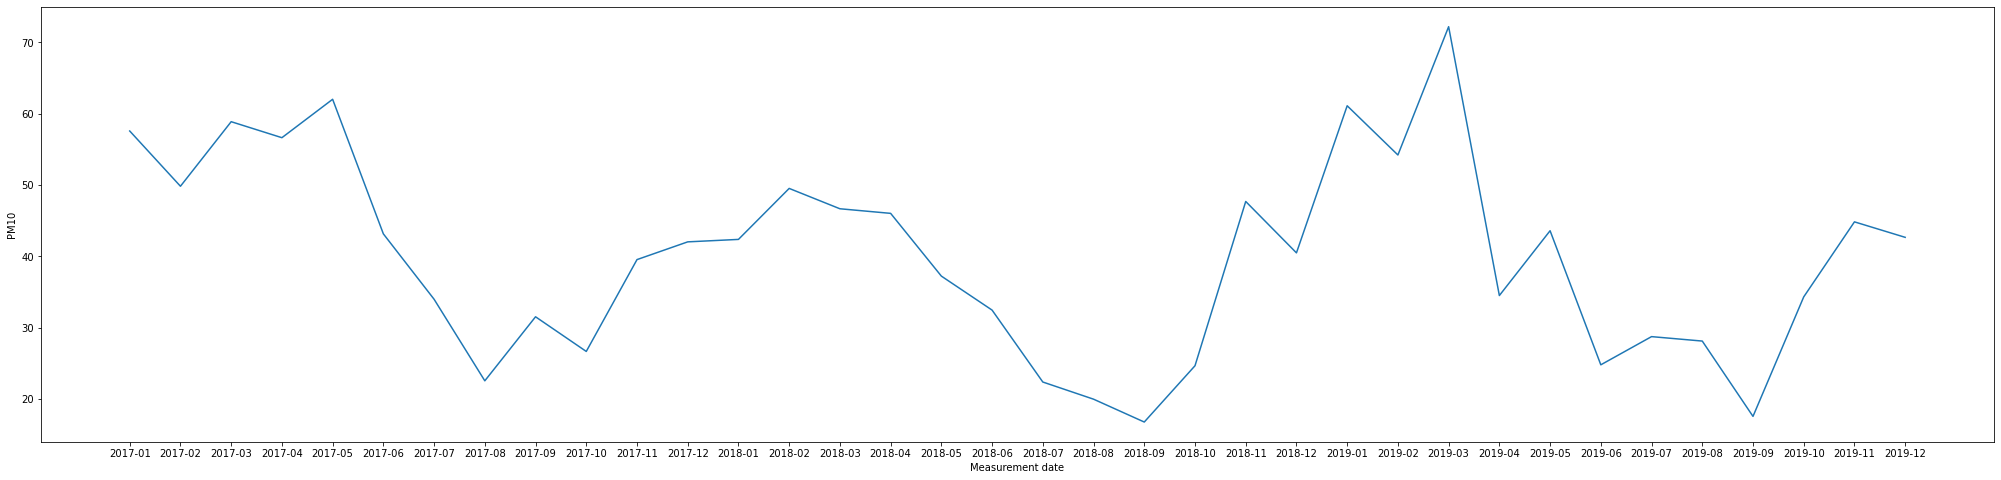

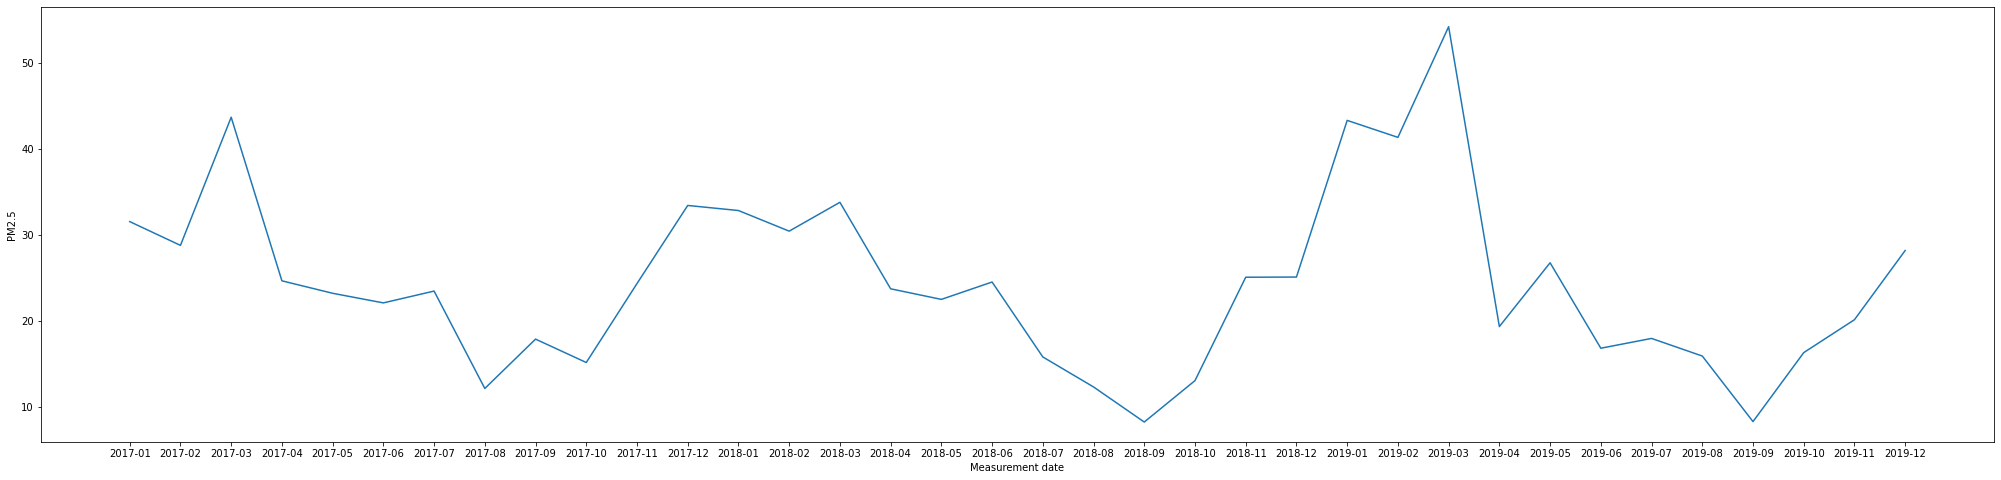

In [98]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_123)

# Station 124

In [99]:
df_124 = df[df['Station code'] == 124]

In [100]:
df_124.head()

Station code Measurement date       SO2       NO2        O3        CO  \
828           124          2017-01  0.005312  0.034919  0.015255  0.775403   
829           124          2017-02  0.005164  0.035555  0.019659  0.692113   
830           124          2017-03  0.001363  0.034633  0.022382  0.666263   
831           124          2017-04  0.004919  0.029382  0.035992  0.552083   
832           124          2017-05  0.004874  0.029605  0.037513  0.499462   

          PM10      PM2.5  
828  53.108871  29.946237  
829  46.806548  30.062500  
830  62.633065  40.967742  
831  62.398611  23.377778  
832  71.934140  25.647849

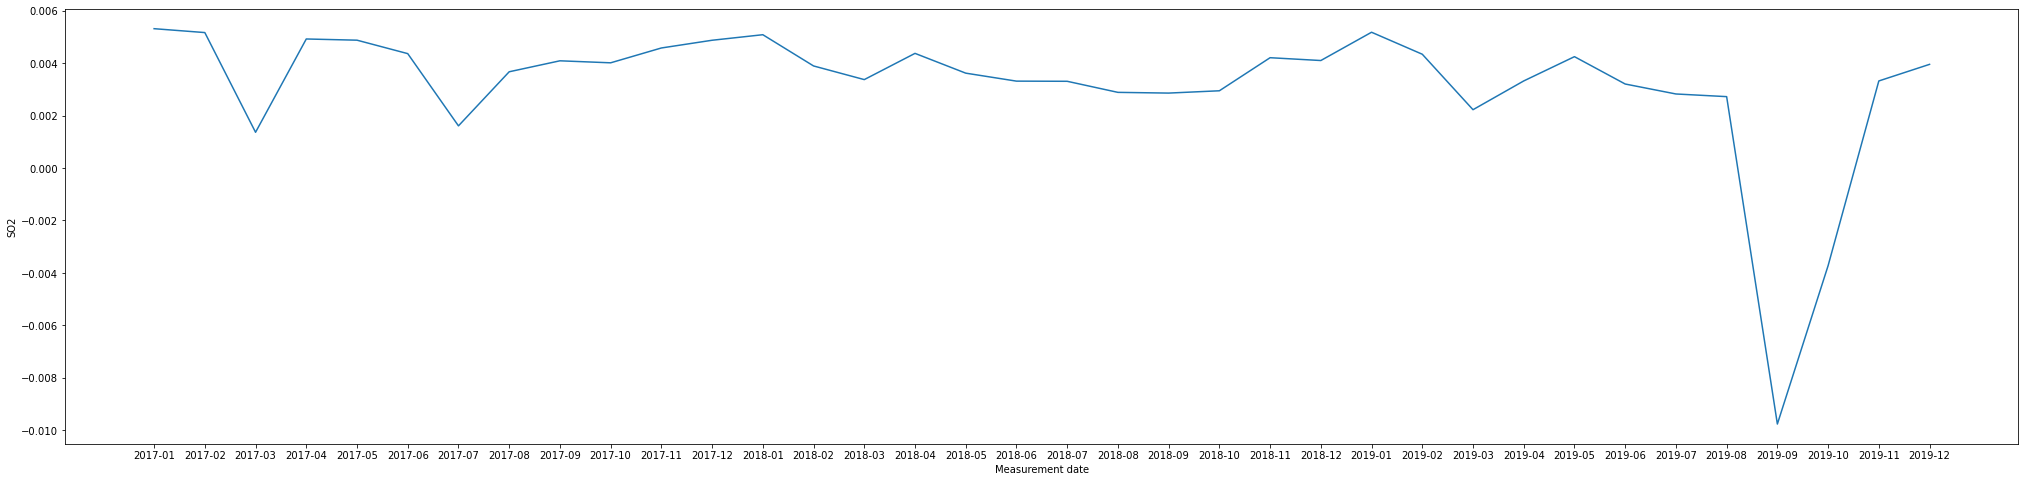

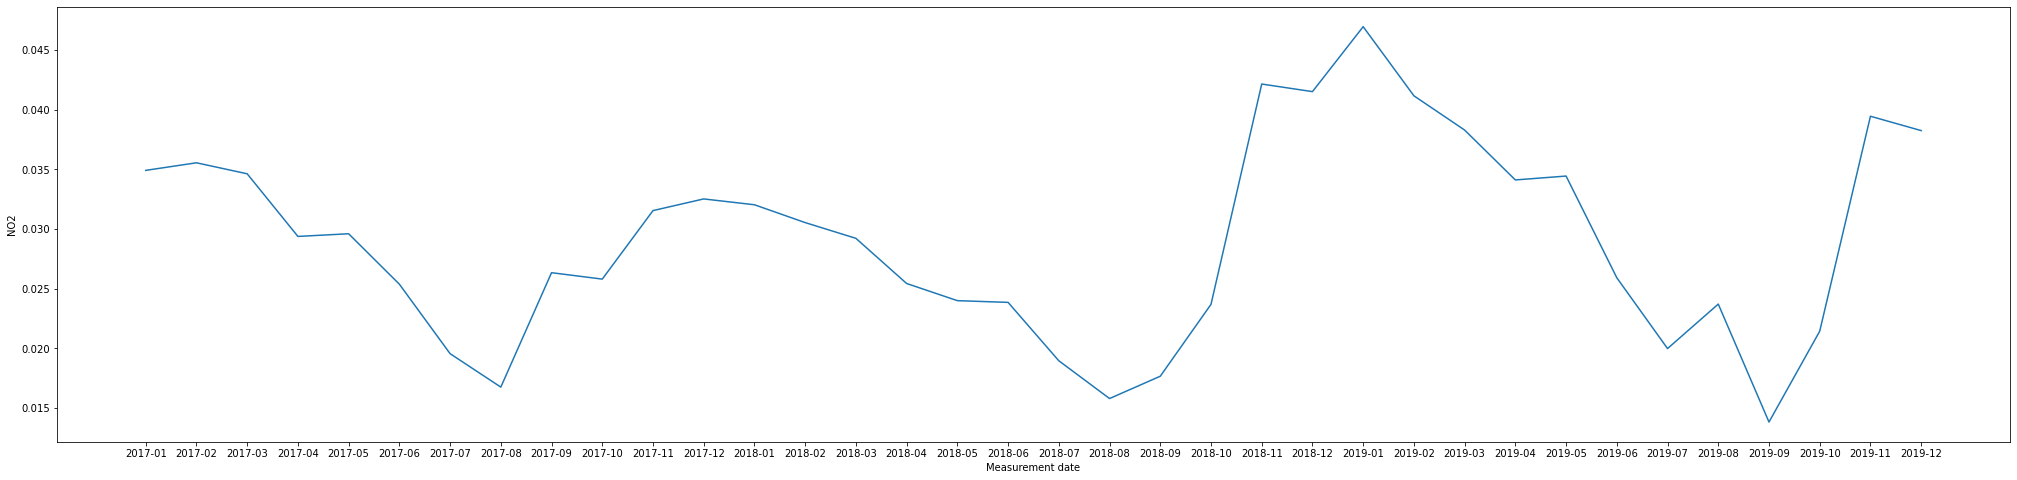

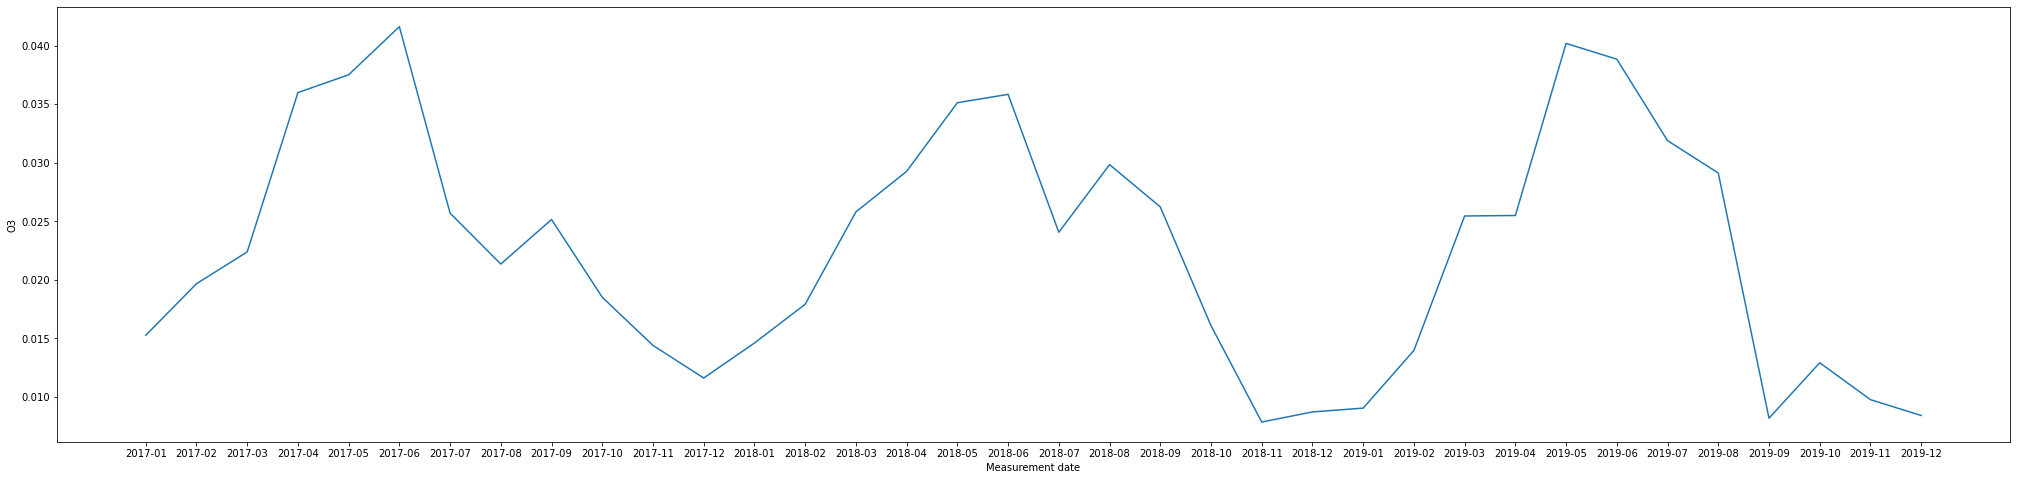

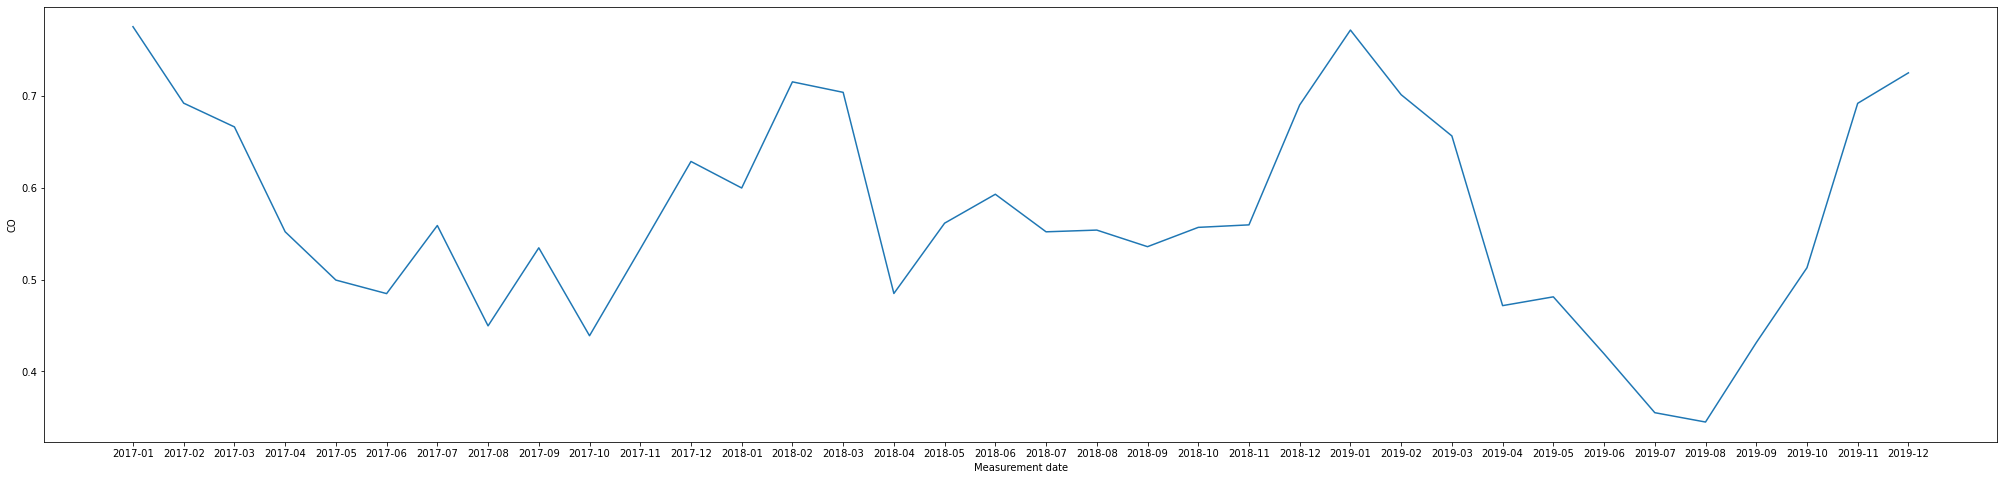

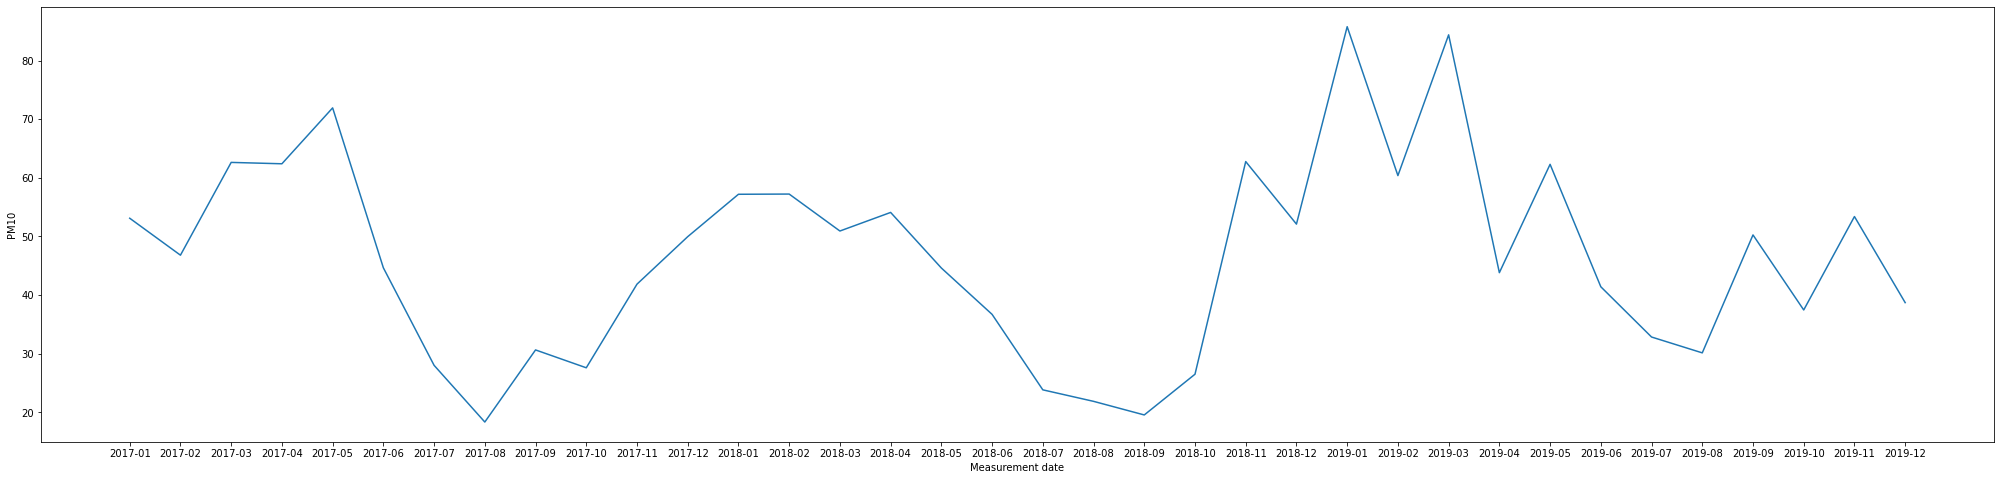

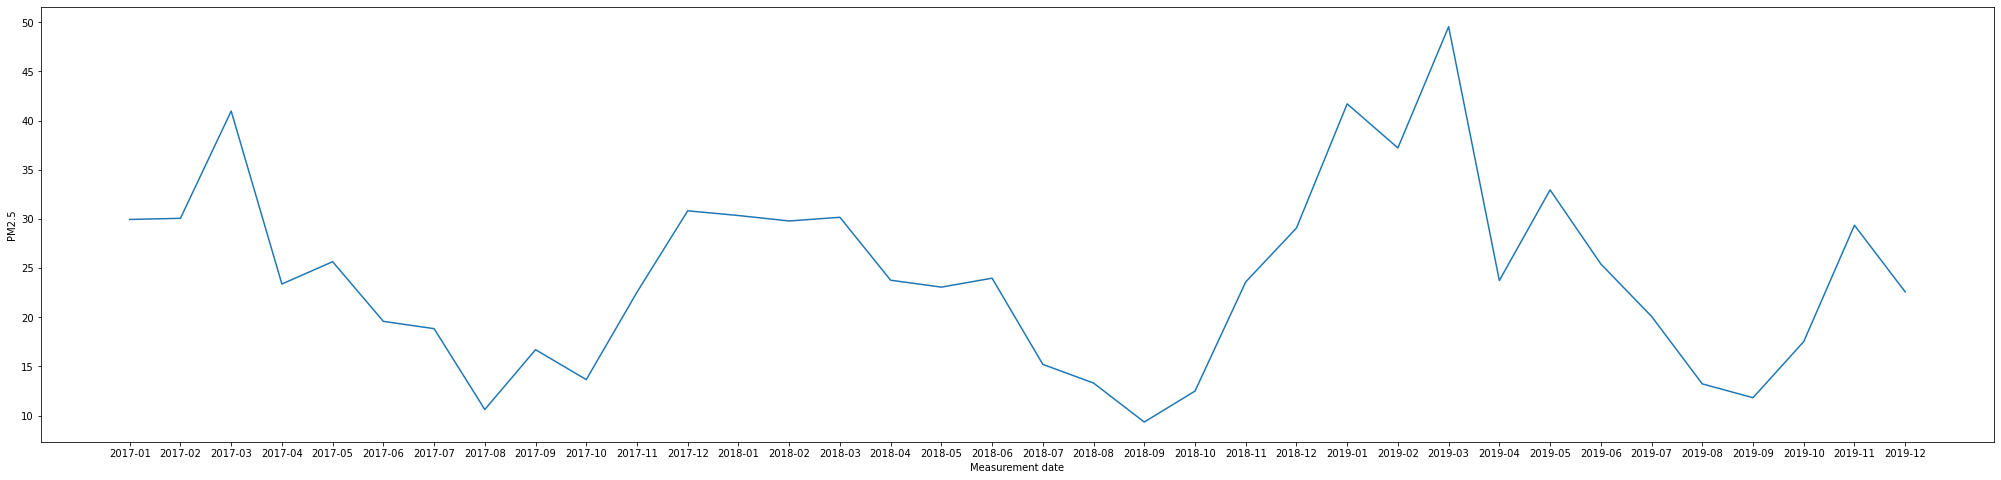

In [101]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_124)

# Station 125

In [102]:
df_125 = df[df['Station code'] == 125]

In [103]:
df_125.head()

Station code Measurement date       SO2       NO2        O3        CO  \
864           125          2017-01 -0.009180  0.023341 -0.001167  0.668683   
865           125          2017-02  0.004464  0.037167  0.016076  0.627827   
866           125          2017-03  0.004919  0.039505  0.023130  0.586962   
867           125          2017-04  0.003979  0.030650  0.034860  0.495139   
868           125          2017-05  0.003987  0.029579  0.036290  0.450941   

          PM10      PM2.5  
864  61.060484  33.797043  
865  53.674107  30.922619  
866  67.194892  42.892473  
867  62.213889  27.000000  
868  71.278226  19.787634

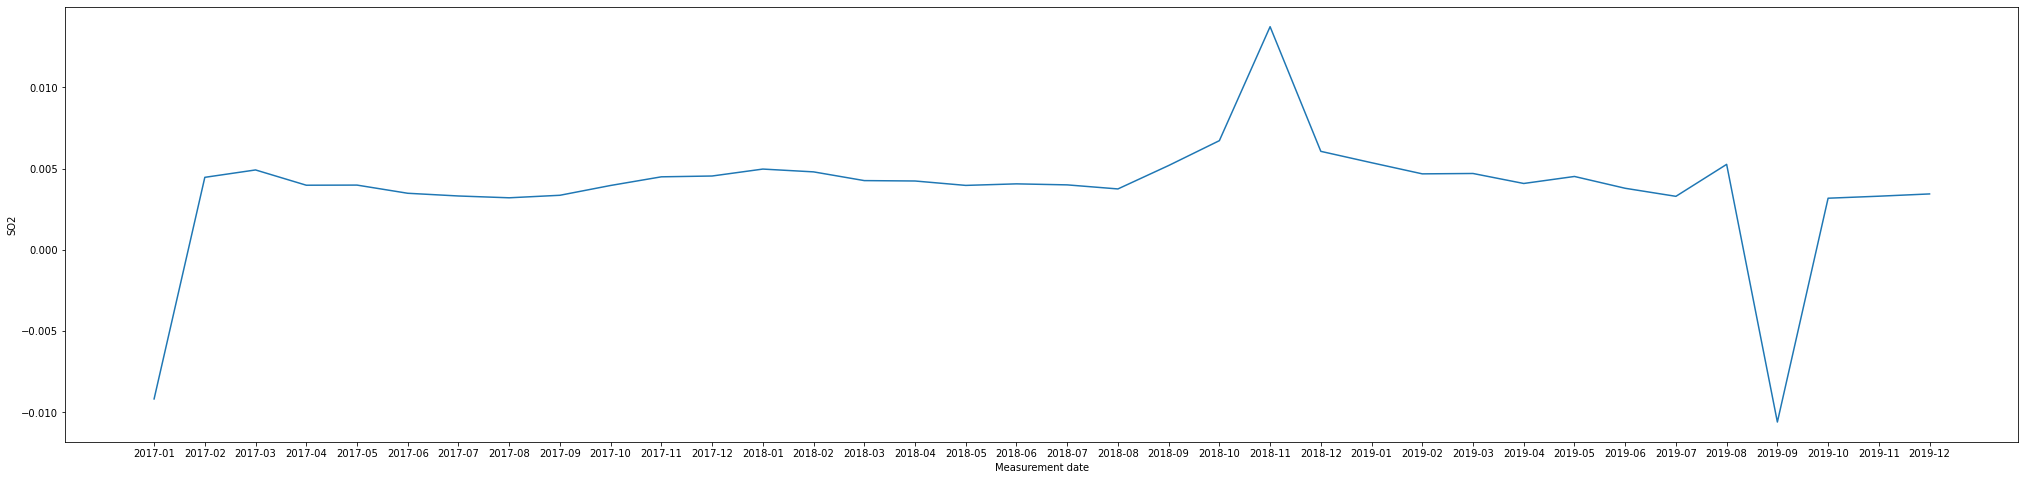

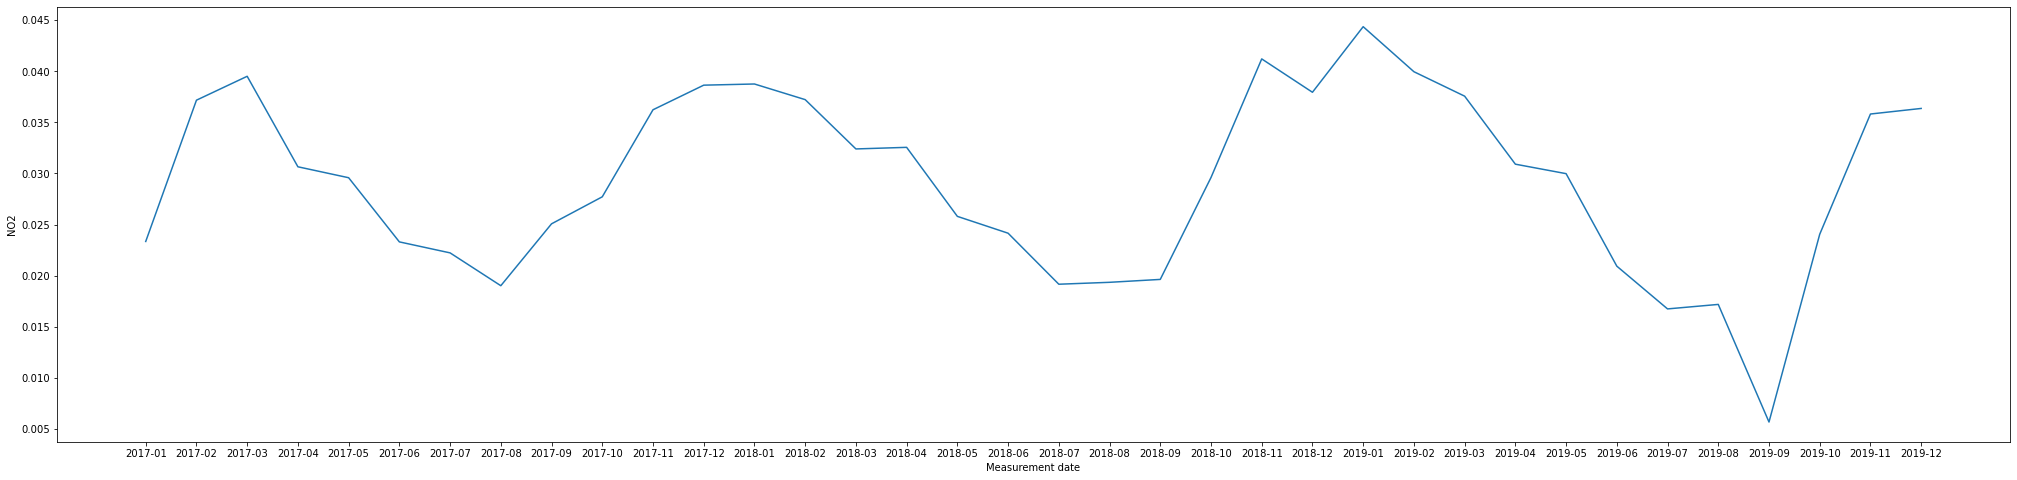

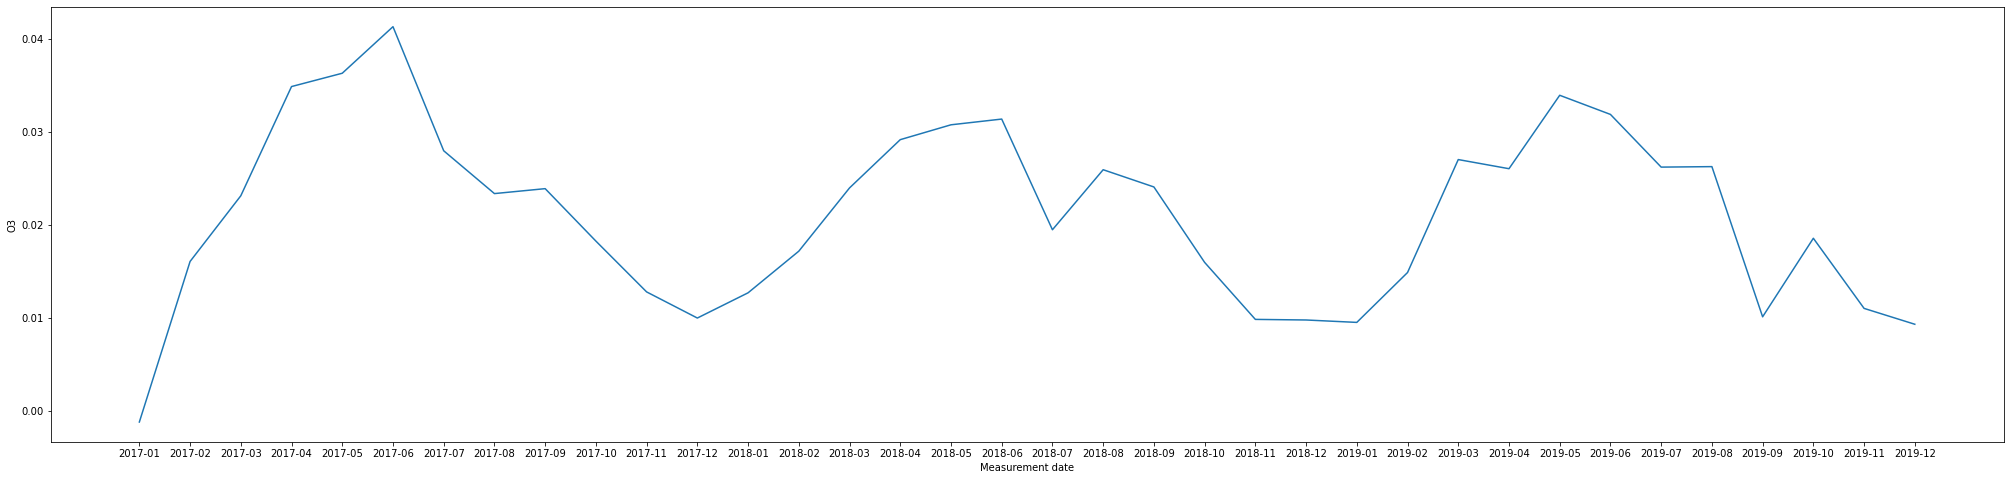

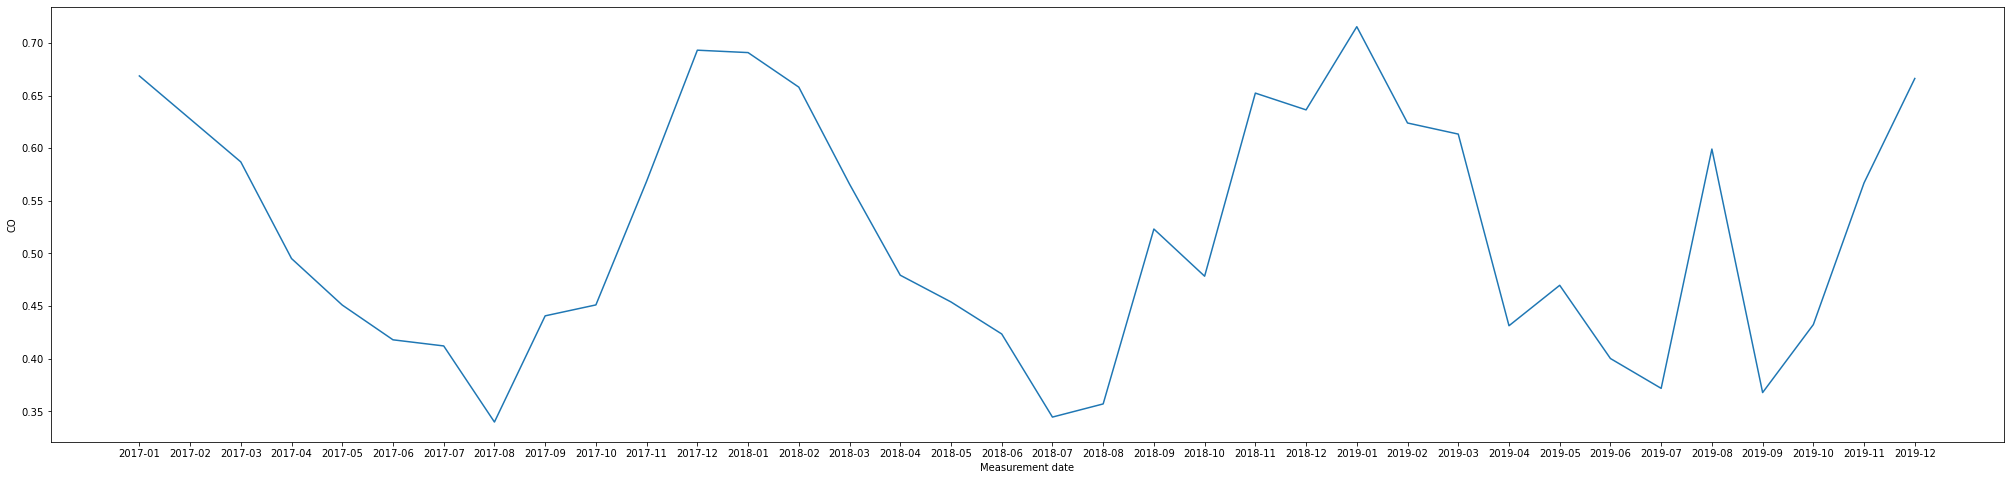

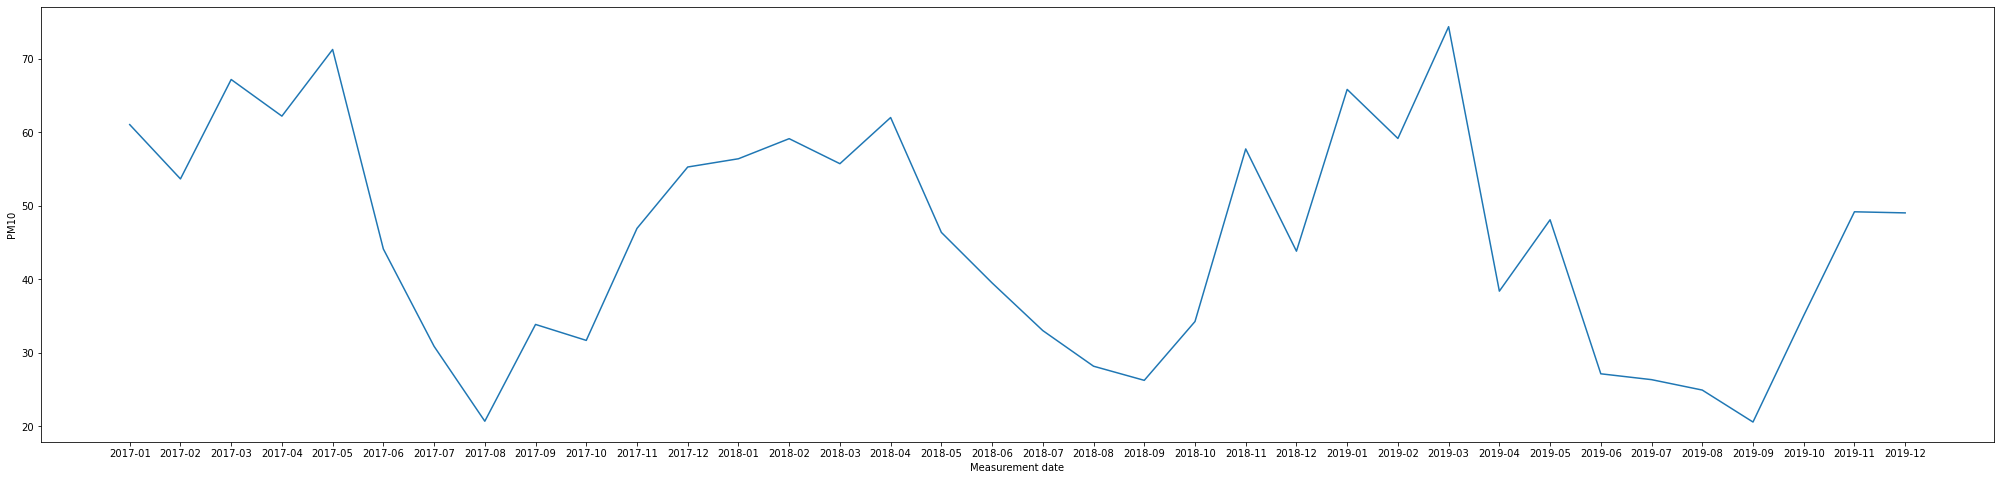

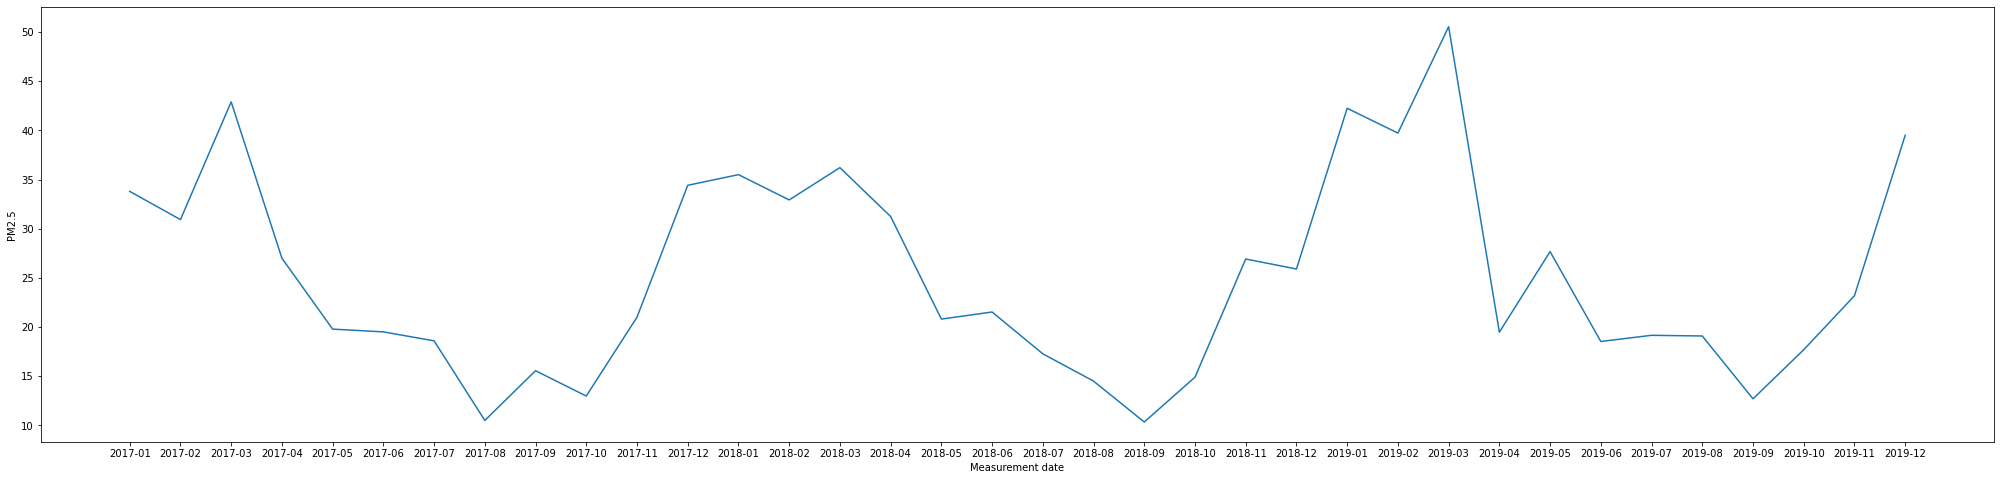

In [104]:
for feature in features:
    plt.figure(figsize=(35,8))
    sns.lineplot(x='Measurement date', y=feature, data=df_125)